# Projet Machine Learning : Prédiction de l'émission de CO2

In [1]:
#install.packages('plotly')

In [132]:
library(ggplot2)
library(reshape2)
library(gridExtra)
library(corrplot)
library(FactoMineR)
library(factoextra)
library(ggpubr)
library(crosstable)
library(GGally)
library(glmnet)
library(e1071)
library(rpart) 
library(randomForest)
library(DescTools)
library(forecast)
library(plotly)
library(gbm)
library(pROC)
library(ROCR)
library(MASS)
library(nnet)


Attachement du package : 'MASS'


L'objet suivant est masqué depuis 'package:plotly':

    select




In [3]:
energy = read.csv("global-data-on-sustainable-energy (1).csv")

In [4]:
head(energy)

,Entity,Year,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.electricity.generating.capacity.per.capita,Financial.flows.to.developing.countries..US...,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.fossil.fuels..TWh.,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,⋯,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,Value_co2_emissions_kt_by_country,Renewables....equivalent.primary.energy.,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land.Area.Km2.,Latitude,Longitude
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,Afghanistan,2000,1.613591,6.2,9.22,20000,44.99,0.16,0,0.31,⋯,302.5948,1.64,760,NA,NA,NA,60,652230,33.93911,67.70995
2,Afghanistan,2001,4.074574,7.2,8.86,130000,45.60,0.09,0,0.50,⋯,236.8919,1.74,730,NA,NA,NA,60,652230,33.93911,67.70995
3,Afghanistan,2002,9.409158,8.2,8.47,3950000,37.83,0.13,0,0.56,⋯,210.8622,1.40,1030,NA,NA,179.4266,60,652230,33.93911,67.70995
4,Afghanistan,2003,14.738506,9.5,8.09,25970000,36.66,0.31,0,0.63,⋯,229.9682,1.40,1220,NA,8.832278,190.6838,60,652230,33.93911,67.70995
5,Afghanistan,2004,20.064968,10.9,7.75,NA,44.24,0.33,0,0.56,⋯,204.2312,1.20,1030,NA,1.414118,211.3821,60,652230,33.93911,67.70995
6,Afghanistan,2005,25.390894,12.2,7.51,9830000,33.88,0.34,0,0.59,⋯,252.0691,1.41,1550,NA,11.229715,242.0313,60,652230,33.93911,67.70995


## Renomination des variables pour plus de clarté dans les graphiques 

In [5]:
# Accès et modification des noms des colonnes
column_names=names(energy)
#print(column_names)
new_column_names=c("Entity", "Year","Access_elec","Access_fuels","Renewable_elec","Financial_flows","Renewable_energy","Elec_fossil","Elec_nuclear","Elec_renew","Low_carbon","Primary_energy","Energy_intensity","Value_co2","Renewables_equivalent","gdp_growth","gdp_capita","Density","Land_area","Latitude","Longitude")  # Remplacez ... par les nouveaux noms des colonnes

# Réassigner les noms des colonnes
names(energy)=new_column_names
print(names(energy))

 [1] "Entity"                "Year"                  "Access_elec"          
 [4] "Access_fuels"          "Renewable_elec"        "Financial_flows"      
 [7] "Renewable_energy"      "Elec_fossil"           "Elec_nuclear"         
[10] "Elec_renew"            "Low_carbon"            "Primary_energy"       
[13] "Energy_intensity"      "Value_co2"             "Renewables_equivalent"
[16] "gdp_growth"            "gdp_capita"            "Density"              
[19] "Land_area"             "Latitude"              "Longitude"            


# Analyse exploratoire

## Question 1 

### Nature des différentes variables

In [6]:
str(energy)

'data.frame':	3649 obs. of  21 variables:
 $ Entity               : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                 : int  2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 ...
 $ Access_elec          : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access_fuels         : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable_elec       : num  9.22 8.86 8.47 8.09 7.75 7.51 7.4 7.25 7.49 7.5 ...
 $ Financial_flows      : num  20000 130000 3950000 25970000 NA ...
 $ Renewable_energy     : num  45 45.6 37.8 36.7 44.2 ...
 $ Elec_fossil          : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Elec_nuclear         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Elec_renew           : num  0.31 0.5 0.56 0.63 0.56 0.59 0.64 0.75 0.54 0.78 ...
 $ Low_carbon           : num  66 84.7 81.2 67 62.9 ...
 $ Primary_energy       : num  303 237 211 230 204 ...
 $ Energy_intensity     : num  1.64 1.74 1.4 1.4 1.2 1.41 1.5 1.53 1.94 2.25 ...
 $ Value_co2            : num  760 730 10

Nous pouvons voir ici que toutes les variables sont quantitatives à l'exception de "Entity" et "Density". Cette dernière devrait être plutôt être une variable quanitative

### Convertir Year en une variable qualitative

In [7]:
energy$Year = as.factor(energy$Year)

### Convertir Density en une variable numérique

In [8]:
energy$Density = as.numeric(gsub(",","",energy$Density))

In [9]:
str(energy)

'data.frame':	3649 obs. of  21 variables:
 $ Entity               : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                 : Factor w/ 21 levels "2000","2001",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Access_elec          : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access_fuels         : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable_elec       : num  9.22 8.86 8.47 8.09 7.75 7.51 7.4 7.25 7.49 7.5 ...
 $ Financial_flows      : num  20000 130000 3950000 25970000 NA ...
 $ Renewable_energy     : num  45 45.6 37.8 36.7 44.2 ...
 $ Elec_fossil          : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Elec_nuclear         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Elec_renew           : num  0.31 0.5 0.56 0.63 0.56 0.59 0.64 0.75 0.54 0.78 ...
 $ Low_carbon           : num  66 84.7 81.2 67 62.9 ...
 $ Primary_energy       : num  303 237 211 230 204 ...
 $ Energy_intensity     : num  1.64 1.74 1.4 1.4 1.2 1.41 1.5 1.53 1.94 2.25 ...
 $ Value_co2            : num  760 73

## Question 2

### Taux de valeurs manquantes

In [10]:
sum(is.na(energy))*100/(21*3649)

[1] 9.106213

### Taux de valeurs manquantes par colonne

In [11]:
#tx = colMeans(is.na(energy))*100
missing = sort(colSums(is.na(energy)),decreasing = TRUE )
tx = missing*100/(3649) 
print(missing)
print(tx)

Renewables_equivalent       Financial_flows        Renewable_elec 
                 2137                  2089                   931 
            Value_co2            gdp_growth            gdp_capita 
                  428                   317                   282 
     Energy_intensity      Renewable_energy          Access_fuels 
                  207                   194                   169 
         Elec_nuclear            Low_carbon           Elec_fossil 
                  126                    42                    21 
           Elec_renew           Access_elec               Density 
                   21                    10                     1 
            Land_area              Latitude             Longitude 
                    1                     1                     1 
               Entity                  Year        Primary_energy 
                    0                     0                     0 
Renewables_equivalent       Financial_flows        Renewable_e

### Suppression des variables corrompues

In [12]:
energy$Renewable_elec = NULL
energy$Financial_flows= NULL
energy$Renewables_equivalent = NULL

## Question 3 

### Suppression des individus ayant des valeurs manquantes

In [13]:
complete_energy = na.omit(energy)

In [14]:
str(complete_energy)

'data.frame':	2868 obs. of  18 variables:
 $ Entity          : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year            : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ Access_elec     : num  14.7 20.1 25.4 30.7 36.1 ...
 $ Access_fuels    : num  9.5 10.9 12.2 13.8 15.3 ...
 $ Renewable_energy: num  36.7 44.2 33.9 31.9 28.8 ...
 $ Elec_fossil     : num  0.31 0.33 0.34 0.2 0.2 0.19 0.16 0.19 0.18 0.14 ...
 $ Elec_nuclear    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Elec_renew      : num  0.63 0.56 0.59 0.64 0.75 0.54 0.78 0.75 0.6 0.74 ...
 $ Low_carbon      : num  67 62.9 63.4 76.2 78.9 ...
 $ Primary_energy  : num  230 204 252 304 354 ...
 $ Energy_intensity: num  1.4 1.2 1.41 1.5 1.53 1.94 2.25 2.46 3.23 2.61 ...
 $ Value_co2       : num  1220 1030 1550 1760 1770 ...
 $ gdp_growth      : num  8.83 1.41 11.23 5.36 13.83 ...
 $ gdp_capita      : num  191 211 242 264 360 ...
 $ Density         : num  60 60 60 60 60 60 60 60 60 60 ...
 $ Land_area

Il y a bien 2868 observations.

In [15]:
sum(is.na(complete_energy))*100/(21*3649)

[1] 0

On retrouve bien un taux de valeurs manquantes nul. 

## Question 5

### Hétérogénéité d'émission de CO2 de pays

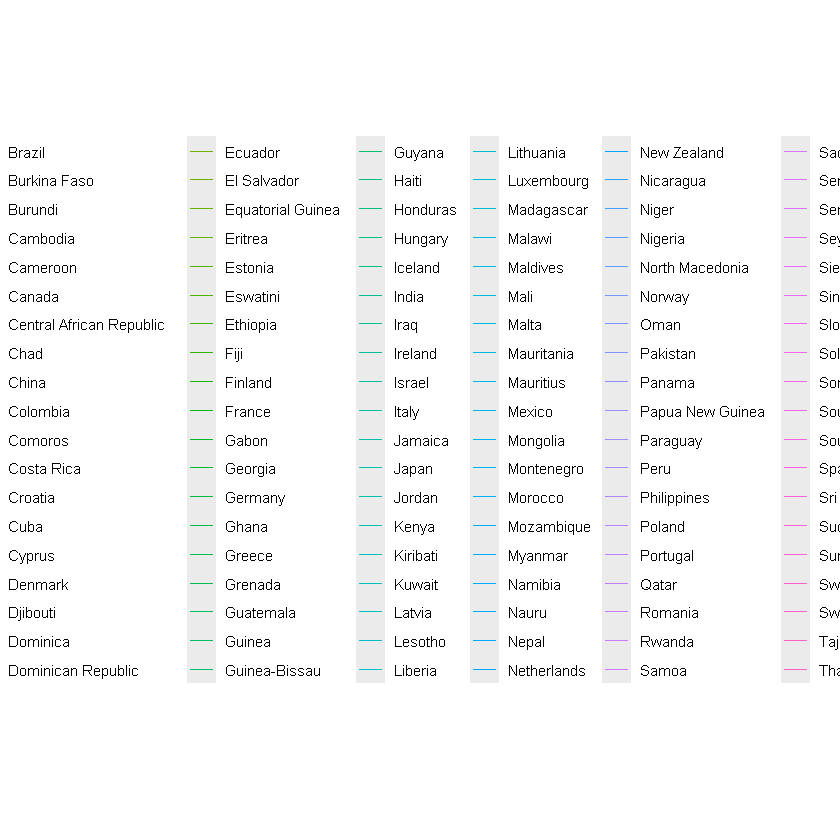

In [16]:
ggplot(complete_energy) + 
  aes(x = Year, y = Value_co2, color = Entity, group = Entity) + 
  geom_line() + 
  theme(legend.position = "right")
#complete energy avec les valeurs transformées mais on garde value_Co2

In [17]:
paste('ecart type')
sd(complete_energy$Value_co2)
paste('moyenne :')
mean(complete_energy$Value_co2)
paste('min')
min(complete_energy$Value_co2)
paste('max')
max(complete_energy$Value_co2)

[1] "ecart type"

[1] 818020.2

[1] "moyenne :"

[1] 168818.2

[1] "min"

[1] 30

[1] "max"

[1] 10707220

Ici nous pouvons observer que l'écart type de la variable Value CO2 est très grande, ce qui témoigne d'une hétérogéneité des valeurs par rapport à la répartition moyenne. De plus le graphique que les 5 pays ayant une emission de CO2 la plus importante sont : Chine / Etats-Unis / Inde / Japon / Allemagne

### Les pays les plus émetteurs de CO2

,Entity,Value_co2
,<chr>,<dbl>
28,China,7636642.5
143,United States,5329538.5
63,India,1633979.0
69,Japan,1183734.5
51,Germany,773644.5
25,Canada,547644.5
142,United Kingdom,470604.0
86,Mexico,444619.5
67,Italy,399400.5


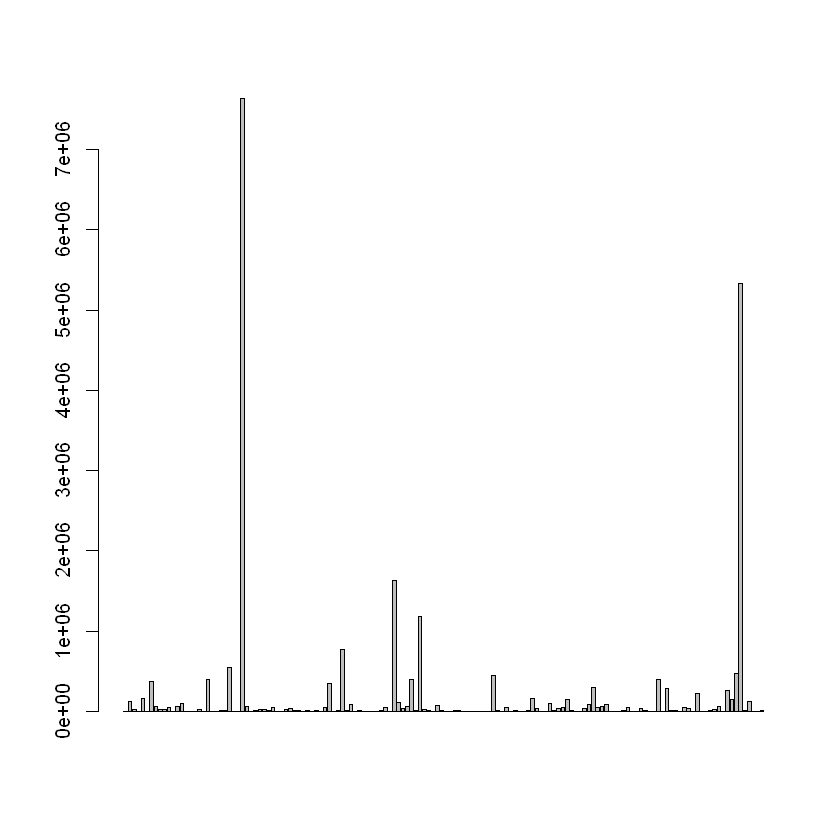

In [18]:
Moy = aggregate(data=complete_energy,Value_co2~Entity,FUN=mean)
index = order(Moy$Value_co2, decreasing = TRUE )
Moy_classe = Moy[index,]
head(Moy_classe,10)
barplot(Moy[,2])

## Question 4

### Analyse descriptive unidimensionnelle

#### Variables qualitatives : Year et Entity 


2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 
 137  138  140  141  141  141  141  144  144  144  145  145  144  145  147  147 
2016 2017 2018 2019 2020 
 146  146  146  146    0 


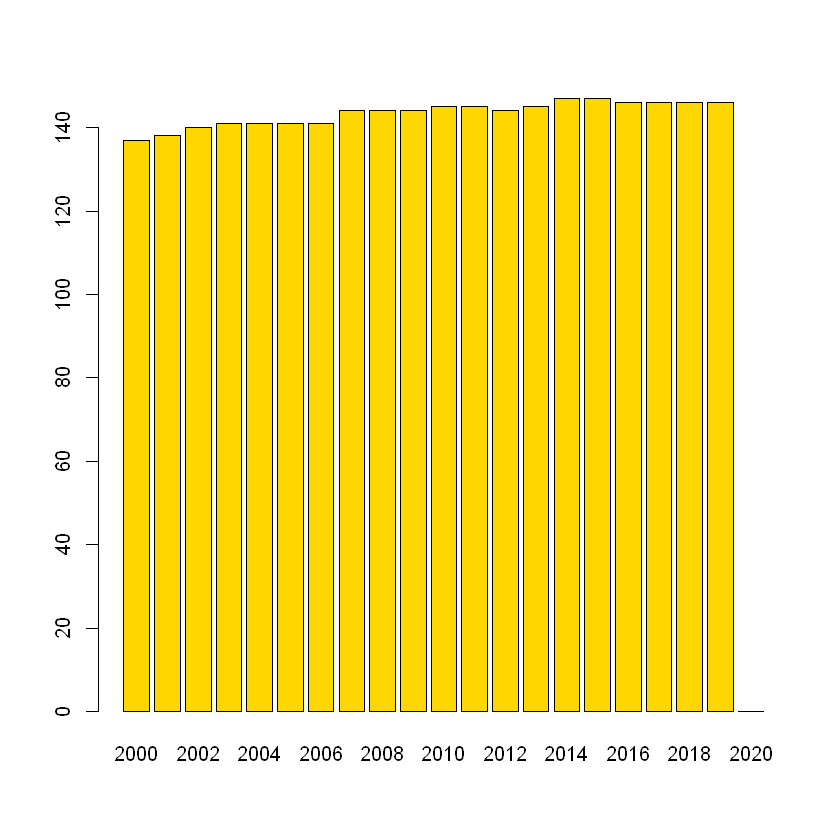

In [19]:
occ_y = table(complete_energy$Year)
print(occ_y)
barplot(occ_y, col="gold")

Chaque année n'a pas le même nombre d'observations.

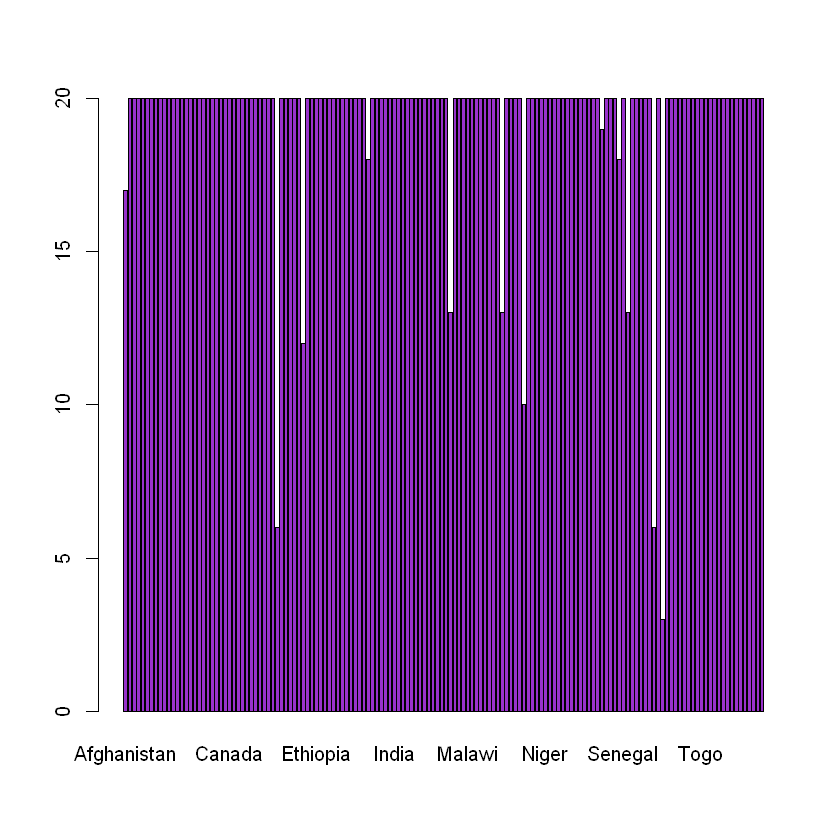

In [20]:
occ_e = table(complete_energy$Entity)
#print(occ_e)
barplot(occ_e,col = "darkorchid")


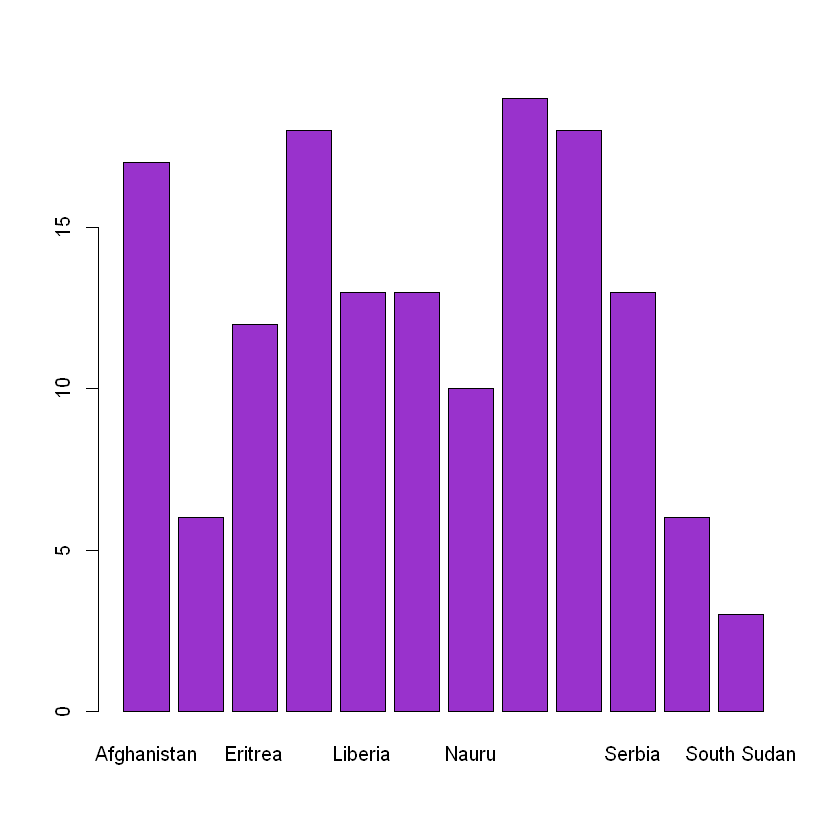

In [21]:
occ_e20 = occ_e[occ_e<20]
barplot(occ_e20,col = "darkorchid")

Chaque pays n'a pas le même nombre d'observations. Il y en a 12 qui n'ont pas été observés durant les 20 années de l'étude

#### Pour les variables quantitatives

In [22]:
summary(complete_energy)

    Entity               Year       Access_elec       Access_fuels   
 Length:2868        2014   : 147   Min.   :  1.252   Min.   :  0.00  
 Class :character   2015   : 147   1st Qu.: 53.238   1st Qu.: 22.07  
 Mode  :character   2016   : 146   Median : 97.000   Median : 81.55  
                    2017   : 146   Mean   : 76.585   Mean   : 62.17  
                    2018   : 146   3rd Qu.:100.000   3rd Qu.:100.00  
                    2019   : 146   Max.   :100.000   Max.   :100.00  
                    (Other):1990                                     
 Renewable_energy  Elec_fossil        Elec_nuclear      Elec_renew     
 Min.   : 0.000   Min.   :   0.000   Min.   :  0.00   Min.   :   0.00  
 1st Qu.: 9.188   1st Qu.:   0.290   1st Qu.:  0.00   1st Qu.:   0.09  
 Median :28.790   Median :   2.995   Median :  0.00   Median :   1.68  
 Mean   :35.802   Mean   :  76.694   Mean   : 15.34   Mean   :  26.60  
 3rd Qu.:60.667   3rd Qu.:  25.788   3rd Qu.:  0.00   3rd Qu.:  10.10  
 Max.   

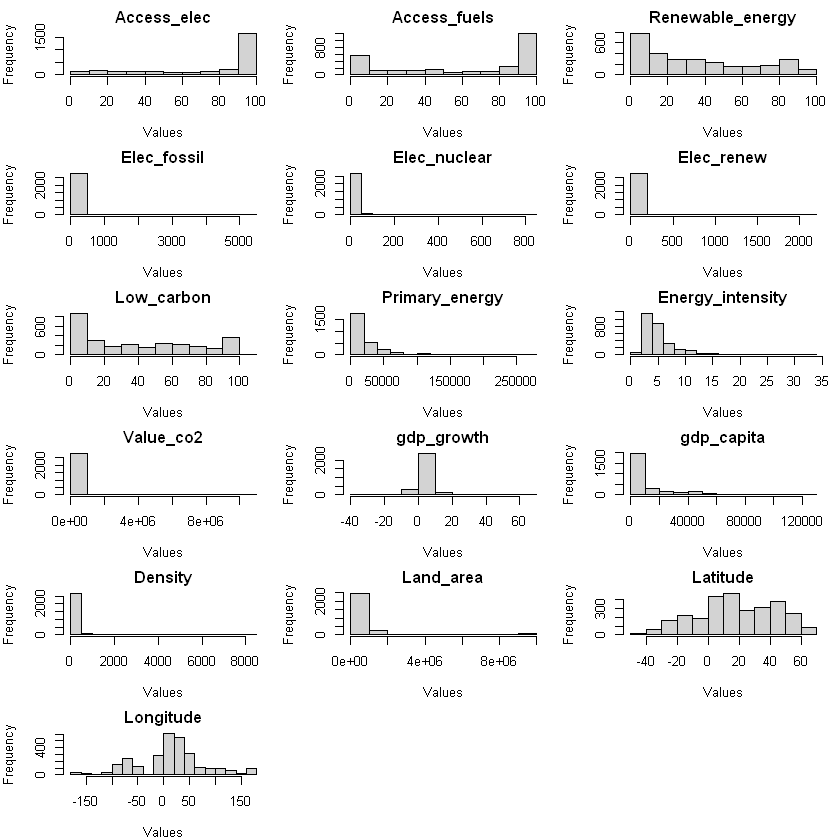

In [23]:
par(mfrow = c(6,3) , mar = c(4,4,2,1))

for (i in 3:length(names(complete_energy))) {
    dfi = complete_energy[,c(i)]
    hist(dfi, main=names(complete_energy)[i],xlab='Values')
}

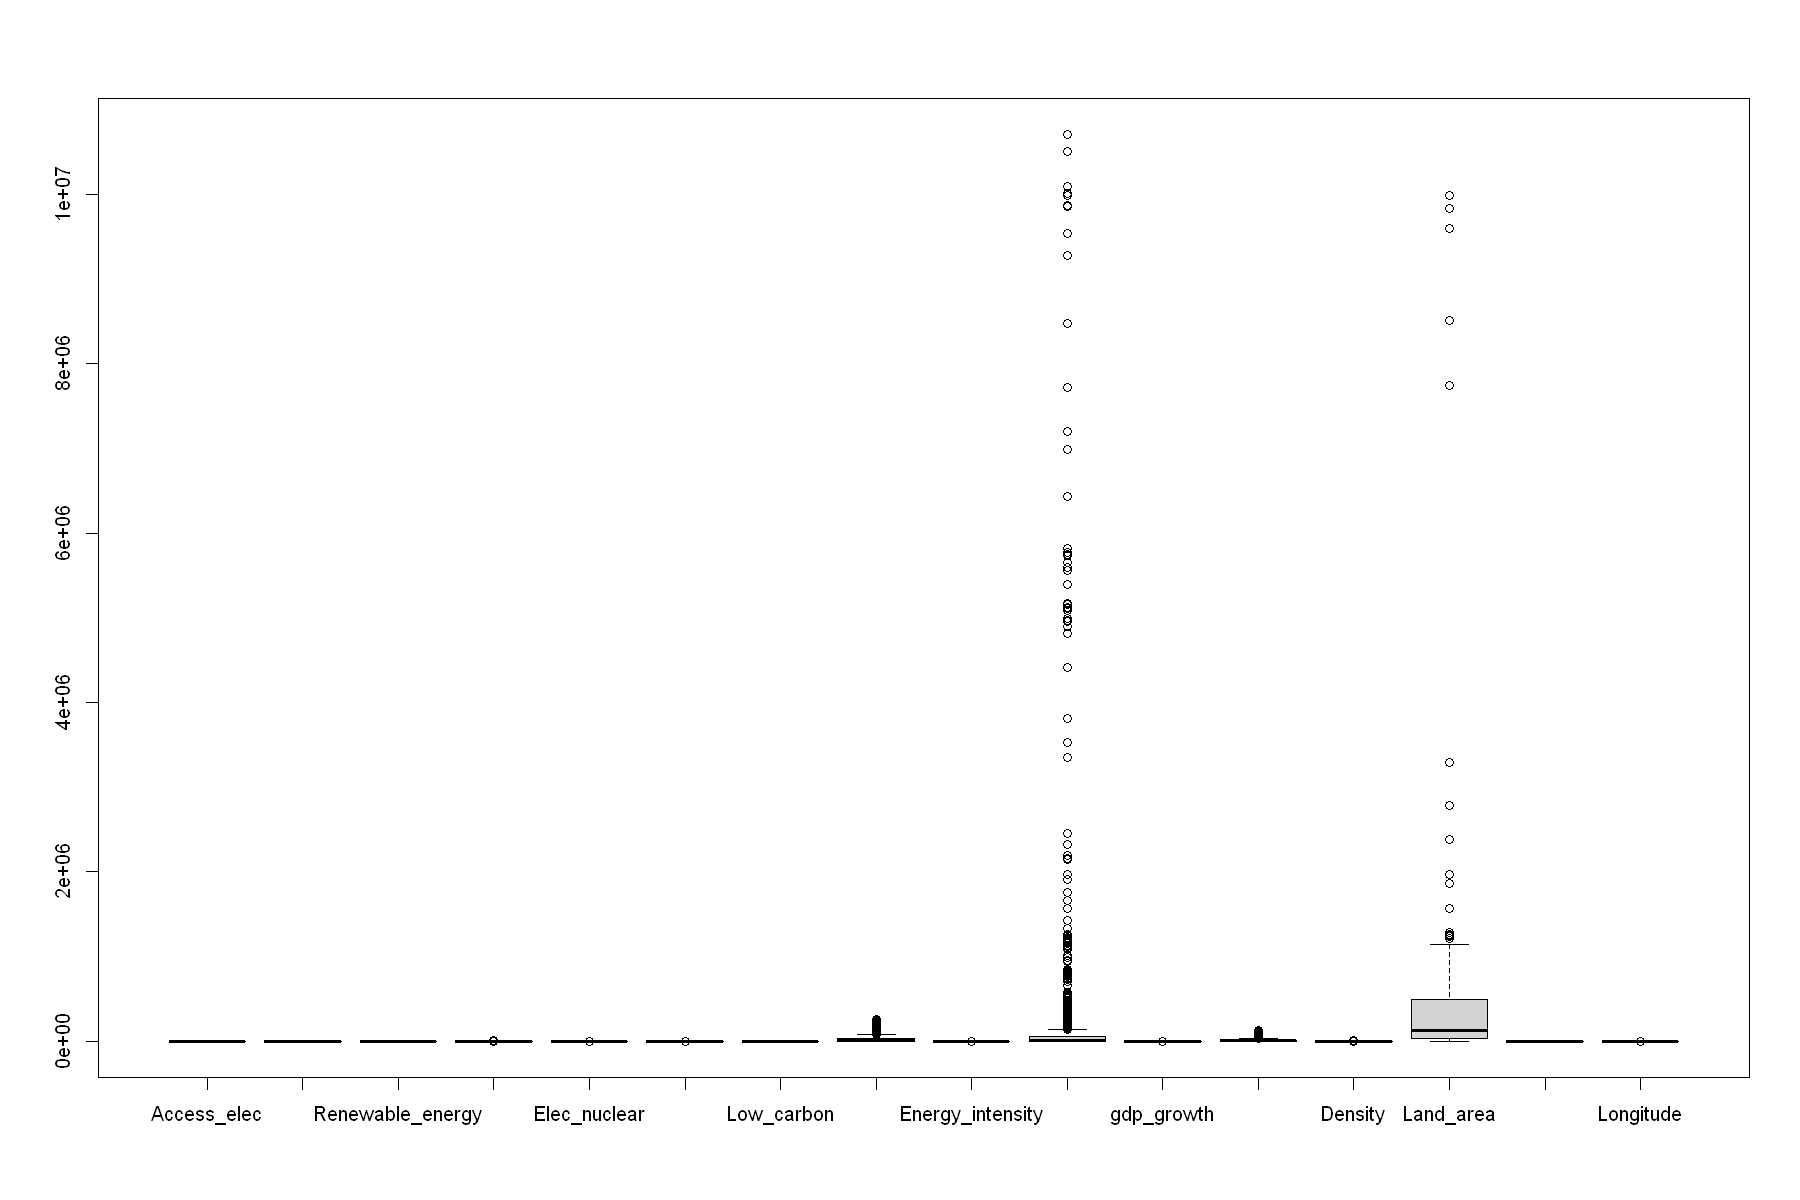

In [24]:
options(repr.plot.width = 15, repr.plot.height = 10)

df = complete_energy[,-c(1,2)]
boxplot(df)

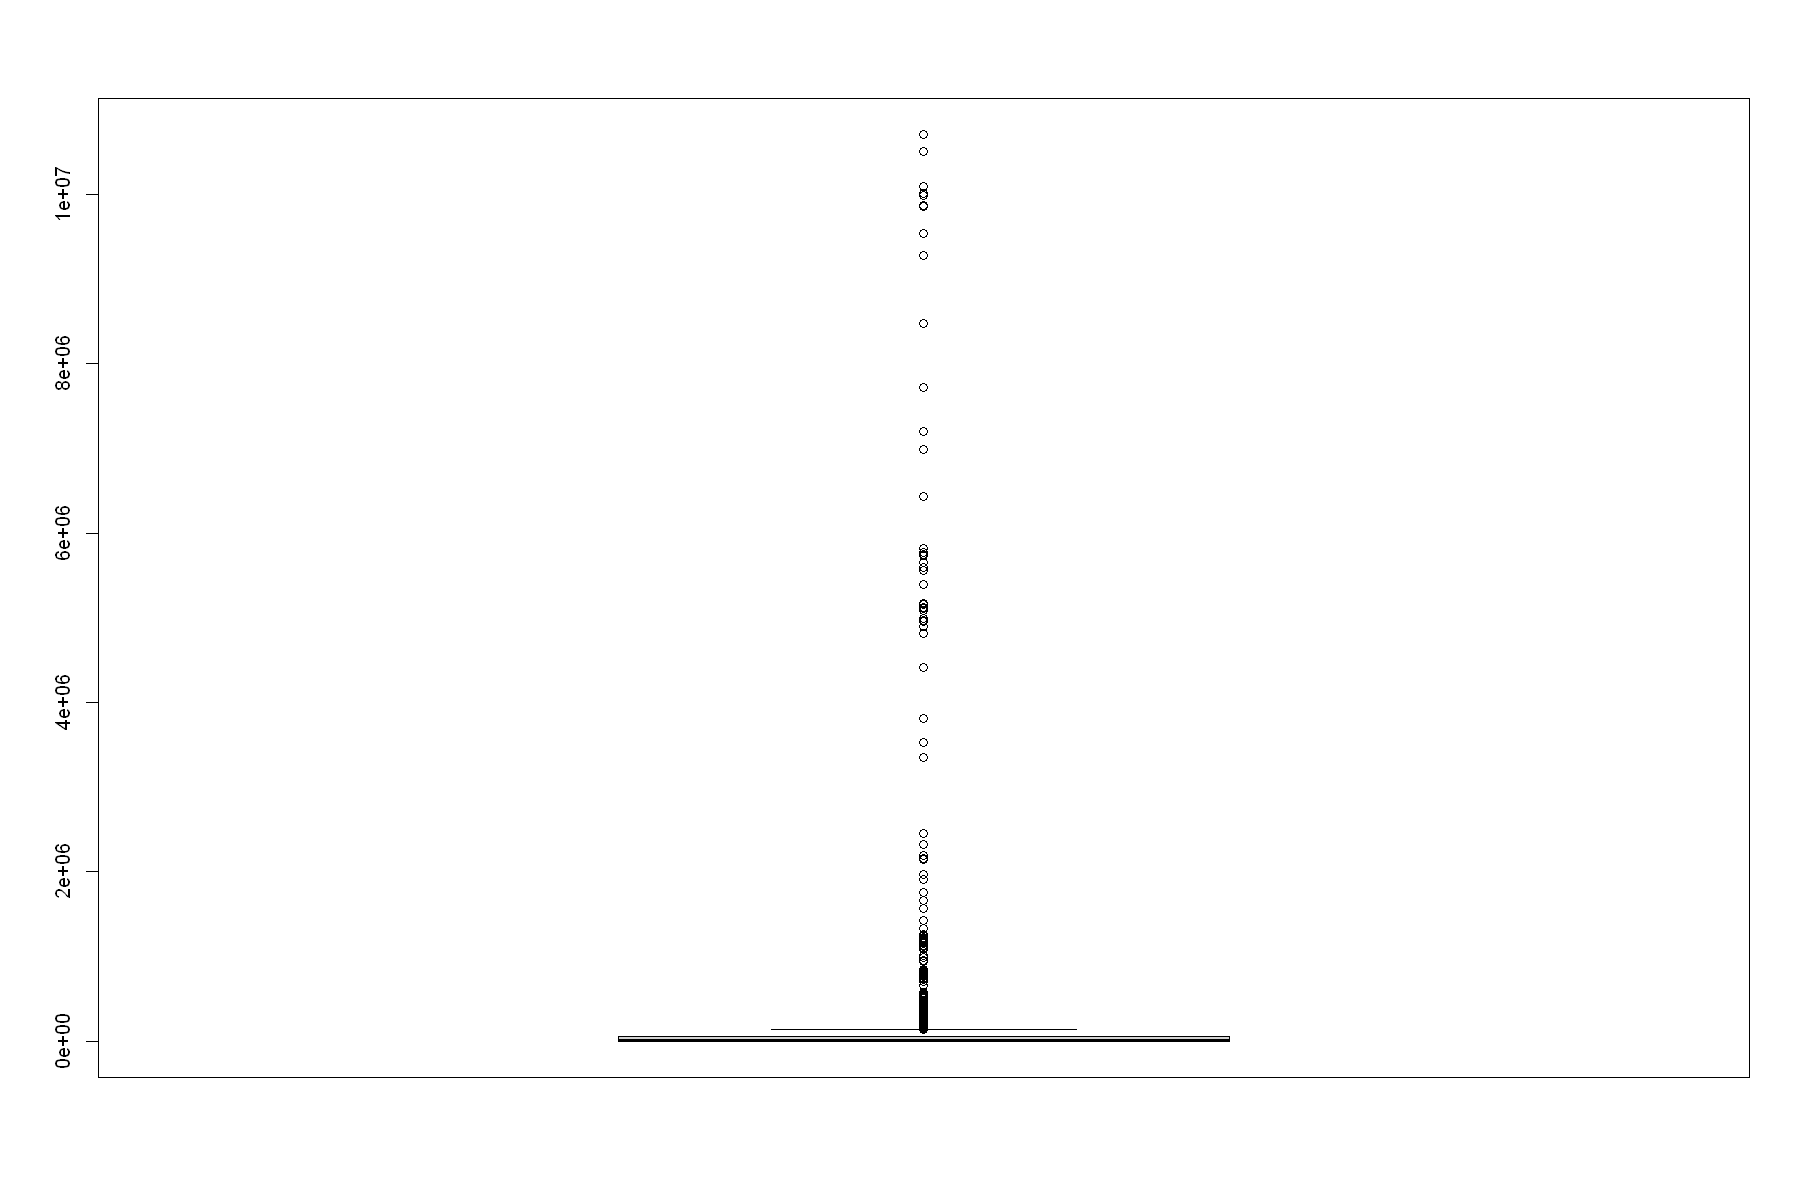

In [25]:
boxplot(df$Value_co2)

Les échelles de valeurs sont très différentes en fonction des variables que nous regardons dans notre energyset, nos avons choisi de nous focaliser sur Value_CO2 et nous voyons que celle-ci est composée de beaucoup d'outliers. Donc l'observation en boxplot n'est pas forcément pertinente.

##### Transformation des variables

Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead."


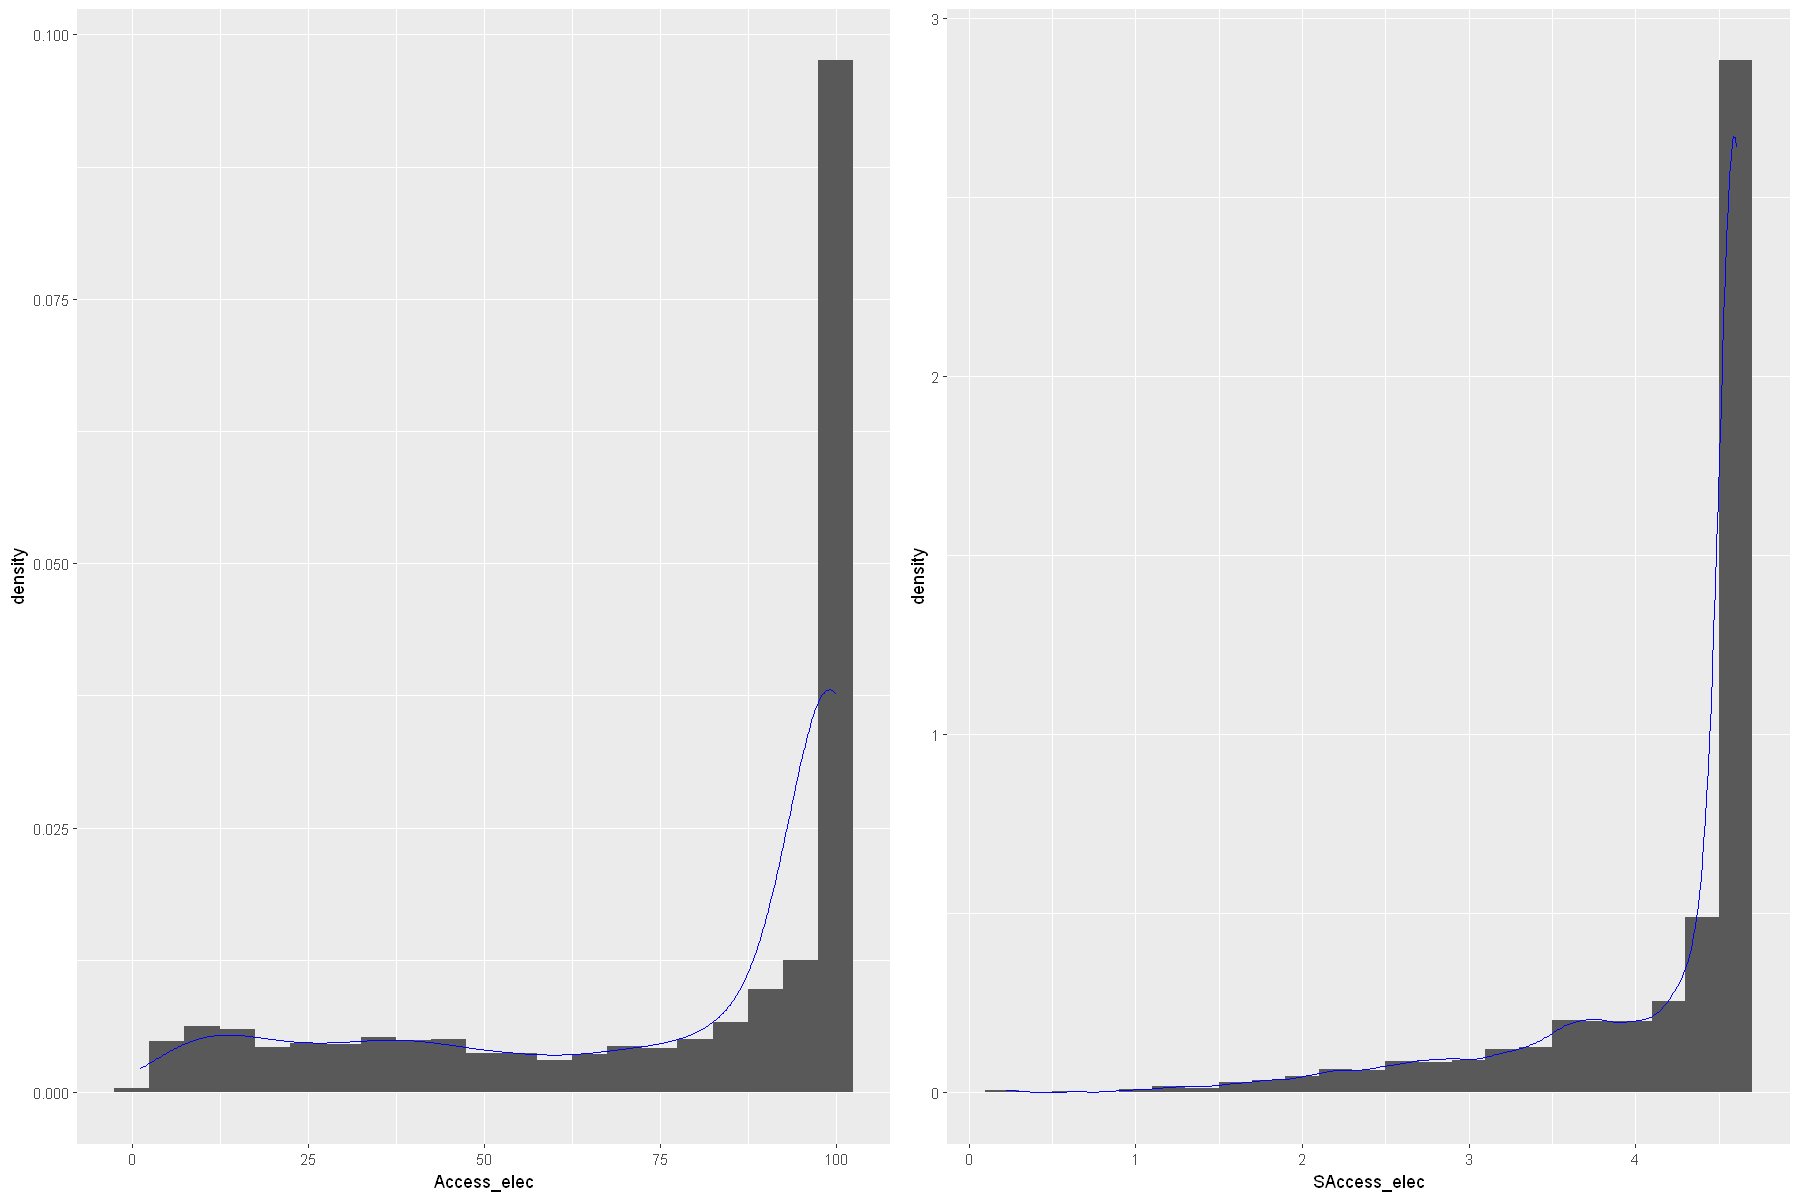

In [26]:
complete_energy[, "SAccess_elec"] = log(complete_energy[, "Access_elec"])

g1 = ggplot(complete_energy,aes(x=Access_elec))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SAccess_elec))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

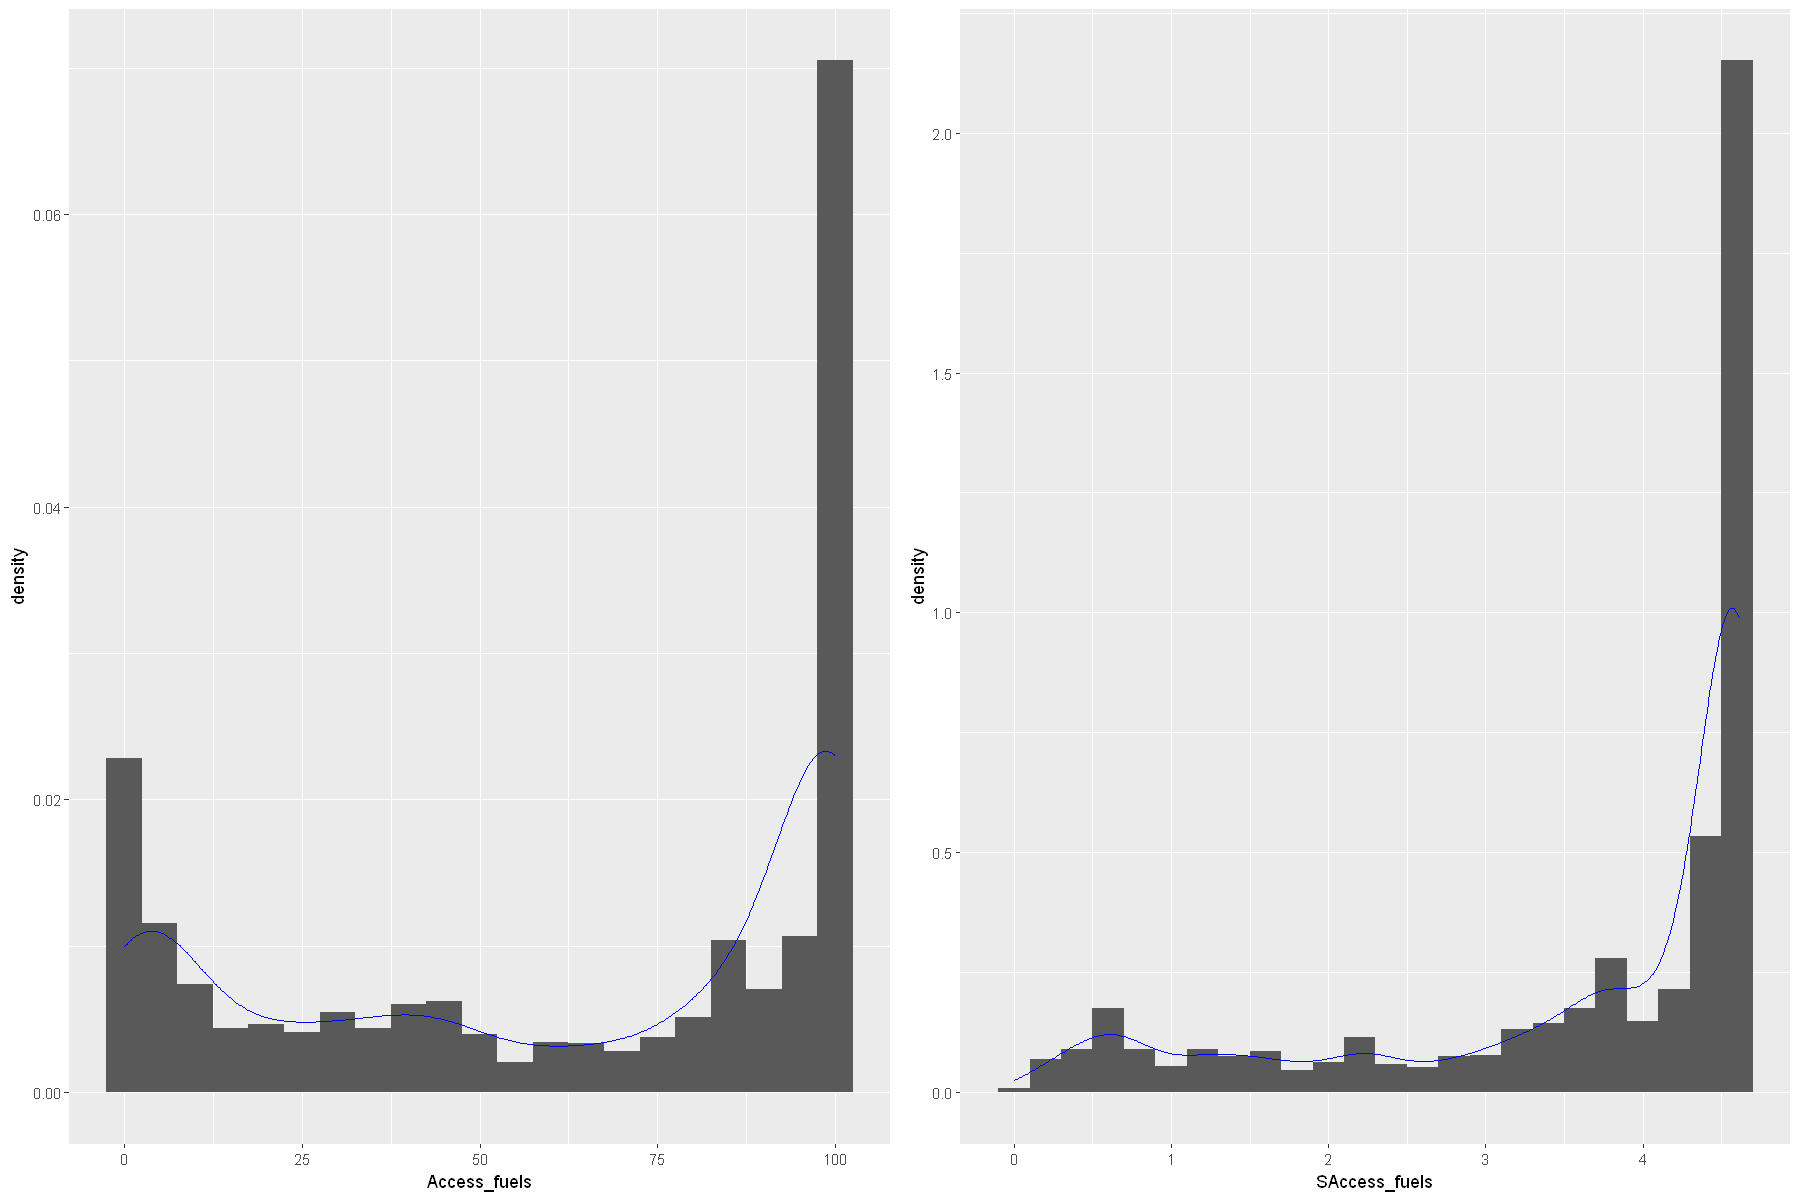

In [27]:
complete_energy[, "SAccess_fuels"] = log(1+complete_energy[, "Access_fuels"])

g1 = ggplot(complete_energy,aes(x=Access_fuels))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SAccess_fuels))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

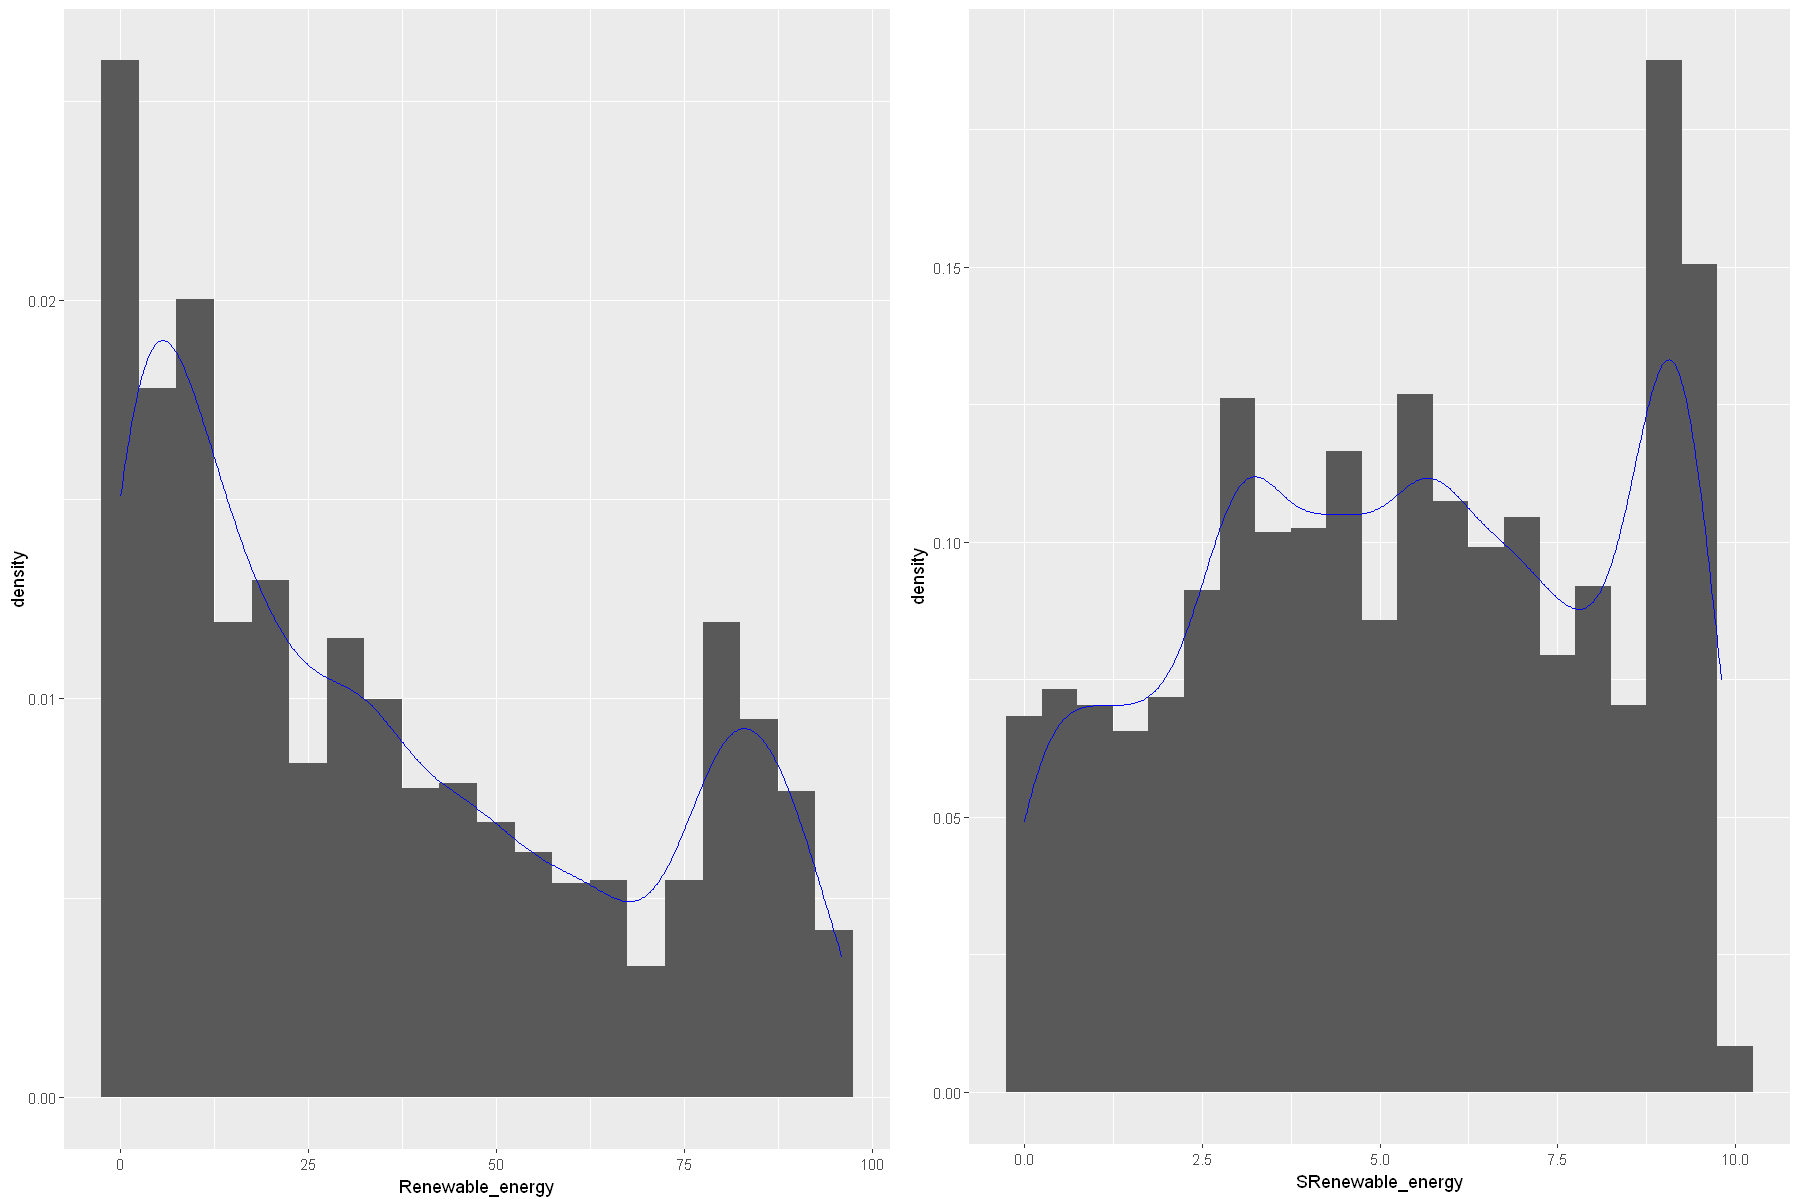

In [28]:
complete_energy[, "SRenewable_energy"] = sqrt(complete_energy[, "Renewable_energy"])

g1 = ggplot(complete_energy,aes(x=Renewable_energy))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SRenewable_energy))+ geom_histogram(aes(y=..density..),binwidth = 0.5)+geom_density(alpha=.1, col="blue") 
grid.arrange(g1,g2,ncol=2)

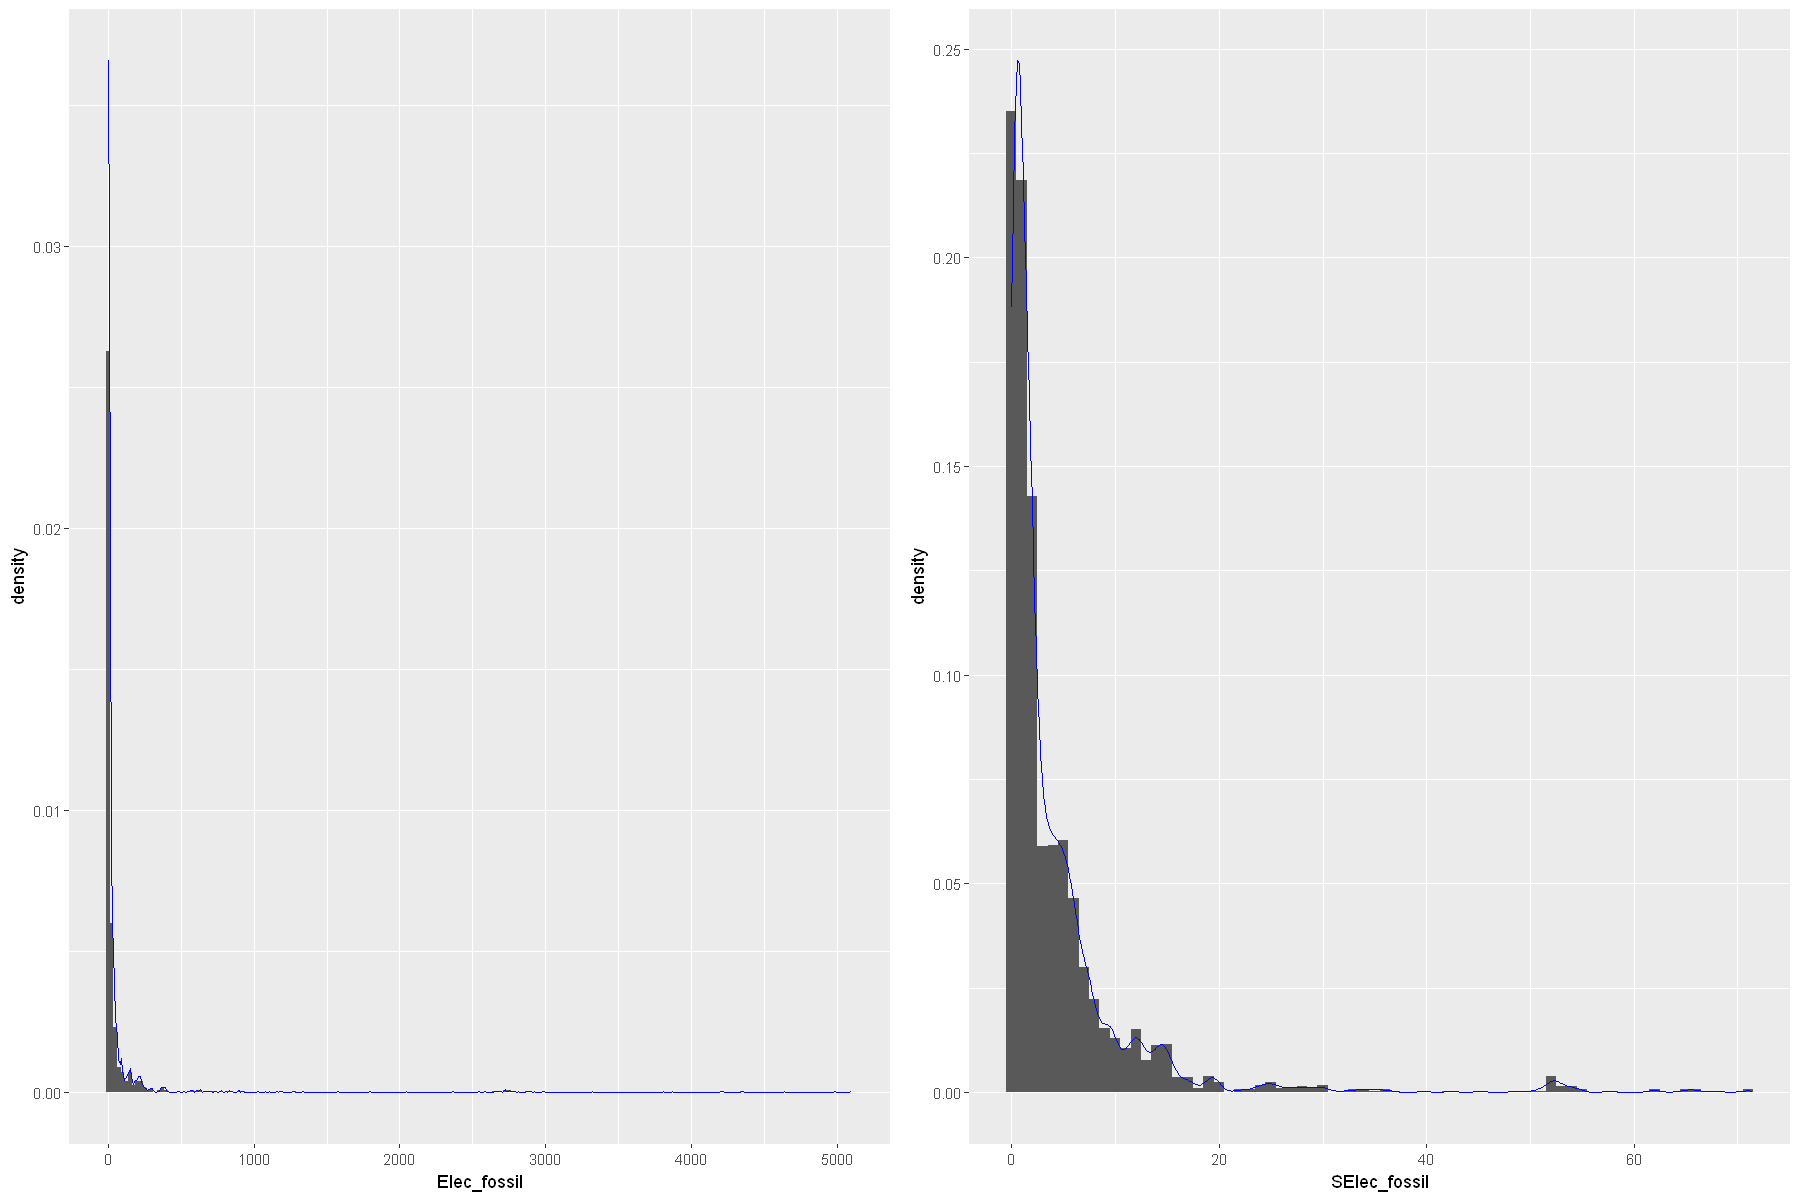

In [29]:
complete_energy[, "SElec_fossil"] = sqrt(complete_energy[, "Elec_fossil"])

g1 = ggplot(complete_energy,aes(x=Elec_fossil))+ geom_histogram(aes(y=..density..),binwidth = 25)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SElec_fossil))+ geom_histogram(aes(y=..density..),binwidth = 1)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

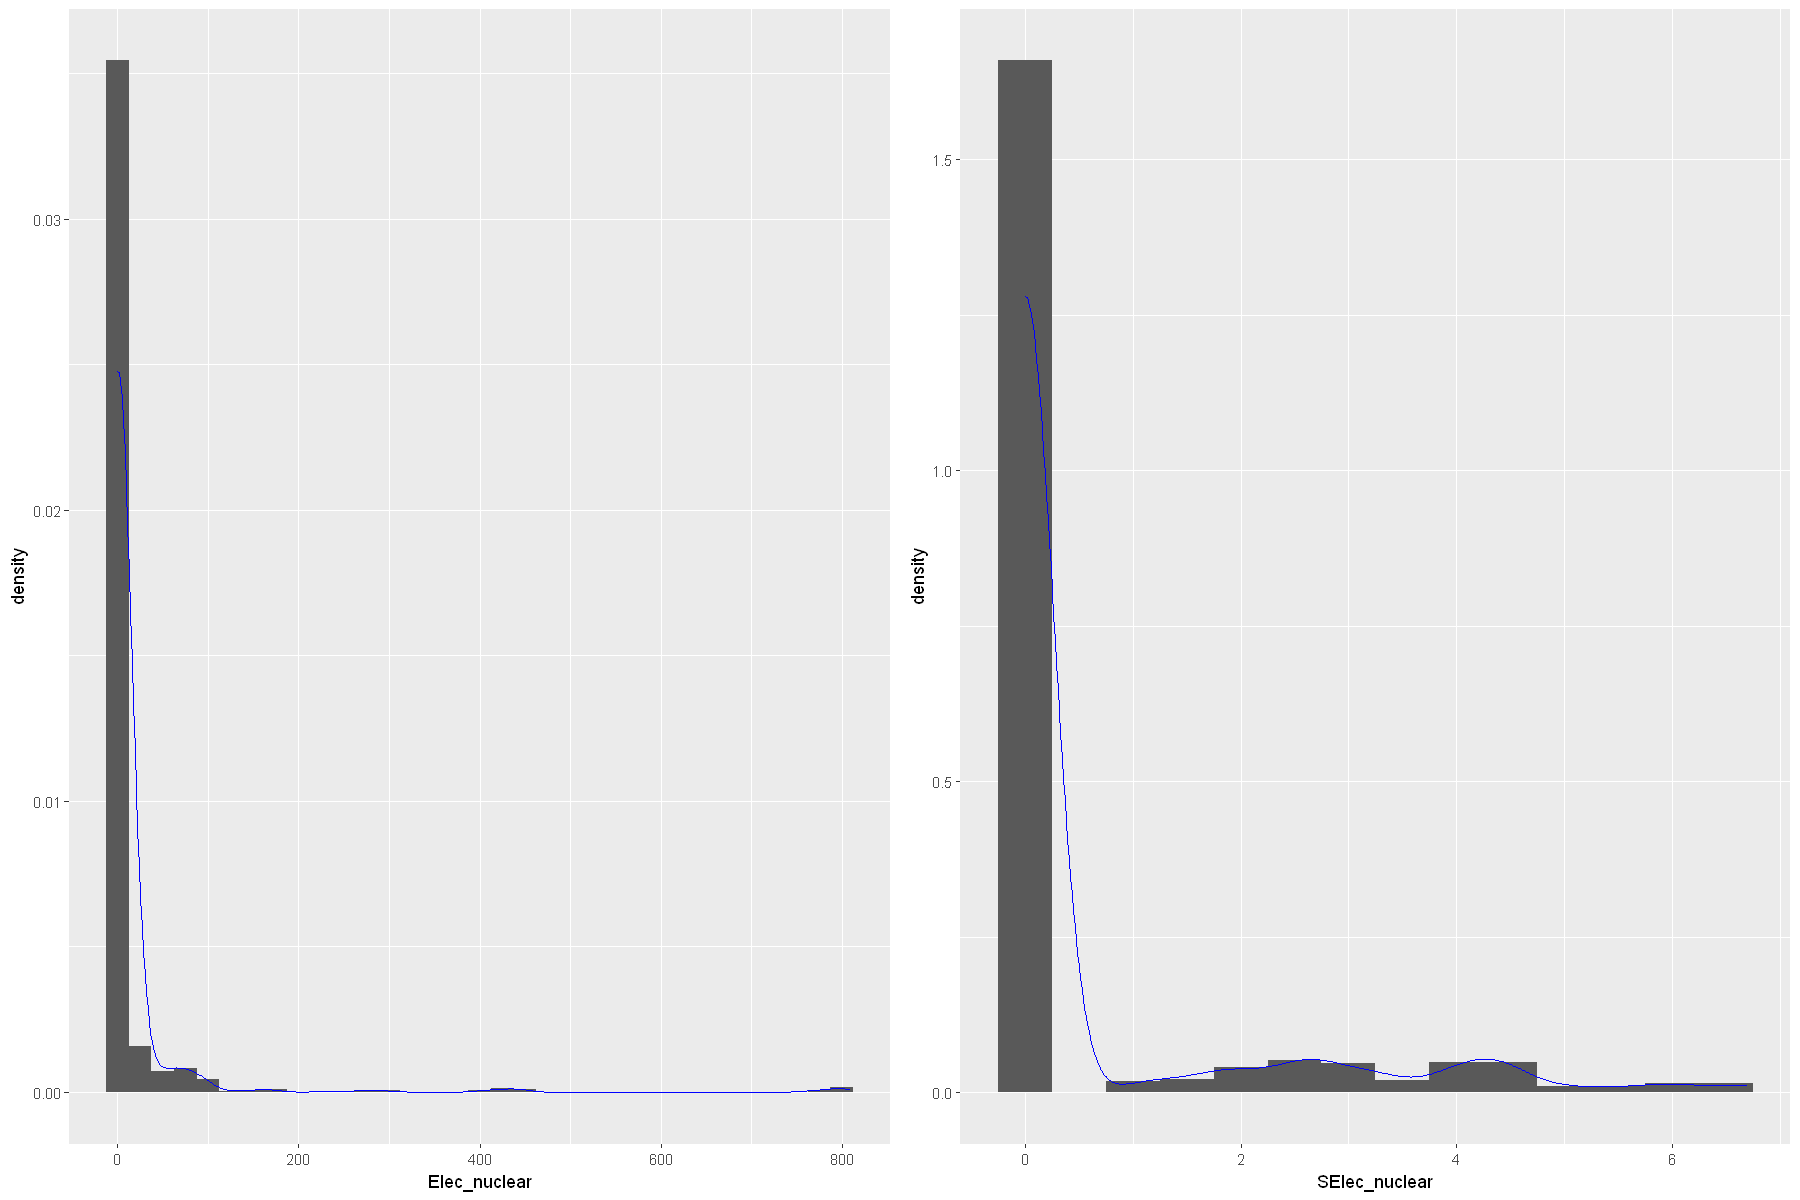

In [30]:
complete_energy[, "SElec_nuclear"] = log(1+complete_energy[, "Elec_nuclear"])

g1 = ggplot(complete_energy,aes(x=Elec_nuclear))+ geom_histogram(aes(y=..density..),binwidth = 25)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SElec_nuclear))+ geom_histogram(aes(y=..density..),binwidth = 0.5)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

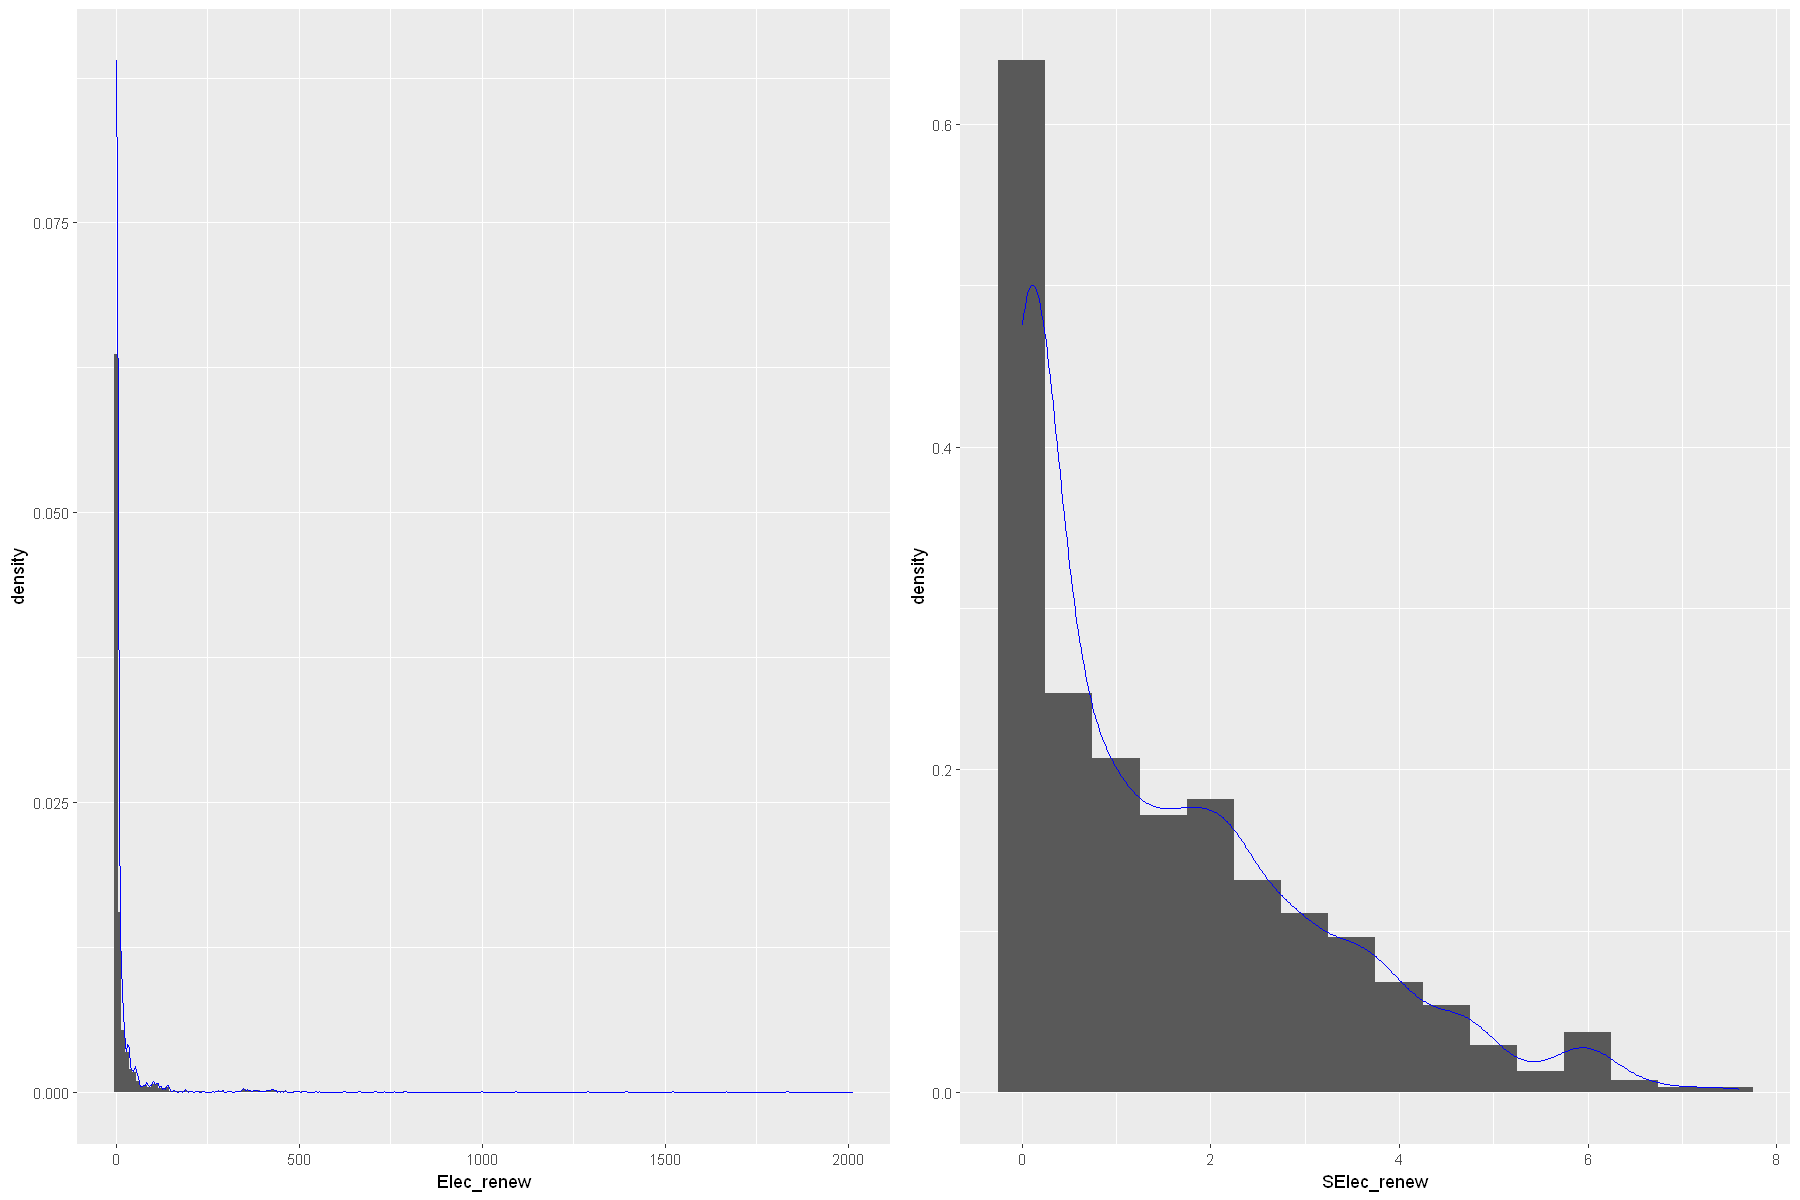

In [31]:
complete_energy[, "SElec_renew"] = log(1+complete_energy[, "Elec_renew"])

g1 = ggplot(complete_energy,aes(x=Elec_renew))+ geom_histogram(aes(y=..density..),binwidth = 10)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SElec_renew))+ geom_histogram(aes(y=..density..),binwidth = 0.5)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

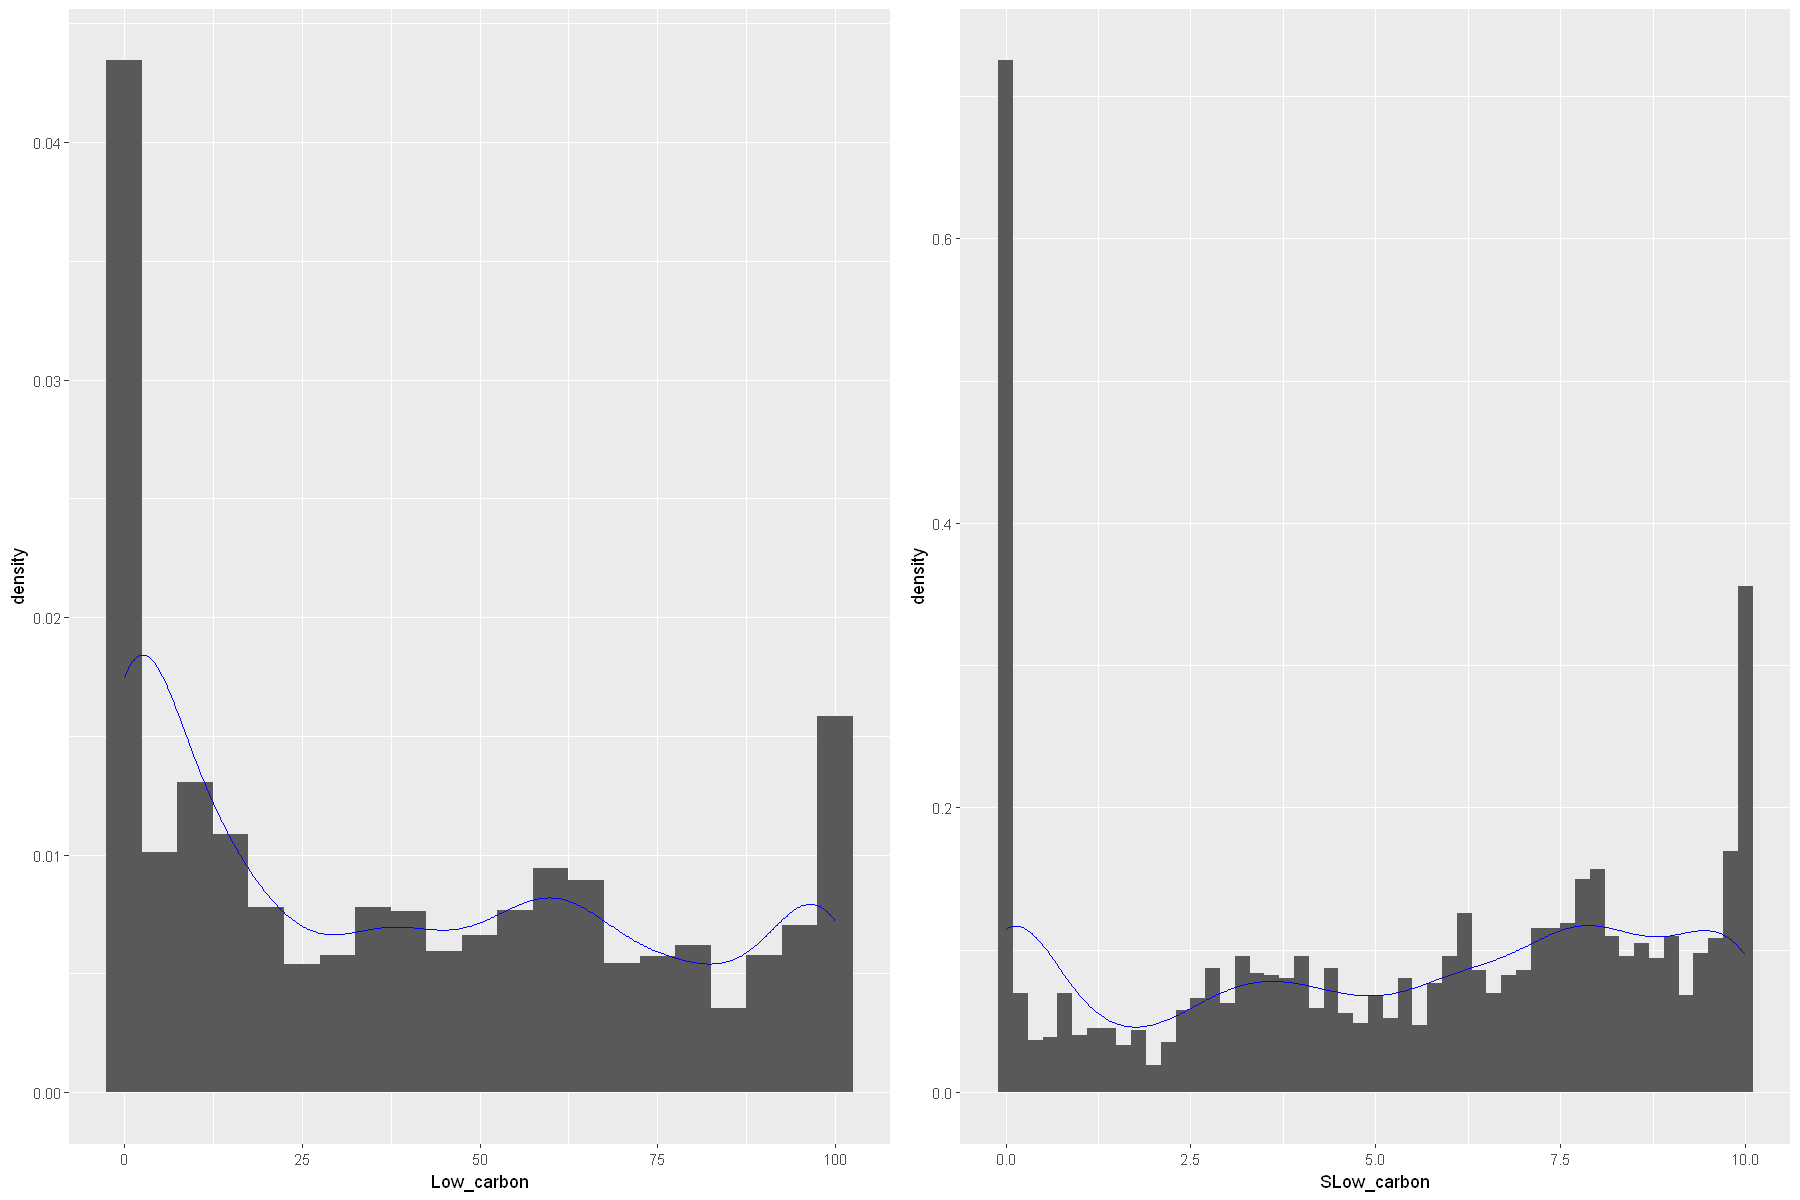

In [32]:
complete_energy[, "SLow_carbon"] = sqrt(complete_energy[, "Low_carbon"])

g1 = ggplot(complete_energy,aes(x=Low_carbon))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SLow_carbon))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

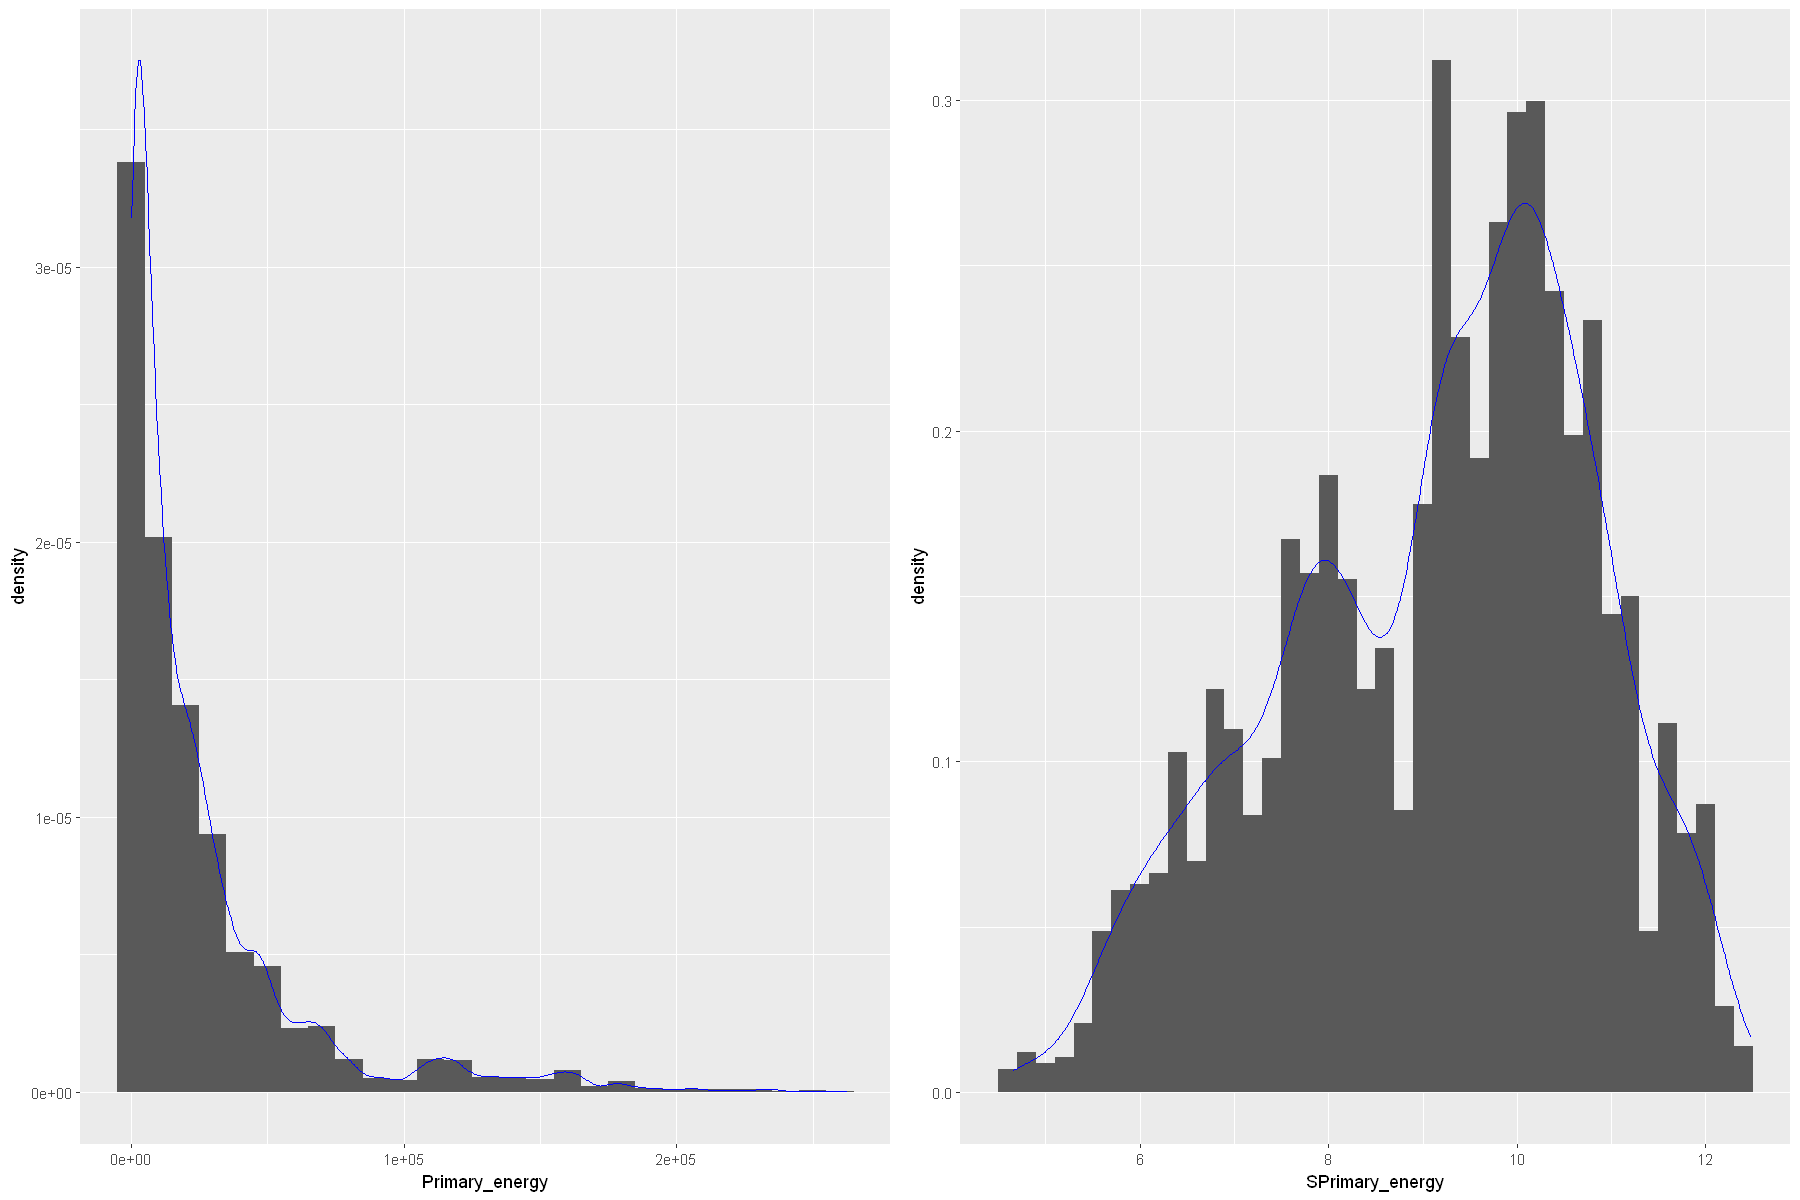

In [33]:
complete_energy[, "SPrimary_energy"] = log(complete_energy[, "Primary_energy"])

g1 = ggplot(complete_energy,aes(x=Primary_energy))+ geom_histogram(aes(y=..density..),binwidth = 10000)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SPrimary_energy))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

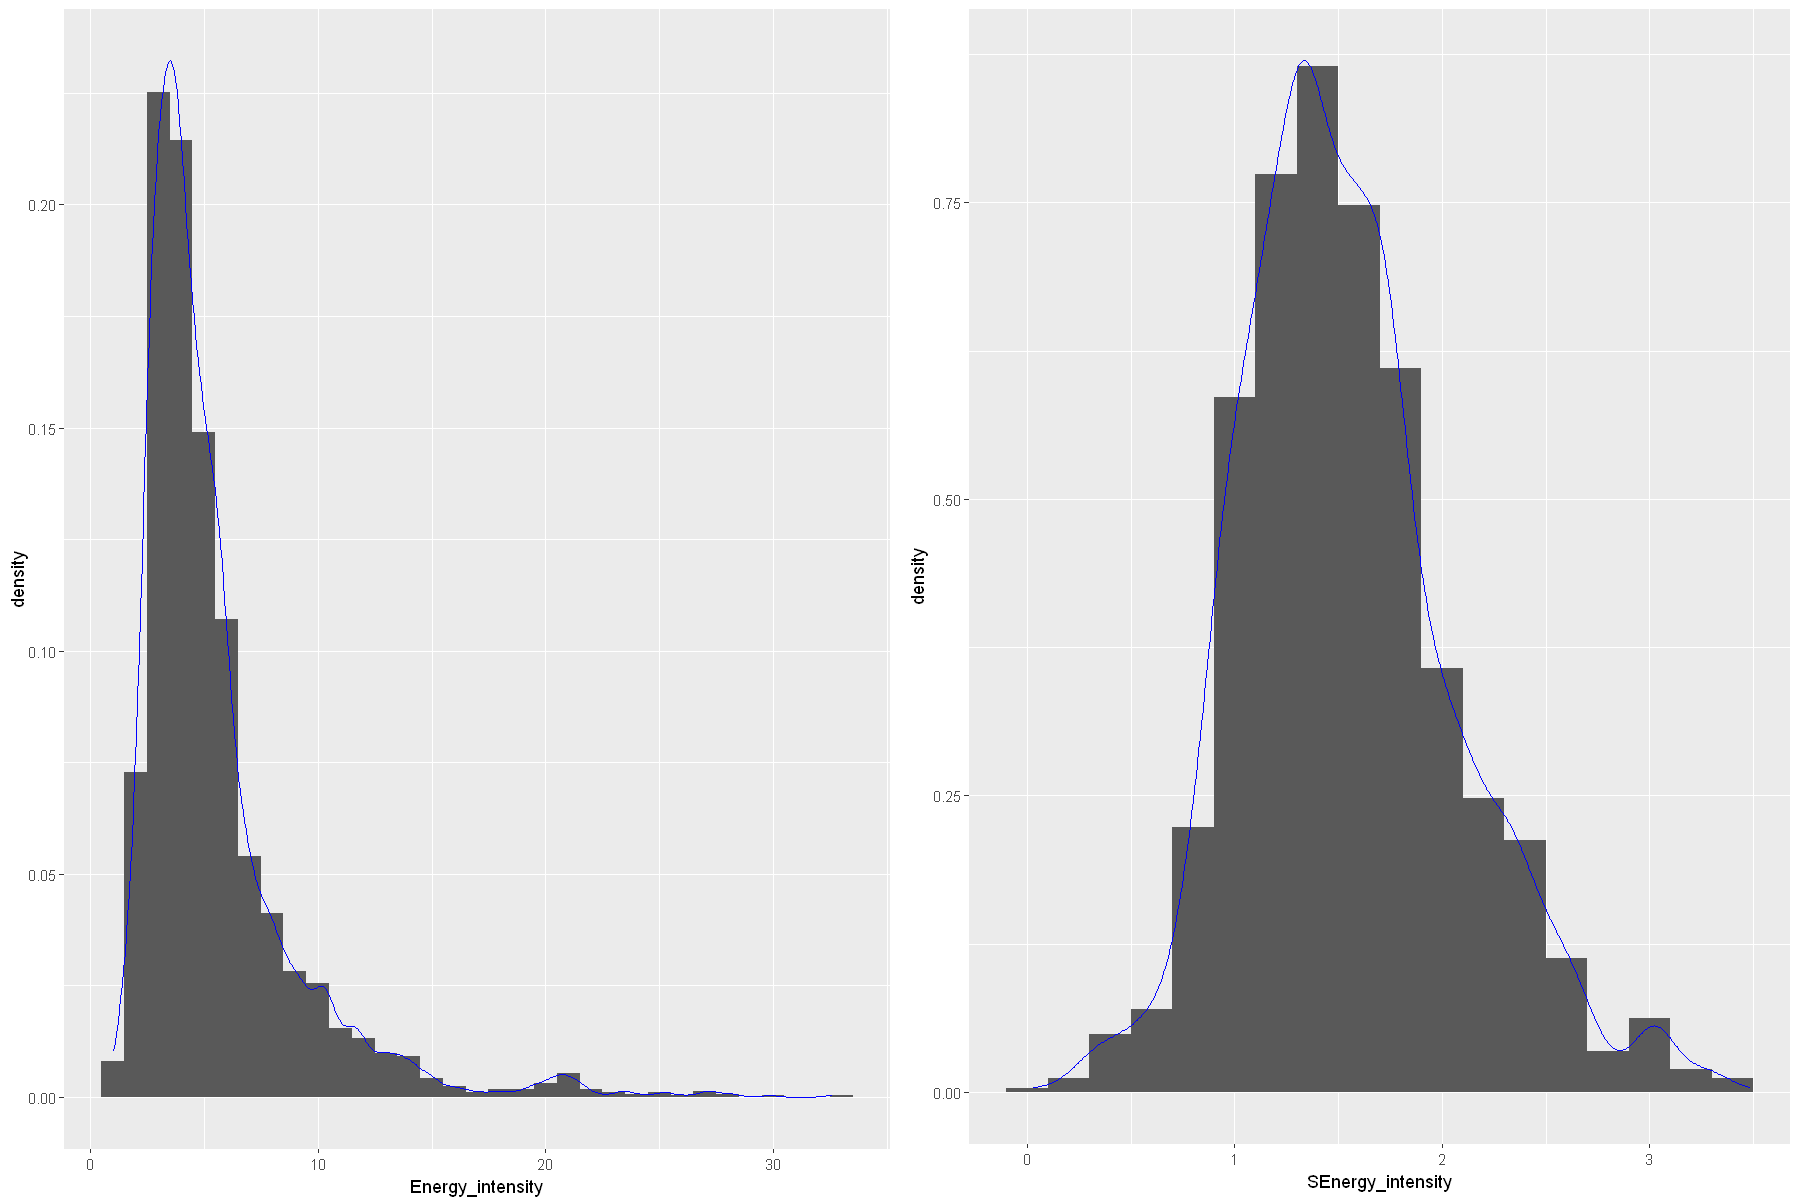

In [34]:
complete_energy[, "SEnergy_intensity"] = log(complete_energy[, "Energy_intensity"])

g1 = ggplot(complete_energy,aes(x=Energy_intensity))+ geom_histogram(aes(y=..density..),binwidth = 1)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SEnergy_intensity))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

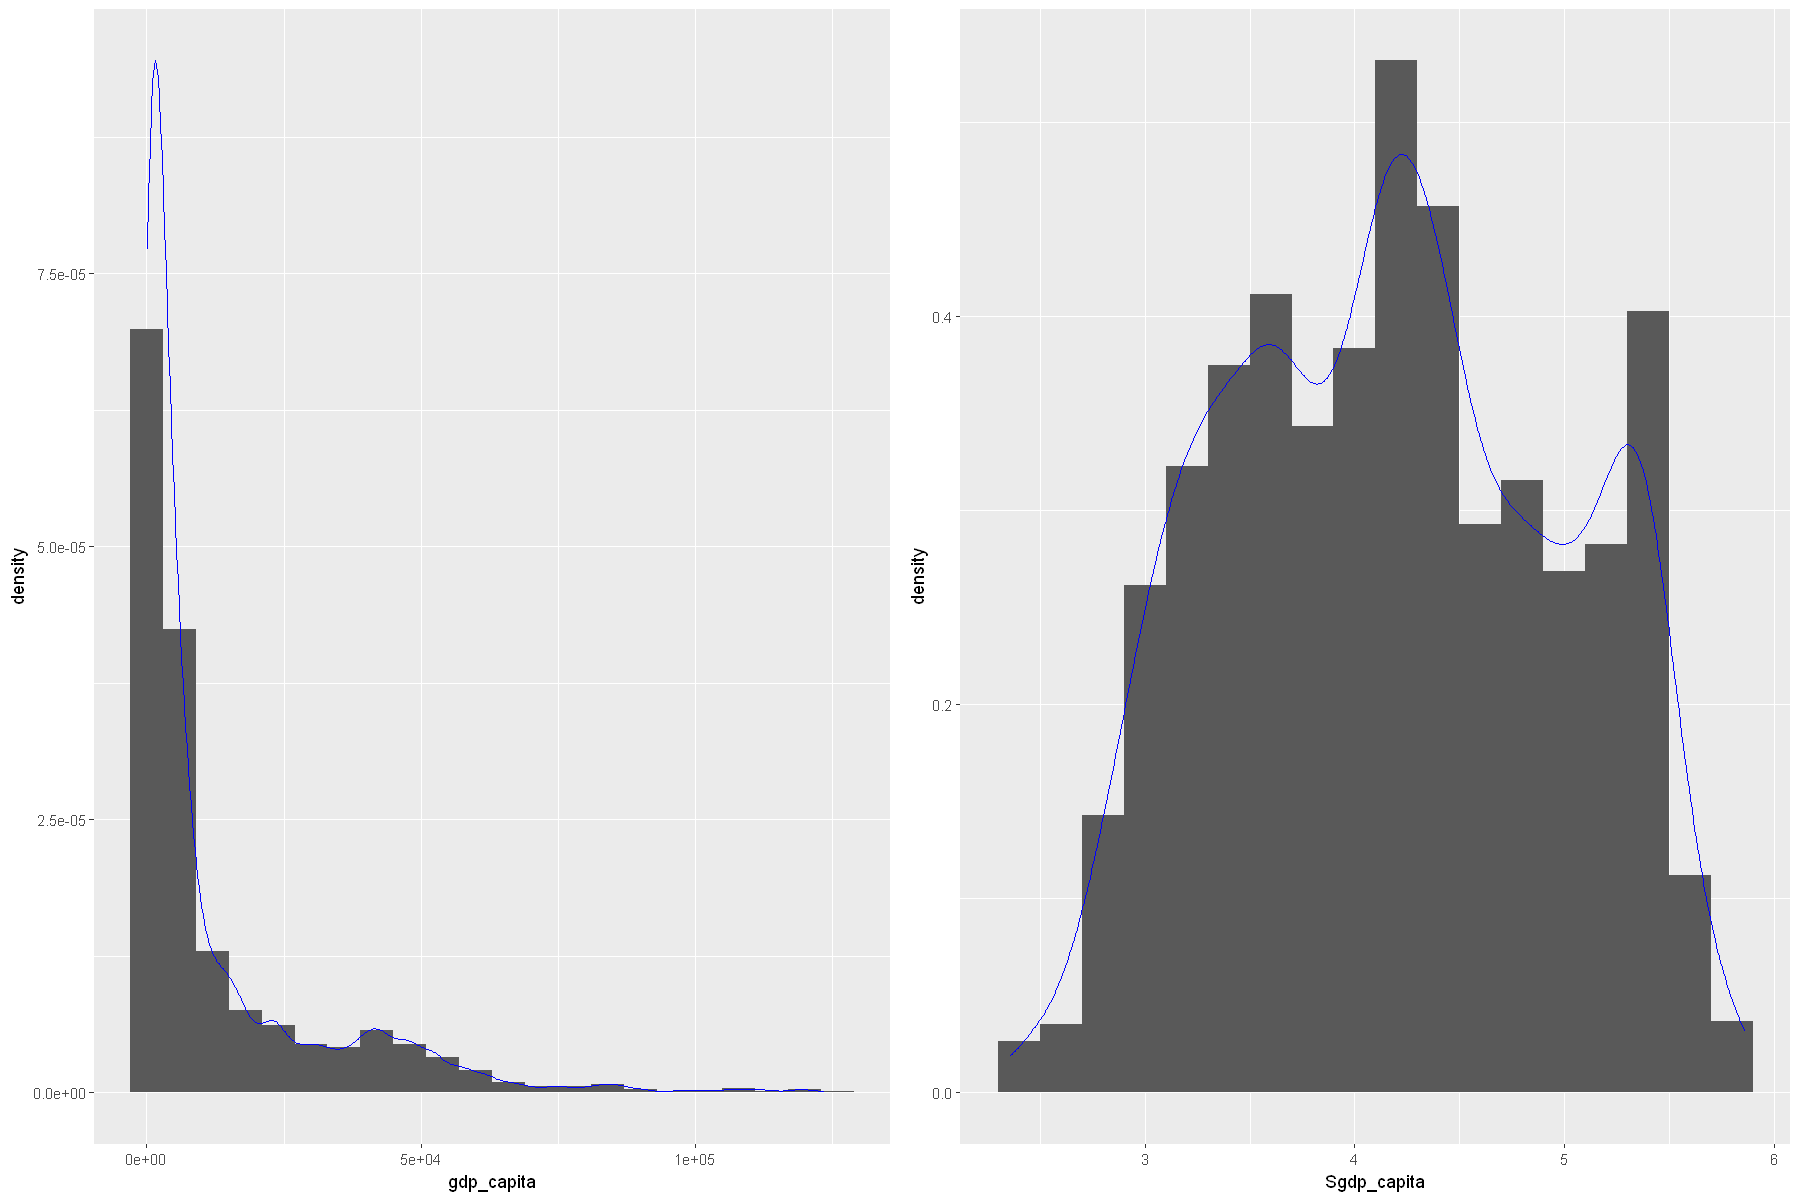

In [35]:
complete_energy[, "Sgdp_capita"] = log(sqrt(complete_energy[, "gdp_capita"]))

g1 = ggplot(complete_energy,aes(x=gdp_capita))+ geom_histogram(aes(y=..density..),binwidth = 6000)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=Sgdp_capita))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

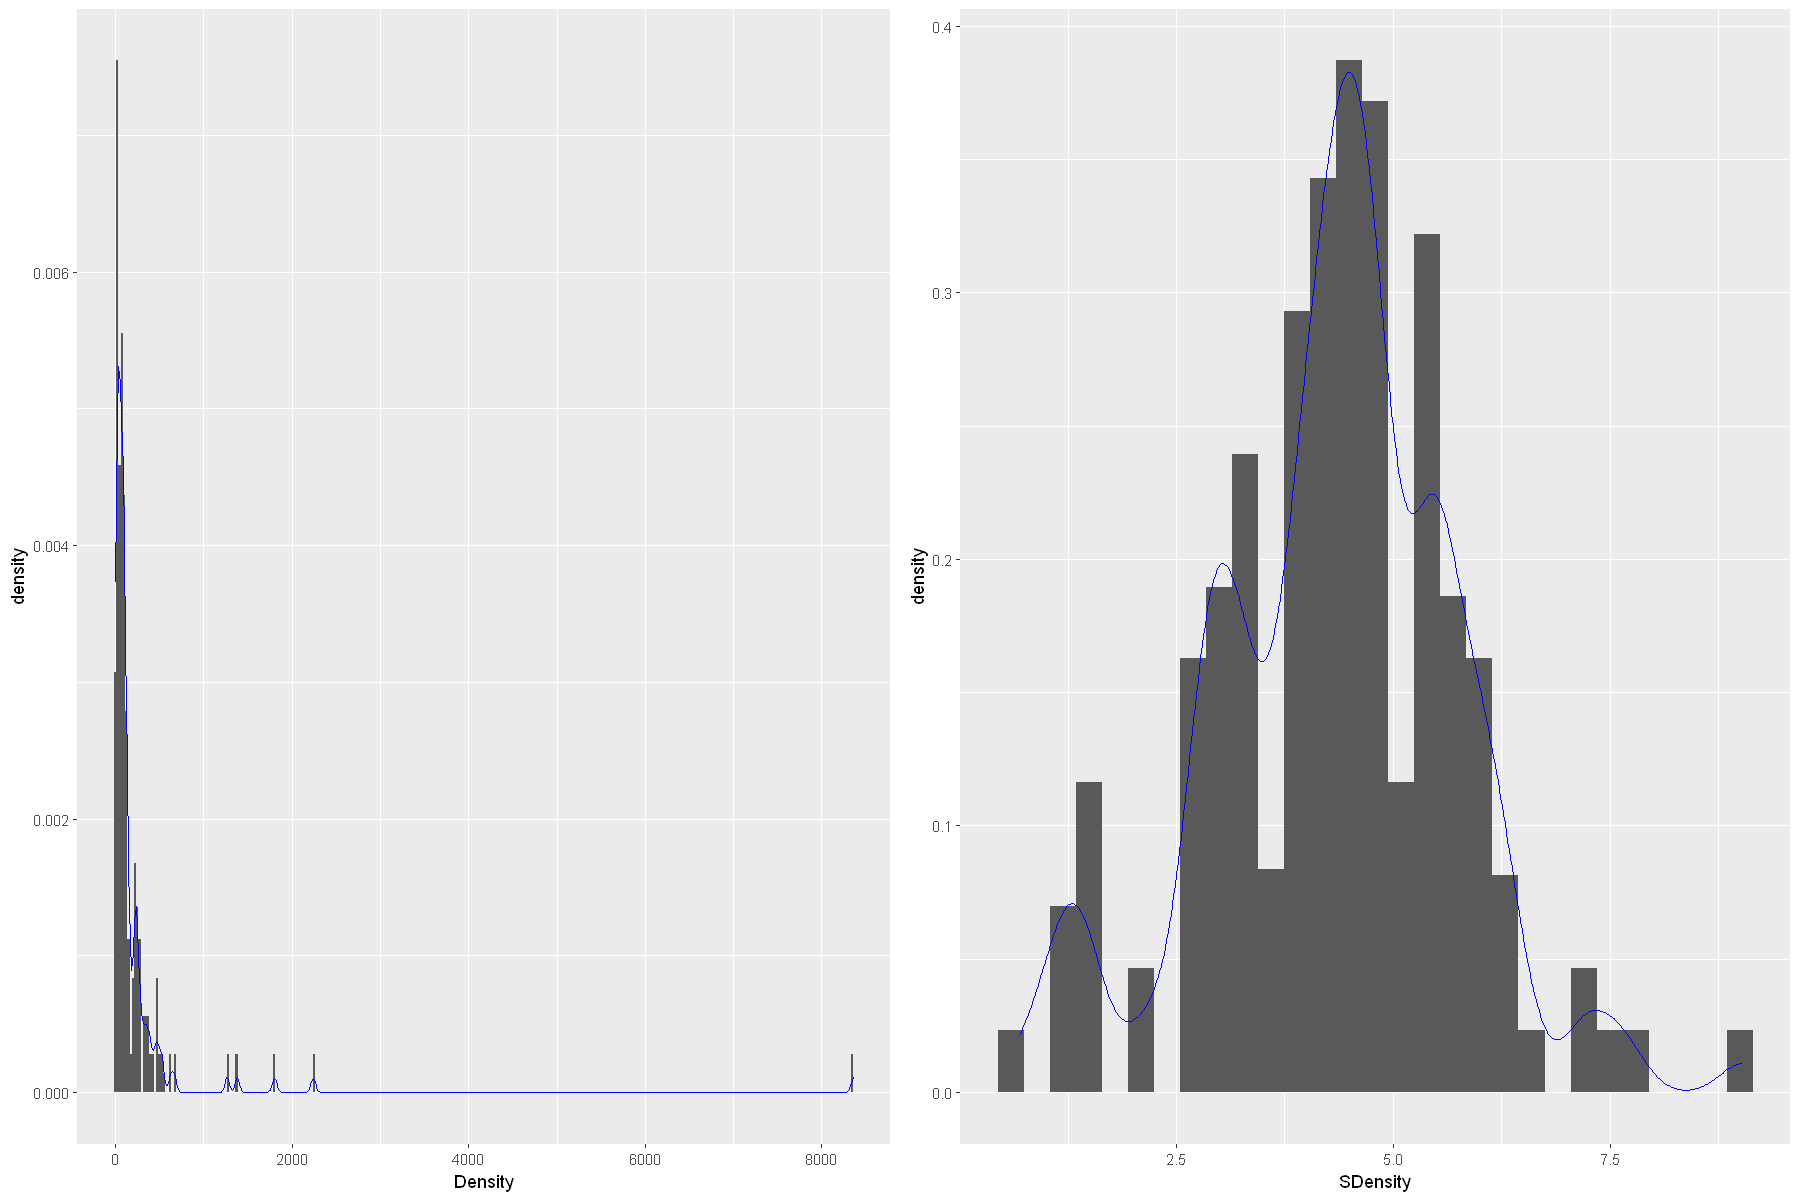

In [36]:
complete_energy[, "SDensity"] = log(complete_energy[, "Density"])

g1 = ggplot(complete_energy,aes(x=Density))+ geom_histogram(aes(y=..density..),binwidth = 25)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SDensity))+ geom_histogram(aes(y=..density..),binwidth = 0.3)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

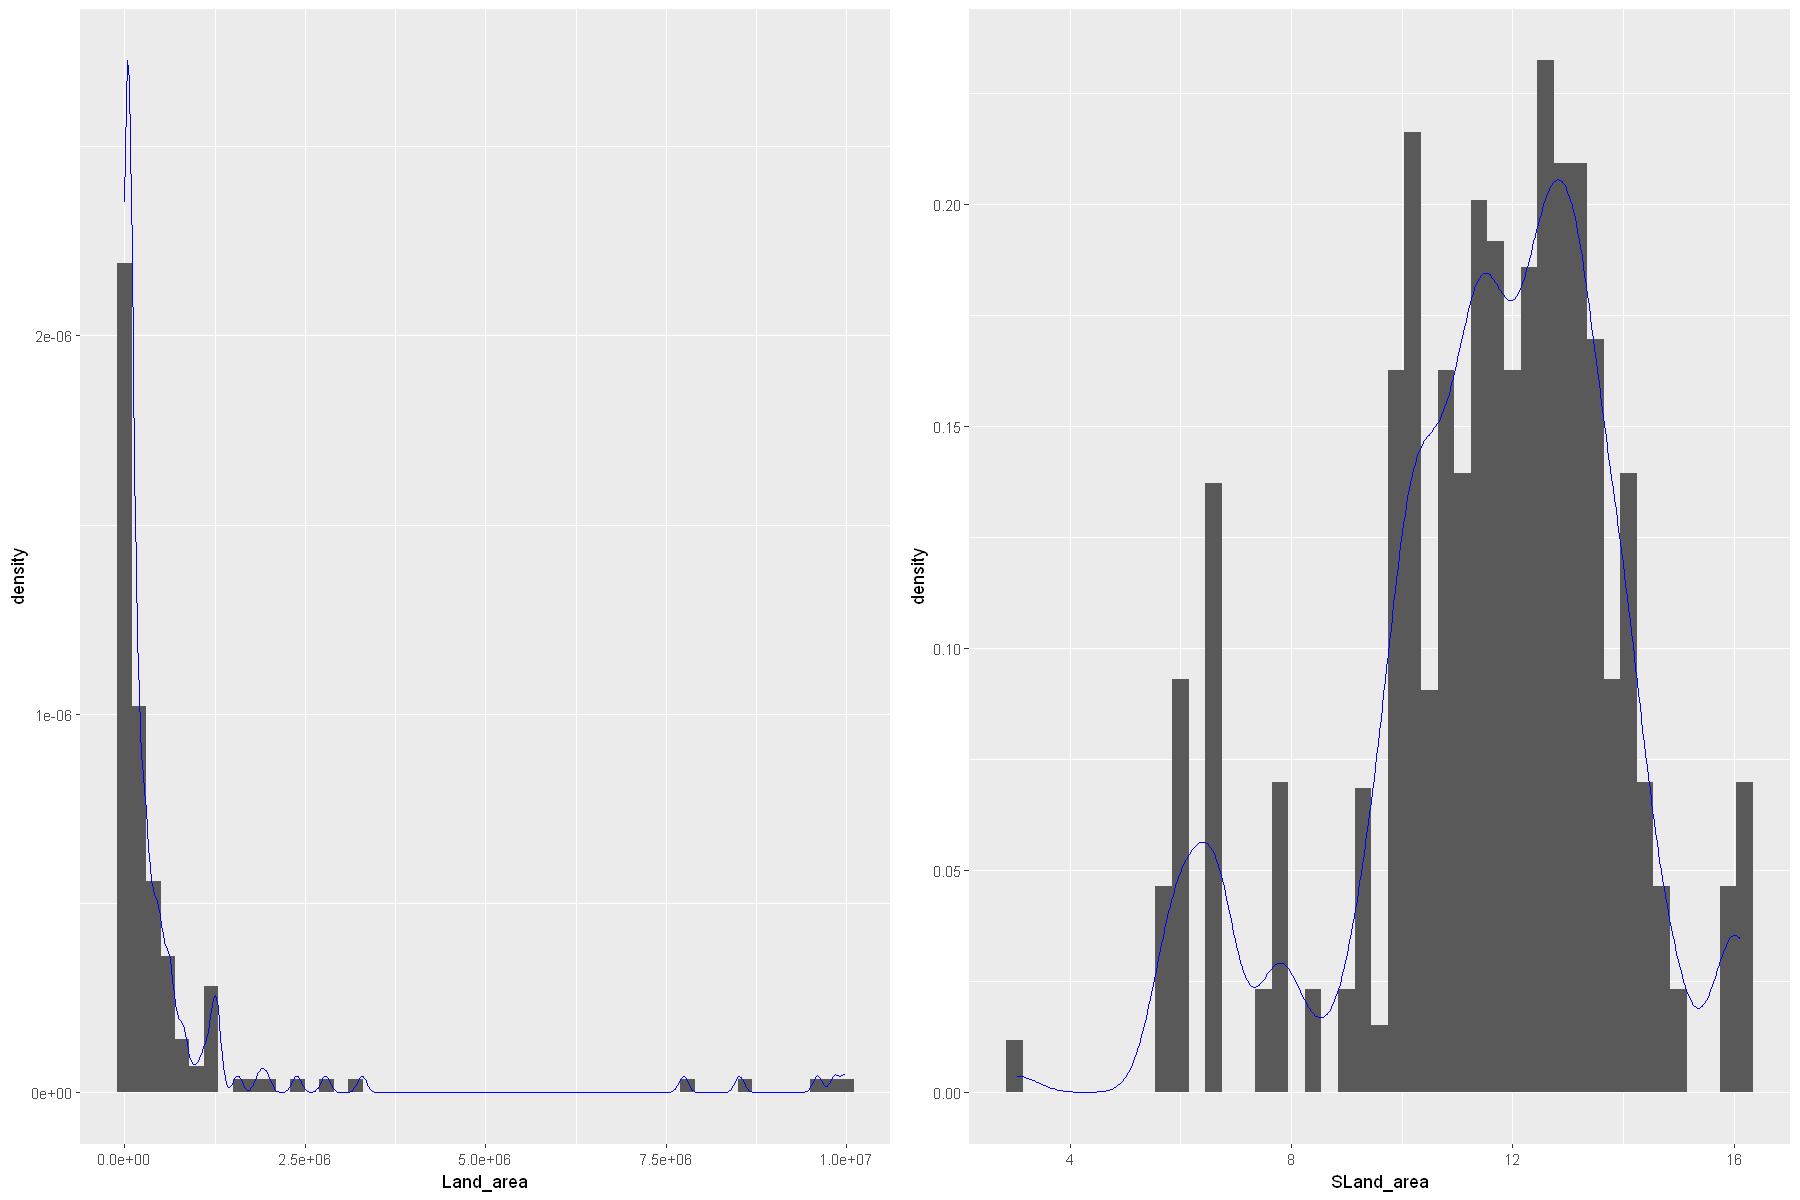

In [37]:
complete_energy[, "SLand_area"] = log(complete_energy[, "Land_area"])

g1 = ggplot(complete_energy,aes(x=Land_area))+ geom_histogram(aes(y=..density..),binwidth = 200000)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SLand_area))+ geom_histogram(aes(y=..density..),binwidth = 0.3)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

## Question 5

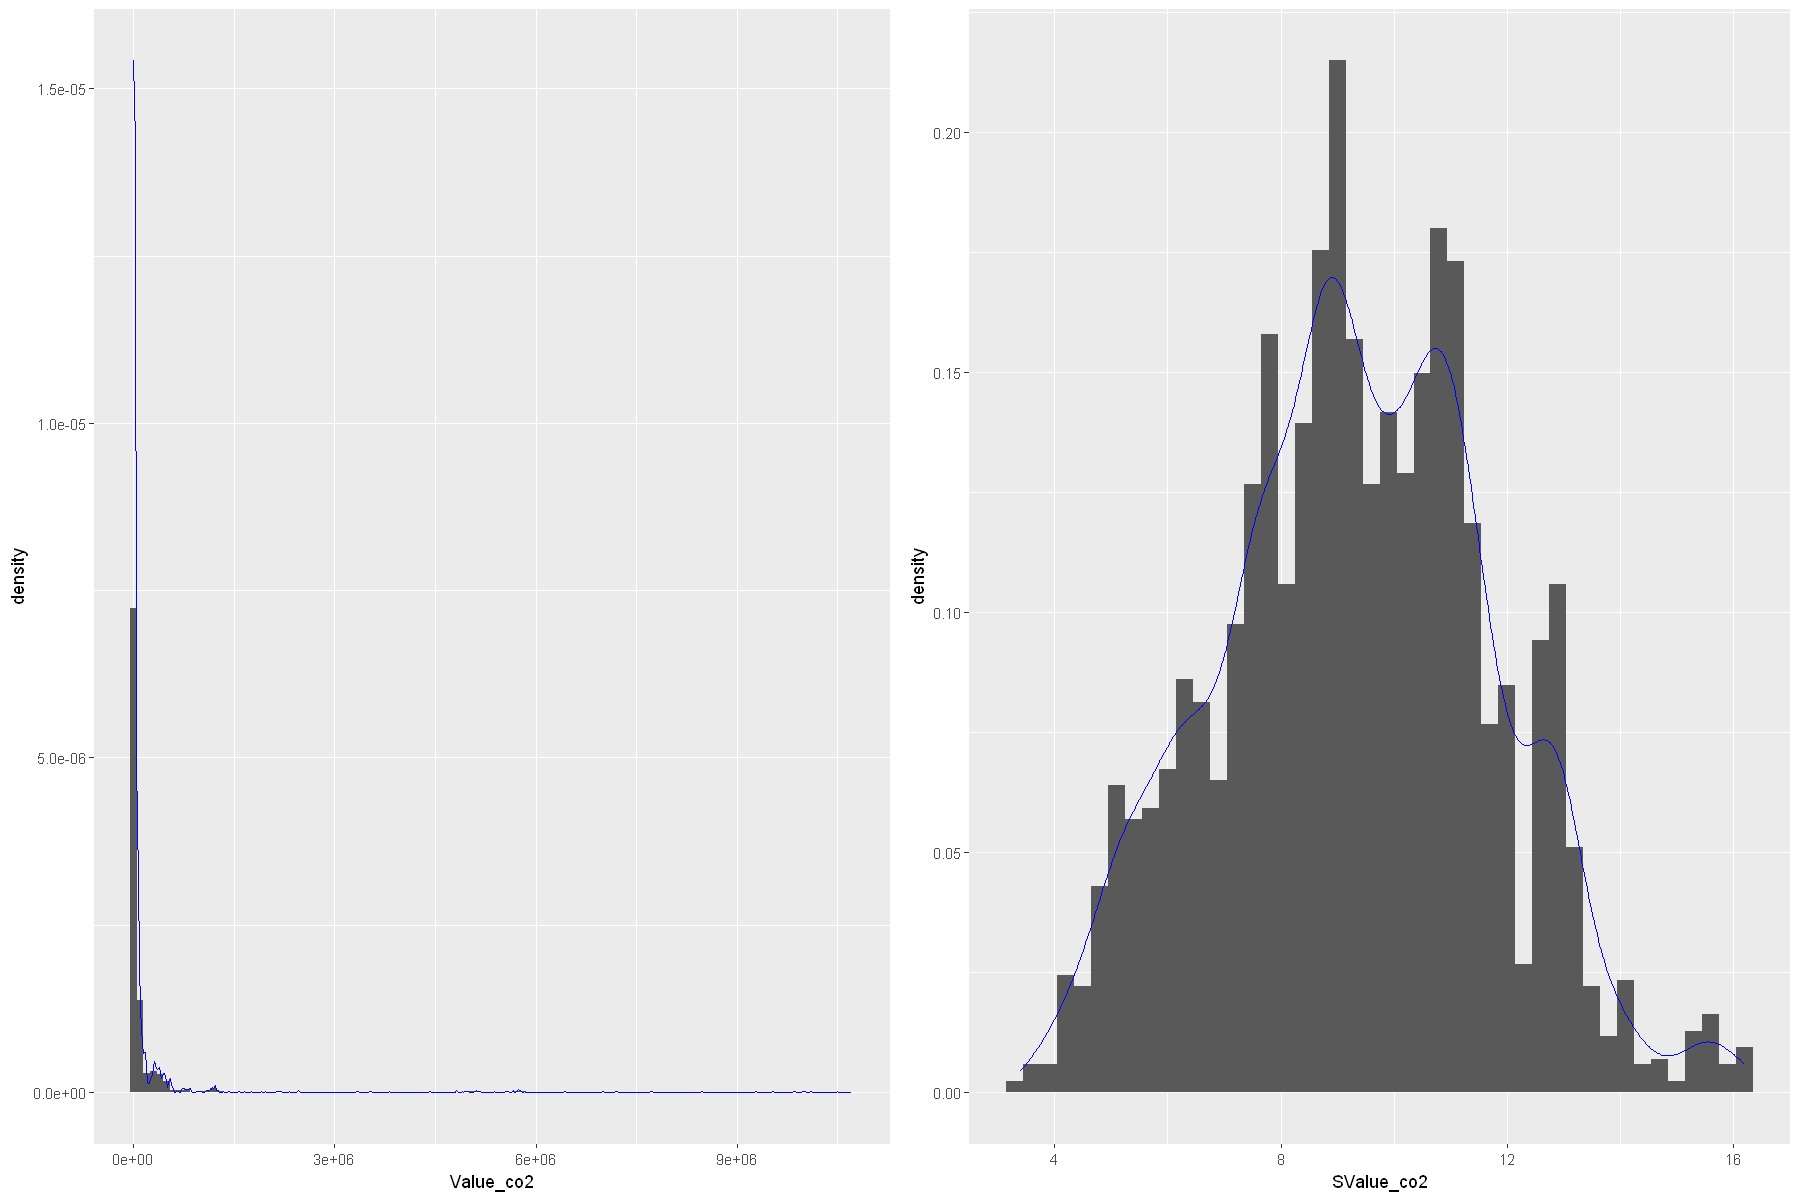

In [38]:
complete_energy[, "SValue_co2"] = log(complete_energy[, "Value_co2"])

g1 = ggplot(complete_energy,aes(x=Value_co2))+ geom_histogram(aes(y=..density..),binwidth = 100000)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SValue_co2))+ geom_histogram(aes(y=..density..),binwidth = 0.3)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

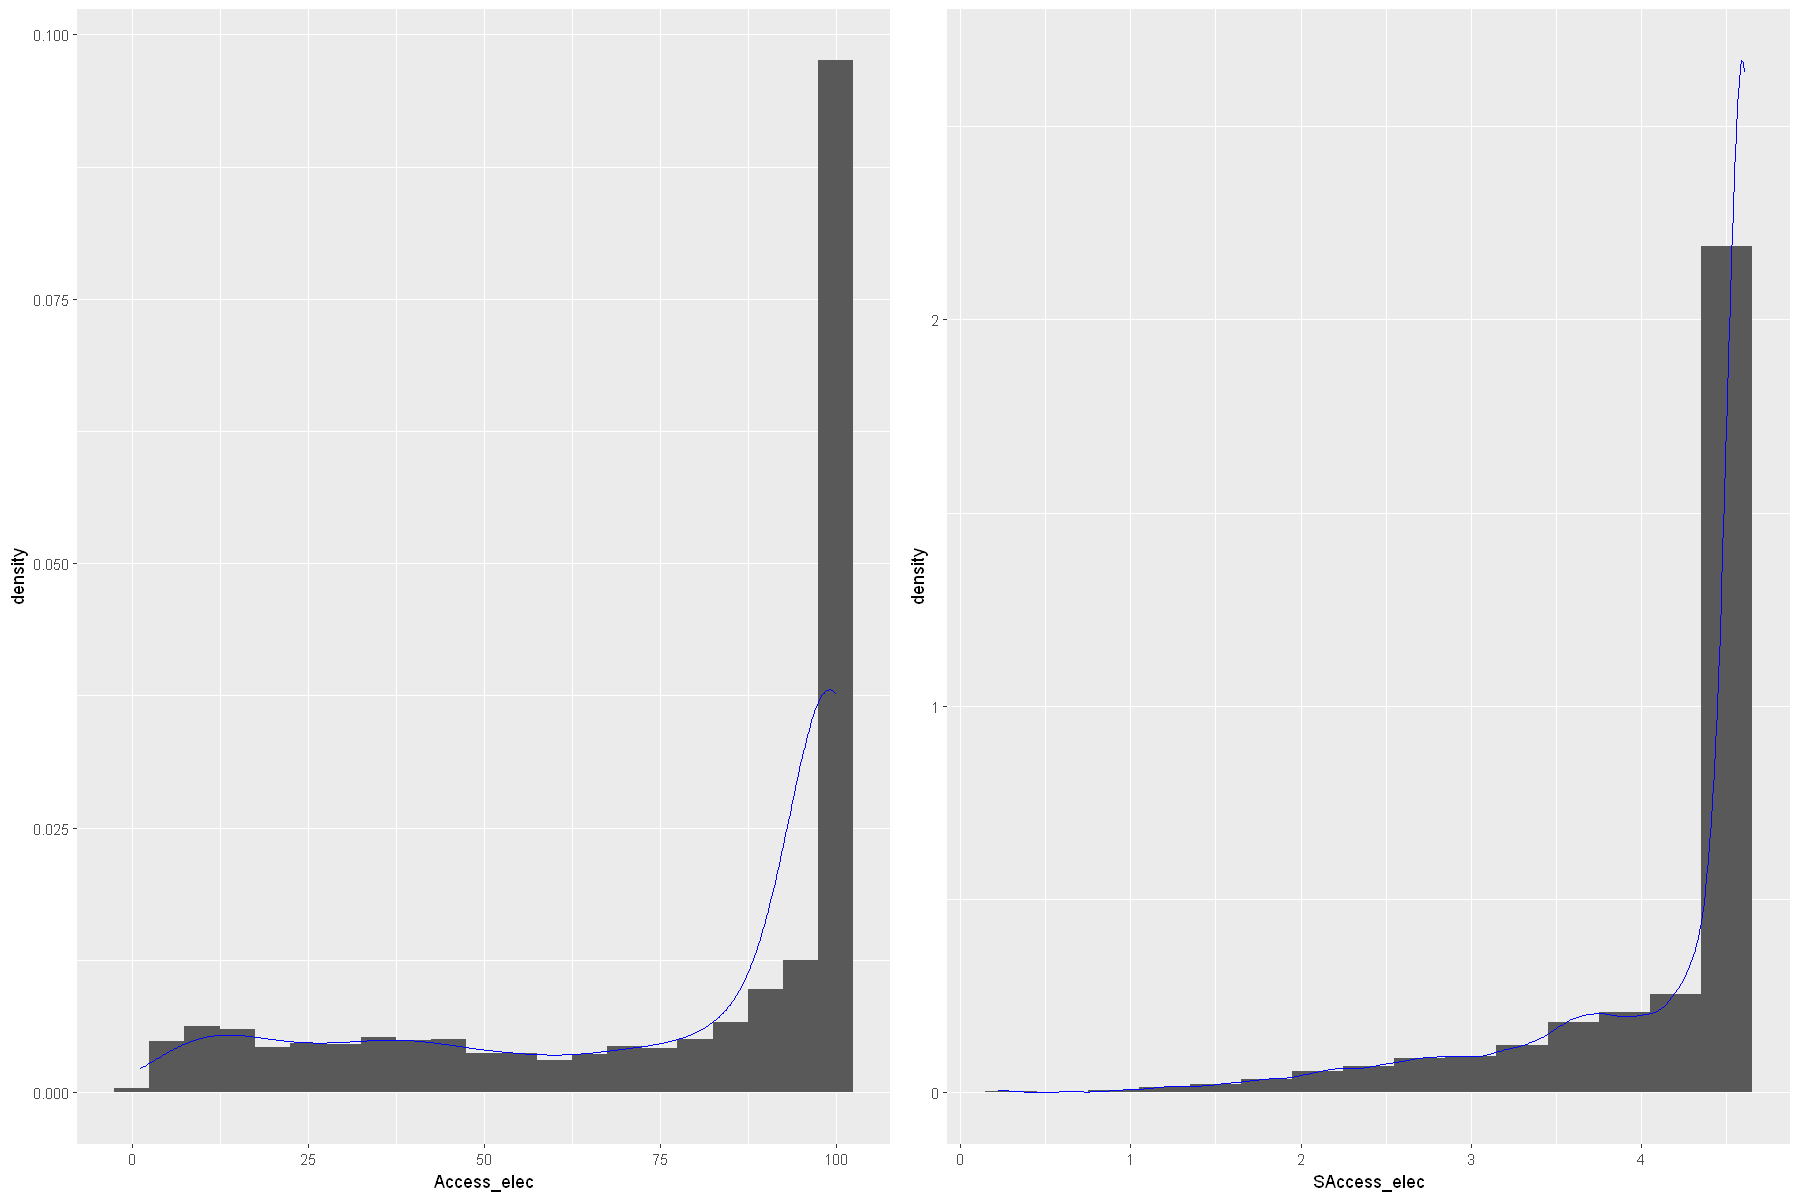

In [39]:
complete_energy[, "SAccess_elec"] = log(complete_energy[, "Access_elec"])

g1 = ggplot(complete_energy,aes(x=Access_elec))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SAccess_elec))+ geom_histogram(aes(y=..density..),binwidth =0.3)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

#Pourquoi deux fois ? 

In [40]:
#for (i in 3:length(names(complete_energy))) {

#complete_energy[, "SAccess.to.electricity....of.population."] = log(complete_energy[, "Access.to.electricity....of.population."])

#g1 = ggplot(complete_energy,aes(x=Access.to.electricity....of.population.))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
#g2 = ggplot(complete_energy,aes(x=SAccess.to.electricity....of.population.))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

#grid.arrange(g1,g2,ncol=2)
    
#}

In [41]:
#summary(complete_energy)

In [42]:
complete_energy = complete_energy[-c(3,4,5,6,7,8,9,10,11,14,15,16)]

In [43]:
summary(complete_energy)

    Entity               Year        Value_co2          gdp_growth     
 Length:2868        2014   : 147   Min.   :      30   Min.   :-36.658  
 Class :character   2015   : 147   1st Qu.:    2188   1st Qu.:  1.771  
 Mode  :character   2016   : 146   Median :   10425   Median :  3.788  
                    2017   : 146   Mean   :  168818   Mean   :  3.895  
                    2018   : 146   3rd Qu.:   58145   3rd Qu.:  5.957  
                    2019   : 146   Max.   :10707220   Max.   : 63.380  
                    (Other):1990                                       
    Latitude         Longitude        SAccess_elec   SAccess_fuels  
 Min.   :-40.901   Min.   :-175.20   Min.   :0.225   Min.   :0.000  
 1st Qu.:  1.651   1st Qu.: -10.94   1st Qu.:3.975   1st Qu.:3.139  
 Median : 17.061   Median :  18.64   Median :4.575   Median :4.413  
 Mean   : 18.140   Mean   :  12.97   Mean   :4.160   Mean   :3.633  
 3rd Qu.: 39.400   3rd Qu.:  43.68   3rd Qu.:4.605   3rd Qu.:4.615  
 Max.   : 

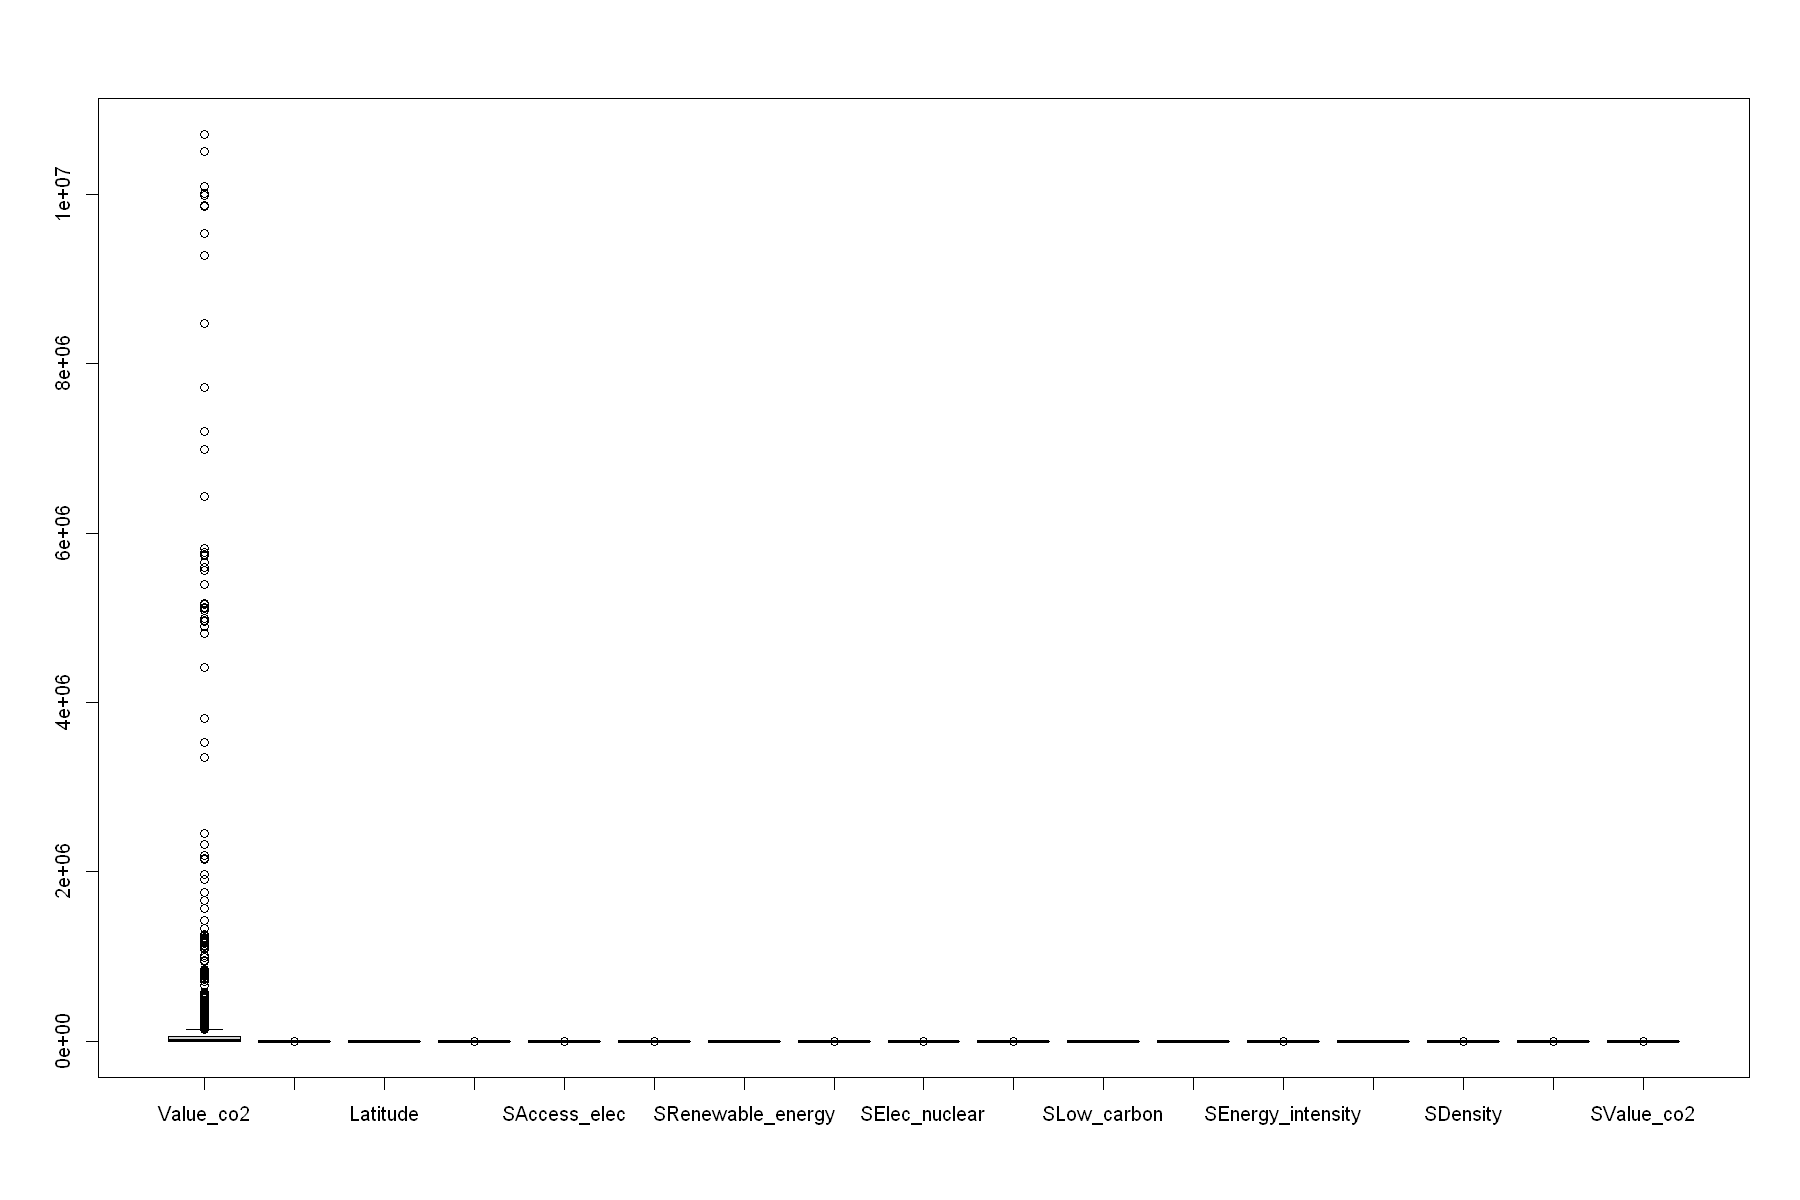

In [44]:
boxplot(complete_energy[,-c(1,2)])

On affiche toutes les variables, mais comme elles n'ont pas la même échelle, c'est difficile à interpréter.

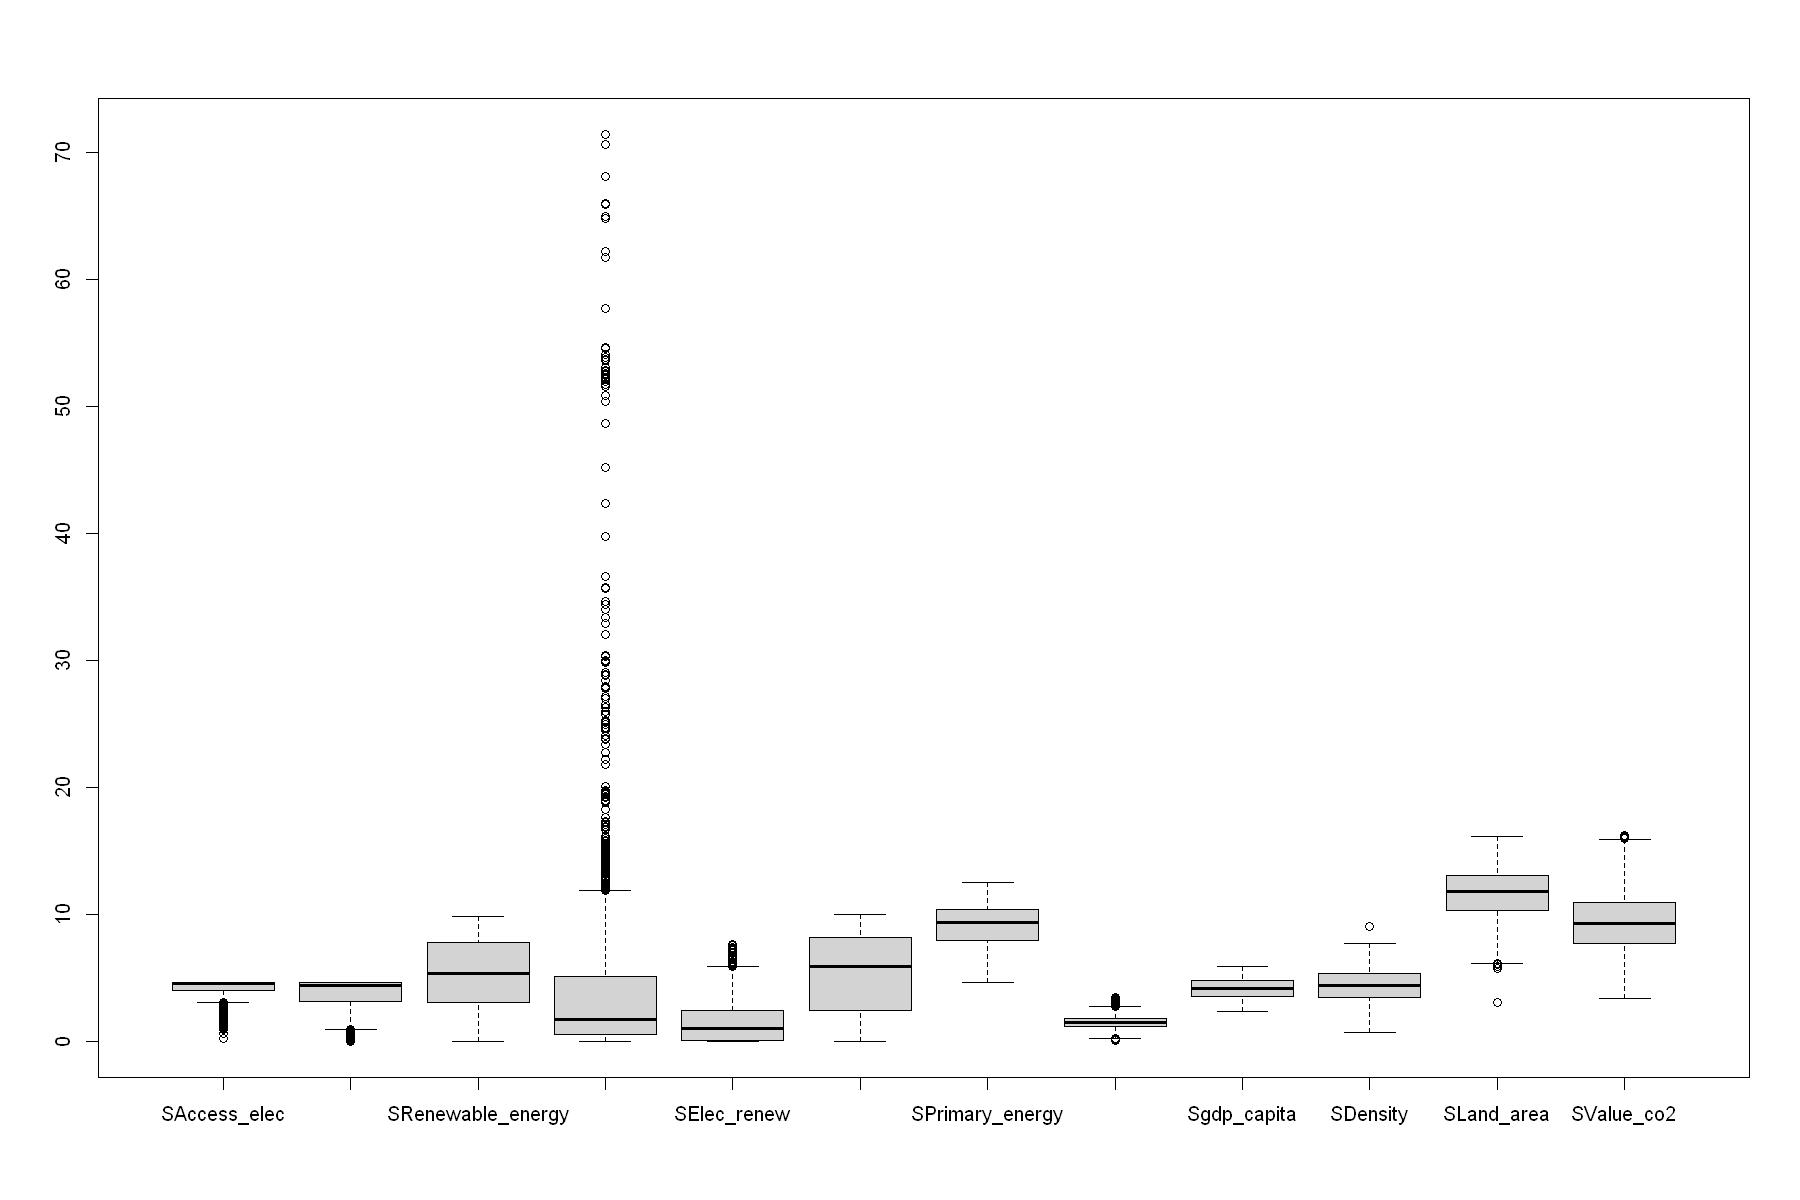

In [45]:
boxplot(complete_energy[,-c(1:6,11)])

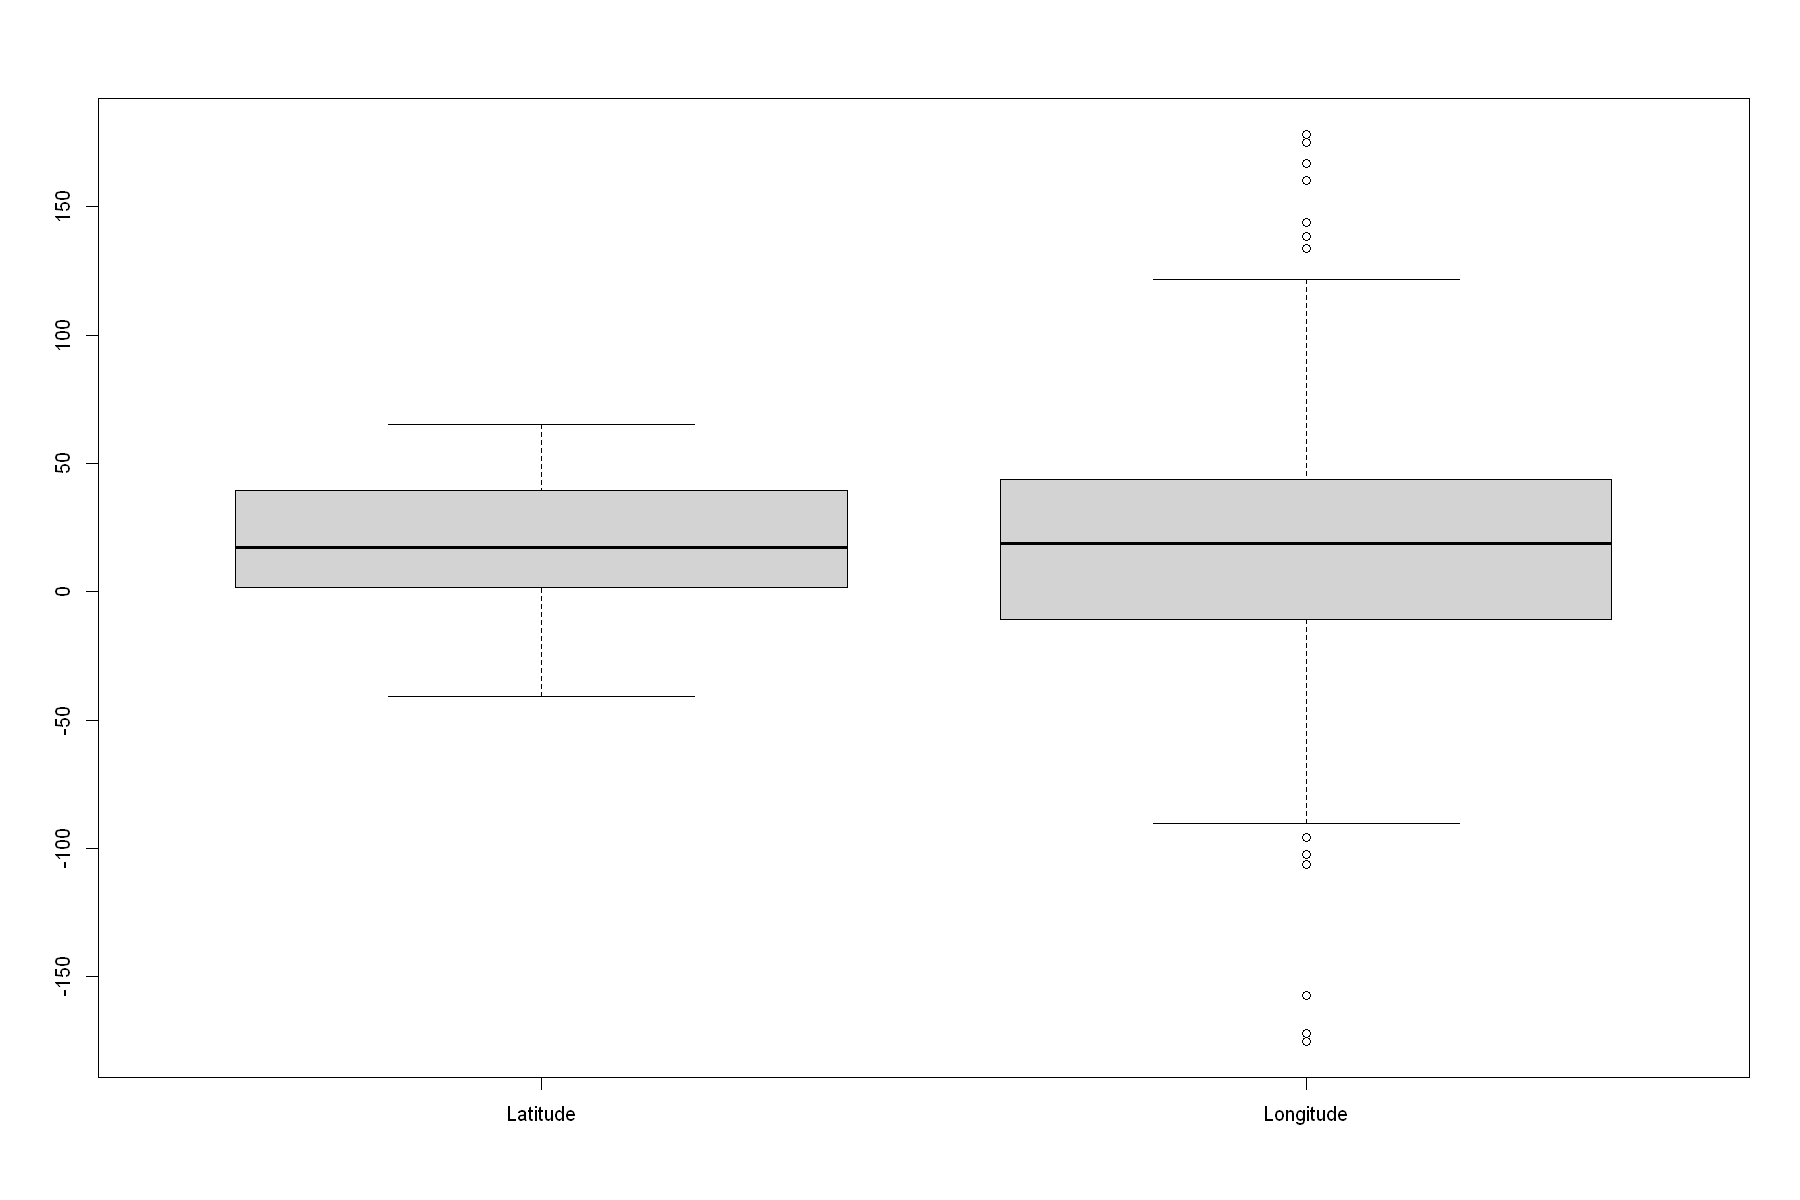

In [46]:
boxplot(complete_energy[,c(5:6)])

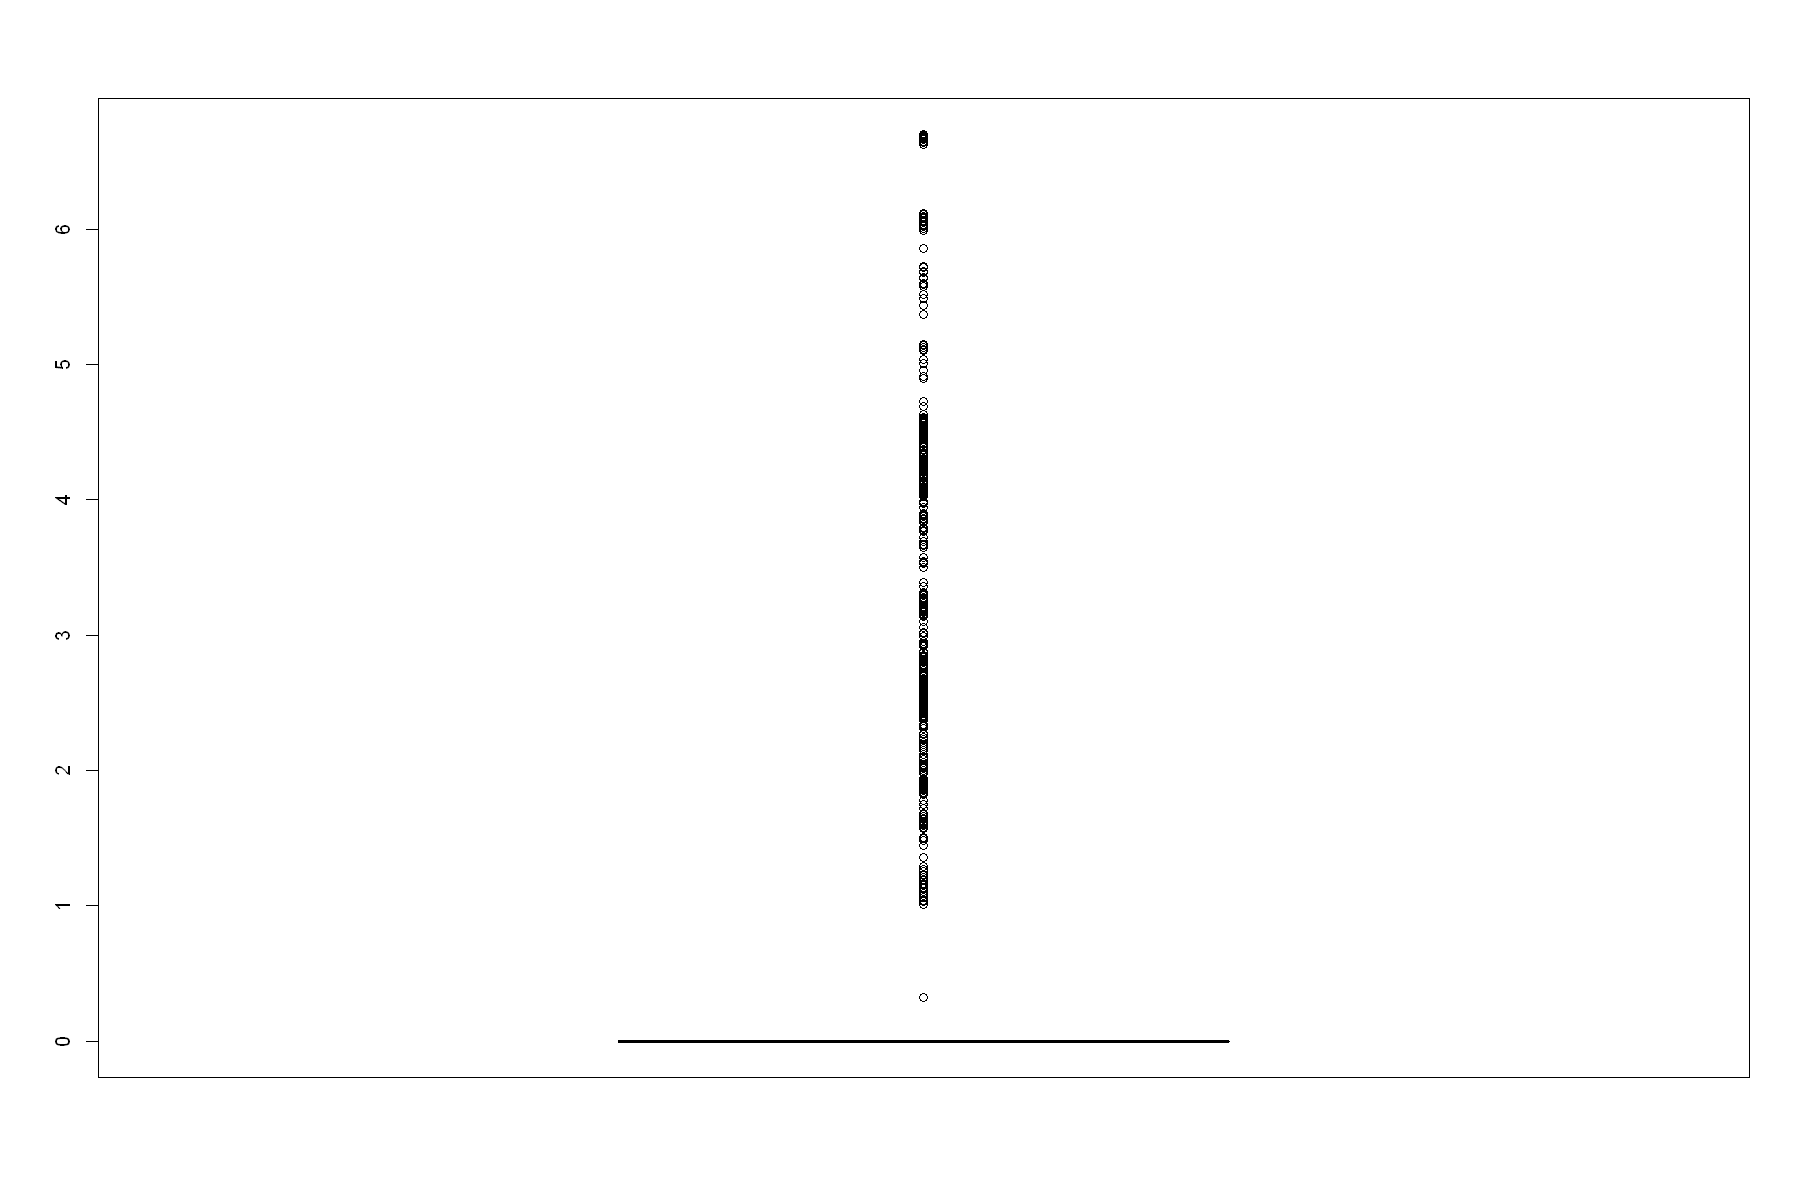

In [47]:
boxplot(complete_energy[,c(11)]) #nuclear

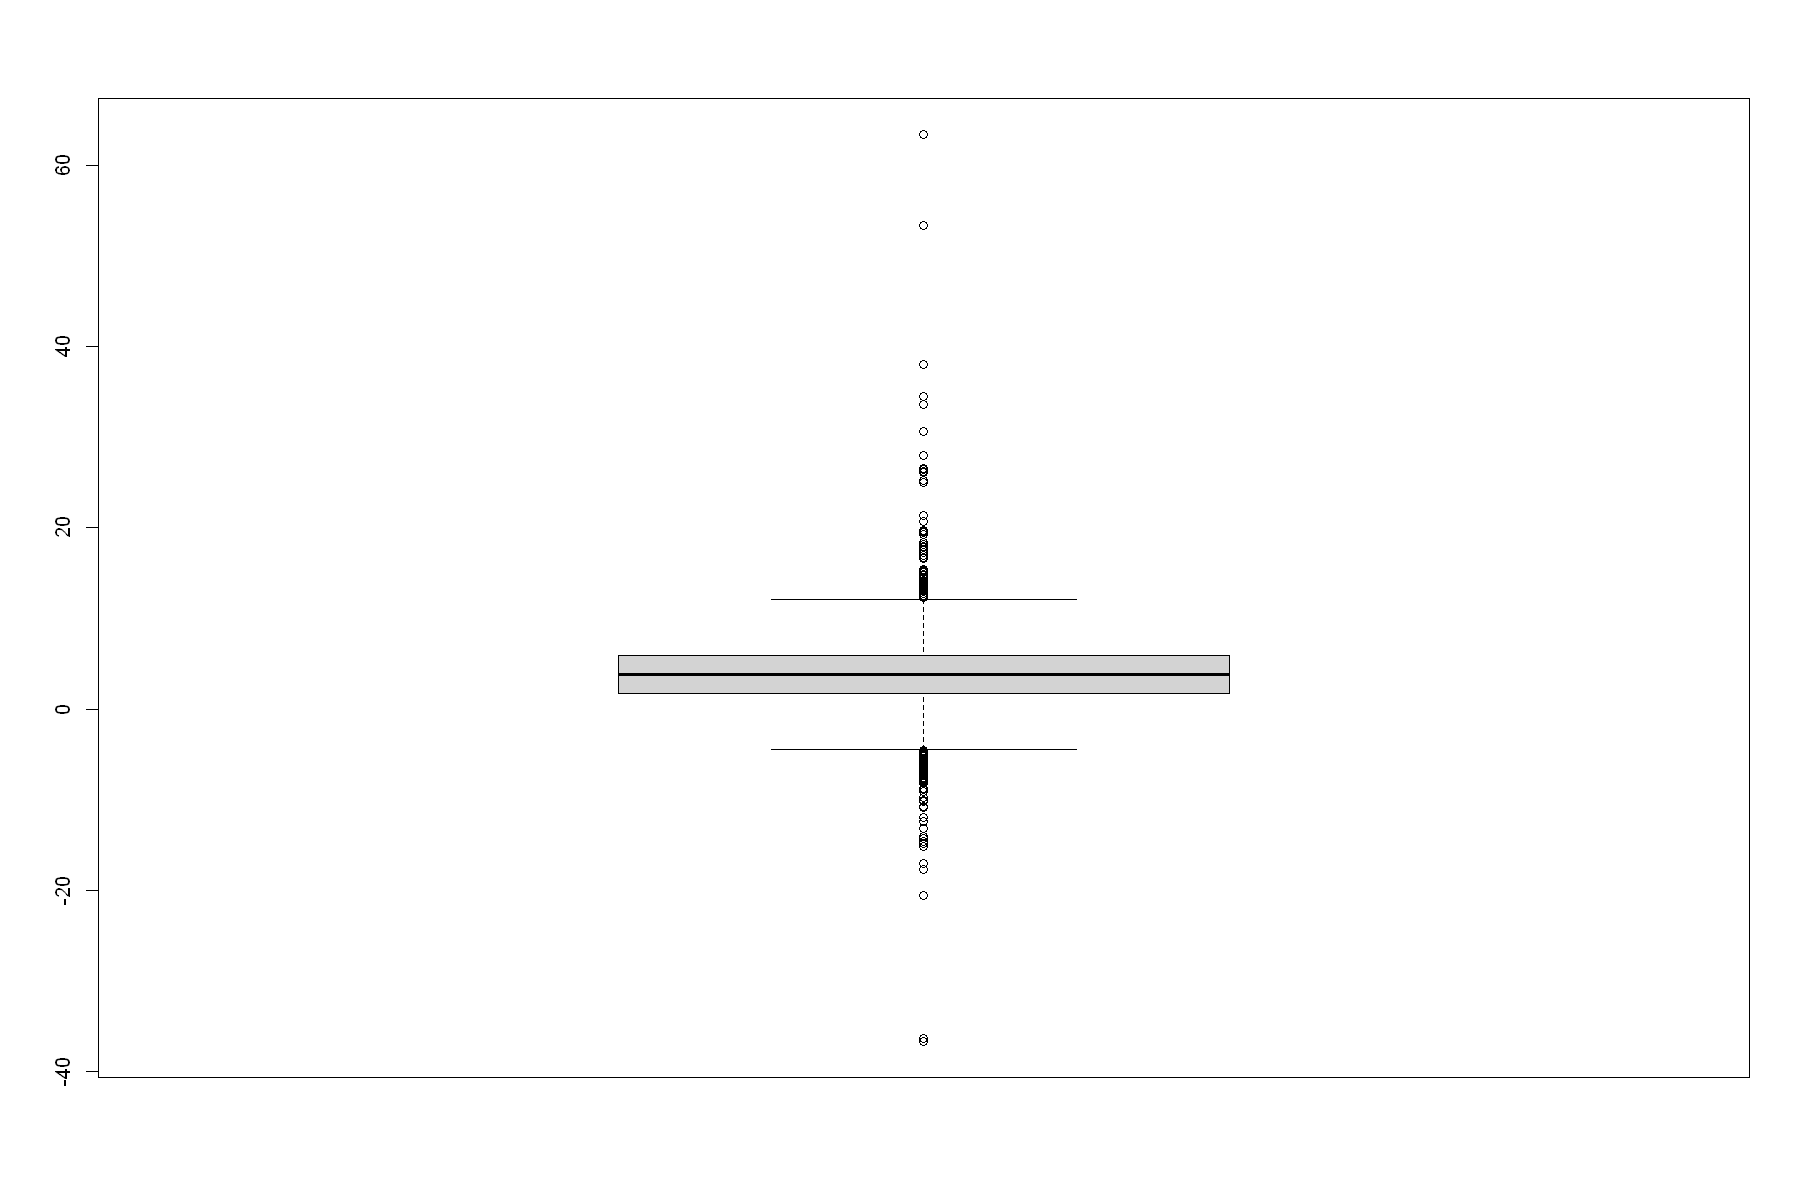

In [48]:
boxplot(complete_energy[,c(4)]) #gdp growth

On ne regarde à présent que les variables transformée. L'échelle est meilleure

## Question 6 

### Analyse descriptive multidimensionnelle

#### Variable quantitative

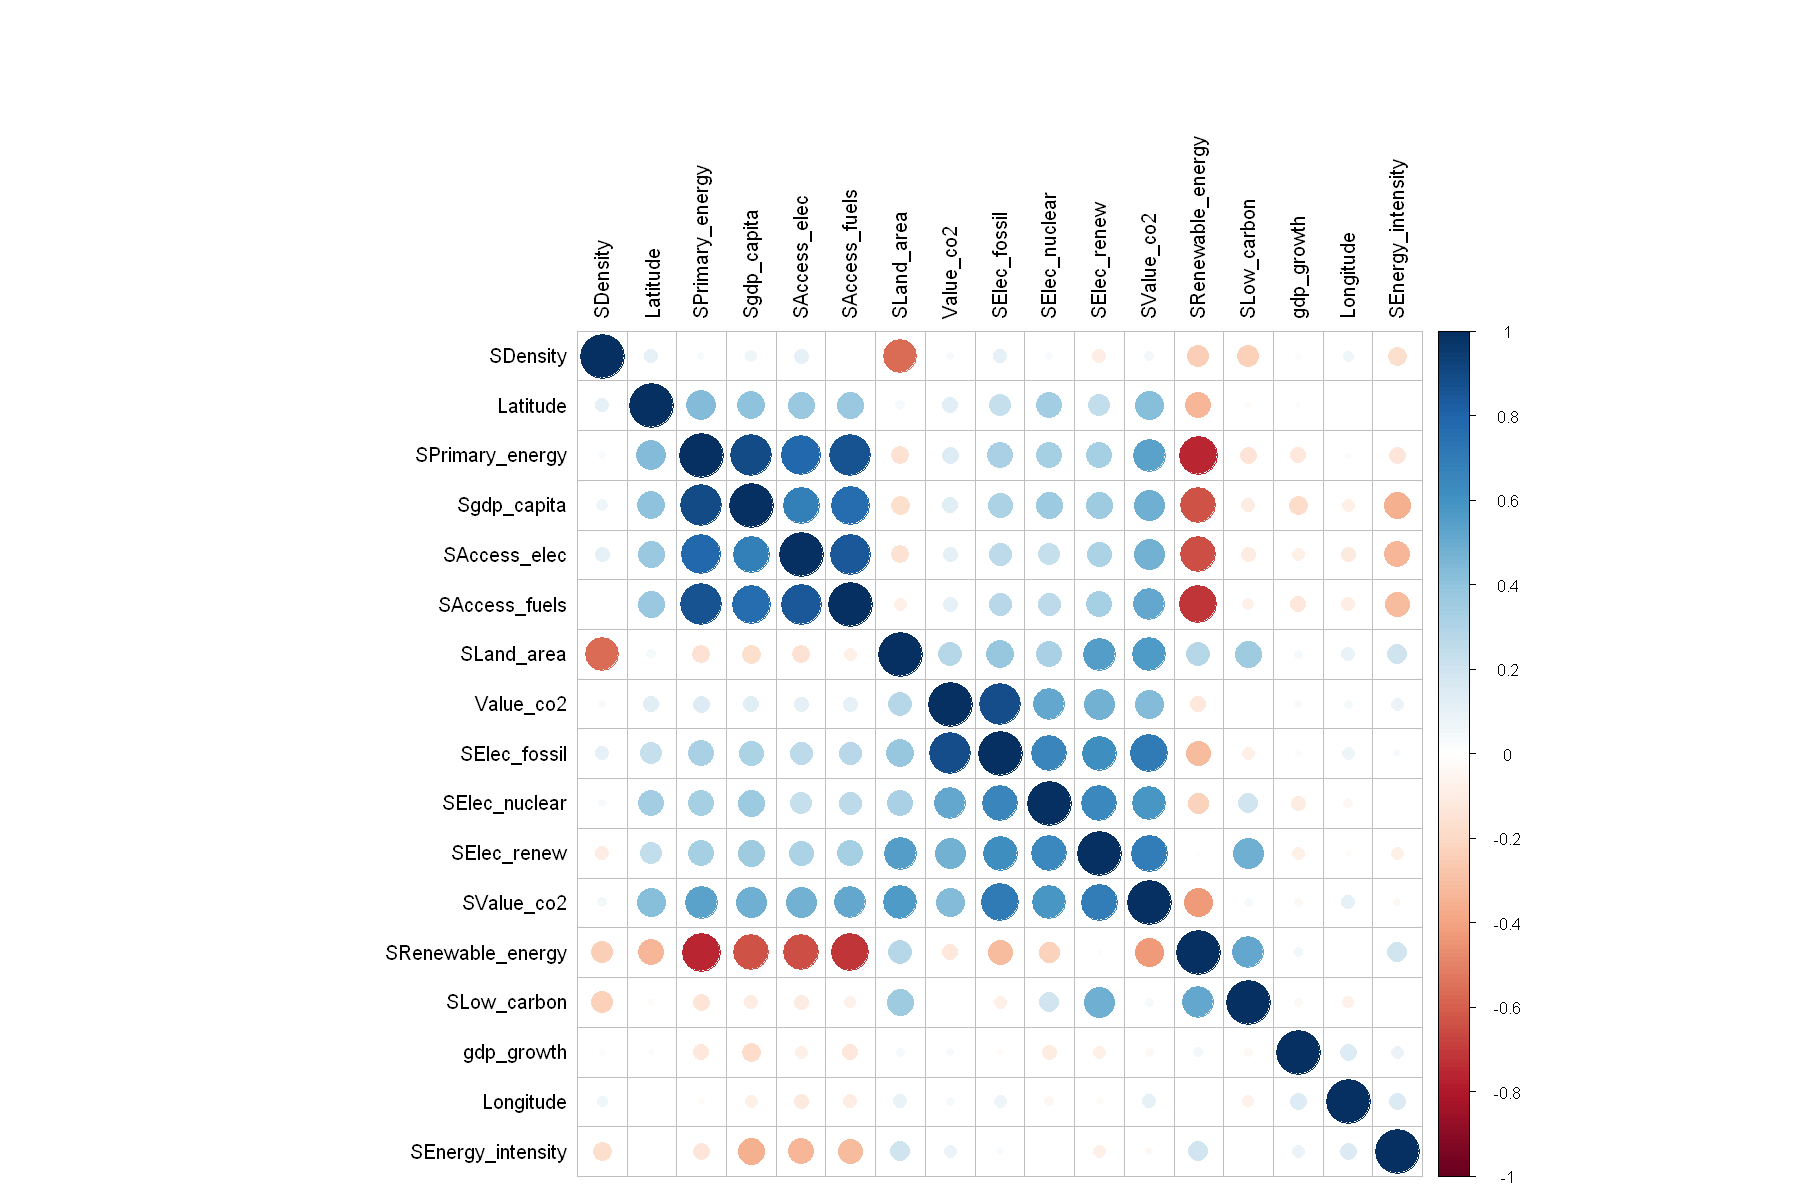

In [49]:
numeric_energy =complete_energy[sapply(complete_energy, is.numeric)]
mcor <- cor(numeric_energy)
par(mfrow=c(1,1), mar=c(5,5,2,2))
corrplot(mcor, order="hclust", tl.col="black")

In [50]:
#par(mfrow = c(6,3) , mar = c(4,4,2,1))

#for (i in 3:length(names(complete_energy))) {
 #   dfi = complete_energy[,c(2,i)]
   # plot(dfi, main=names(complete_energy)[i],xlab='Values')
#}

#### Variable qualitative

Pour cette étude, nous avons essayé plusieurs techniques pour visualiser nos données. Cependant nous avons pu remarquer que le nombre d'observations par pays n'est pas identique en fonction des années (voir graphique ci-dessous), ce qui ne rend pas forcément fiable nos exploitations.En effet, nous avons également essayé d'afficher des boxplots de l'ensemble des variables en fonction de Year, mais ce n'était pas très pertinent.   

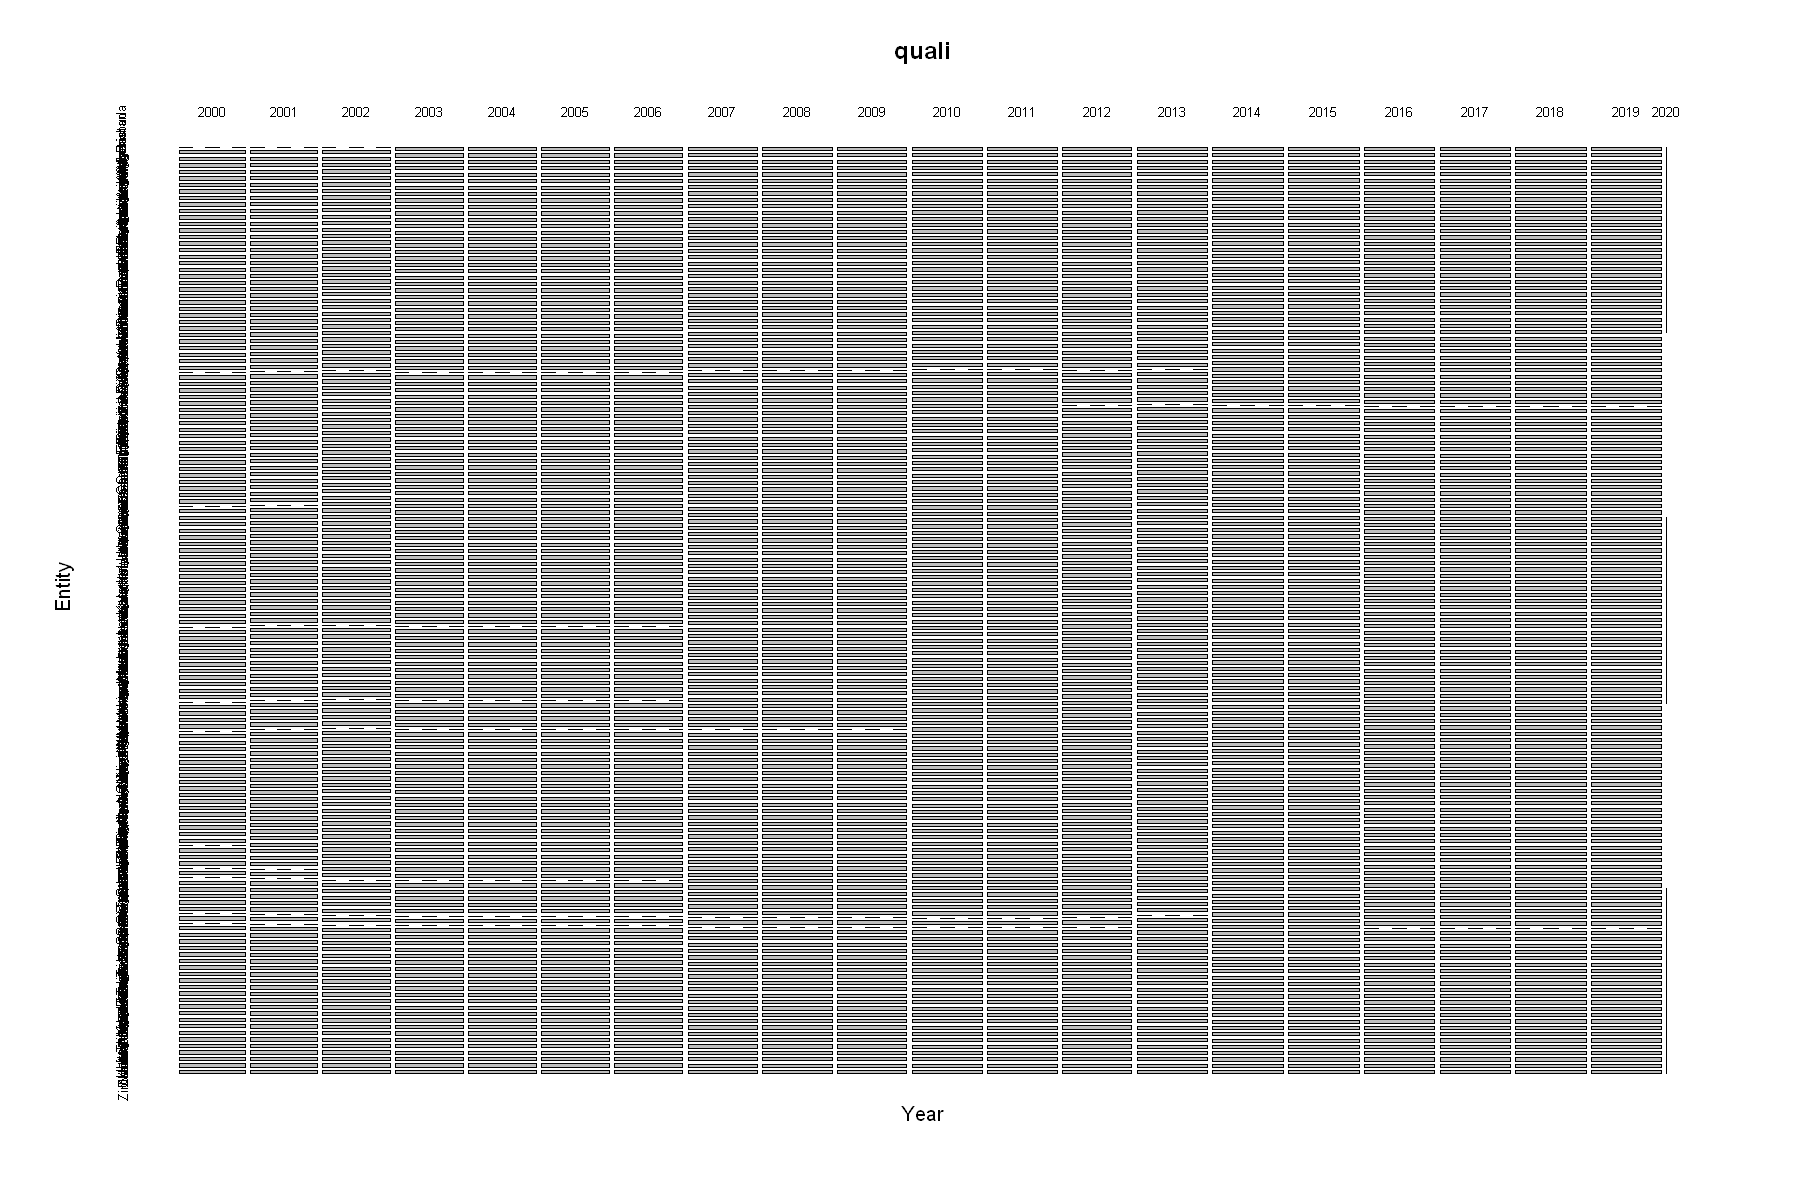

In [51]:
quali= xtabs(~Year + Entity, data = complete_energy)
mosaicplot(quali)

## Question 8

### Dépendance entre Year et la variable à prédire

In [52]:
numeric_energy =complete_energy[sapply(complete_energy, is.numeric)]
mcor <- cor(numeric_energy)
mcor

,Value_co2,gdp_growth,Latitude,Longitude,SAccess_elec,SAccess_fuels,SRenewable_energy,SElec_fossil,SElec_nuclear,SElec_renew,SLow_carbon,SPrimary_energy,SEnergy_intensity,Sgdp_capita,SDensity,SLand_area,SValue_co2
Value_co2,1.000000000,0.03411701,0.120536382,0.041251083,0.11308697,0.106404221,-0.124085468,0.88418798,0.51694987,0.47186494,-0.007522328,0.14754652,0.082319000,0.13005368,0.032995225,0.28981280,0.43283514
gdp_growth,0.034117009,1.00000000,-0.020155317,0.145424368,-0.08667138,-0.125061004,0.054686042,-0.02392442,-0.10640649,-0.08729166,-0.038391075,-0.12381293,0.086864961,-0.18713373,0.024485165,0.04376595,-0.03950100
Latitude,0.120536382,-0.02015532,1.000000000,0.005383208,0.37729860,0.374115257,-0.331451213,0.23444695,0.34351162,0.24942674,-0.028380329,0.43592091,-0.002025071,0.40517857,0.103062783,0.04579068,0.42355041
Longitude,0.041251083,0.14542437,0.005383208,1.000000000,-0.11742990,-0.093581473,0.002843847,0.07971201,-0.04639686,-0.02368068,-0.073863556,-0.02295305,0.150443869,-0.08005765,0.061326129,0.09153225,0.10212995
SAccess_elec,0.113086972,-0.08667138,0.377298604,-0.117429902,1.00000000,0.840577284,-0.646676860,0.26488052,0.23236483,0.31676661,-0.106213894,0.78787031,-0.333426130,0.68961885,0.107866718,-0.15912208,0.47689118
SAccess_fuels,0.106404221,-0.12506100,0.374115257,-0.093581473,0.84057728,1.000000000,-0.718101562,0.27530791,0.26583242,0.33193606,-0.072790931,0.86123292,-0.316369169,0.76187186,0.001223283,-0.08967160,0.51751101
SRenewable_energy,-0.124085468,0.05468604,-0.331451213,0.002843847,-0.64667686,-0.718101562,1.000000000,-0.31325194,-0.22005993,0.01143427,0.512679572,-0.75105580,0.192684146,-0.63571190,-0.243306668,0.28138182,-0.42225188
SElec_fossil,0.884187976,-0.02392442,0.234446949,0.079712007,0.26488052,0.275307913,-0.313251936,1.00000000,0.65818060,0.61245018,-0.082164870,0.32859055,0.034466085,0.31089742,0.102477254,0.38633521,0.70961801
SElec_nuclear,0.516949866,-0.10640649,0.343511618,-0.046396859,0.23236483,0.265832415,-0.220059929,0.65818060,1.00000000,0.64193710,0.198956621,0.33973304,0.004856070,0.36722700,0.034311116,0.32743667,0.58046534
SElec_renew,0.471864935,-0.08729166,0.249426737,-0.023680676,0.31676661,0.331936061,0.011434267,0.61245018,0.64193710,1.00000000,0.487452376,0.33815050,-0.086412003,0.35977141,-0.098983338,0.55175227,0.69550200


Ici, nous avons la matrice de corrélation entre toutes les variables de notre energyset. En effet, on peut voir que la corrélation entre la variable Year et Value_co2_emissions_kt_by_country semble faible. Sa valeur faut 0.02055306	

On voit ici que la corrélation entre les variables Year et Value_co2 est très faible. En effet, on obtient un coefficient de corélation proche de 0, ce qui montre que les deux variables ne sont pas coorélées.

In [53]:
correlation_value=cor(as.numeric(complete_energy$Year), complete_energy$SValue_co2)
print(correlation_value) # méthode pour avoir le coefficient directement
#Est ce qu'on fait avec SValue ou pas ? 

[1] 0.04714463


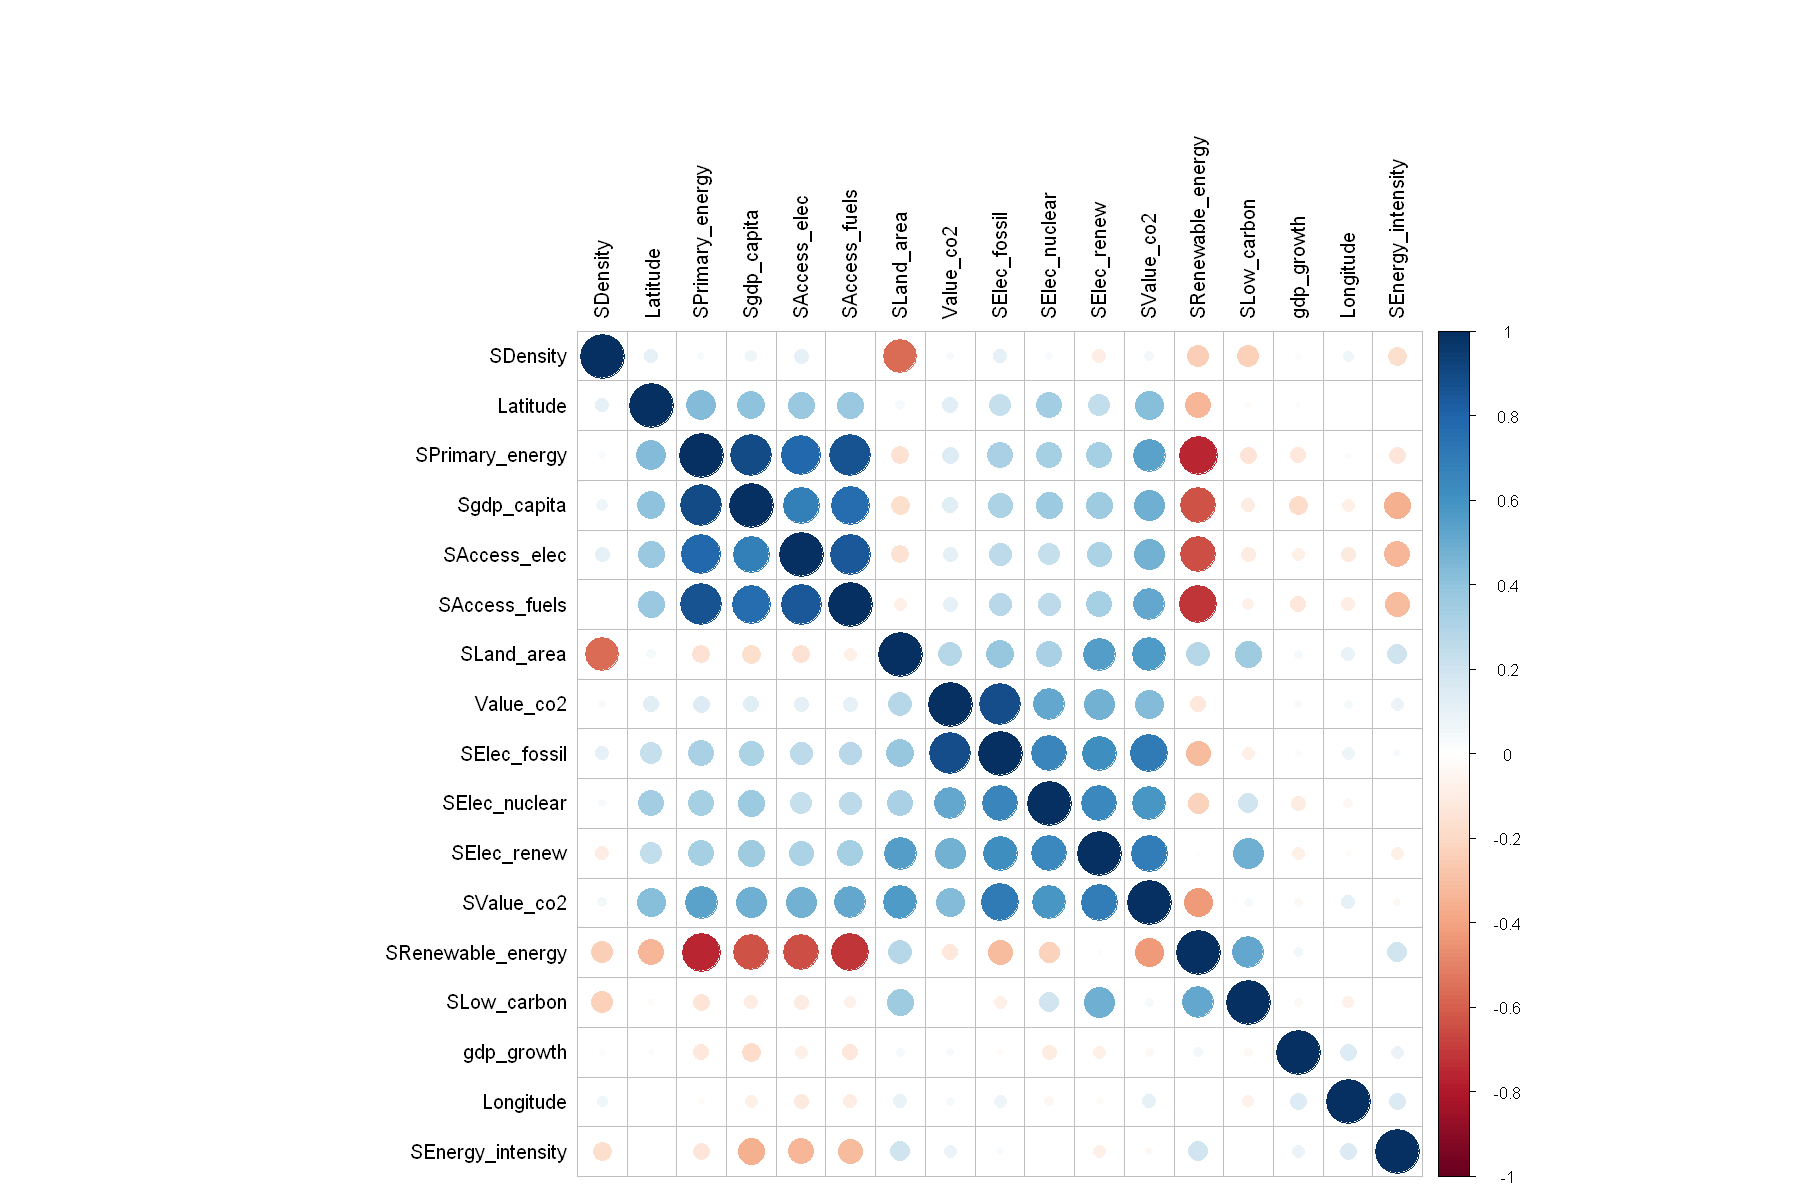

In [54]:
options(corrplot.width = 20, corrplot.height = 20)
corrplot(mcor, order="hclust", tl.col="black")

Ce graphique nous donne la corrélation entre chaque point. En effet, on peut par exemple voir que la variable Value_co2_emissions_kt_by_country est bien corrélée car elle est proche de 1. Au contraire, la longitude n'est pas bine représentée, on peut pas avoir réellement confiance en ses valeurs. 
De plus, si nous comparons les variables Electricity.from.renewables et Value_co2_emissions_kt_by_country, l'angle entre les deux est très faible, ce qui signifie qu'elles sont bien corrélées en elles. A l'inverse, les variables Value_co2_emissions_kt_by_country et Renewable.energy.share.in.the.total.final.energy.consumption ont un angle quasi droit entre elles, ce qui indique qu'elles sont indépendantes.

## Question 7

In [55]:
str(complete_energy)

'data.frame':	2868 obs. of  19 variables:
 $ Entity           : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year             : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ Value_co2        : num  1220 1030 1550 1760 1770 ...
 $ gdp_growth       : num  8.83 1.41 11.23 5.36 13.83 ...
 $ Latitude         : num  33.9 33.9 33.9 33.9 33.9 ...
 $ Longitude        : num  67.7 67.7 67.7 67.7 67.7 ...
 $ SAccess_elec     : num  2.69 3 3.23 3.42 3.58 ...
 $ SAccess_fuels    : num  2.35 2.48 2.58 2.7 2.79 ...
 $ SRenewable_energy: num  6.05 6.65 5.82 5.65 5.36 ...
 $ SElec_fossil     : num  0.557 0.574 0.583 0.447 0.447 ...
 $ SElec_nuclear    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SElec_renew      : num  0.489 0.445 0.464 0.495 0.56 ...
 $ SLow_carbon      : num  8.19 7.93 7.96 8.73 8.89 ...
 $ SPrimary_energy  : num  5.44 5.32 5.53 5.72 5.87 ...
 $ SEnergy_intensity: num  0.336 0.182 0.344 0.405 0.425 ...
 $ Sgdp_capita      : num  2.63 2.68 2.74 2.79 2

### Analyse en composante principale

In [56]:
energy_pca = scale(complete_energy[,-c(1,2,3)], center = TRUE, scale = TRUE)
head(energy_pca)

,gdp_growth,Latitude,Longitude,SAccess_elec,SAccess_fuels,SRenewable_energy,SElec_fossil,SElec_nuclear,SElec_renew,SLow_carbon,SPrimary_energy,SEnergy_intensity,Sgdp_capita,SDensity,SLand_area,SValue_co2
4,1.062712614,0.6338505,0.8359896,-1.9758403,-0.9495474,0.27838517,-0.4890647,-0.4113497,-0.6367967,0.8483680,-2.258782,-2.326985,-1.963254,-0.1815456,0.7884167,-0.9320640
5,-0.534097141,0.6338505,0.8359896,-1.5610729,-0.8568021,0.48769117,-0.4867492,-0.4113497,-0.6642972,0.7739608,-2.330927,-2.624948,-1.898120,-0.1815456,0.7884167,-1.0030475
6,1.578777364,0.6338505,0.8359896,-1.2445776,-0.7799768,0.19625172,-0.4856178,-0.4113497,-0.6523632,0.7835205,-2.203004,-2.313227,-1.812539,-0.1815456,0.7884167,-0.8316828
7,0.314722045,0.6338505,0.8359896,-0.9884929,-0.6927000,0.13536853,-0.5034139,-0.4113497,-0.6329647,1.0069395,-2.088298,-2.193626,-1.758263,-0.1815456,0.7884167,-0.7784075
8,2.137714332,0.6338505,0.8359896,-0.7733013,-0.6236650,0.03627968,-0.5034139,-0.4113497,-0.5922914,1.0527261,-1.996101,-2.155349,-1.562128,-0.1815456,0.7884167,-0.7760319
9,0.006383943,0.6338505,0.8359896,-0.5552194,-0.5626073,-0.23163510,-0.5048969,-0.4113497,-0.6723815,0.9695002,-1.667974,-1.696431,-1.553454,-0.1815456,0.7884167,-0.4830358


In [57]:
resultat_pca = PCA(energy_pca,ncp=16)
get_eig(resultat_pca)

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,5.484759138,34.27974461,34.27974
Dim.2,2.991178926,18.69486828,52.97461
Dim.3,1.522017152,9.51260720,62.48722
Dim.4,1.173257491,7.33285932,69.82008
Dim.5,0.984740573,6.15462858,75.97471
Dim.6,0.865739312,5.41087070,81.38558
Dim.7,0.844580761,5.27862976,86.66421
Dim.8,0.633640931,3.96025582,90.62446
Dim.9,0.480224132,3.00140083,93.62587
Dim.10,0.296853269,1.85533293,95.48120


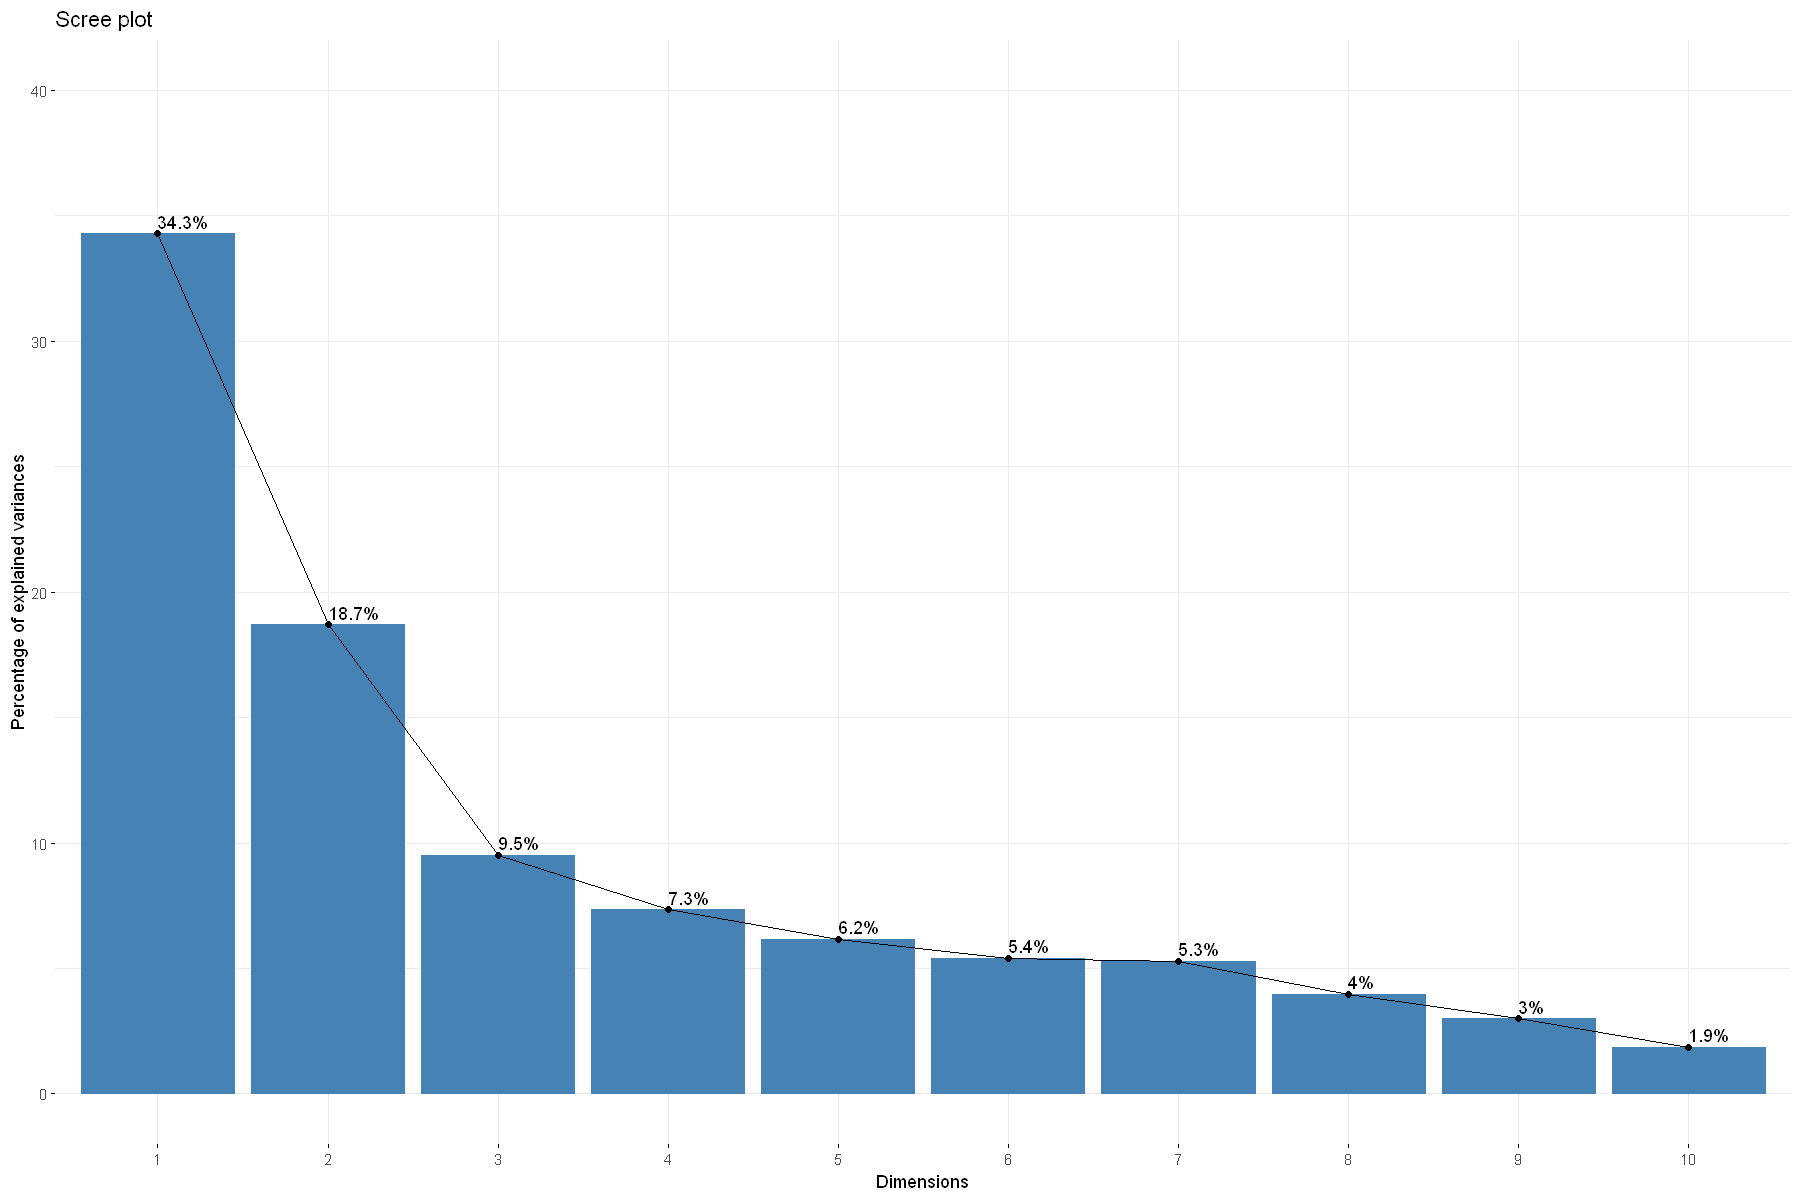

In [58]:
fviz_screeplot(resultat_pca, addlabels=TRUE, ylim=c(0,40))

Nous pouvons en effet voir par cette ACP, que la première composante explique 34.3% des valeurs du energy set.La deuxième composante, elle représente 18.7%. Nous pourrions réduire notre dimension à 2 car avec ces deux-ci, nous expliquons pratiquement la moitié du energy set. Il faudrait ajouter 4 dimensions pour avoir 80% des valeurs expliquées. 

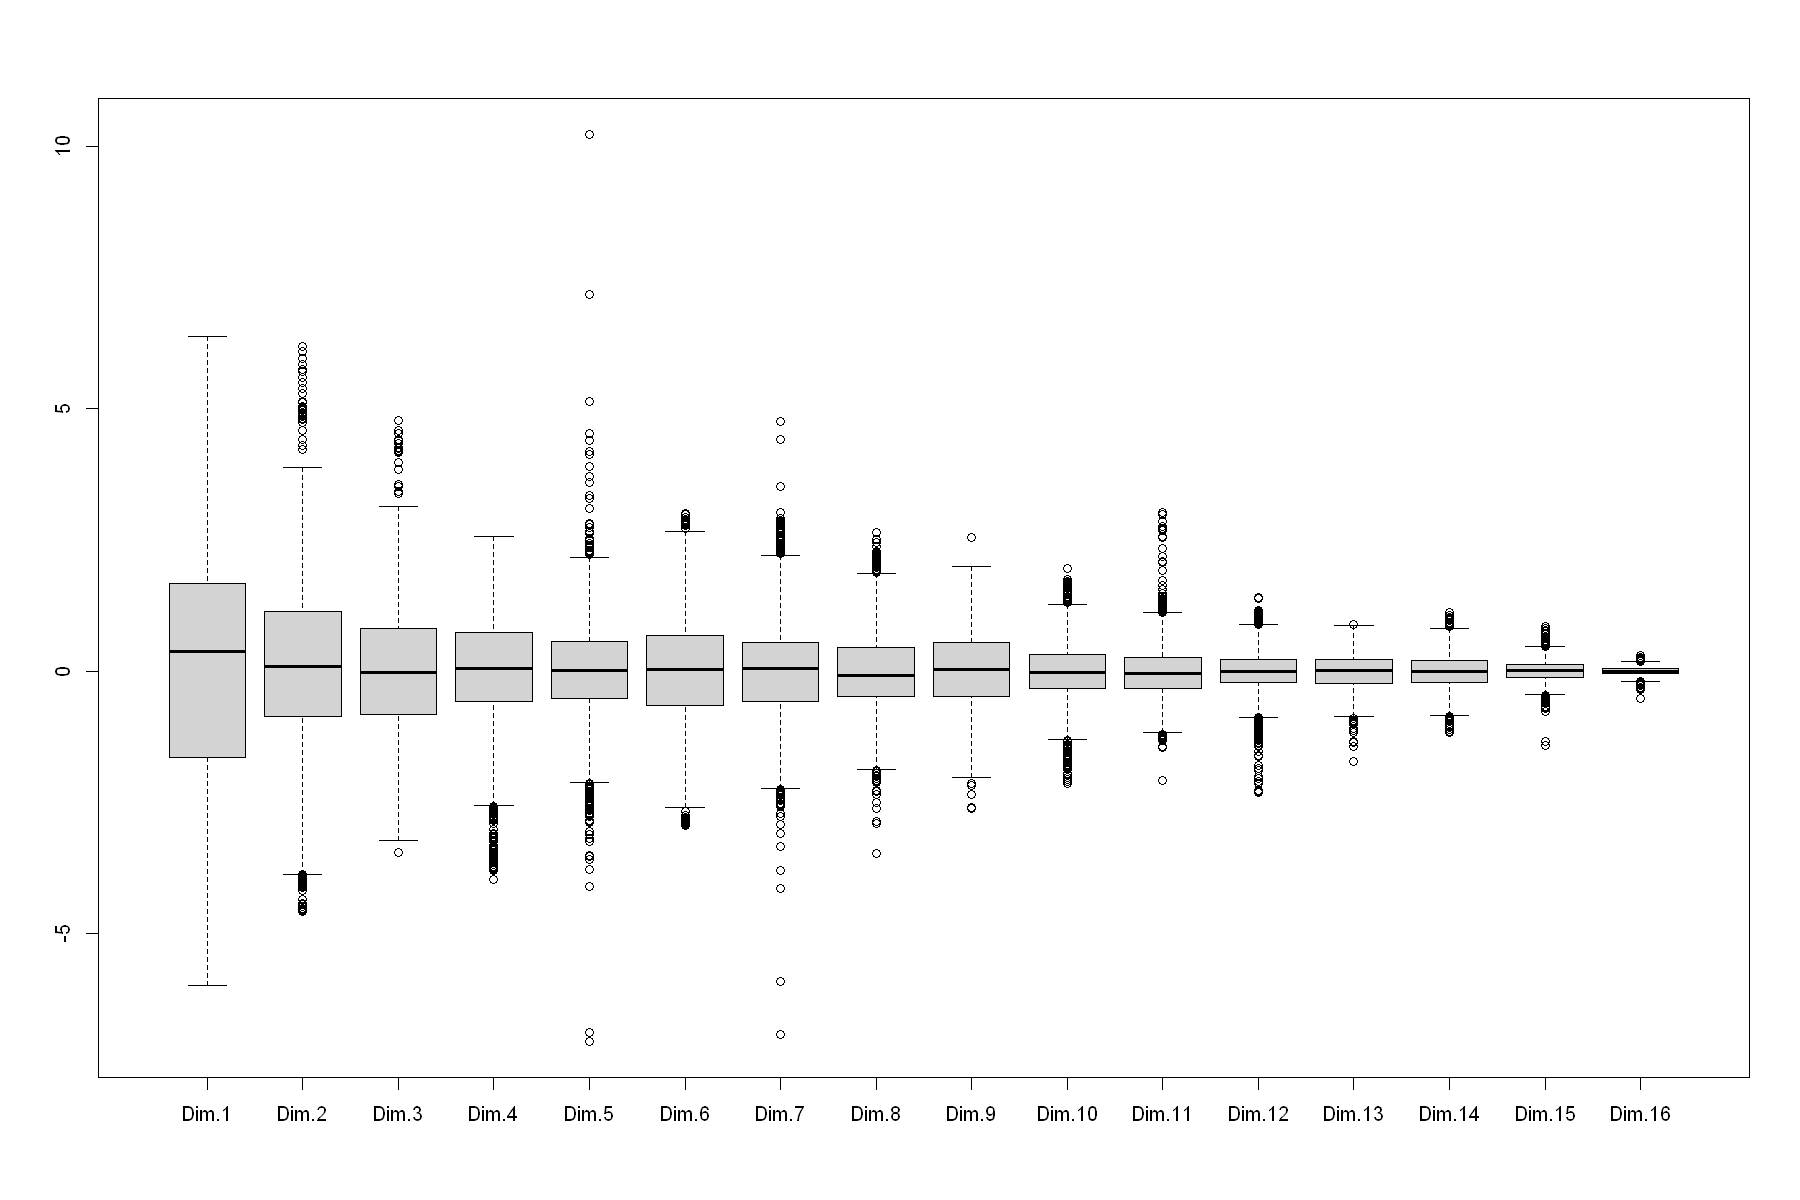

In [59]:
boxplot(resultat_pca$ind$coord)

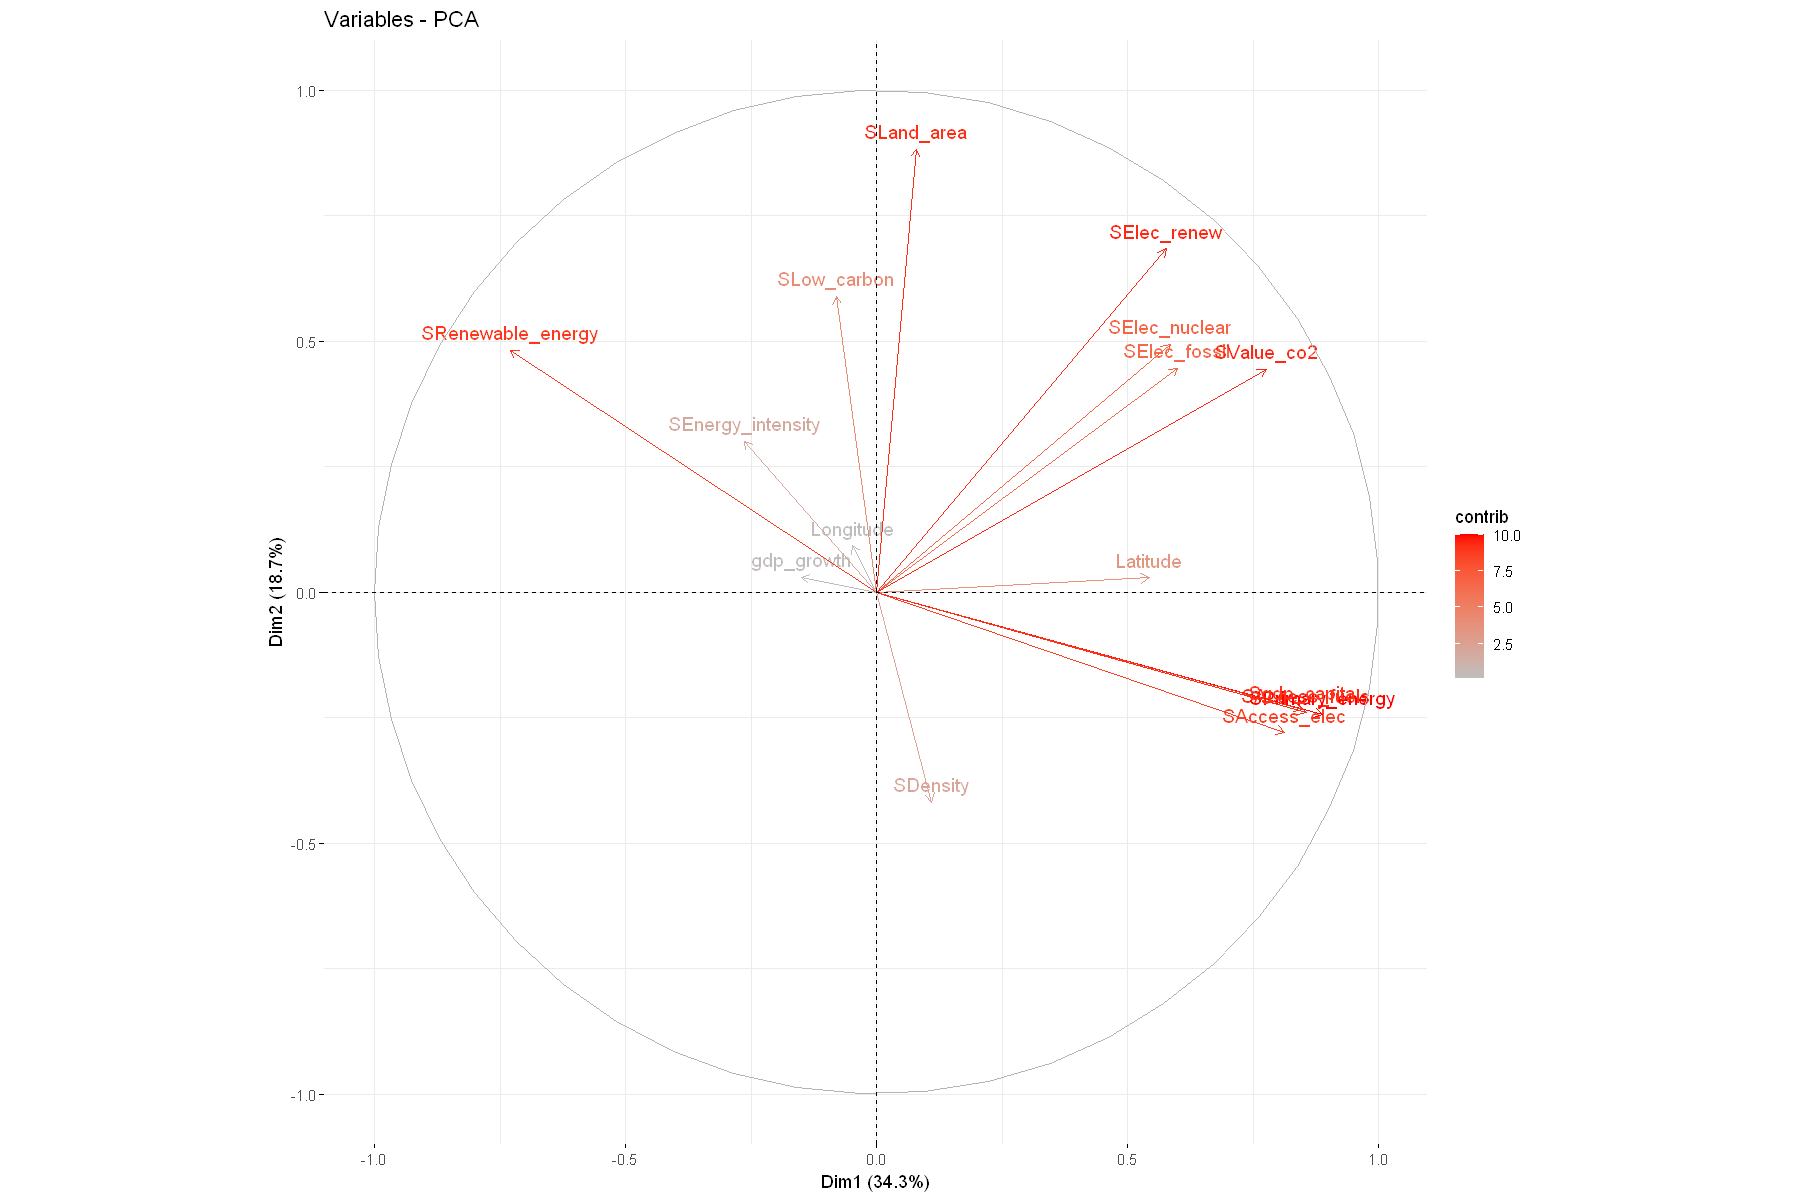

In [60]:
var=get_pca_var(resultat_pca)
fviz_pca_var(resultat_pca,col.var= "contrib",gradient.cols=c("grey", "red"))

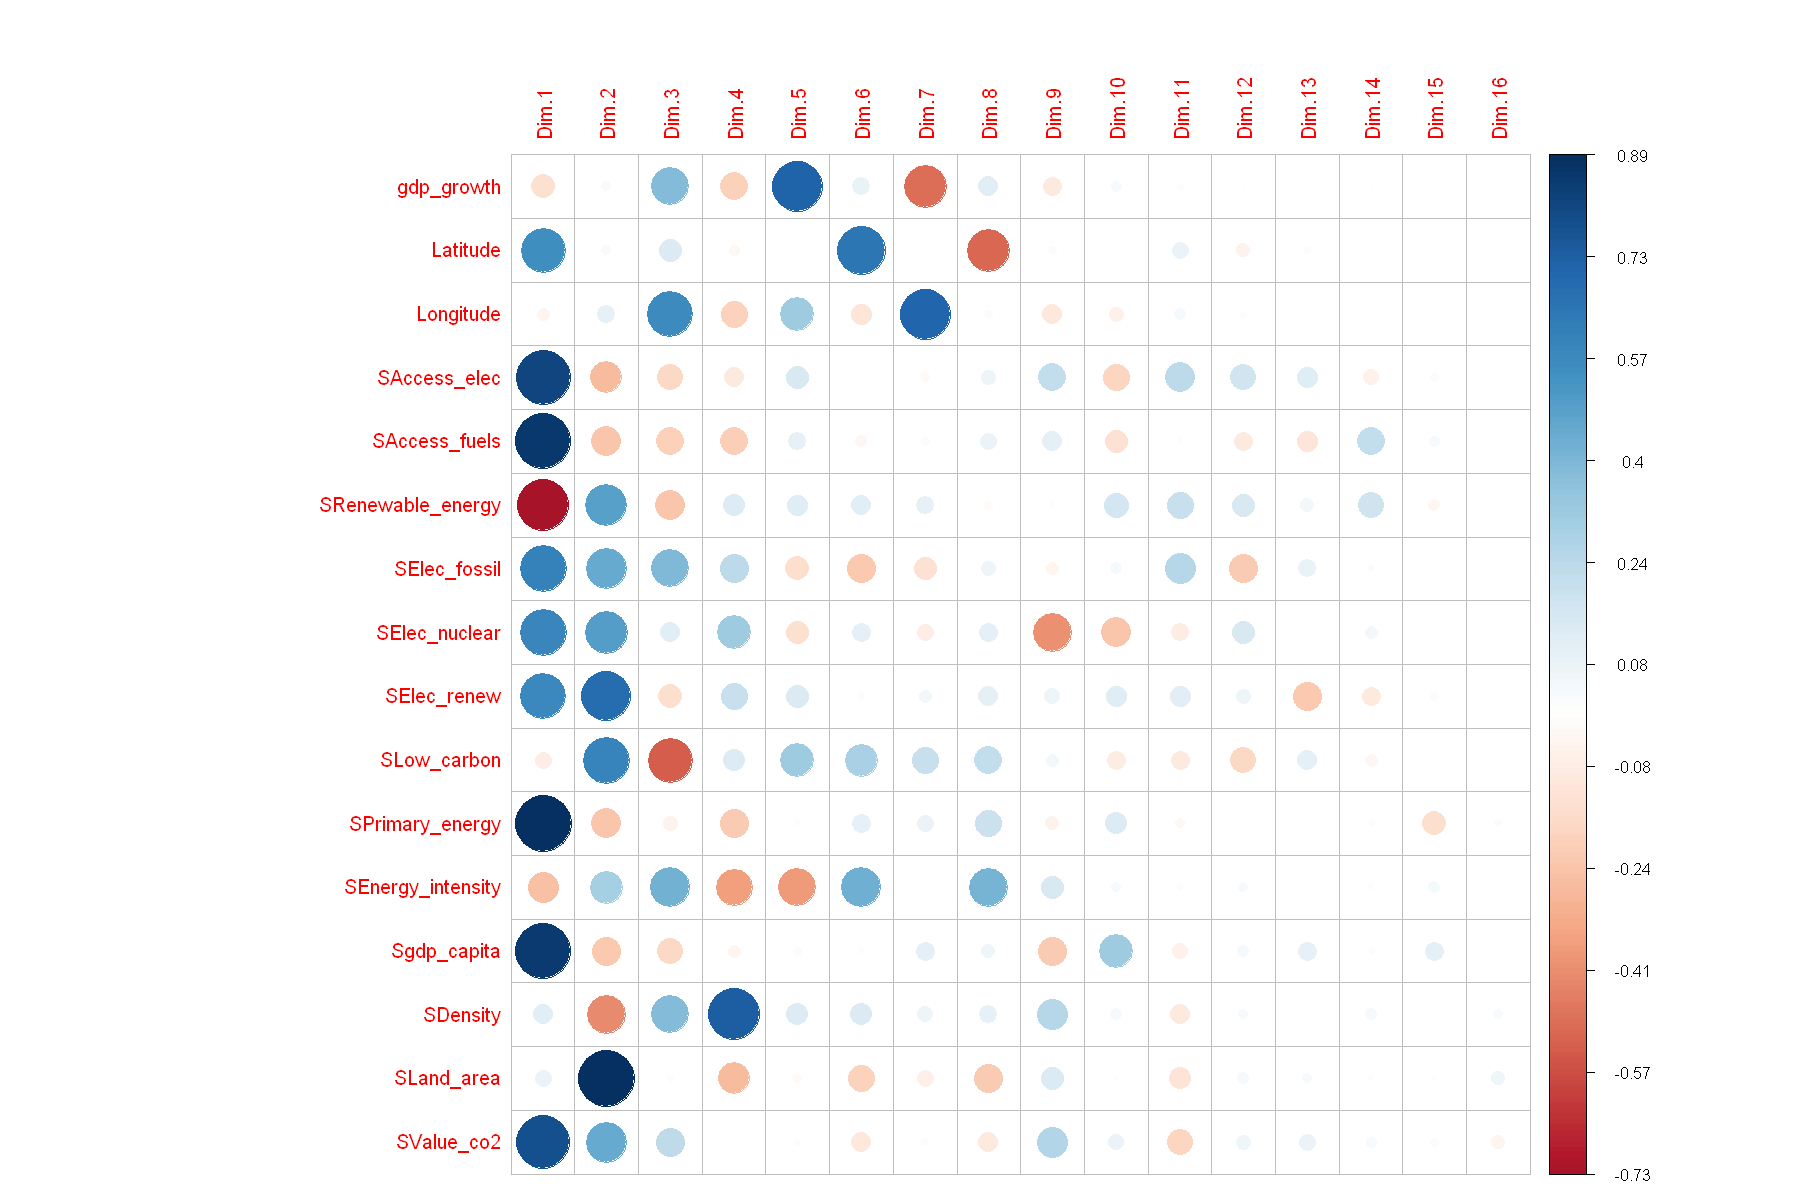

In [61]:
corrplot(resultat_pca$var$cor, is.corr=FALSE)

Dim 1 : Corrélée positivement avec Access_to_Electricity, Access_Clean_Fuel, Primary_energy_consumption, gdp_per_capita / Négativement avec Renewable_share

Dim 2 : Corrélée positivement Land_Area, Electricity_renewables

Dim 4 : Corrélée positivement Density

Dim 5 : Corrélée positivement gdp_growth

Dim 6 Corrélée positivement Latitude

# Modélisation

In [62]:
complete_energy$SElec_fossil = NULL
complete_energy$Value_co2 = NULL

## Question 1

### Diviser échantillon d'apprentissage / de test

,Entity,SValue_co2
,<chr>,<dbl>
28,China,15.78308
143,United States,15.48658
63,India,14.25228
69,Japan,13.98342
51,Germany,13.55689
25,Canada,13.21272
142,United Kingdom,13.05053
86,Mexico,13.00205
124,South Africa,12.88753


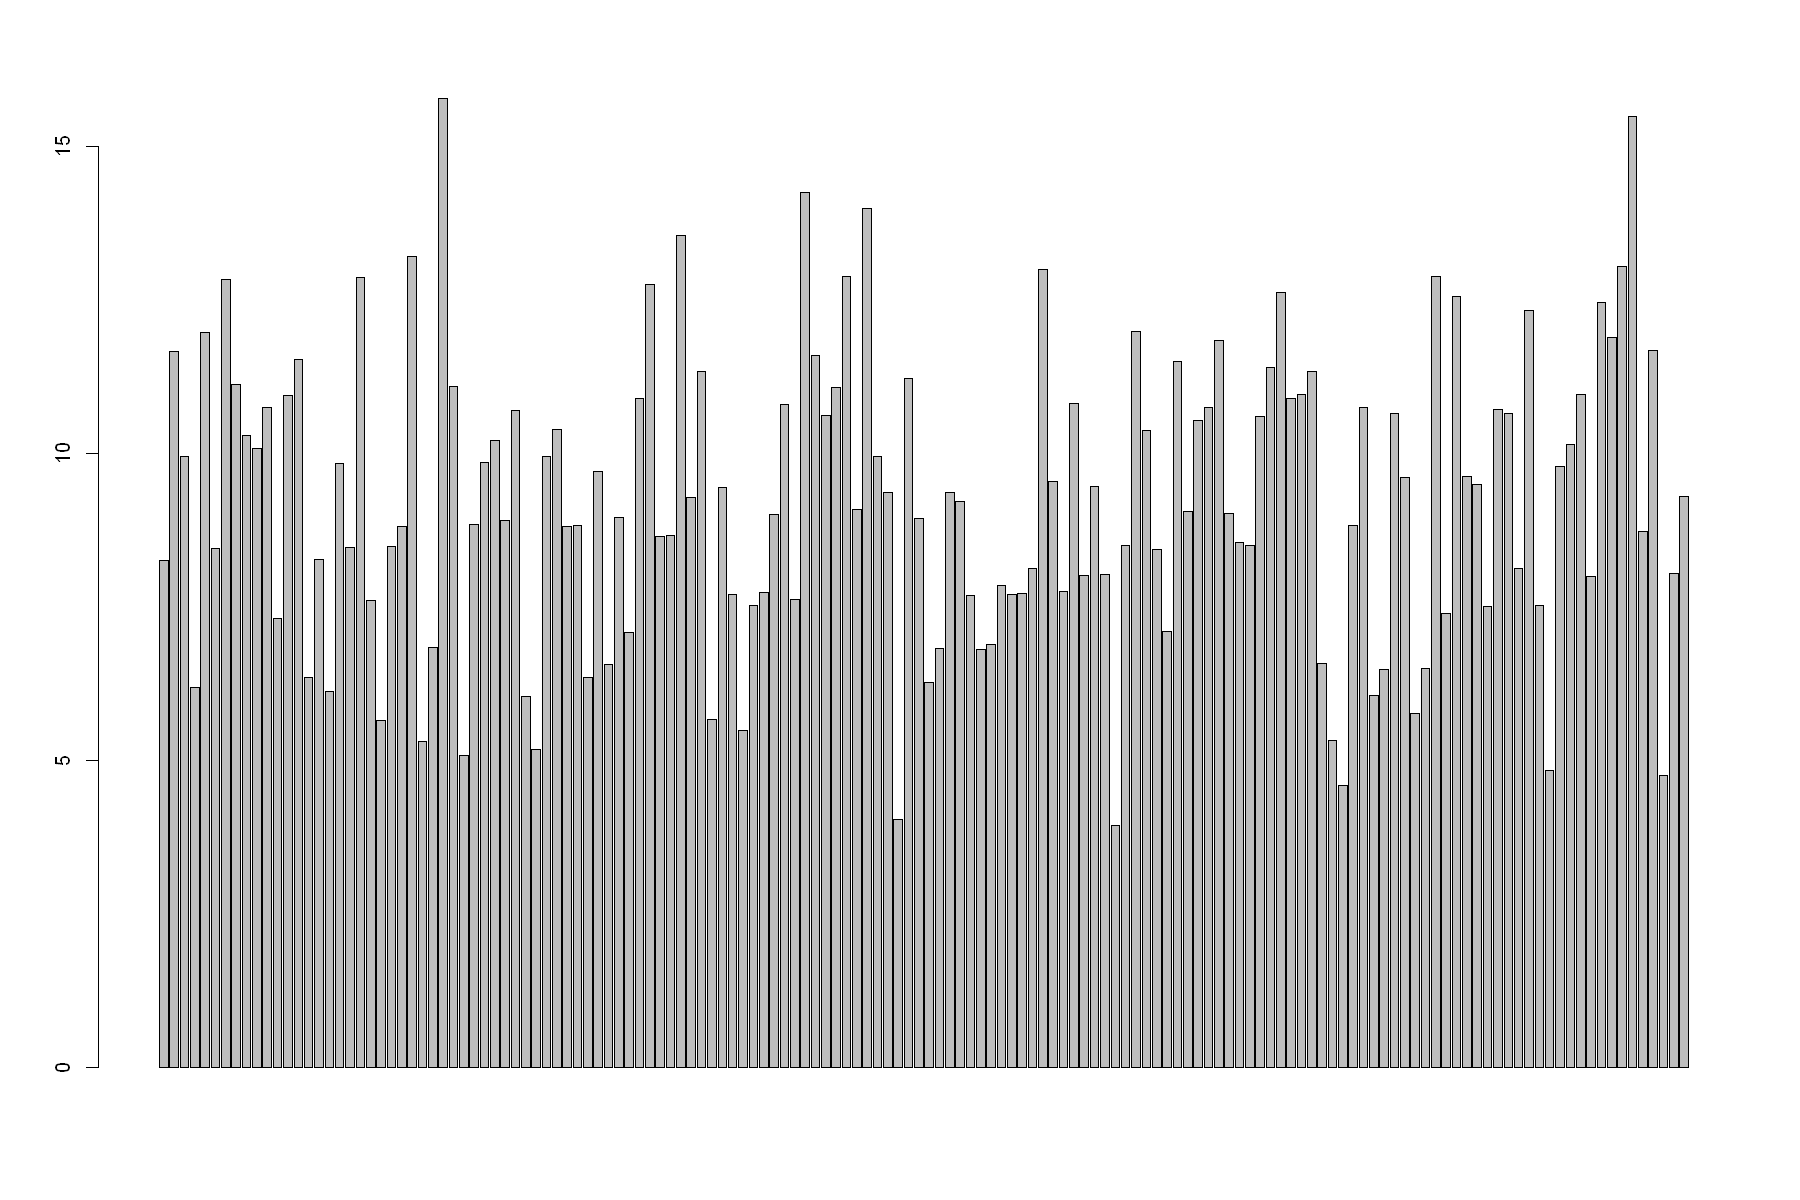

In [63]:
Moy = aggregate(data=complete_energy,SValue_co2~Entity,FUN=mean)
index = order(Moy$SValue_co2, decreasing = TRUE )
Moy_classe = Moy[index,]
head(Moy_classe,10)
barplot(Moy[,2])

In [64]:
data_S = subset(complete_energy, SValue_co2 >13 )
data_S$Entity = as.factor (data_S$Entity)

Afin de réduire notre jeu de données, nous avons réduit l'étude sur des pays qui ont déjà une SValue_co2 supérieure à 13, nous travaillons donc sur les 11 pays les émetteurs, les plus impactants.

In [65]:
str(data_S)

'data.frame':	162 obs. of  17 variables:
 $ Entity           : Factor w/ 11 levels "Brazil","Canada",..: 1 1 1 1 1 1 2 2 2 2 ...
 $ Year             : Factor w/ 21 levels "2000","2001",..: 13 14 15 16 17 18 1 2 3 4 ...
 $ gdp_growth       : num  1.921 3.005 0.504 -3.546 -3.276 ...
 $ Latitude         : num  -14.2 -14.2 -14.2 -14.2 -14.2 ...
 $ Longitude        : num  -51.9 -51.9 -51.9 -51.9 -51.9 ...
 $ SAccess_elec     : num  4.6 4.6 4.6 4.6 4.6 ...
 $ SAccess_fuels    : num  4.56 4.56 4.57 4.57 4.57 ...
 $ SRenewable_energy: num  6.59 6.51 6.46 6.6 6.74 ...
 $ SElec_nuclear    : num  2.78 2.75 2.74 2.7 2.77 ...
 $ SElec_renew      : num  6.12 6.08 6.07 6.06 6.14 ...
 $ SLow_carbon      : num  9.27 8.95 8.75 8.8 9.15 ...
 $ SPrimary_energy  : num  9.74 9.75 9.77 9.75 9.72 ...
 $ SEnergy_intensity: num  1.34 1.36 1.38 1.4 1.39 ...
 $ Sgdp_capita      : num  4.71 4.71 4.7 4.54 4.54 ...
 $ SDensity         : num  3.22 3.22 3.22 3.22 3.22 ...
 $ SLand_area       : num  16 16 16 16 16 ...


In [66]:
data = data_S

In [67]:
str(data)

'data.frame':	162 obs. of  17 variables:
 $ Entity           : Factor w/ 11 levels "Brazil","Canada",..: 1 1 1 1 1 1 2 2 2 2 ...
 $ Year             : Factor w/ 21 levels "2000","2001",..: 13 14 15 16 17 18 1 2 3 4 ...
 $ gdp_growth       : num  1.921 3.005 0.504 -3.546 -3.276 ...
 $ Latitude         : num  -14.2 -14.2 -14.2 -14.2 -14.2 ...
 $ Longitude        : num  -51.9 -51.9 -51.9 -51.9 -51.9 ...
 $ SAccess_elec     : num  4.6 4.6 4.6 4.6 4.6 ...
 $ SAccess_fuels    : num  4.56 4.56 4.57 4.57 4.57 ...
 $ SRenewable_energy: num  6.59 6.51 6.46 6.6 6.74 ...
 $ SElec_nuclear    : num  2.78 2.75 2.74 2.7 2.77 ...
 $ SElec_renew      : num  6.12 6.08 6.07 6.06 6.14 ...
 $ SLow_carbon      : num  9.27 8.95 8.75 8.8 9.15 ...
 $ SPrimary_energy  : num  9.74 9.75 9.77 9.75 9.72 ...
 $ SEnergy_intensity: num  1.34 1.36 1.38 1.4 1.39 ...
 $ Sgdp_capita      : num  4.71 4.71 4.7 4.54 4.54 ...
 $ SDensity         : num  3.22 3.22 3.22 3.22 3.22 ...
 $ SLand_area       : num  16 16 16 16 16 ...


In [68]:
set.seed(183) # initialisation du générateur

# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test
npop <- nrow(data) # nombre de lignes dans les données
nvar <- ncol(data) # nombre de colonnes

# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio) 

# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi) 

# construction de l'échantillon d'apprentissage
datappr <- data[appri,] 
# construction de l'échantillon test
datestr <- data[testi, ] 

# vérification
str(datappr)
str(datestr)
#summary(datappr) 

'data.frame':	129 obs. of  17 variables:
 $ Entity           : Factor w/ 11 levels "Brazil","Canada",..: 1 1 1 1 1 2 2 2 2 2 ...
 $ Year             : Factor w/ 21 levels "2000","2001",..: 14 15 16 17 18 1 2 3 4 5 ...
 $ gdp_growth       : num  3.005 0.504 -3.546 -3.276 1.323 ...
 $ Latitude         : num  -14.2 -14.2 -14.2 -14.2 -14.2 ...
 $ Longitude        : num  -51.9 -51.9 -51.9 -51.9 -51.9 ...
 $ SAccess_elec     : num  4.6 4.6 4.6 4.6 4.6 ...
 $ SAccess_fuels    : num  4.56 4.57 4.57 4.57 4.57 ...
 $ SRenewable_energy: num  6.51 6.46 6.6 6.74 6.73 ...
 $ SElec_nuclear    : num  2.75 2.74 2.7 2.77 2.76 ...
 $ SElec_renew      : num  6.08 6.07 6.06 6.14 6.14 ...
 $ SLow_carbon      : num  8.95 8.75 8.8 9.15 9.08 ...
 $ SPrimary_energy  : num  9.75 9.77 9.75 9.72 9.72 ...
 $ SEnergy_intensity: num  1.36 1.38 1.4 1.39 1.4 ...
 $ Sgdp_capita      : num  4.71 4.7 4.54 4.54 4.6 ...
 $ SDensity         : num  3.22 3.22 3.22 3.22 3.22 ...
 $ SLand_area       : num  16 16 16 16 16 ...
 $ 

Nous avons ici créé nous échantillon test et notre échantillon d'apprentissage. Nous pourrons donc tester notre modèle sur des données encore non traitées et éviter le surajustement. 

## Question 2

### Modèle linéaire

#### Sans sélection de variable

###### Sur données apprentissage

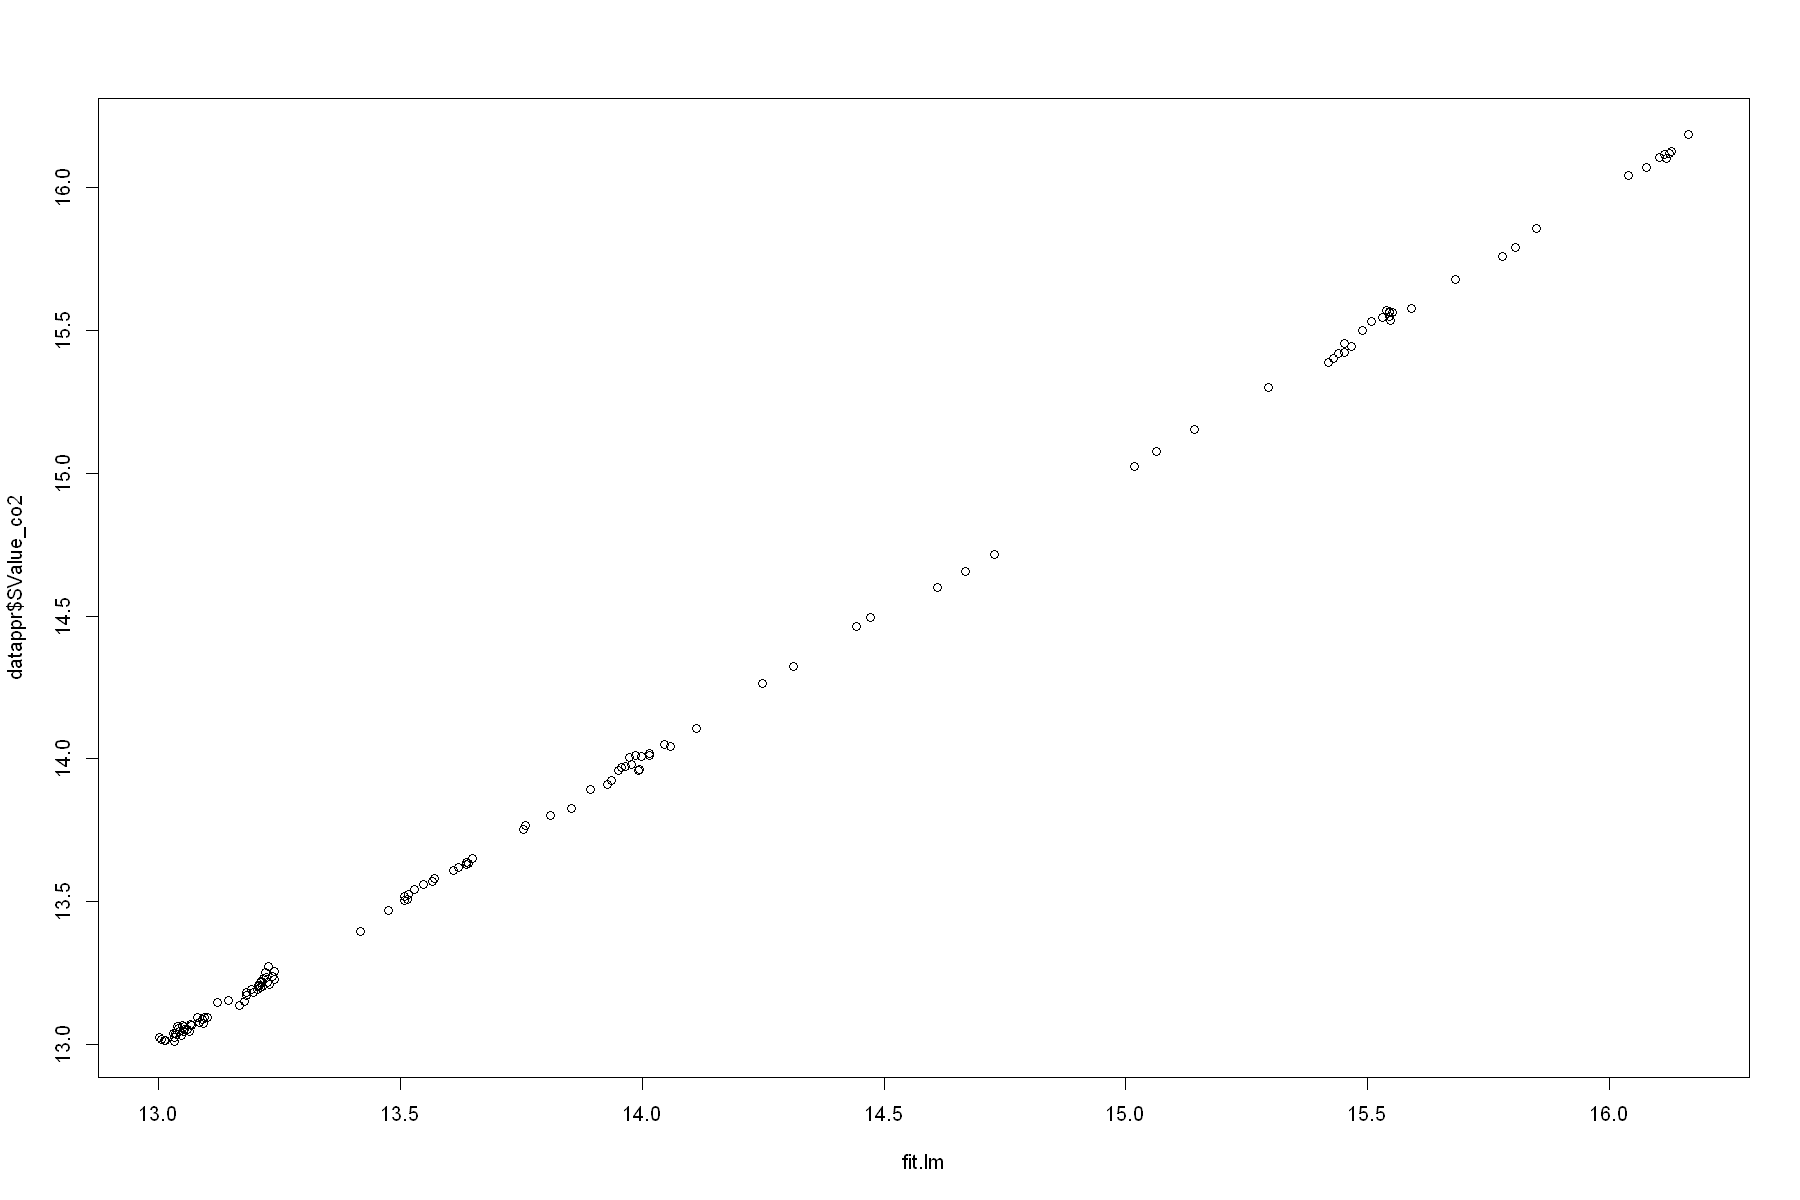

In [69]:
# estimation du modèle sans interaction
reg.lm <-aov(SValue_co2 ~ ., data = datappr)
# Extraction des résidus et des valeurs ajustées de ce modèle
res.lm <- reg.lm$residuals
fit.lm <- reg.lm$fitted.values

plot(fit.lm,datappr$SValue_co2)

###### MSE et R²

In [70]:
MSE_rl = mean((datappr$SValue_co2 - fit.lm)^2)
paste("MSE =", MSE_rl)

# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2 - fit.lm)^2)
SS_Total <- sum((datappr$SValue_co2 - mean(datappr$SValue_co2))^2)
R2_rl <- 1 - (SS_Residual / SS_Total)
paste("R2 =", R2_rl)


[1] "MSE = 0.000214119869775483"

[1] "R2 = 0.999796526081631"

Ici nous remarquons que le MSE dans le cas du modèle linéaire est très faible, voire null. Plus ce dernier est petit, plus la performance du modèle est bonne. Cela signifie que les prédictions sont plus proches des valeurs réelles.
Le coefficient de détermination, quant à lui, est très proche de 1. Plus il est proche de 1, meilleure est l'ajustement du modèle et l'explication de la variance des données.

##### Graphe des résidus

In [71]:
gplot.res <- function(x, y, titre = "titre"){
    ggplot(data.frame(x=x, y=y),aes(x,y))+
    geom_point(col = "black")+
    ylab("Résidus")+ xlab("Valeurs prédites")+
    ggtitle(titre)+
    geom_hline(yintercept = 0,col="red")
}

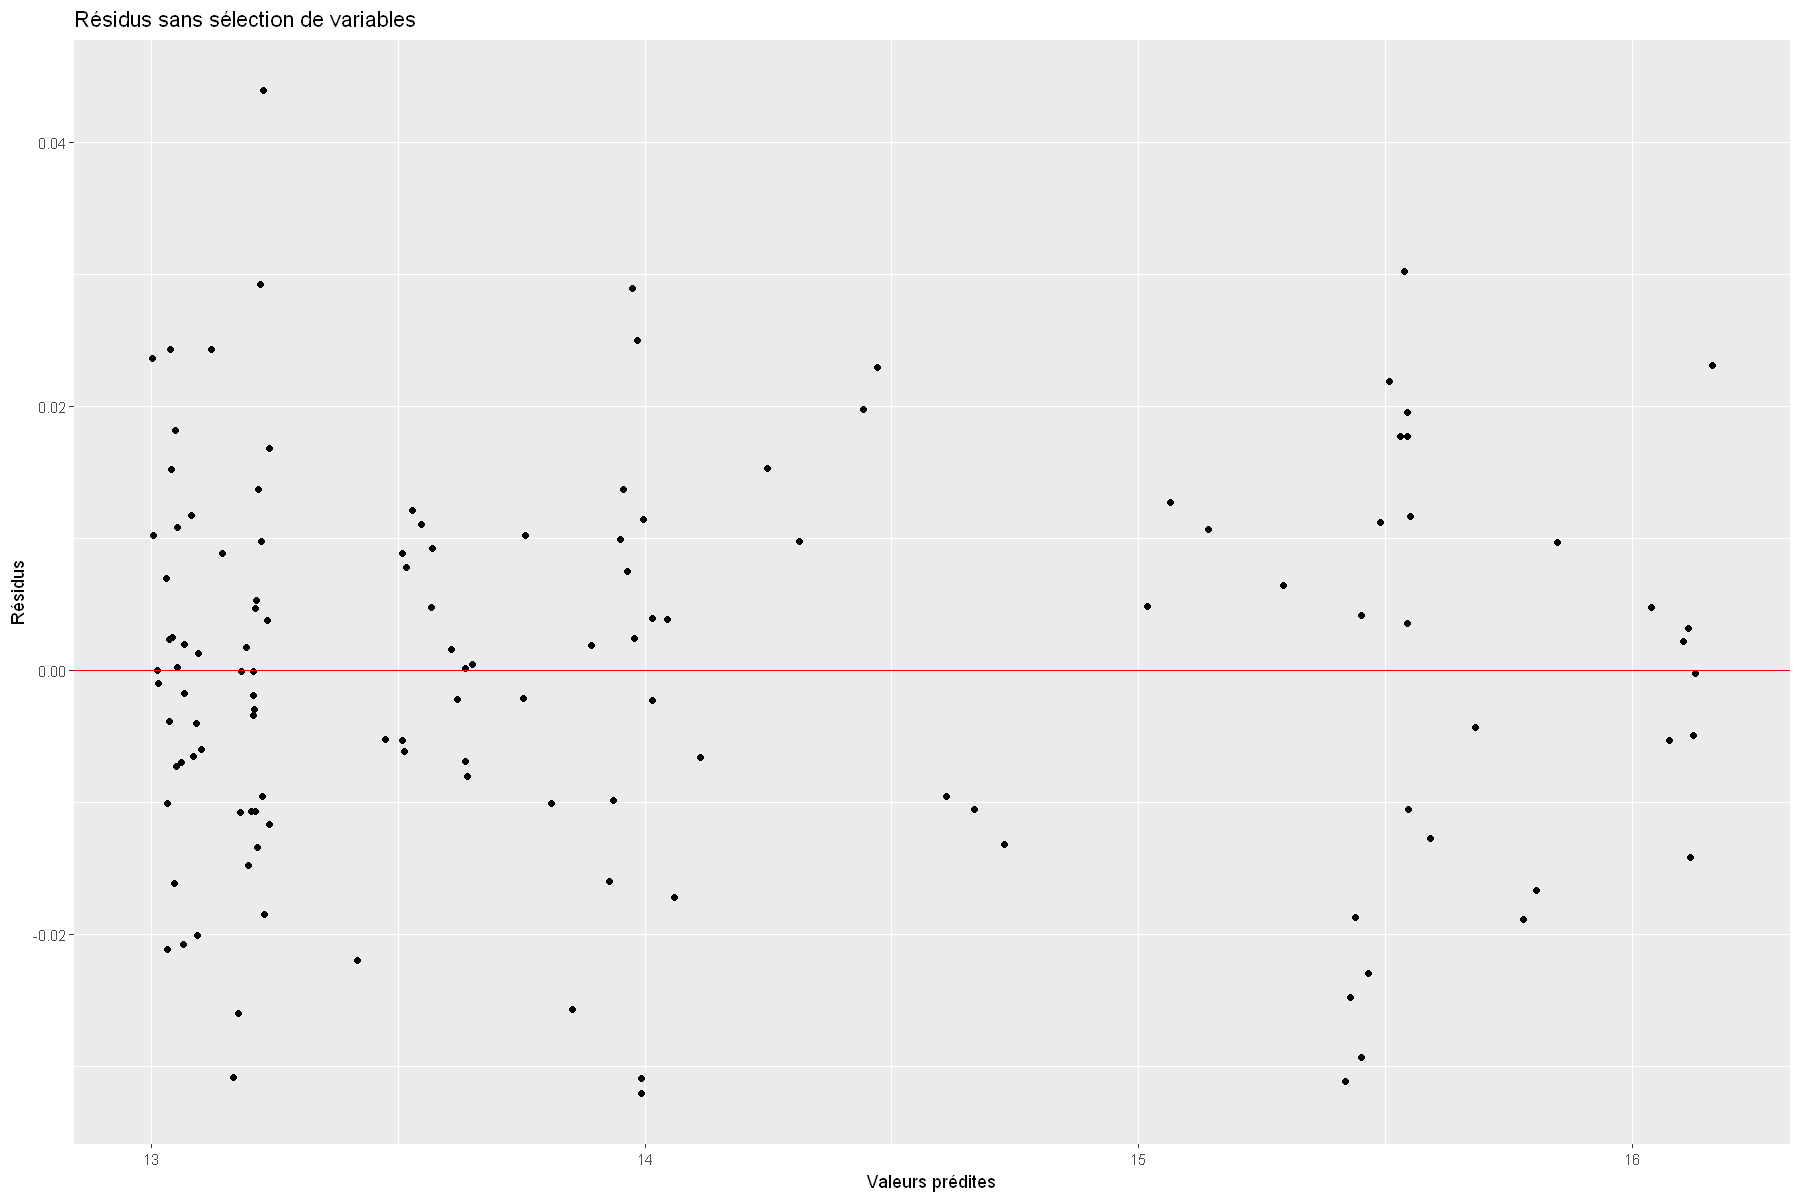

In [72]:
gplot.res(fit.lm,res.lm,"Résidus sans sélection de variables")

###### Sur données test

In [73]:
pred.aic=predict(reg.glm.step,newdata=datestr)
# Erreur quadratique moyenne de prévision
sum((pred.aic-datestr[,"SValue_co2"])^2)/nrow(datestr)
err.aic=pred.aic-datestr[,"SValue_co2"]
gplot.res(pred.aic,err.aic,titre="")
plot(pred.aic,datestr$SValue_co2)

#### Avec sélection de variable (AIC)

Ici nous avons choisit un premier critère de sélection de variable: l'AIC.

Le critère AIC est un outil permettant d'évaluer la qualité d'ajustement d'un modèle statistique tout en tenant compte de sa complexité. Son objectif est de choisir le modèle qui offre le meilleur équilibre entre ajustement aux données et simplicité, afin d'éviter le surajustement.

Contrairement à certains critères comme le coefficient de détermination (R²) qui peuvent privilégier des modèles plus complexes même s'ils n'améliorent pas significativement l'ajustement, le critère AIC pénalise la complexité des modèles. Ainsi, il favorise les modèles qui expliquent efficacement les données tout en restant aussi simples que possible.

###### Données apprentissage

In [74]:
reg.glm <- glm(SValue_co2 ~ .^2, data = datappr)
# Recherche du meilleur modèle au sens 
# du critère d'Akaïke par méthode descendante
reg.glm.step <- step(reg.glm, direction = "backward", trace = 0)

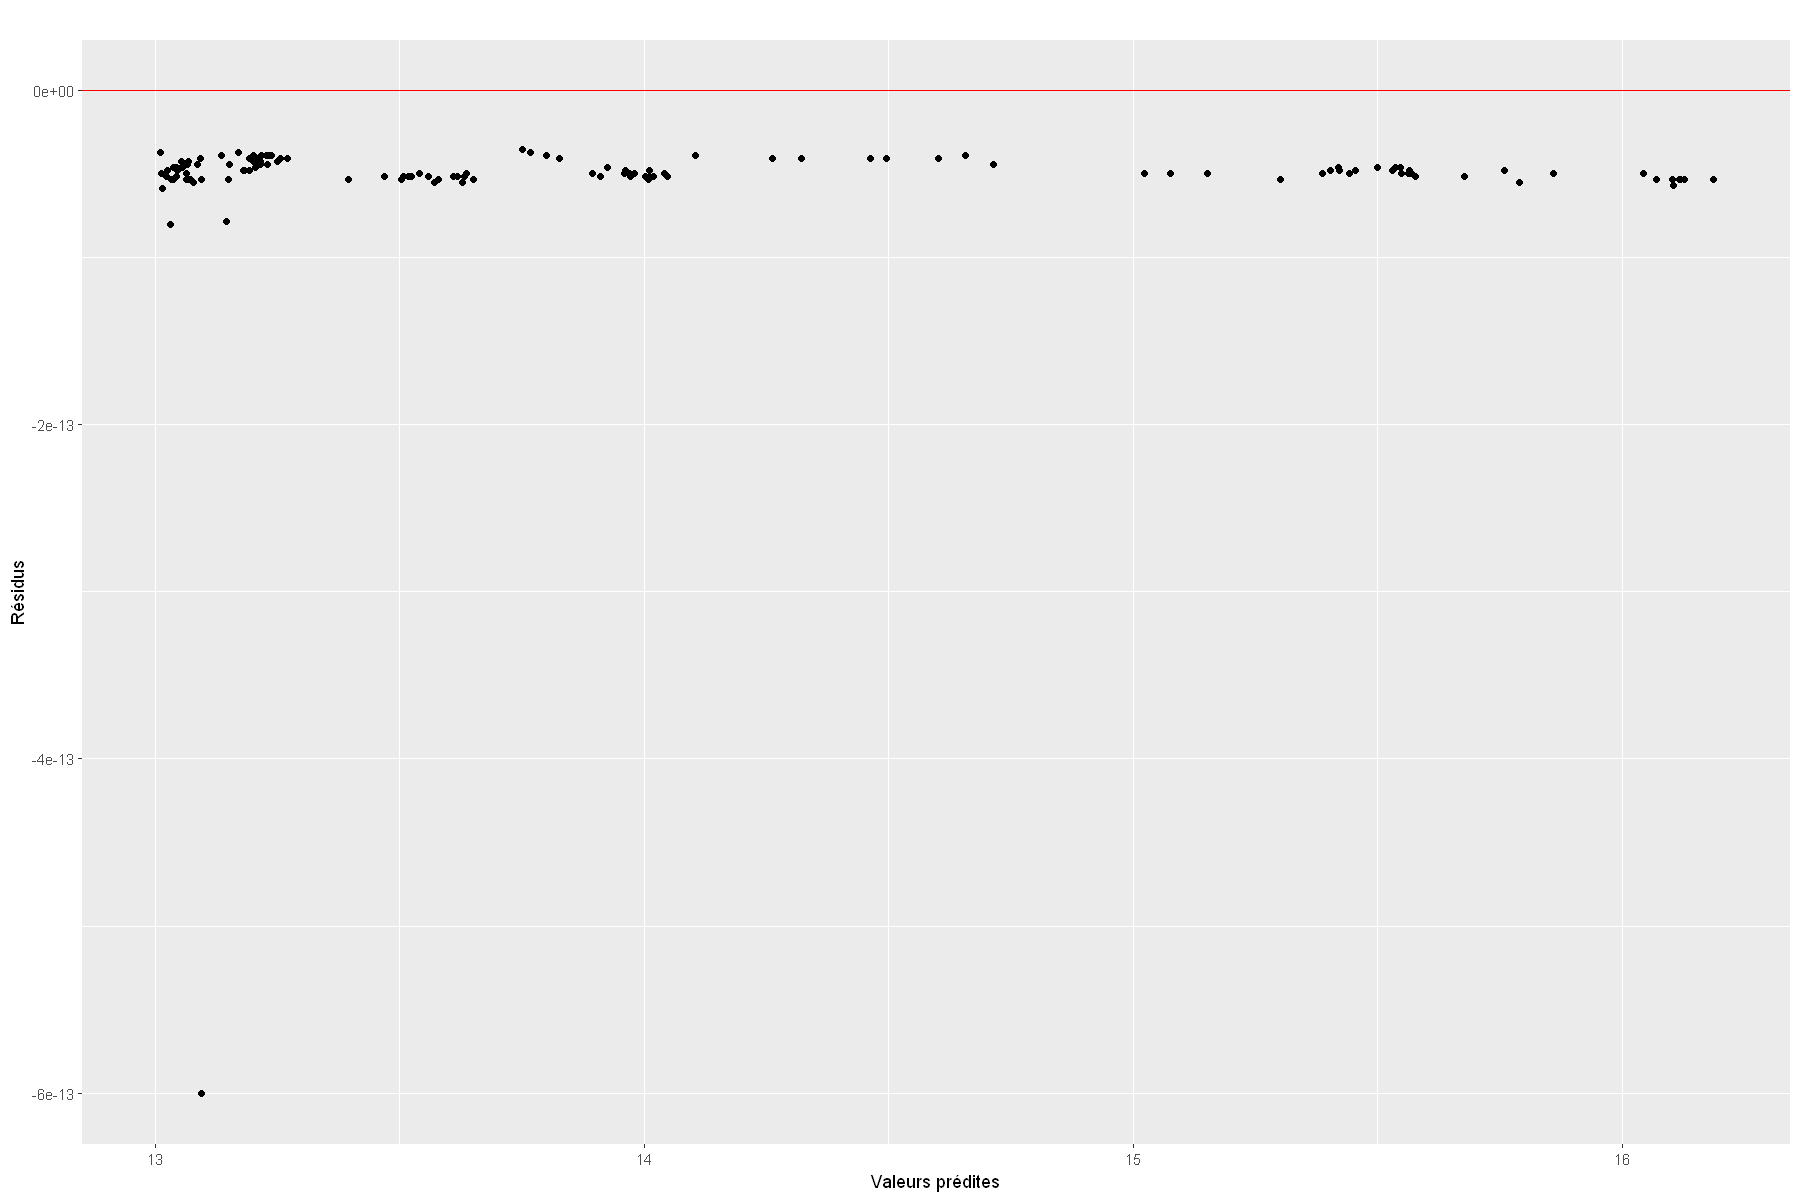

In [75]:
fit.aic=reg.glm.step$fitted
res.aic=fit.aic-datappr[,"SValue_co2"]
gplot.res(fit.aic,res.aic,titre="")

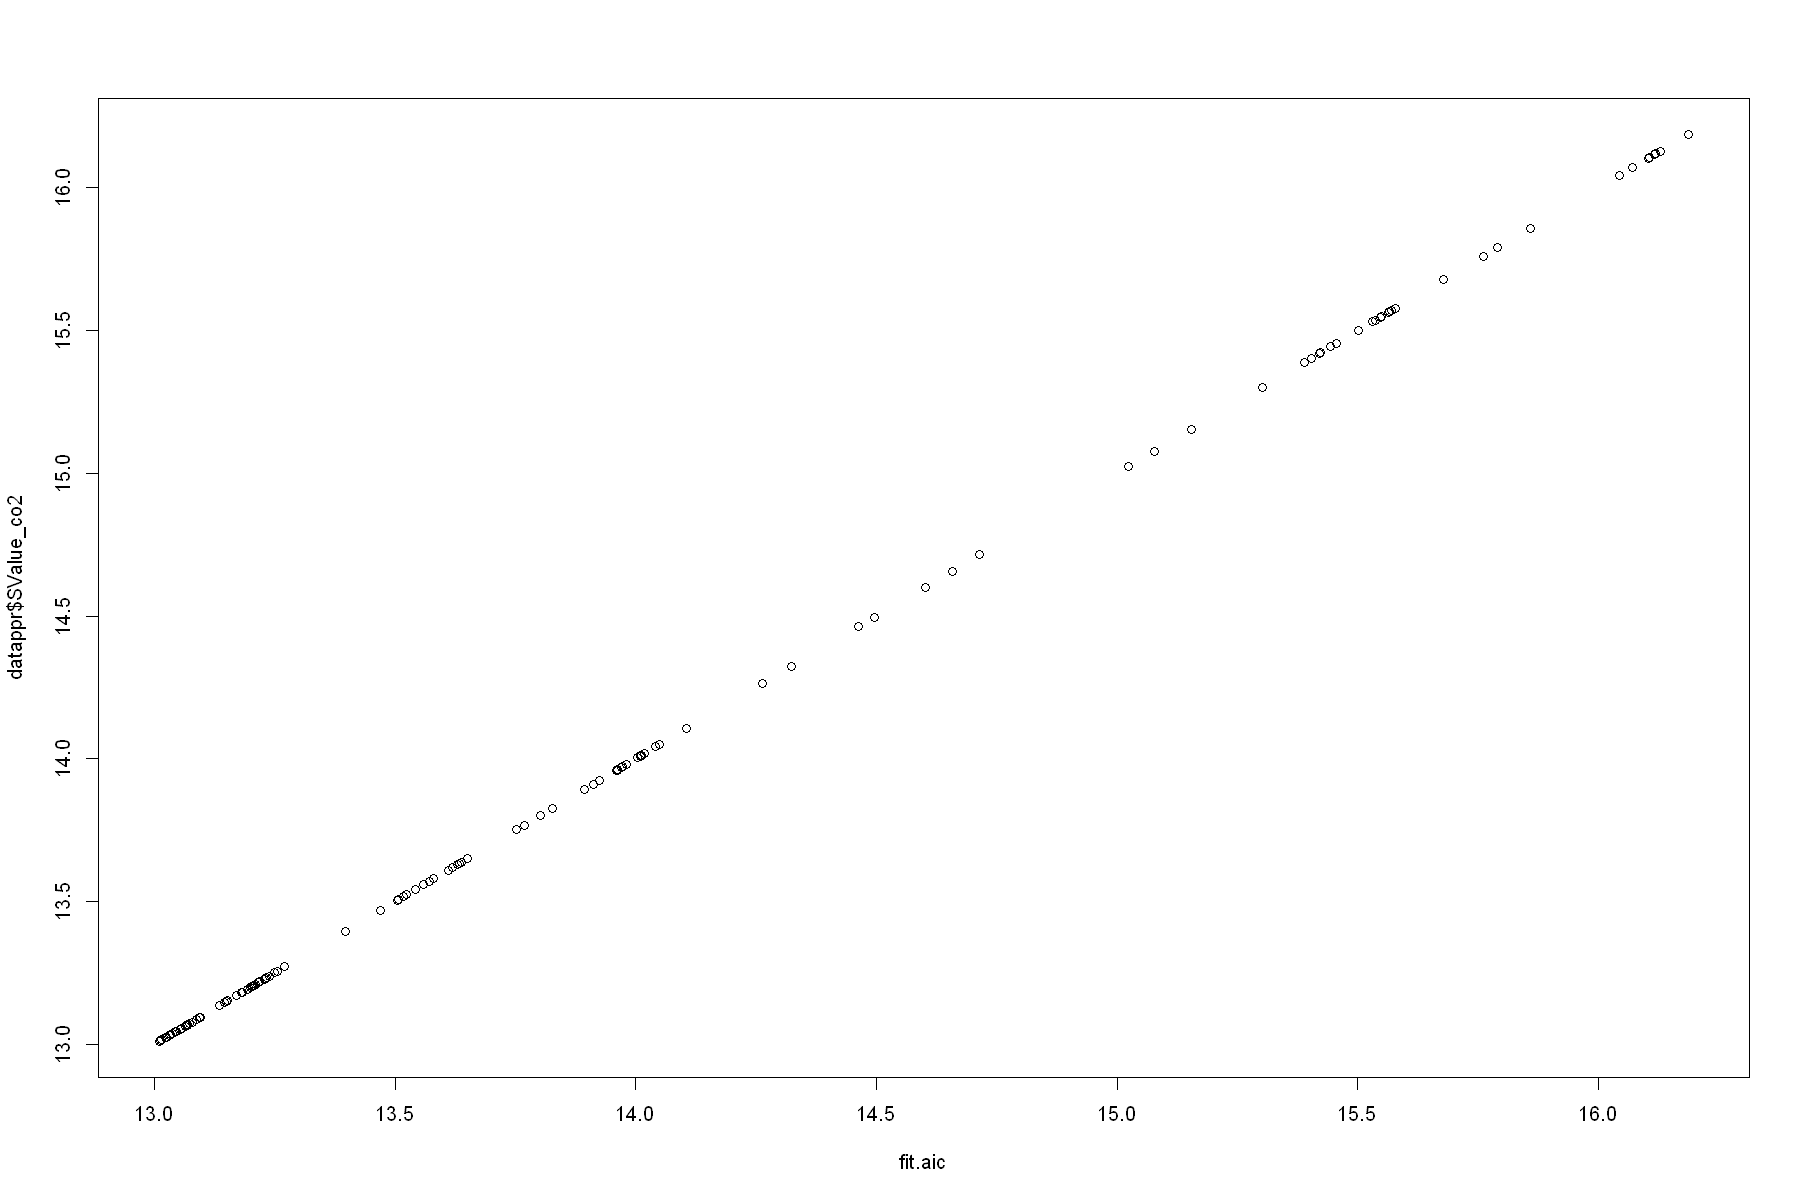

In [76]:
plot(fit.aic,datappr$SValue_co2)

In [77]:
as.data.frame(reg.glm.step$coefficients)

,reg.glm.step$coefficients
,<dbl>
(Intercept),-6.457042913
EntityCanada,-3.021850275
EntityChina,-1.535044651
EntityGermany,-2.053543304
EntityIndia,0.163882187
EntityItaly,-2.108352753
EntityJapan,-2.384304800
EntityMexico,-2.016687230
EntitySouth Africa,-0.313889204


###### MSE et R2

In [78]:
MSE_aic = mean((datappr$SValue_co2 - fit.aic)^2)
paste("MSE =", MSE_aic)

# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2 - fit.aic)^2)
SS_Total <- sum((datappr$SValue_co2 - mean(datappr$SValue_co2))^2)
R2_aic <- 1 - (SS_Residual / SS_Total)
paste("R2 =", R2_aic)

[1] "MSE = 5.14386231810625e-27"

[1] "R2 = 1"

###### Données tests

[1] 0.000496077

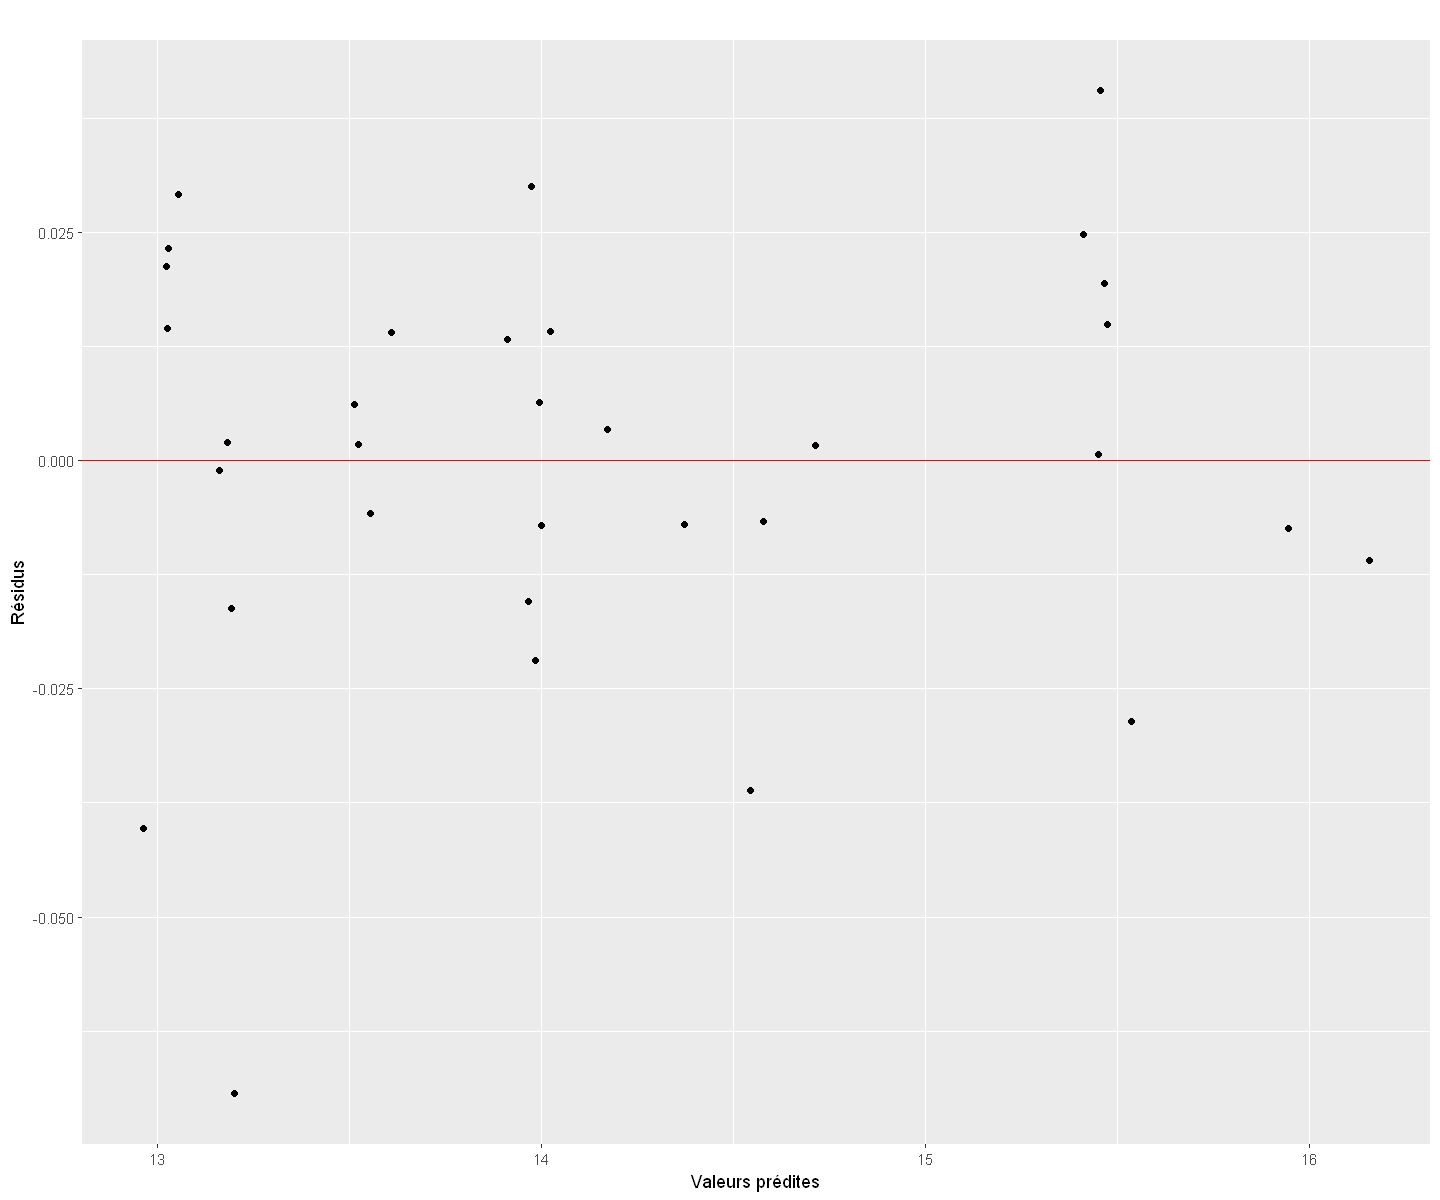

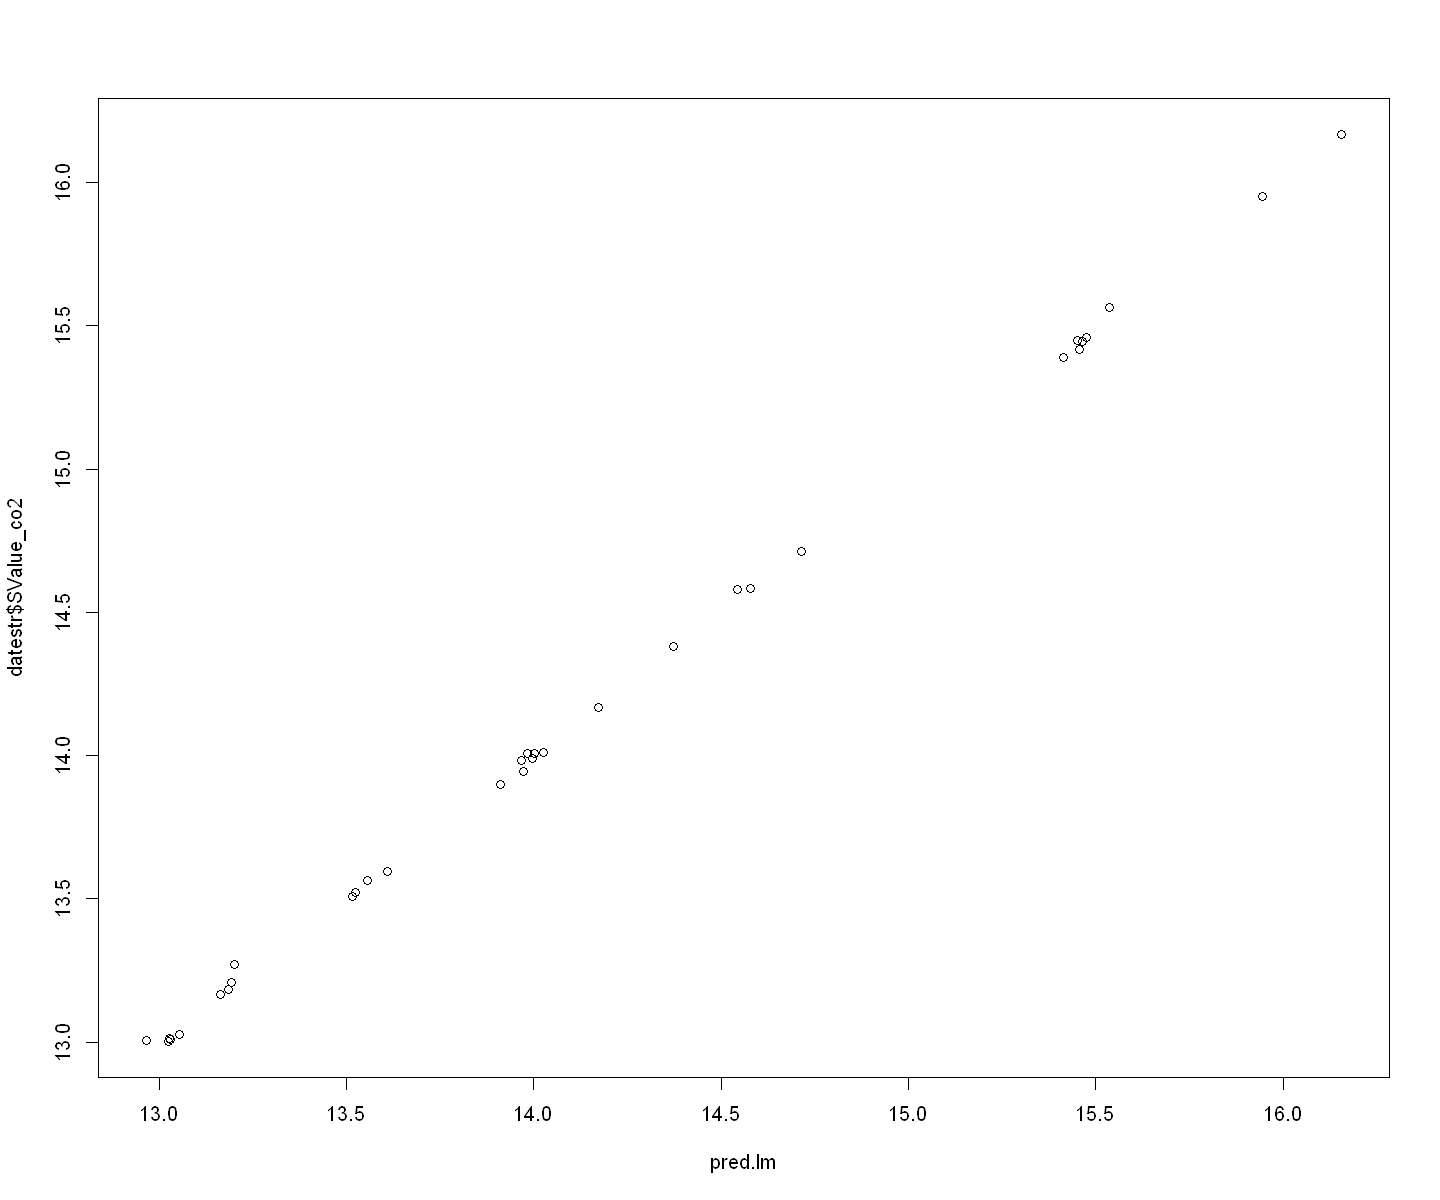

In [156]:
pred.lm=predict(reg.lm,newdata=datestr)
# Erreur quadratique moyenne de prévision
sum((pred.lm-datestr[,"SValue_co2"])^2)/nrow(datestr)
err.lm=pred.lm-datestr[,"SValue_co2"]
gplot.res(pred.lm,err.lm,titre="")
plot(pred.lm,datestr$SValue_co2)

#### Avec sélection de variable (LASSO)

Etudions notre modèle selon le critère LASSO.


Le but du LASSO est de trouver un modèle qui minimise l'erreur de prédiction tout en contrôlant la taille des coefficients des variables explicatives. En imposant une pénalité sur la somme des valeurs absolues des coefficients, le LASSO favorise des solutions où certains coefficients sont réduits à zéro. En conséquence, il permet non seulement de prédire avec précision, mais aussi de sélectionner les variables les plus importantes pour la prédiction, ce qui réduit automatiquement la complexité du modèle en excluant les variables moins significatives.

###### Données apprentissage

Warning message in storage.mode(xd) <- "double":
"NAs introduits lors de la conversion automatique"


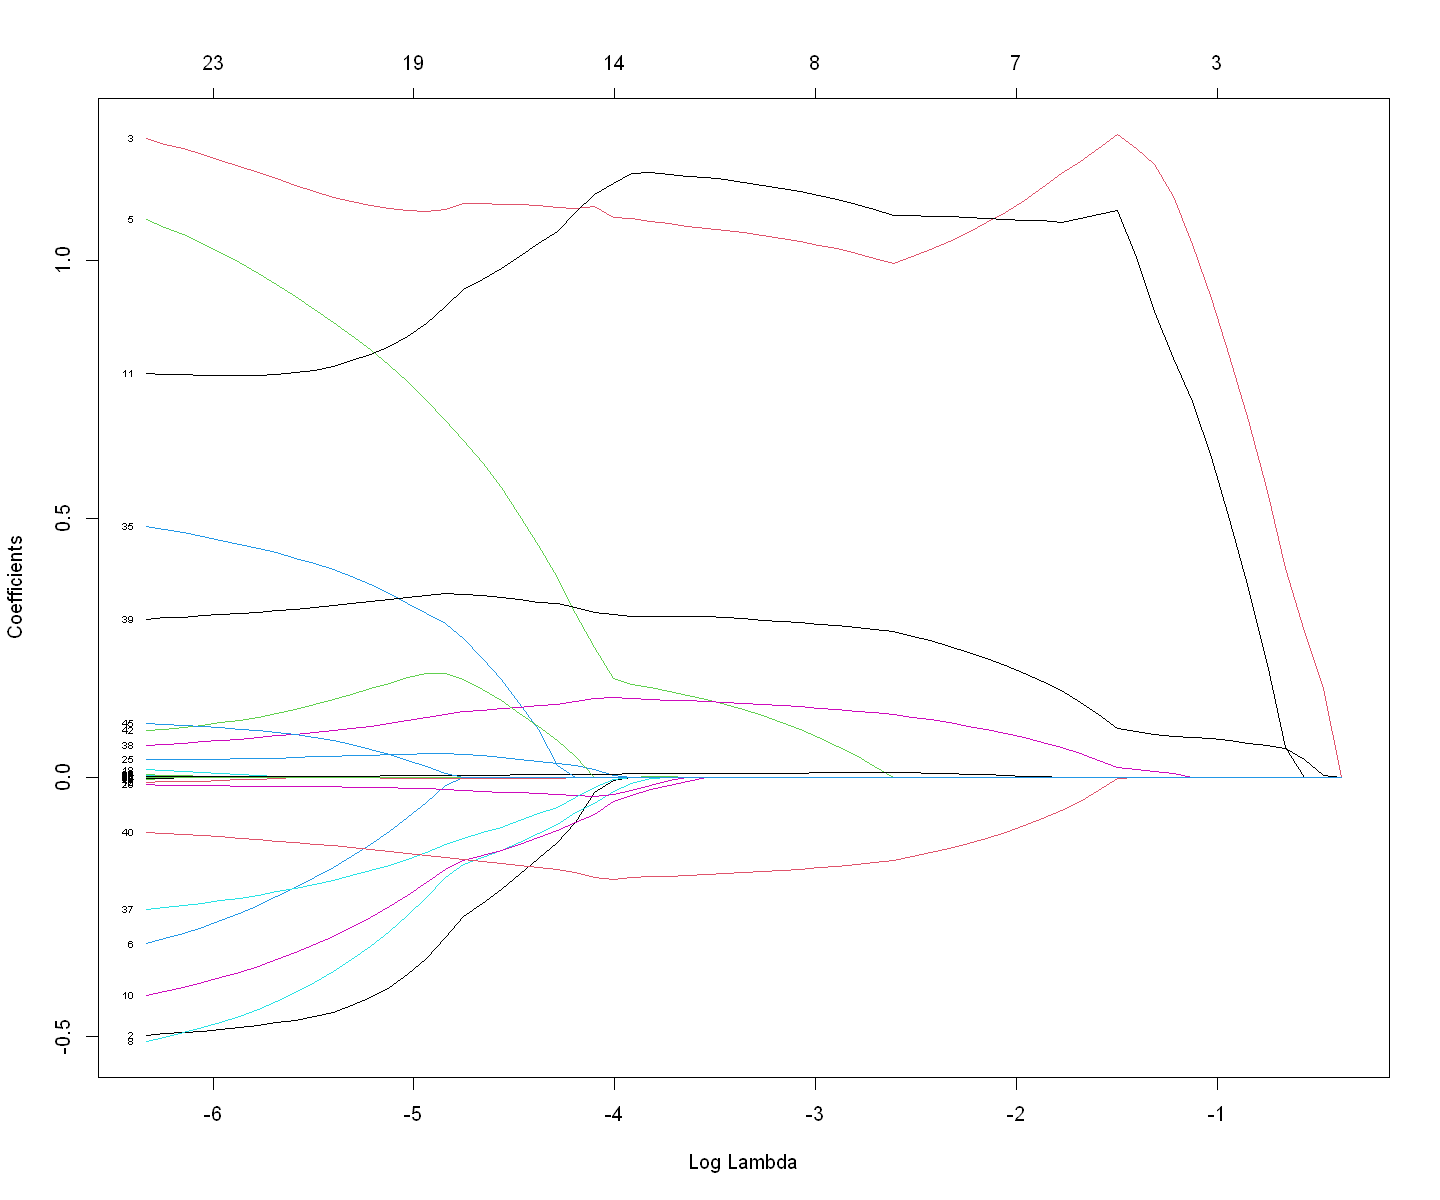

In [79]:
# Dans glmnet, le 17 correspond à l'indice de notre SvalueCo2 qu'il faut mettr en y ( variable à prédire) et pas dans x.
# Il faudra aussi enlever les factors ( entity et year )
reg.lasso.quanti <- glmnet(y = datappr[, 17],
                           x = as.matrix(datappr[, -17]))
# avec toutes les variables, créer d'abord la matrice d'expériences 
# avec 'model.matrix' (penser à retirer l'intercept du modèle)
x.mat <- model.matrix(SValue_co2 ~ . - 1, data = datappr)
reg.lasso <- glmnet(y = datappr$SValue_co2, x = x.mat)
options(repr.plot.width = 12, repr.plot.height = 10)
plot(reg.lasso, xvar = "lambda", label = TRUE)
#legend("topright", legend = paste(1:ncol(x.mat), " - ", colnames(x.mat)))

##### Choix optimal de l'hyperparamètre

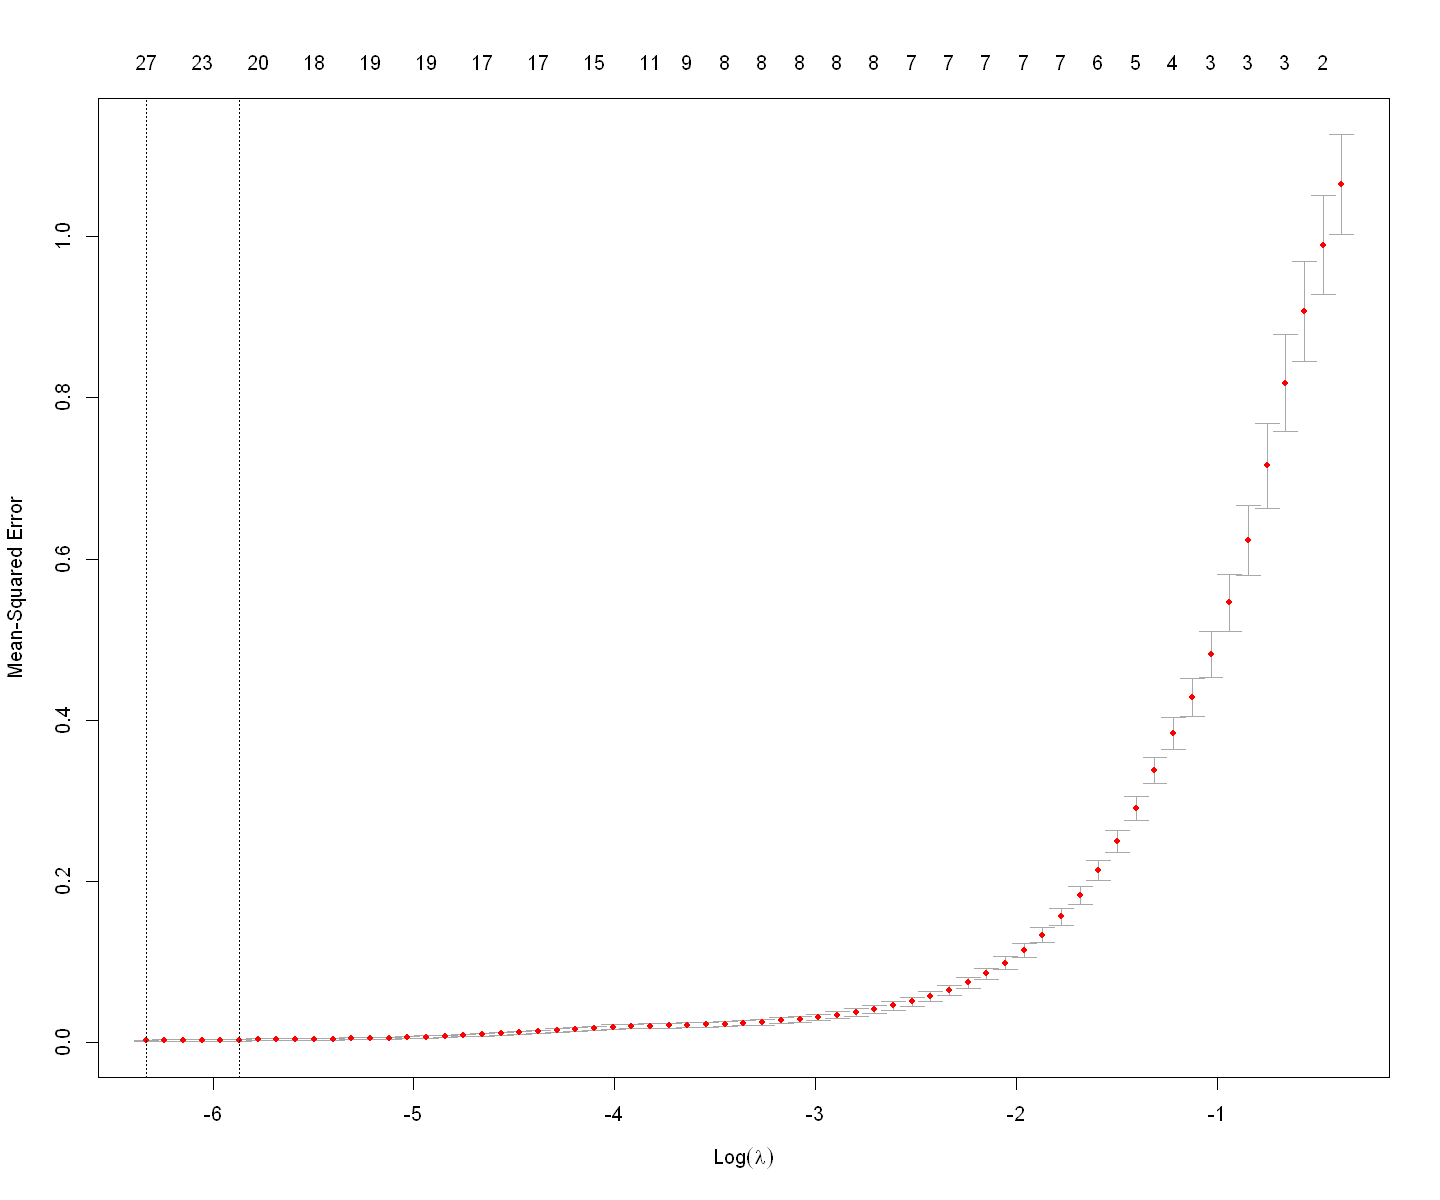

In [80]:
reg.lasso.cv <- cv.glmnet(y = datappr[, 17], x = x.mat)
plot(reg.lasso.cv)

On a le choix entre lambda min et lambda 1se. Au vue du nombre de variables conséquentes que nous avons, il est pertinent d'en supprimer un max donc on prend 1se

In [81]:
paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.1se, 3))
# modèle correspondant
coef(reg.lasso.cv, s = "lambda.1se")

[1] "CV estimate of lambda : 0.003"

46 x 1 sparse Matrix of class "dgCMatrix"
                                s1
(Intercept)           9.7753368438
EntityBrazil          .           
EntityCanada         -0.4823567887
EntityChina           1.1810852207
EntityGermany         .           
EntityIndia           0.9943581538
EntityItaly          -0.2617061330
EntityJapan           .           
EntityMexico         -0.4601052030
EntitySouth Africa    .           
EntityUnited Kingdom -0.3751967461
EntityUnited States   0.7770222841
Year2001             -0.0036246098
Year2002              .           
Year2003              .           
Year2004              .           
Year2005              .           
Year2006              .           
Year2007              0.0066212824
Year2008              .           
Year2009              .           
Year2010              .           
Year2011              .           
Year2012              .           
Year2013              0.0007865005
Year2014              0.0365894535
Year2015     

In [82]:
Coef = as.data.frame(as.matrix(coef(reg.lasso.cv, s = "lambda.1se")))
Coef

,s1
,<dbl>
(Intercept),9.7753368438
EntityBrazil,0.0000000000
EntityCanada,-0.4823567887
EntityChina,1.1810852207
EntityGermany,0.0000000000
EntityIndia,0.9943581538
EntityItaly,-0.2617061330
EntityJapan,0.0000000000
EntityMexico,-0.4601052030


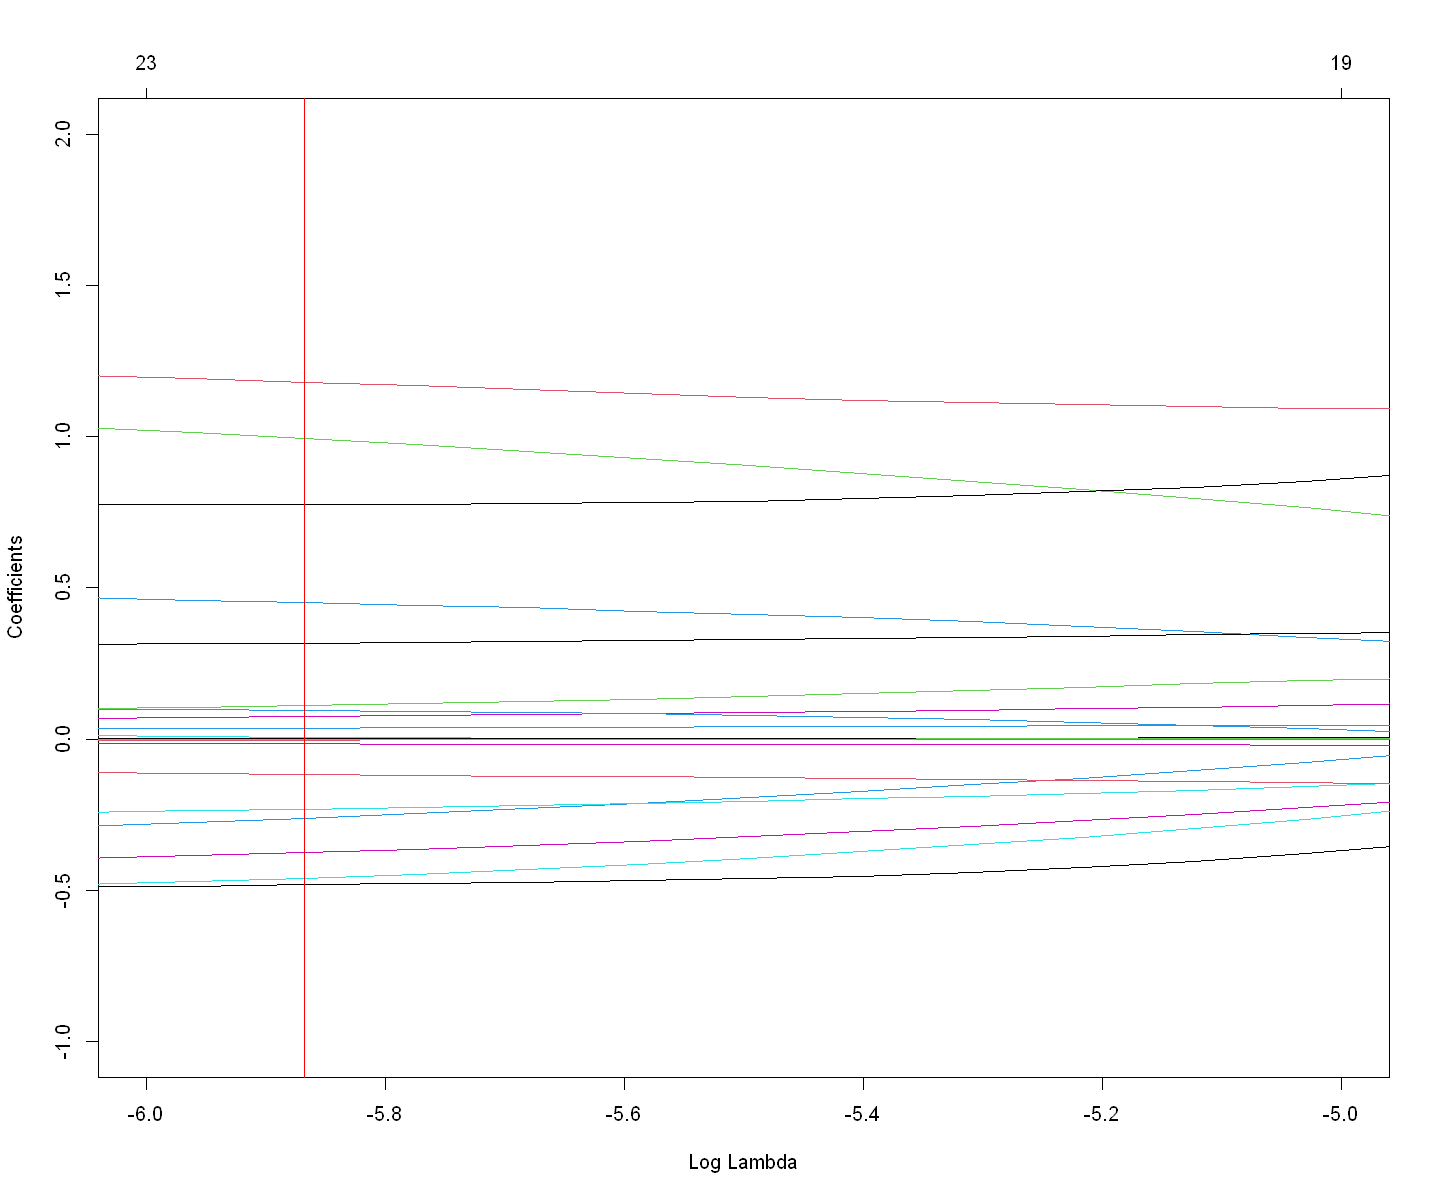

In [83]:
plot(reg.lasso, xvar = "lambda", label = TRUE,xlim=c(-6,-5),ylim=c(-1,2))
abline(v=log(reg.lasso.cv$lambda.1se),col="red")

In [84]:
fit.lasso.1se <- predict(reg.lasso.cv, s = "lambda.1se", newx = x.mat)
res.lasso.1se <- datappr$SValue_co2 - fit.lasso.1se 

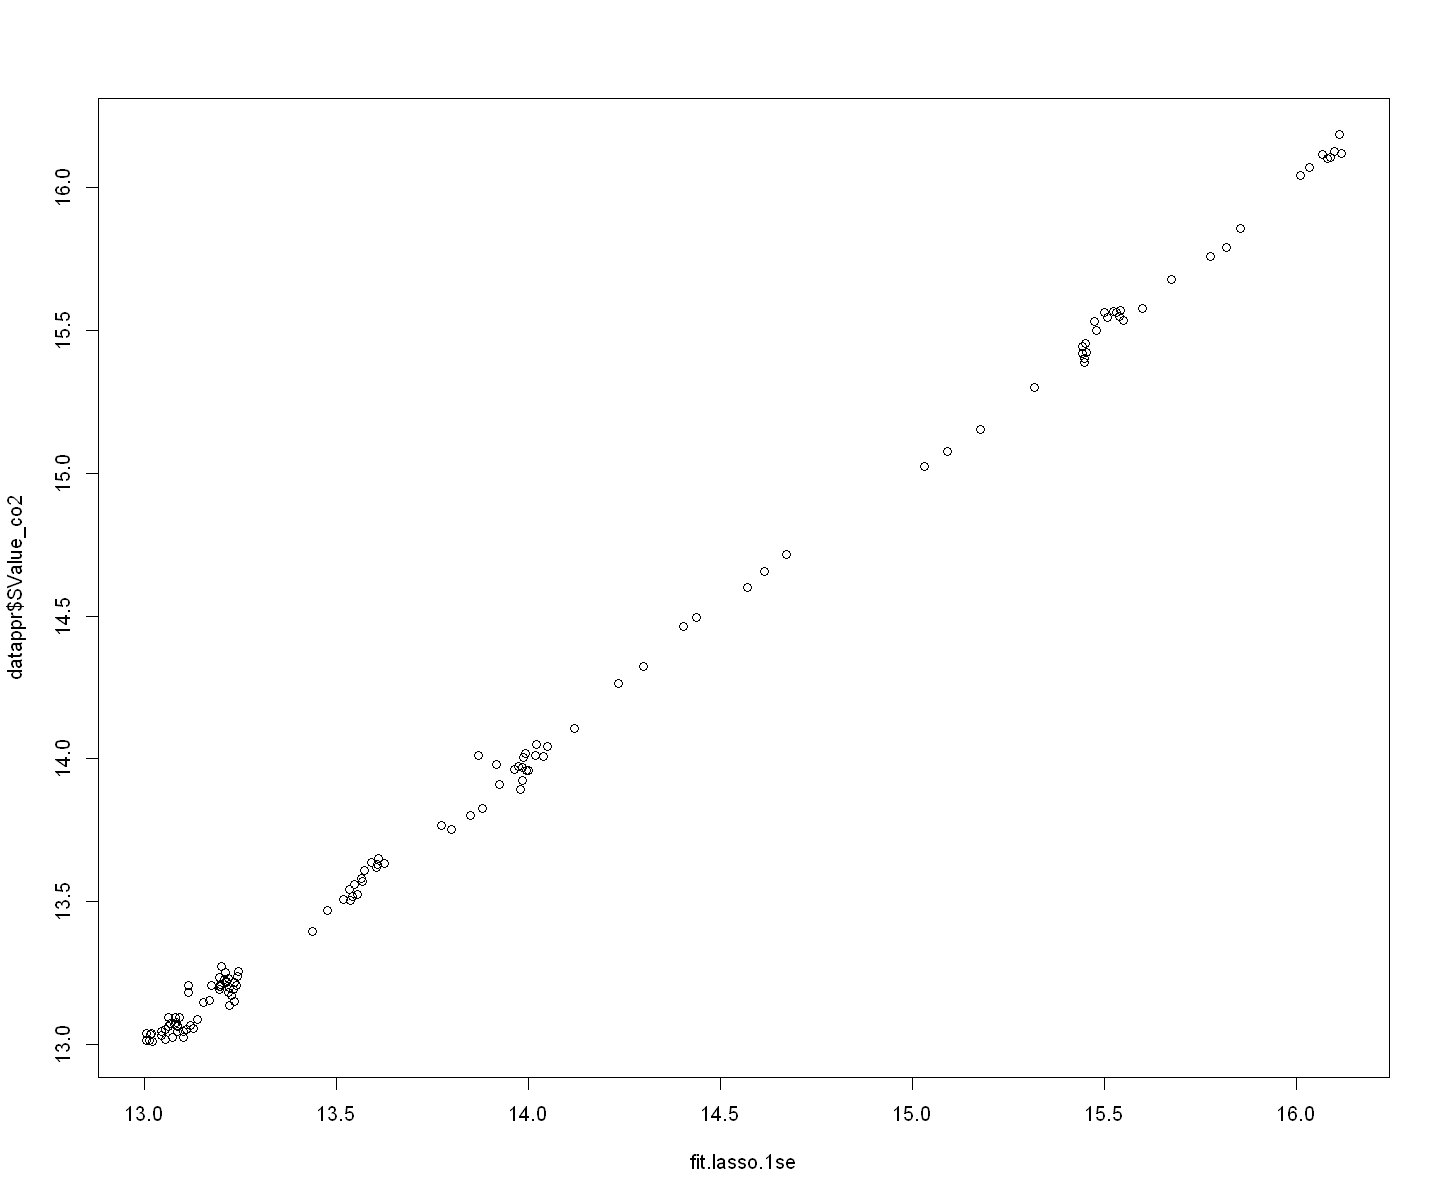

In [85]:
plot(fit.lasso.1se,datappr$SValue_co2)

##### Graphe des résidus

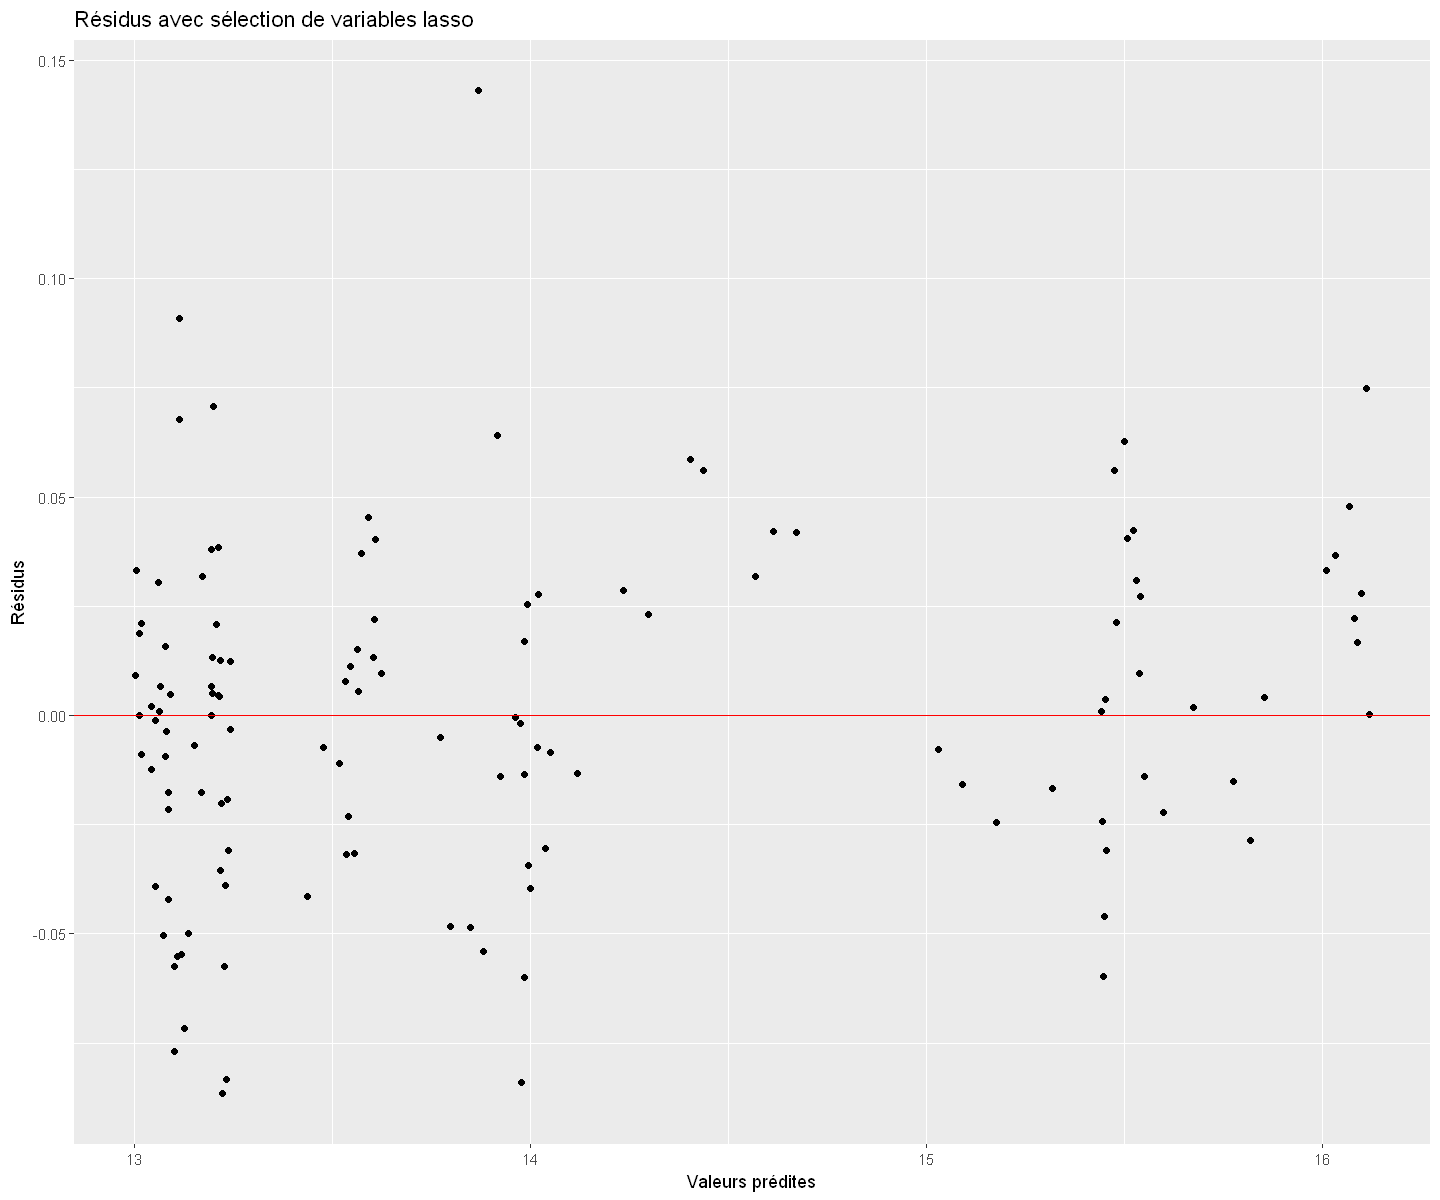

In [86]:
gplot.res(fit.lasso.1se,res.lasso.1se,"Résidus avec sélection de variables lasso")

##### MSE et R²

In [87]:
MSE_lse = mean((datappr$SValue_co2 - fit.lasso.1se)^2)
paste("MSE =", MSE_lse)

# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2 - fit.lasso.1se)^2)
SS_Total <- sum((datappr$SValue_co2 - mean(datappr$SValue_co2))^2)
R2_lse <- 1 - (SS_Residual / SS_Total)
paste("R2 =", R2_lse)

[1] "MSE = 0.00143754206304419"

[1] "R2 = 0.998633931934037"

###### Données tests

In [154]:
pred.lse=predict(reg.lasso.cv,newdata=datestr)
# Erreur quadratique moyenne de prévision
sum((pred.lse-datestr[,"SValue_co2"])^2)/nrow(datestr)
err.lse=pred.lse-datestr[,"SValue_co2"]
gplot.res(pred.lse,err.lse,titre="")
plot(pred.lse,datestr$SValue_co2)

ERROR: Error in predict.glmnet(object$glmnet.fit, newx, s = lambda, ...): You need to supply a value for 'newx'


### SVM

###### Données apprentissage

In [88]:
svm.reg0 = svm(SValue_co2 ~ ., data = datappr)
summary(svm.reg0)


Call:
svm(formula = SValue_co2 ~ ., data = datappr)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.02222222 
    epsilon:  0.1 


Number of Support Vectors:  44






#### Choix du meilleur noyau SVM

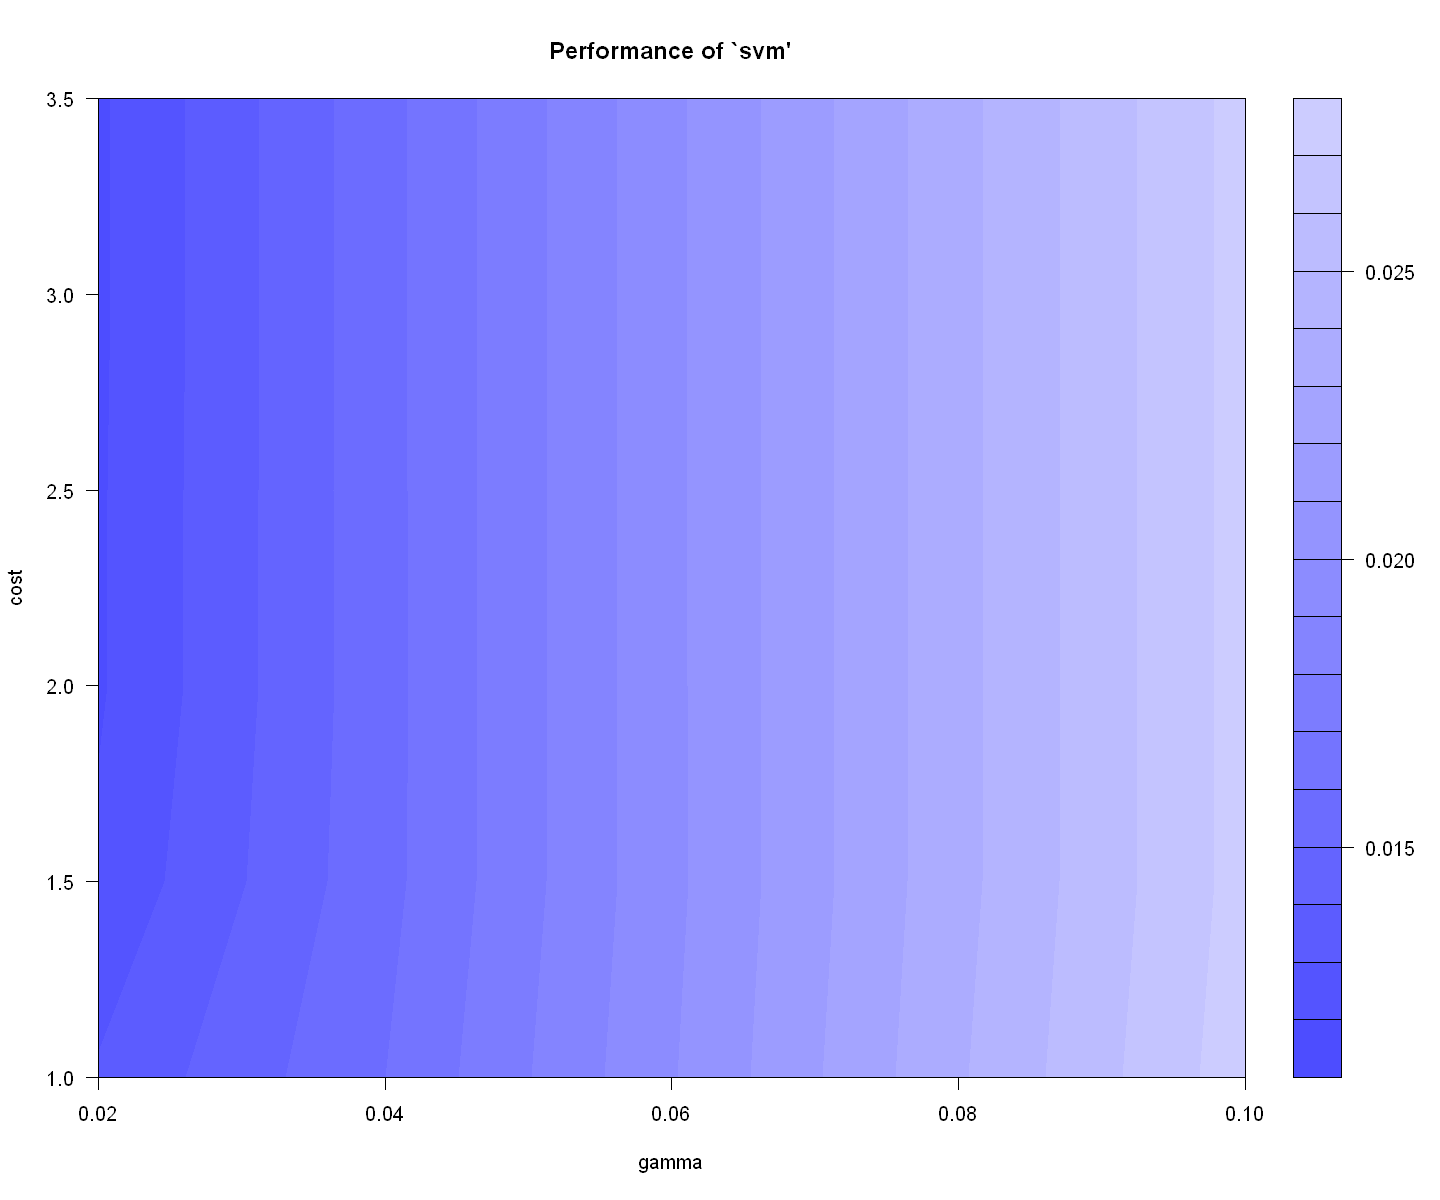

In [89]:
svm.reg.tune = tune.svm(SValue_co2 ~ ., data = datappr, cost = c(1, 1.5, 2, 2.5, 3, 3.5), 
    gamma = seq(0.02, 0.1, by = 0.02))
plot(svm.reg.tune)

In [90]:
#set.seed(2021)
svm.reg = svm(SValue_co2~ ., data = datappr, cost = svm.reg.tune$best.parameters$cost, 
    gamma = svm.reg.tune$best.parameters$gamma, epsilon = 0.01)
summary(svm.reg)


Call:
svm(formula = SValue_co2 ~ ., data = datappr, cost = svm.reg.tune$best.parameters$cost, 
    gamma = svm.reg.tune$best.parameters$gamma, epsilon = 0.01)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  3 
      gamma:  0.02 
    epsilon:  0.01 


Number of Support Vectors:  96






#### Résidus

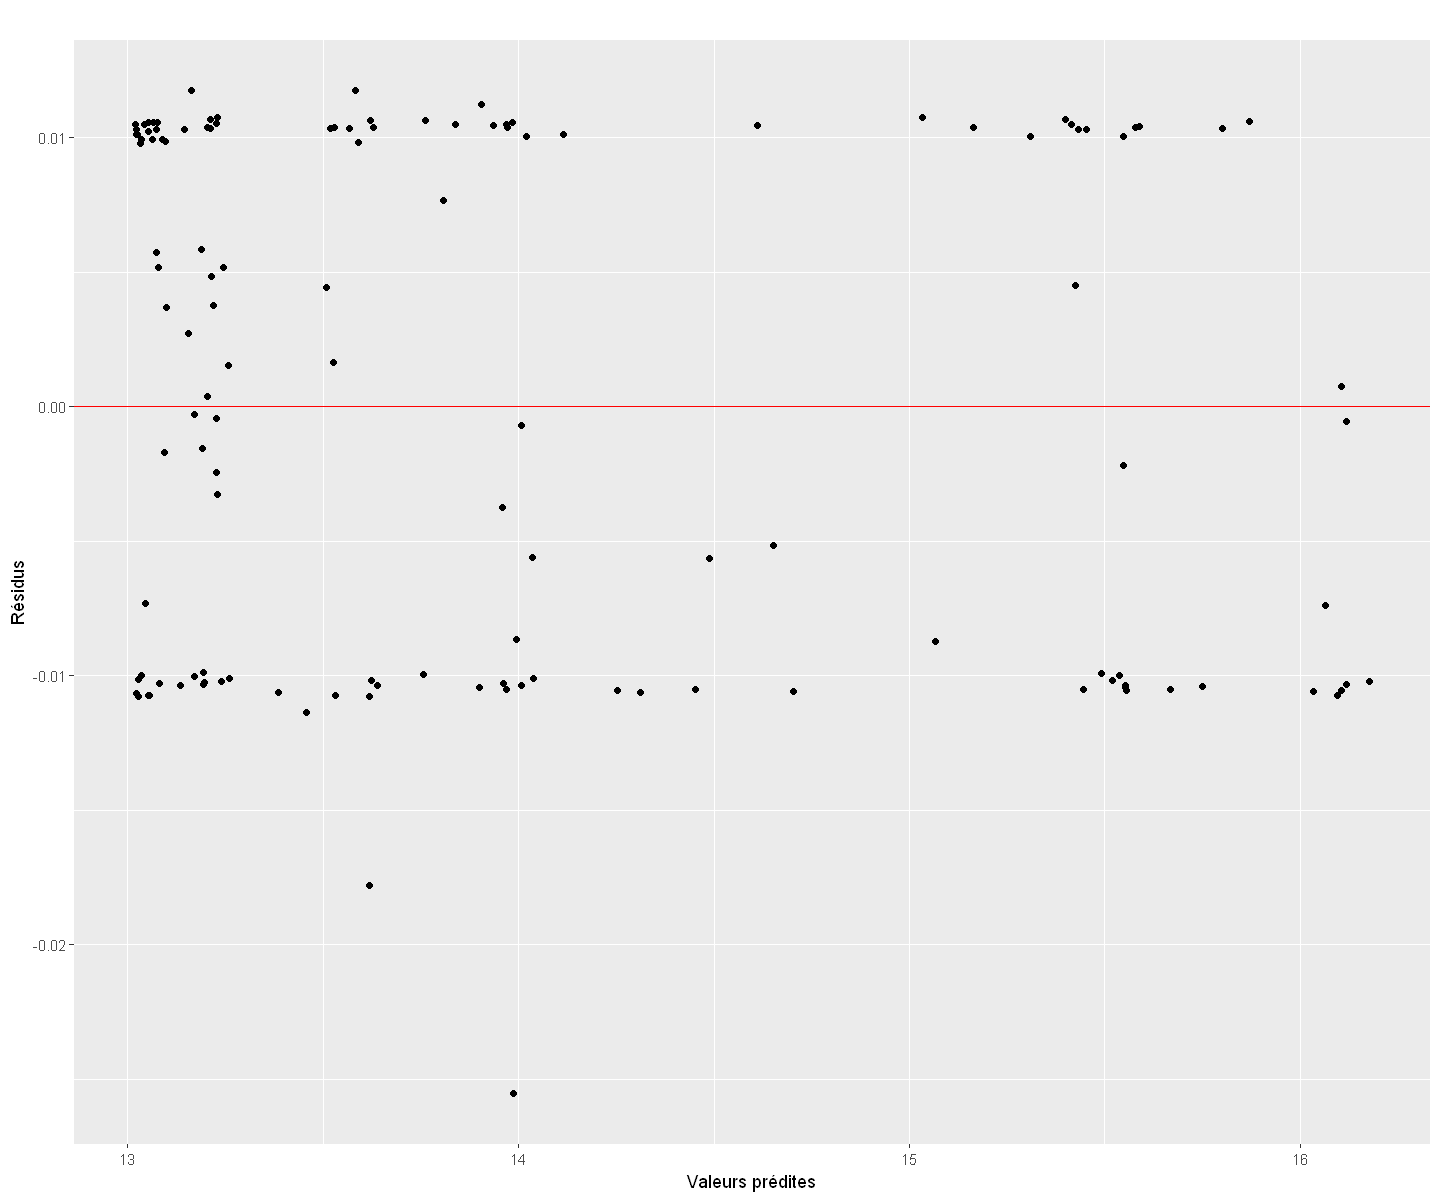

In [91]:
fit.svmr=svm.reg$fitted
res.svmr=fit.svmr-datappr[,"SValue_co2"]
gplot.res(fit.svmr,res.svmr,titre="")

Nous visualisons bien un tube sur le grpahe des résidus, caractéristique de la méthode SVM.

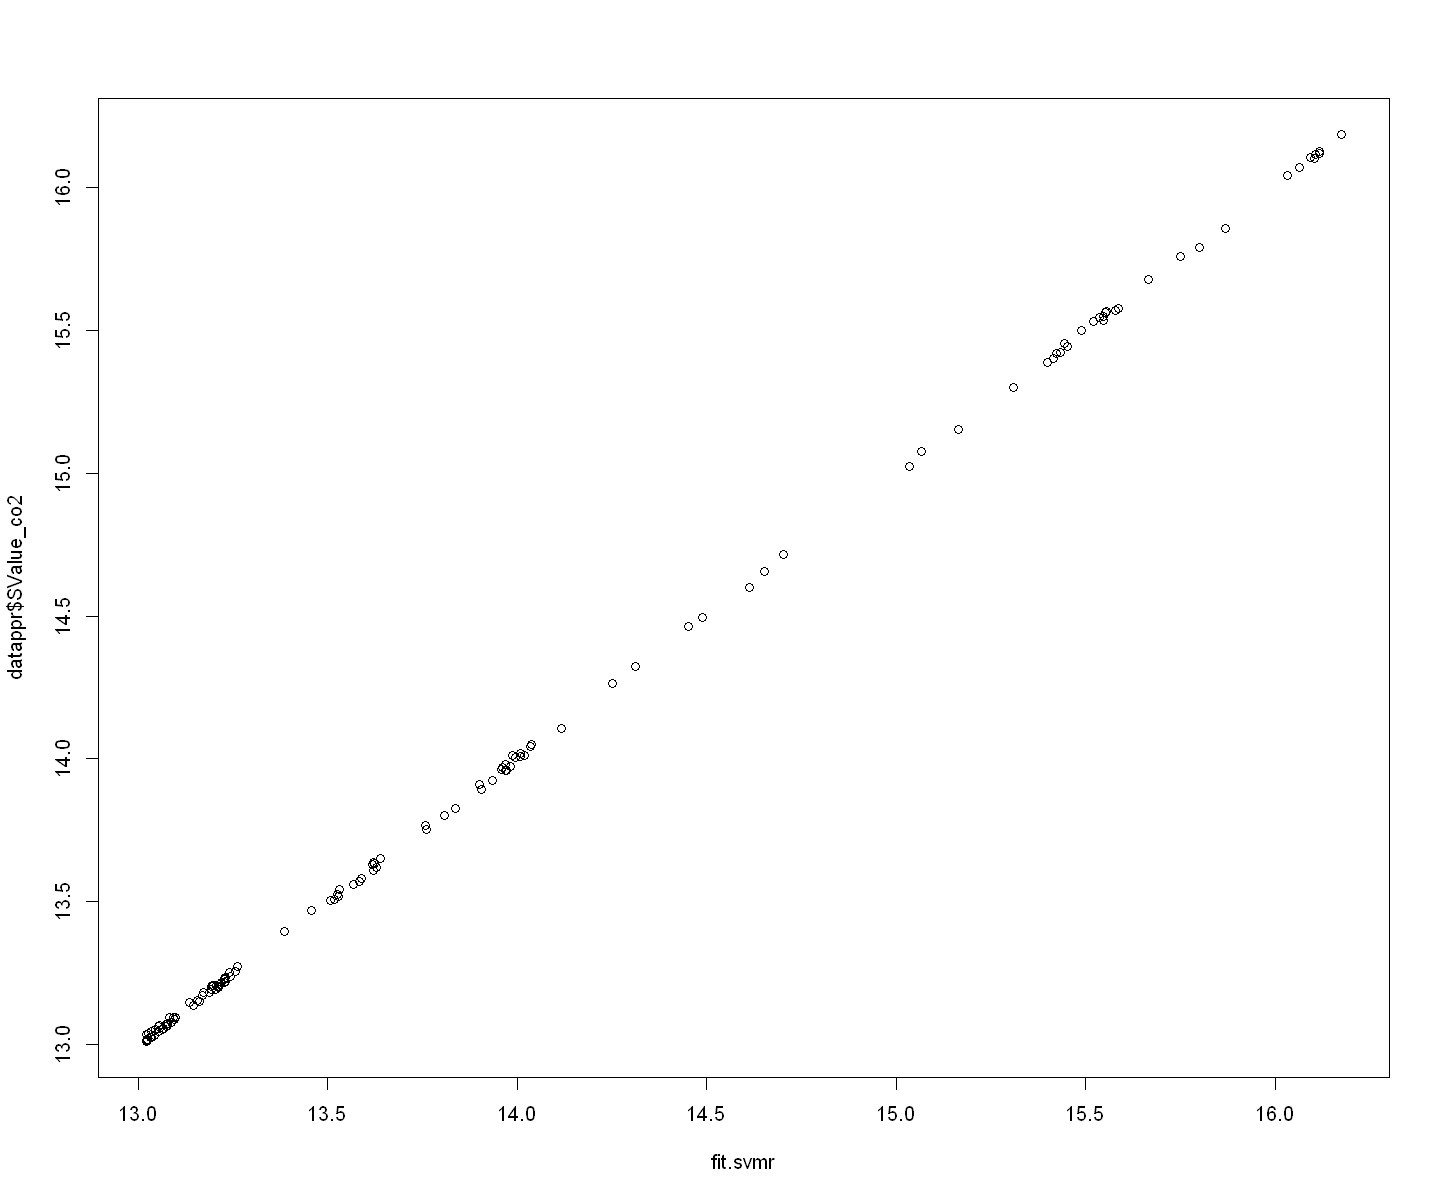

In [92]:
plot(fit.svmr,datappr$SValue_co2)

###### MSE et R2

In [93]:
MSE_svm = mean((datappr$SValue_co2 - fit.svmr)^2)
paste("MSE =", MSE_svm)

# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2 - fit.svmr)^2)
SS_Total <- sum((datappr$SValue_co2 - mean(datappr$SValue_co2))^2)
R2_svm <- 1 - (SS_Residual / SS_Total)
paste("R2 =", R2_svm)

[1] "MSE = 9.27416947238733e-05"

[1] "R2 = 0.999911869383998"

###### Données tests

[1] 0.00282959

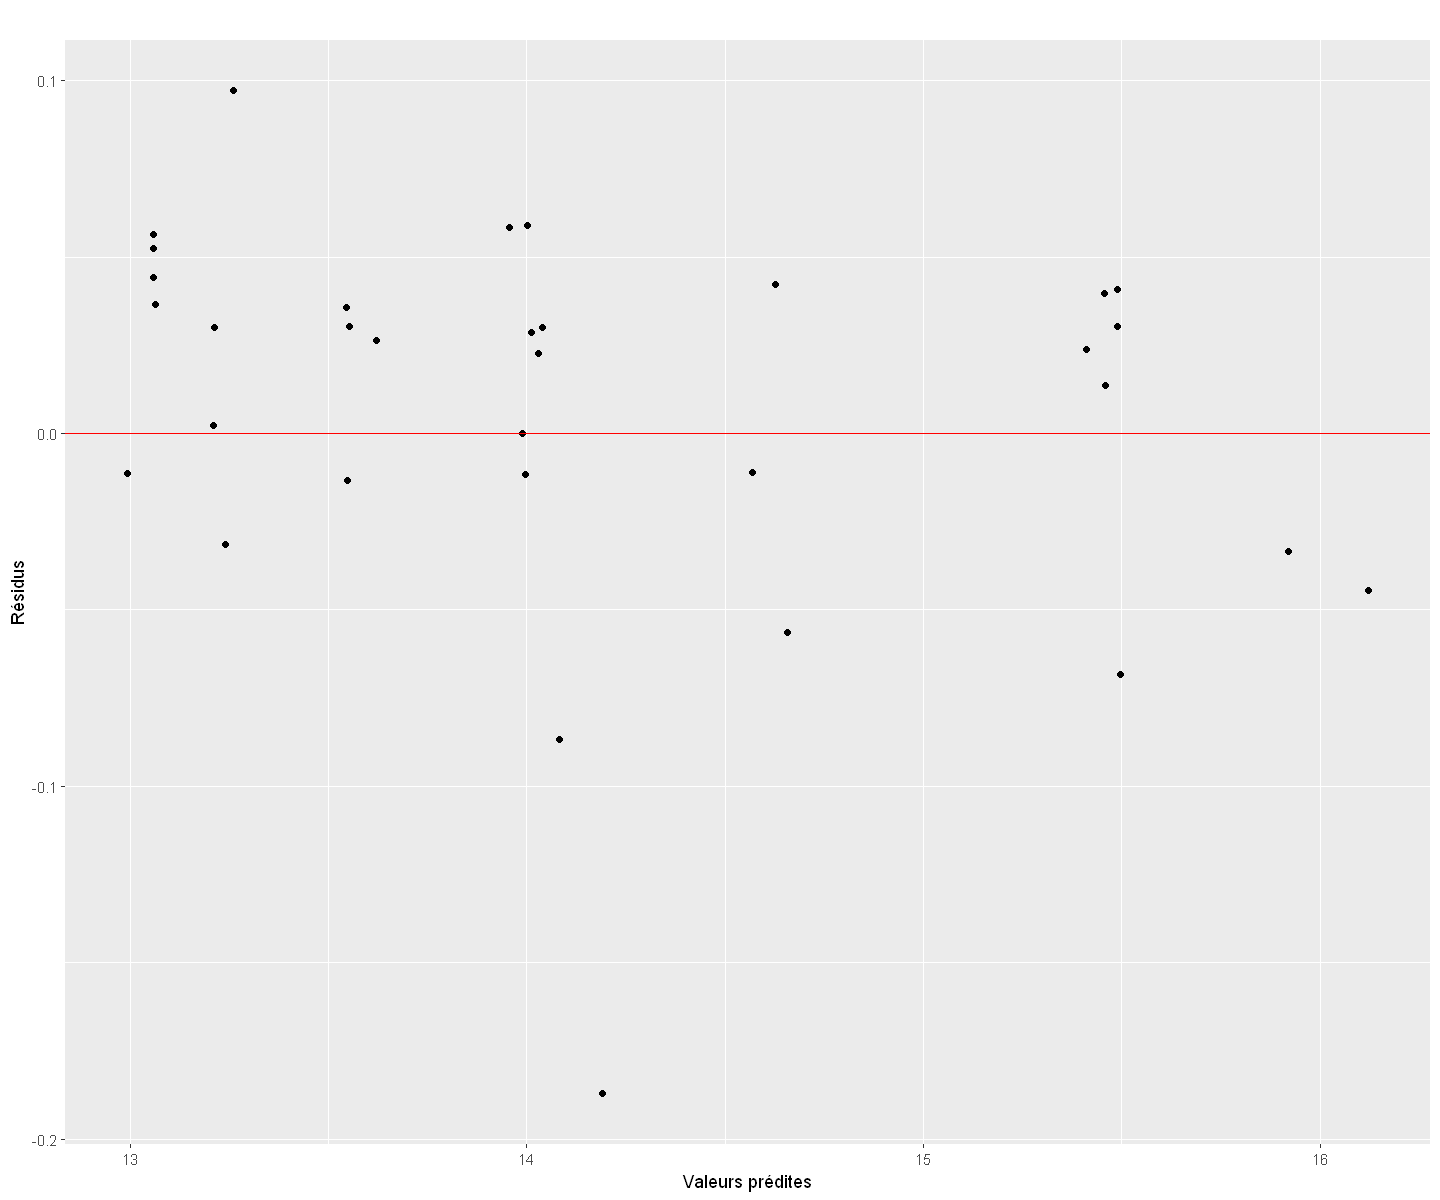

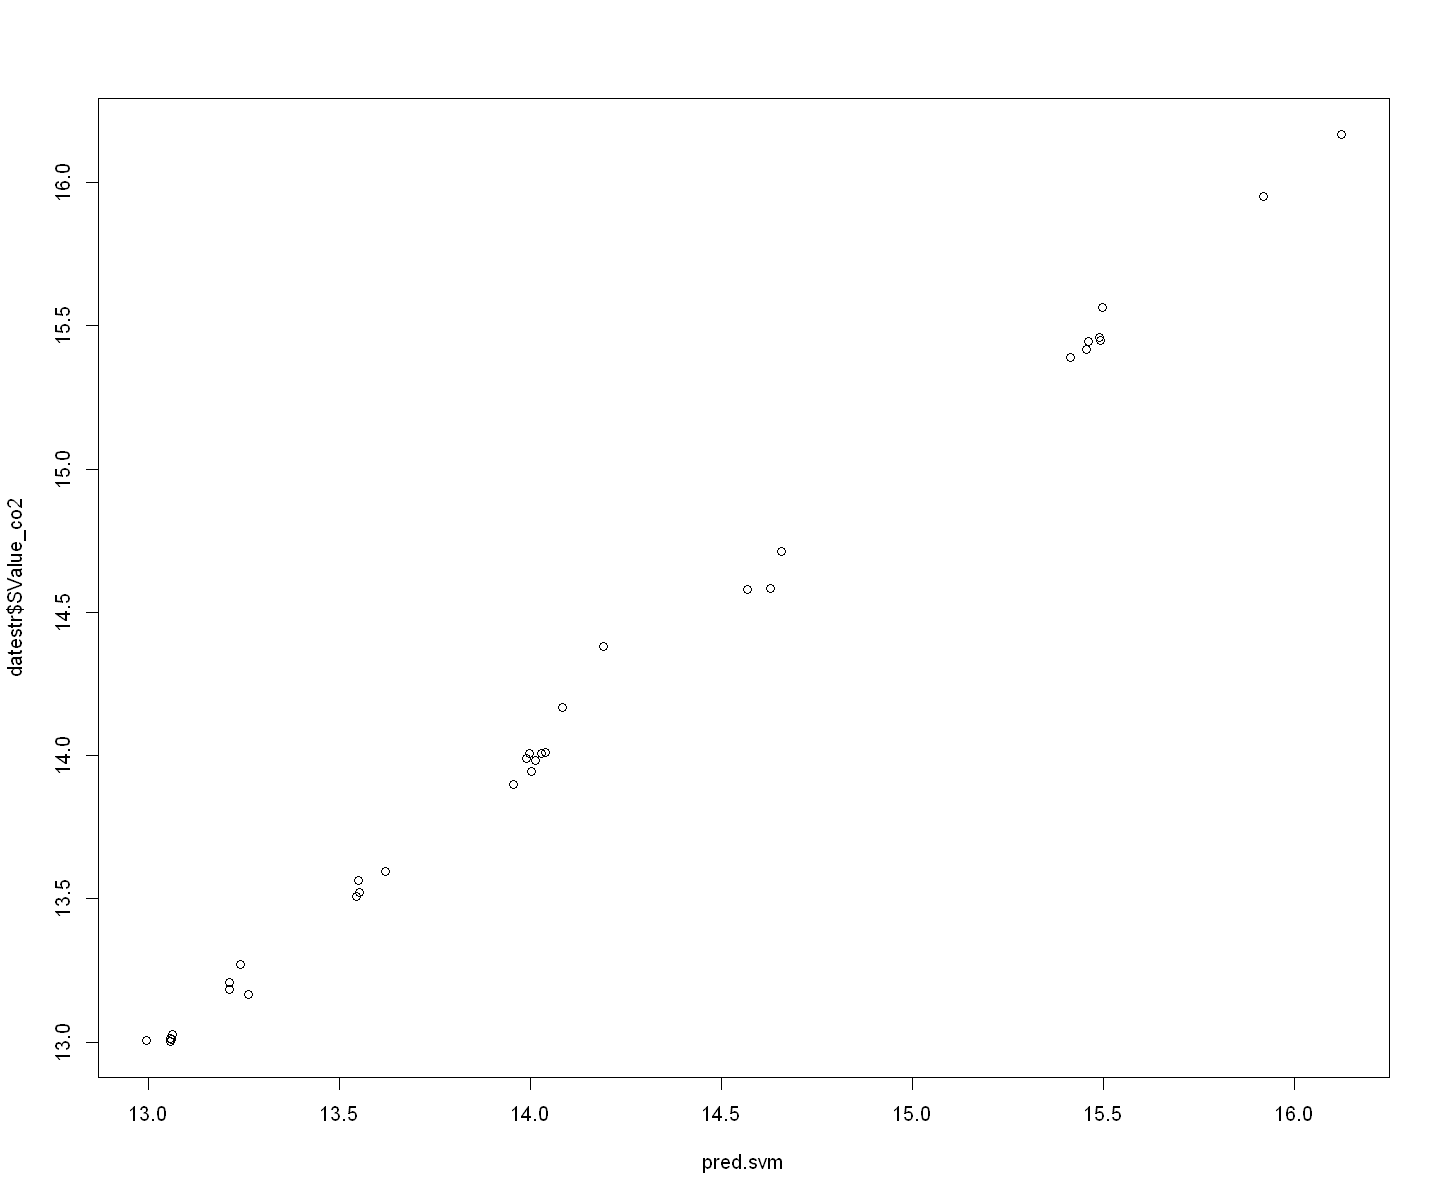

In [153]:
pred.svm=predict(svm.reg,newdata=datestr)
# Erreur quadratique moyenne de prévision
sum((pred.svm-datestr[,"SValue_co2"])^2)/nrow(datestr)
err.svm=pred.svm-datestr[,"SValue_co2"]
gplot.res(pred.svm,err.svm,titre="")
plot(pred.svm,datestr$SValue_co2)

### Arbre

###### Données apprentissage

In [94]:
tree.reg=rpart(SValue_co2~.,data=datappr,control=rpart.control(cp=0.001))

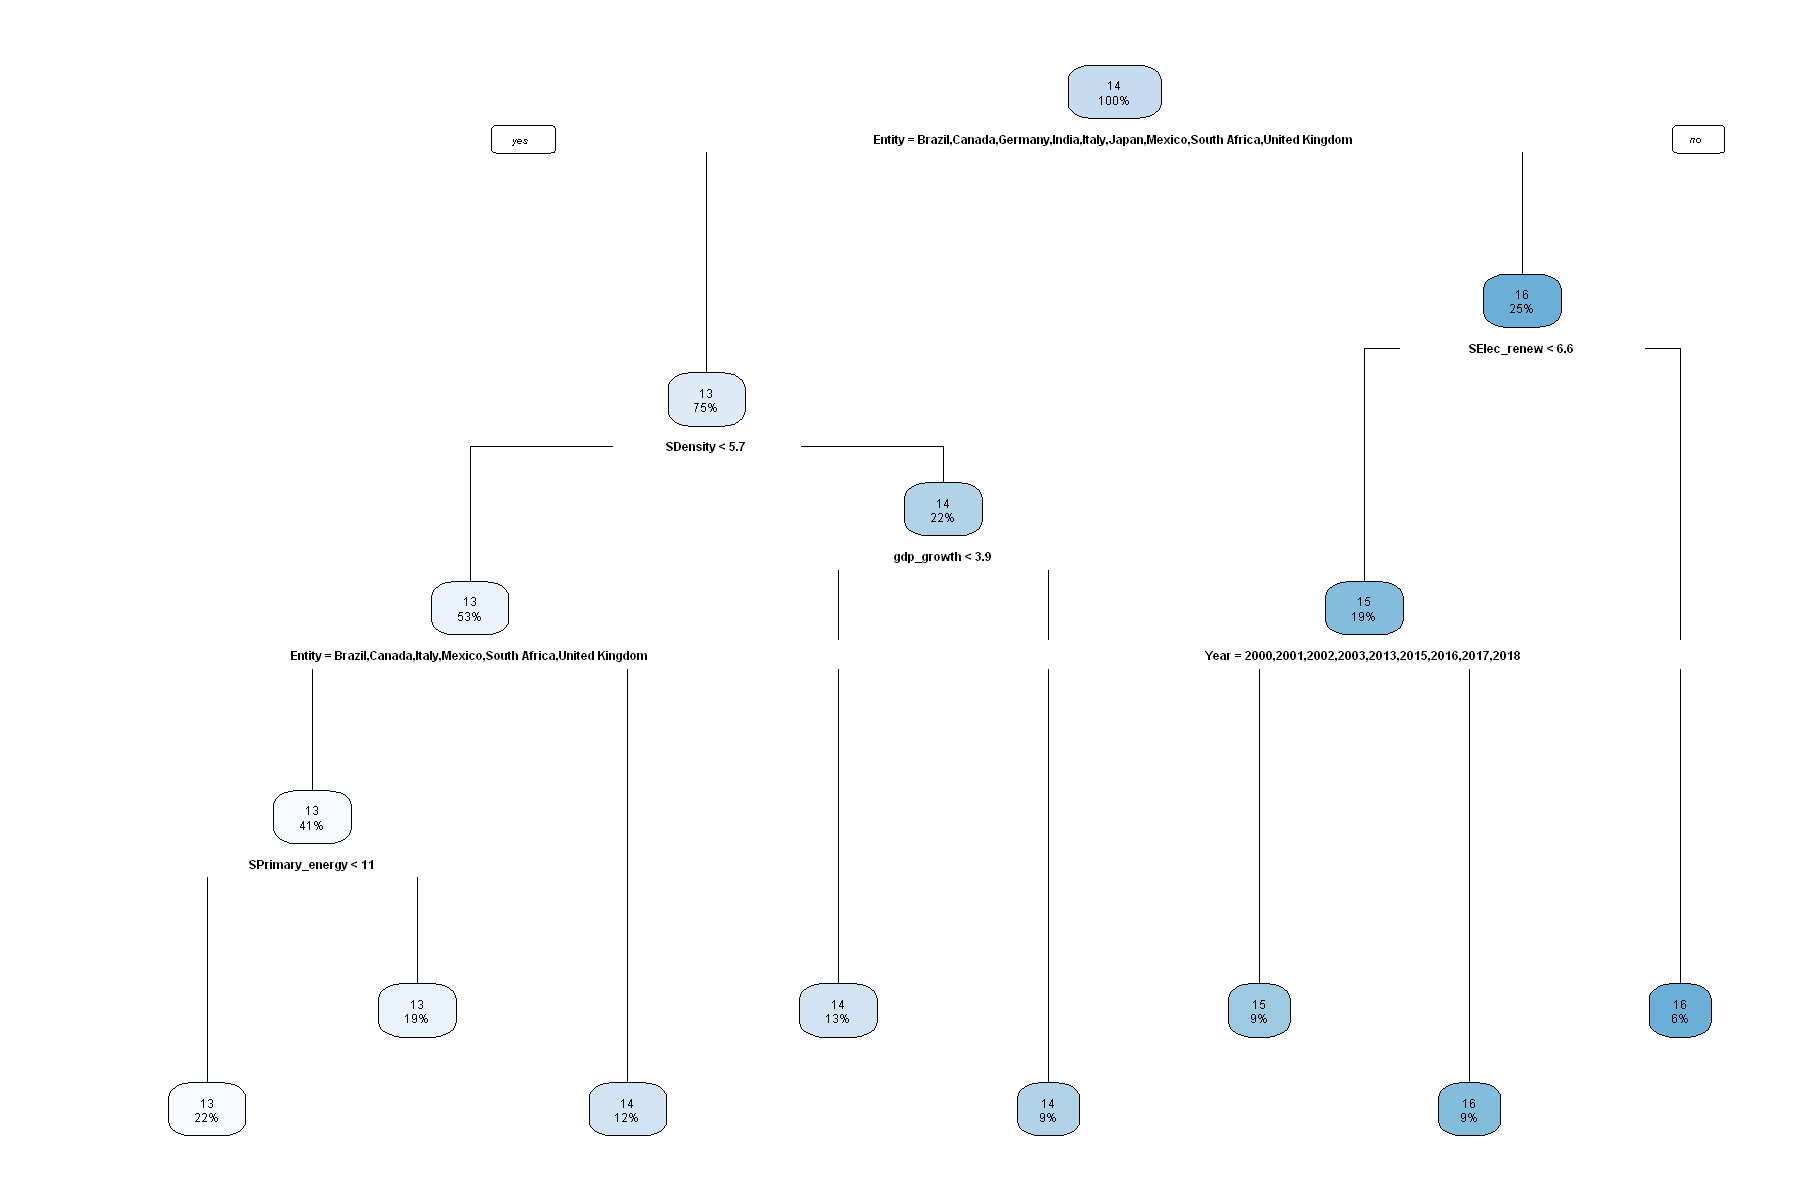

In [95]:
library(rpart.plot)
options(repr.plot.width = 15, repr.plot.height = 10)
rpart.plot(tree.reg)

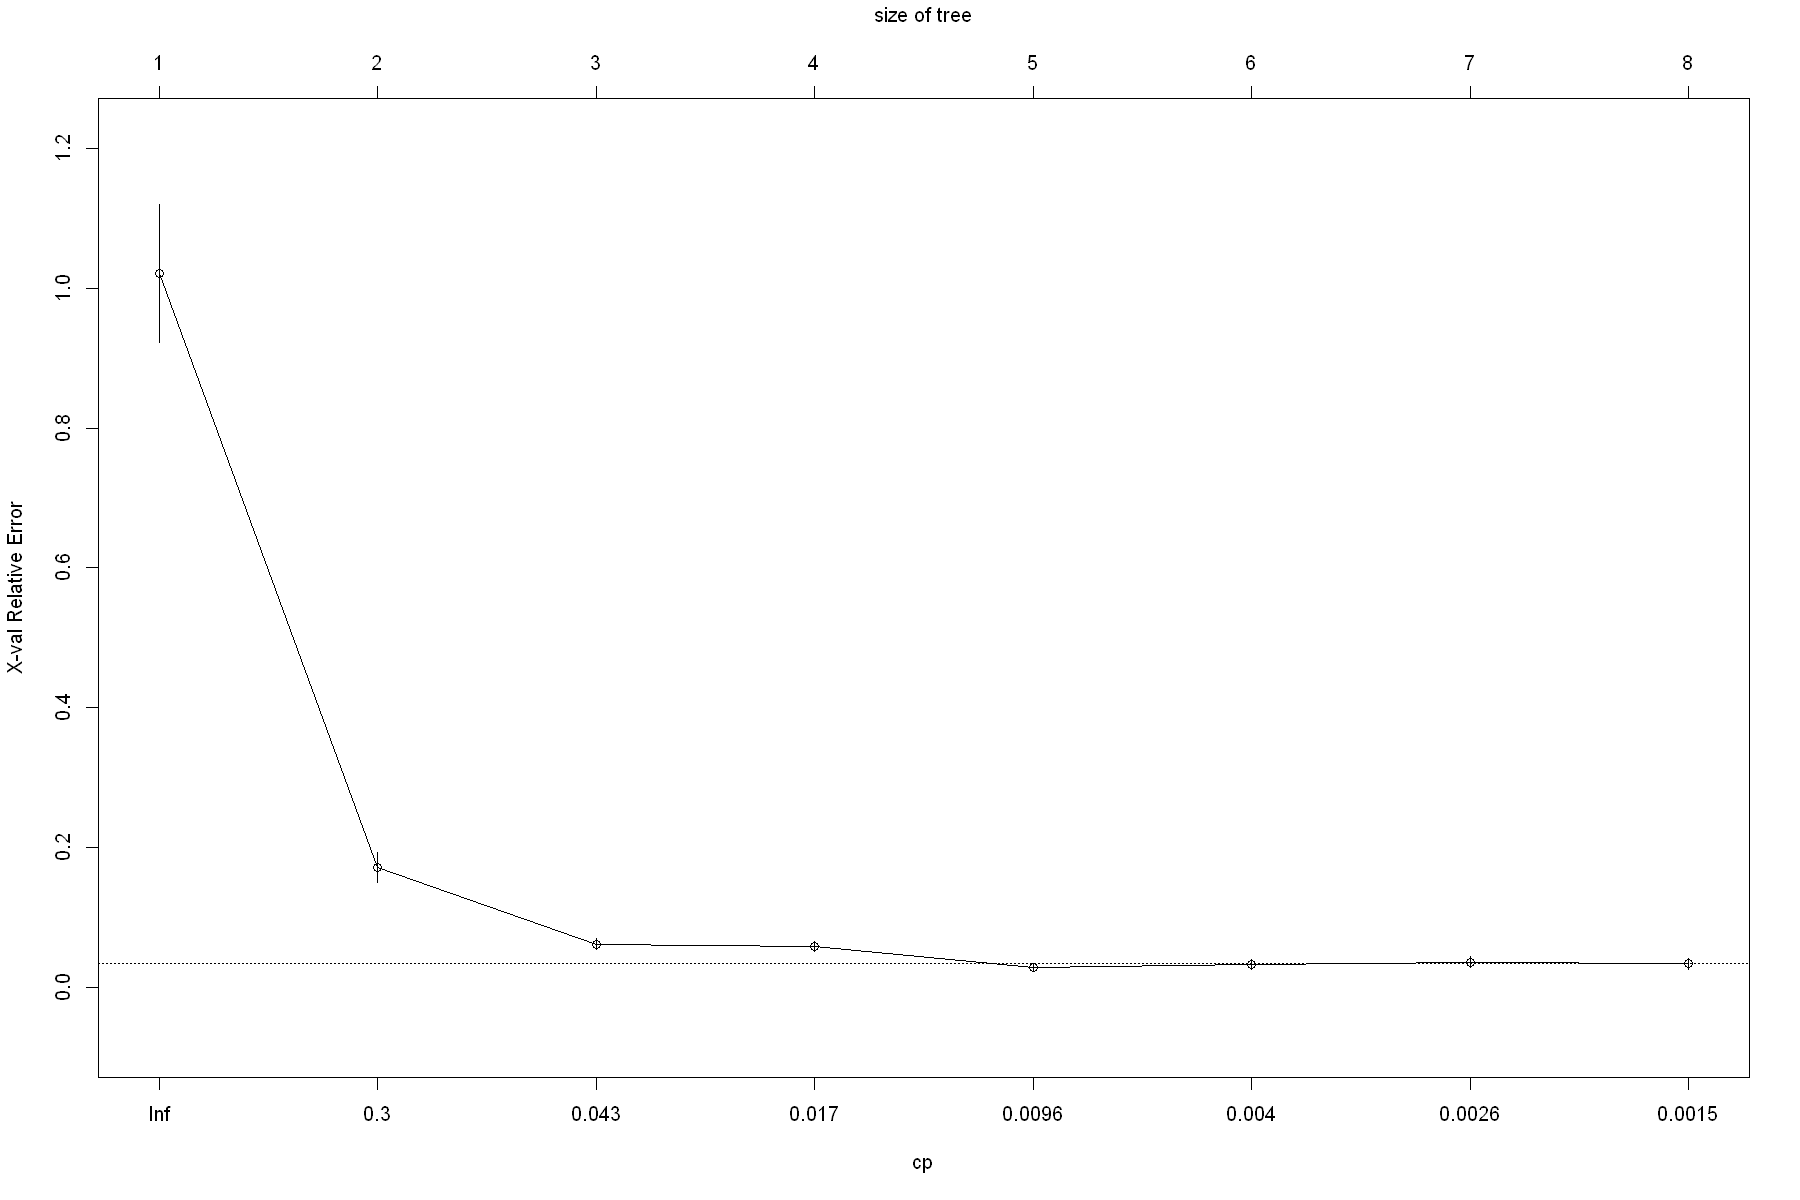

In [96]:
xmat<-xpred.rpart(tree.reg,xval=10) 
# one row for each observation and one column for each complexity value

# Cross-validation error par valeur de CP
CVerr<-apply((xmat-datappr[,"SValue_co2"])^2,2,sum)

plotcp(tree.reg)

[1] 0.009589525

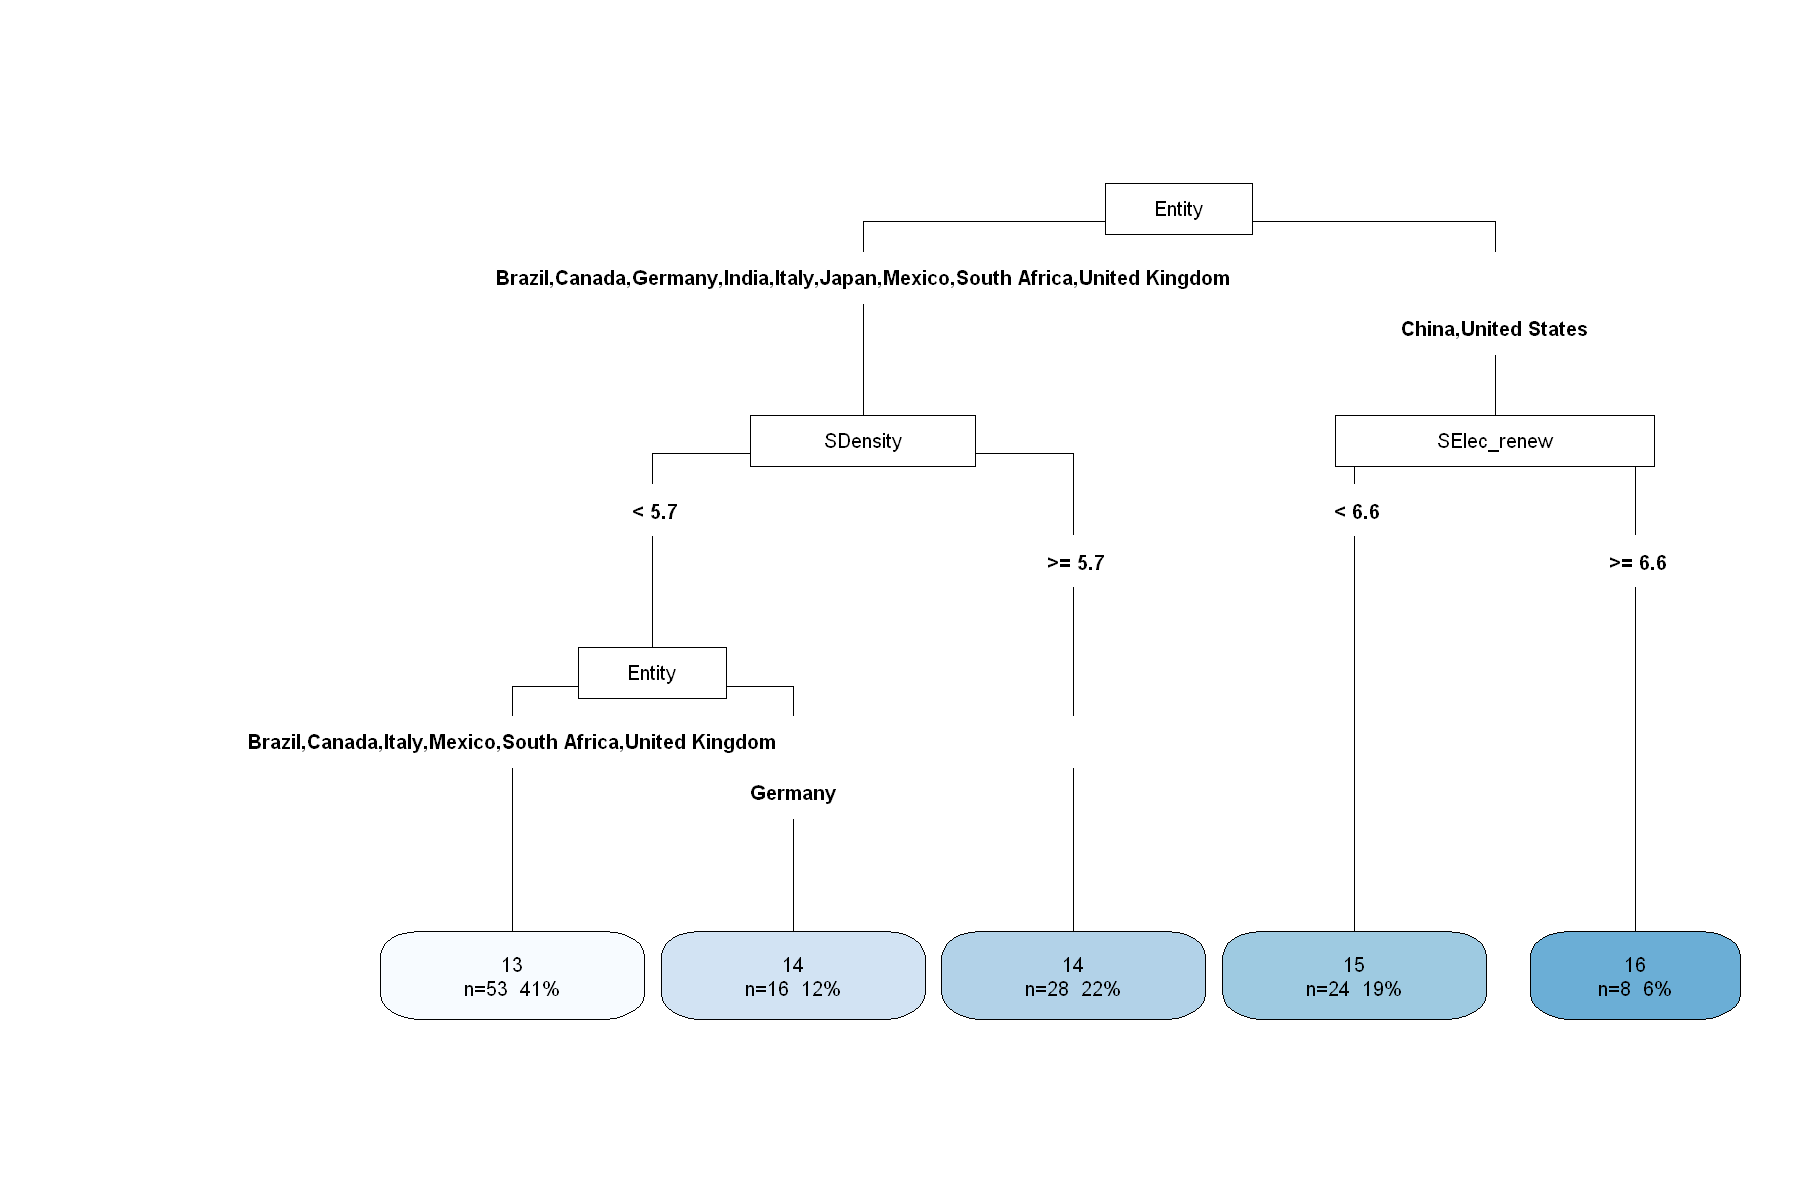

In [97]:
as.numeric(attributes(which.min(CVerr))$names)
tree.reg=rpart(SValue_co2~.,data=datappr,control=rpart.control(cp=as.numeric(attributes(which.min(CVerr))$names)))
rpart.plot(tree.reg,type=5,extra=101)

Le chargement a nécessité le package : grid

Le chargement a nécessité le package : libcoin

Le chargement a nécessité le package : mvtnorm



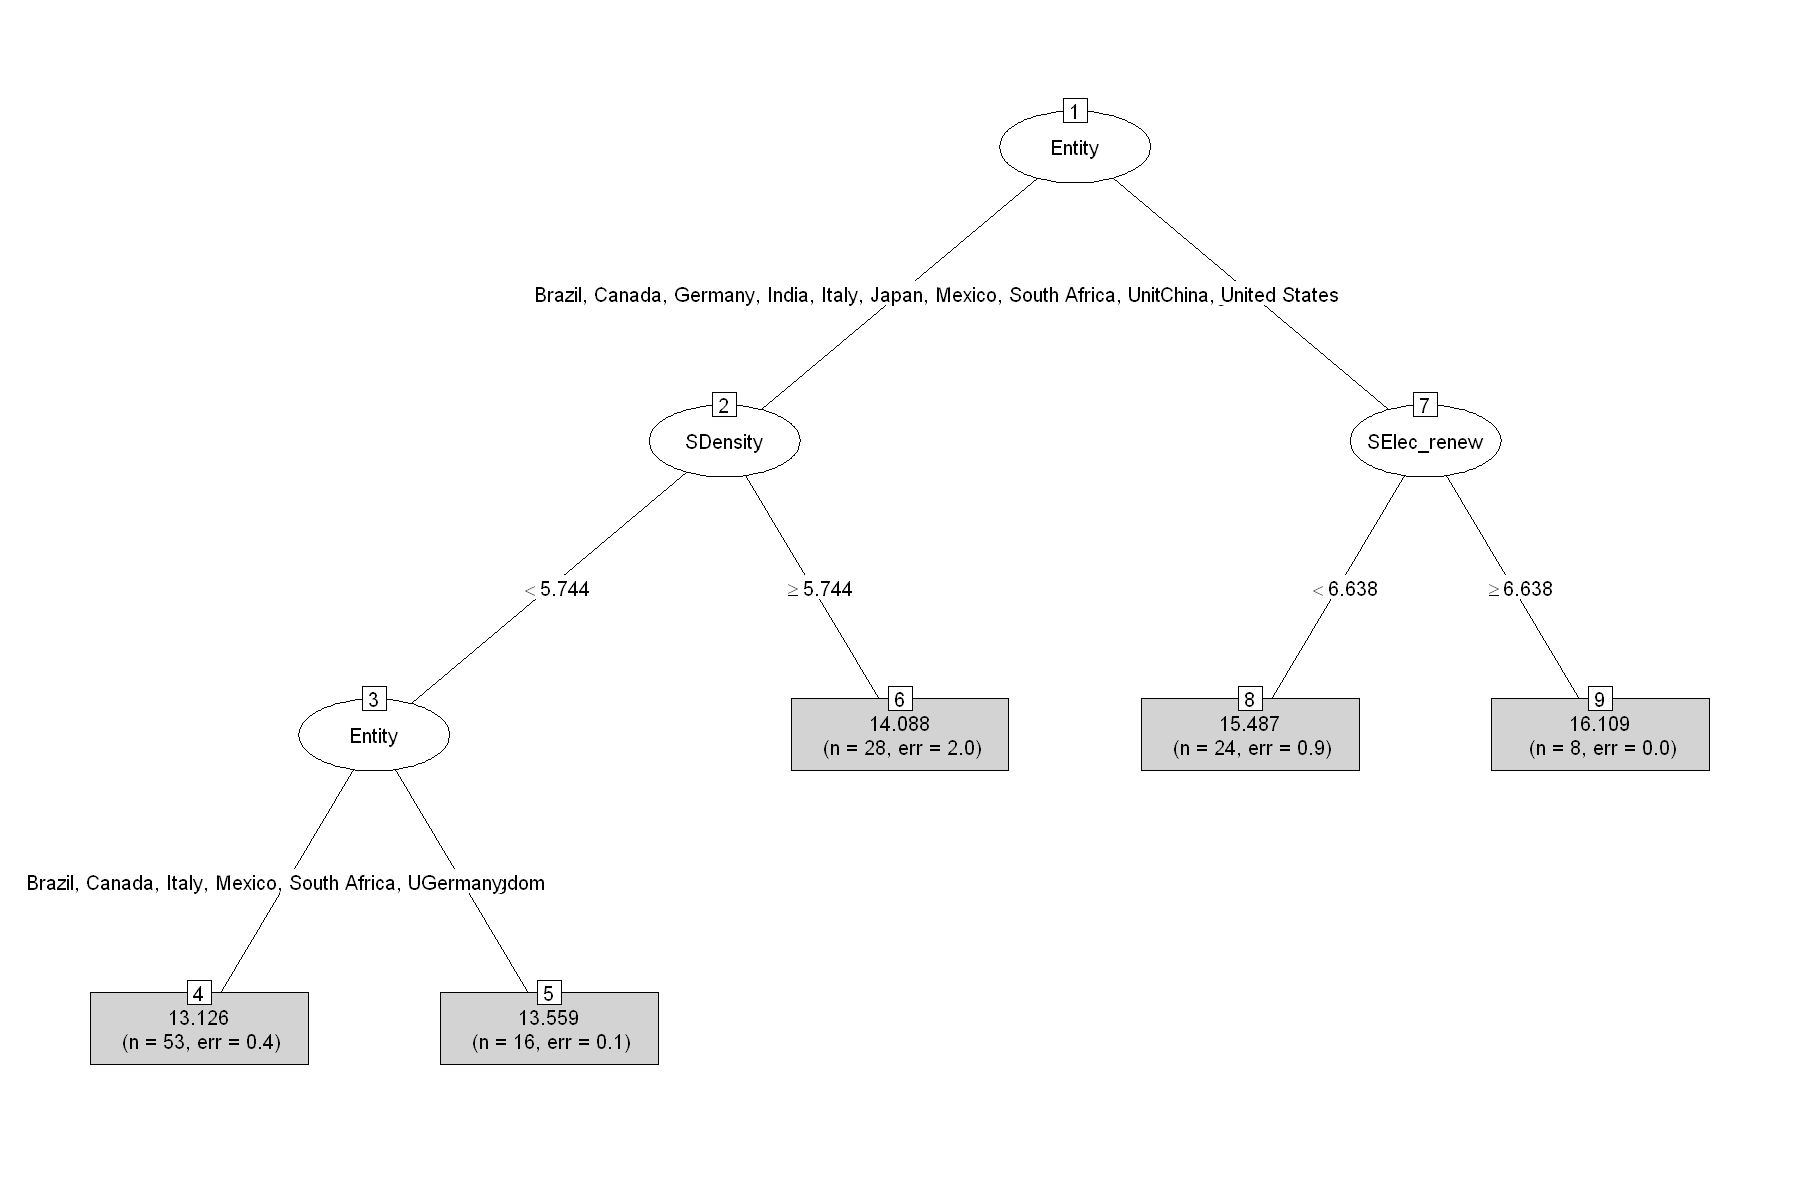

In [98]:
library(partykit)
plot(as.party(tree.reg), type="simple")

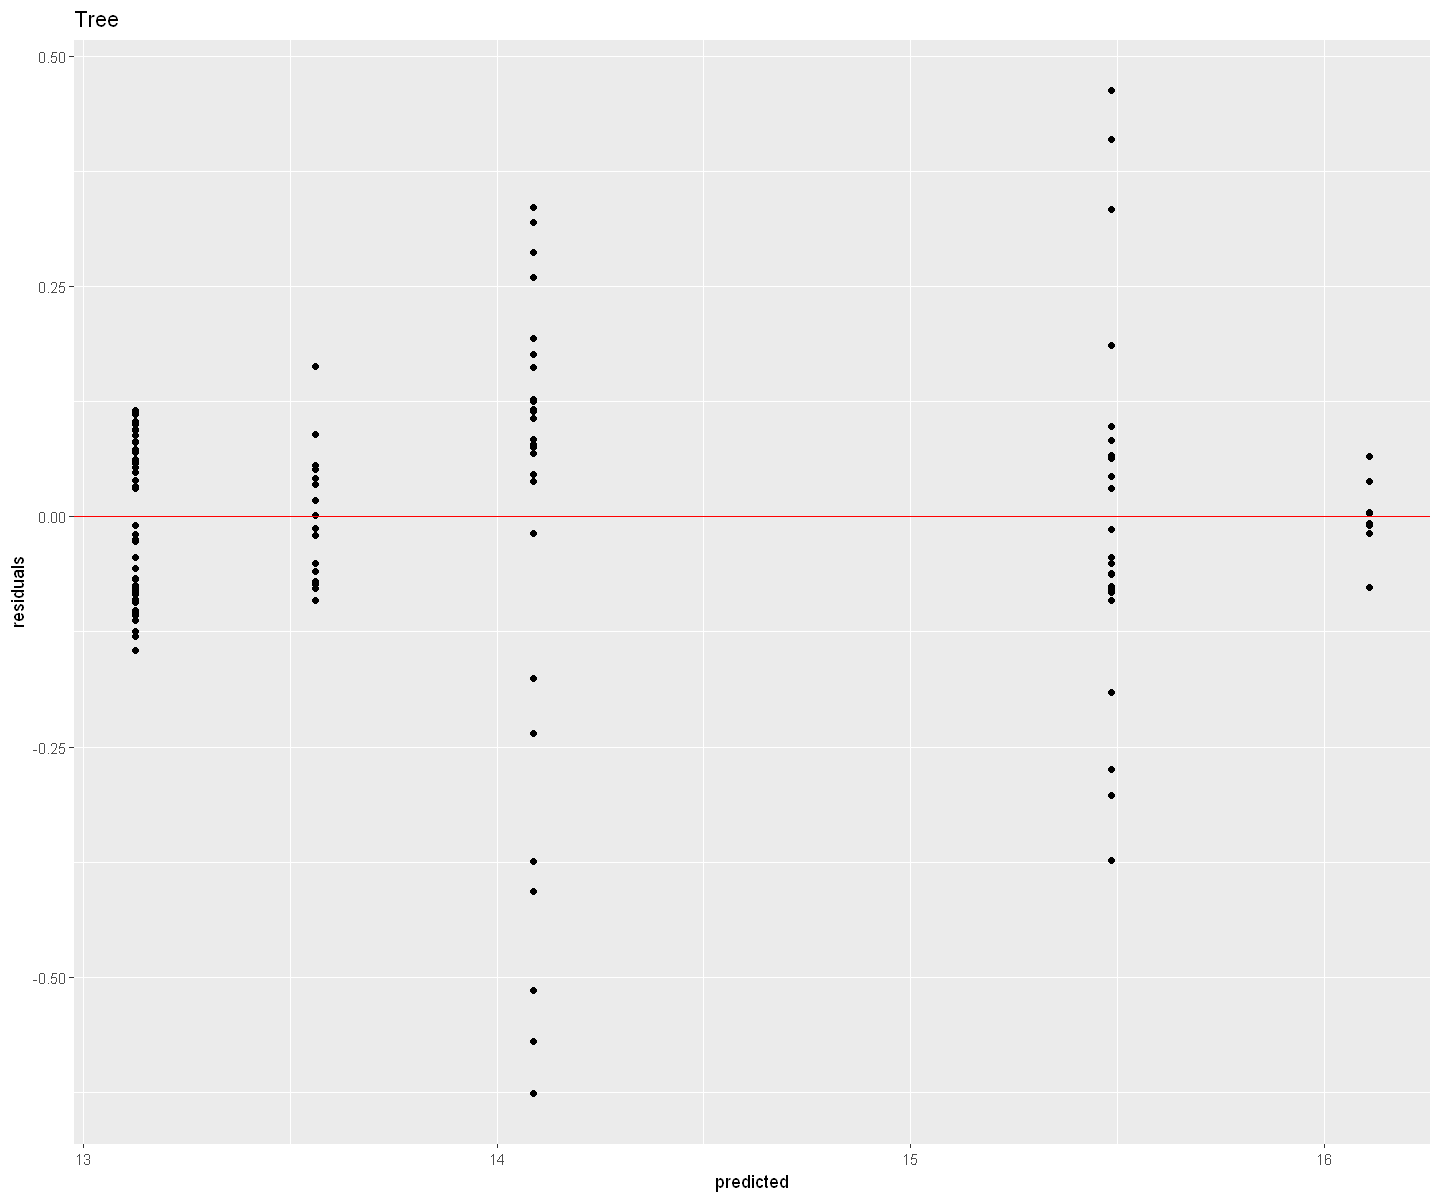

In [99]:
fit.tree=predict(tree.reg)
res.tree=fit.tree-datappr[,"SValue_co2"]

options(repr.plot.width = 12, repr.plot.height = 10)
par(mfrow = c(1, 3))
ggplot(data.frame(residuals = res.tree, predicted = fit.tree), aes(x = predicted, y = residuals)) +
  geom_point() +
  geom_hline(yintercept = 0 ,color = "red") +
  ggtitle("Tree")

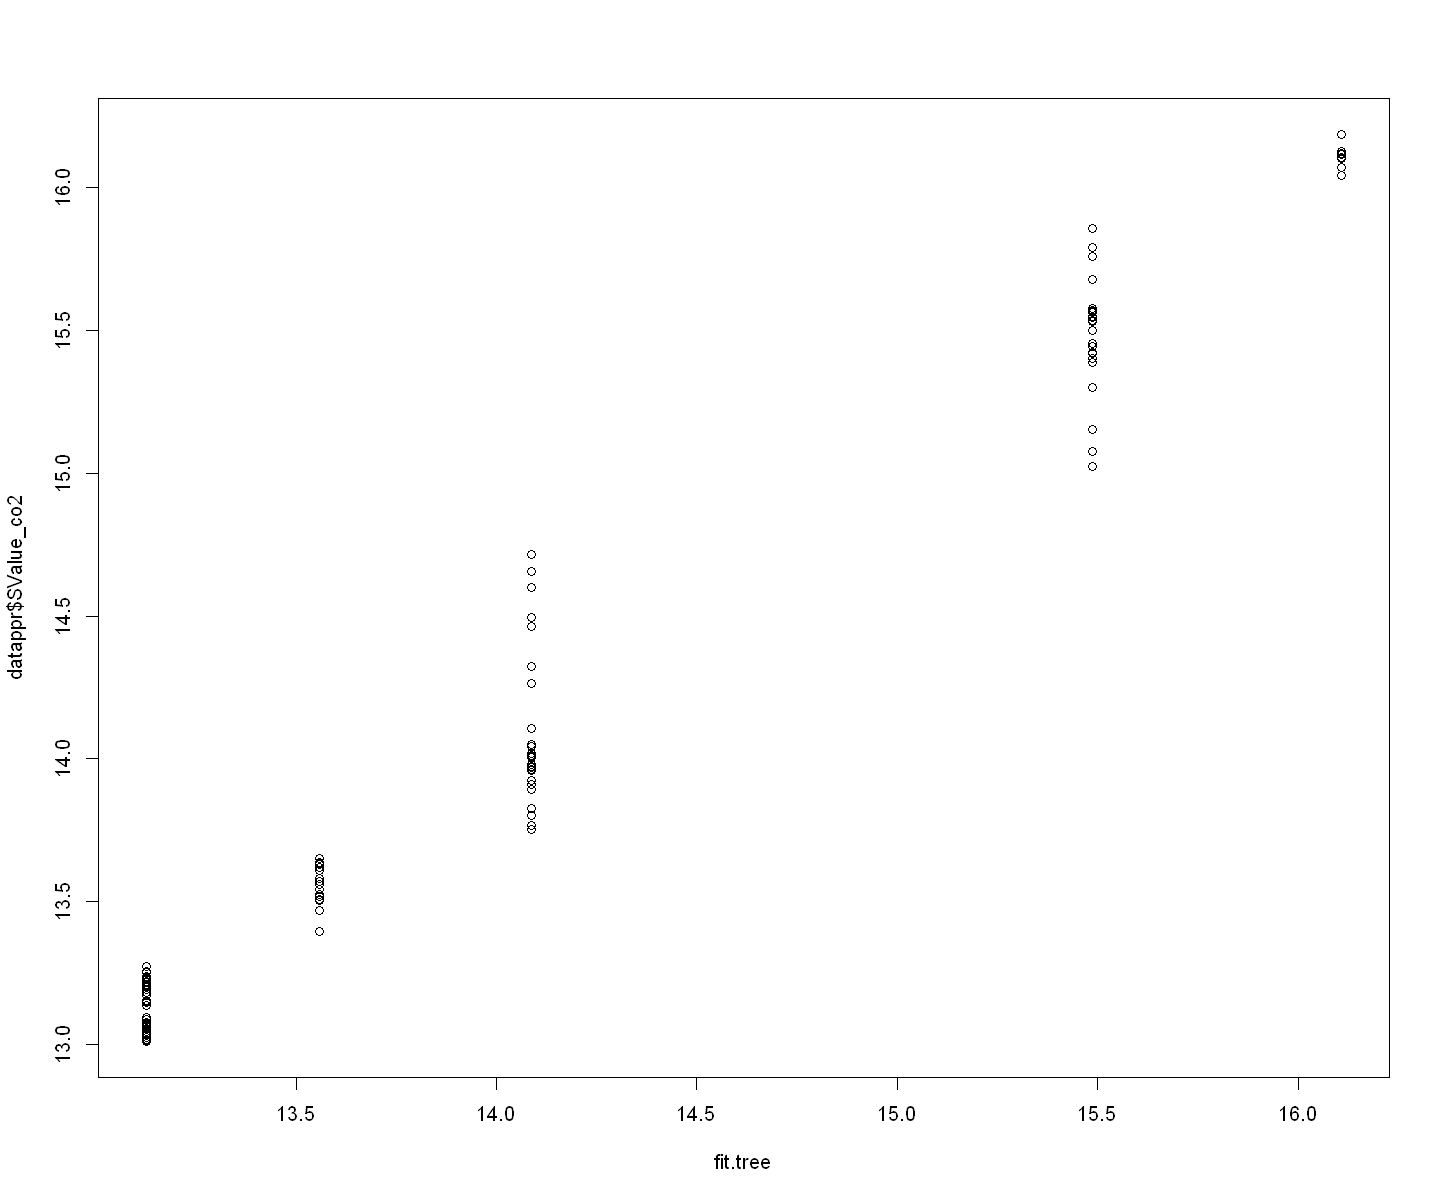

In [100]:
plot(fit.tree,datappr$SValue_co2)

###### MSE et R2

In [101]:
MSE_a = mean((datappr$SValue_co2 - fit.tree)^2)
paste("MSE =", MSE_a)

# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2 - fit.tree)^2)
SS_Total <- sum((datappr$SValue_co2 - mean(datappr$SValue_co2))^2)
R2_a <- 1 - (SS_Residual / SS_Total)
paste("R2 =", R2_a)

[1] "MSE = 0.0258857468657686"

[1] "R2 = 0.975401281766988"

###### Données tests

[1] 0.03709784

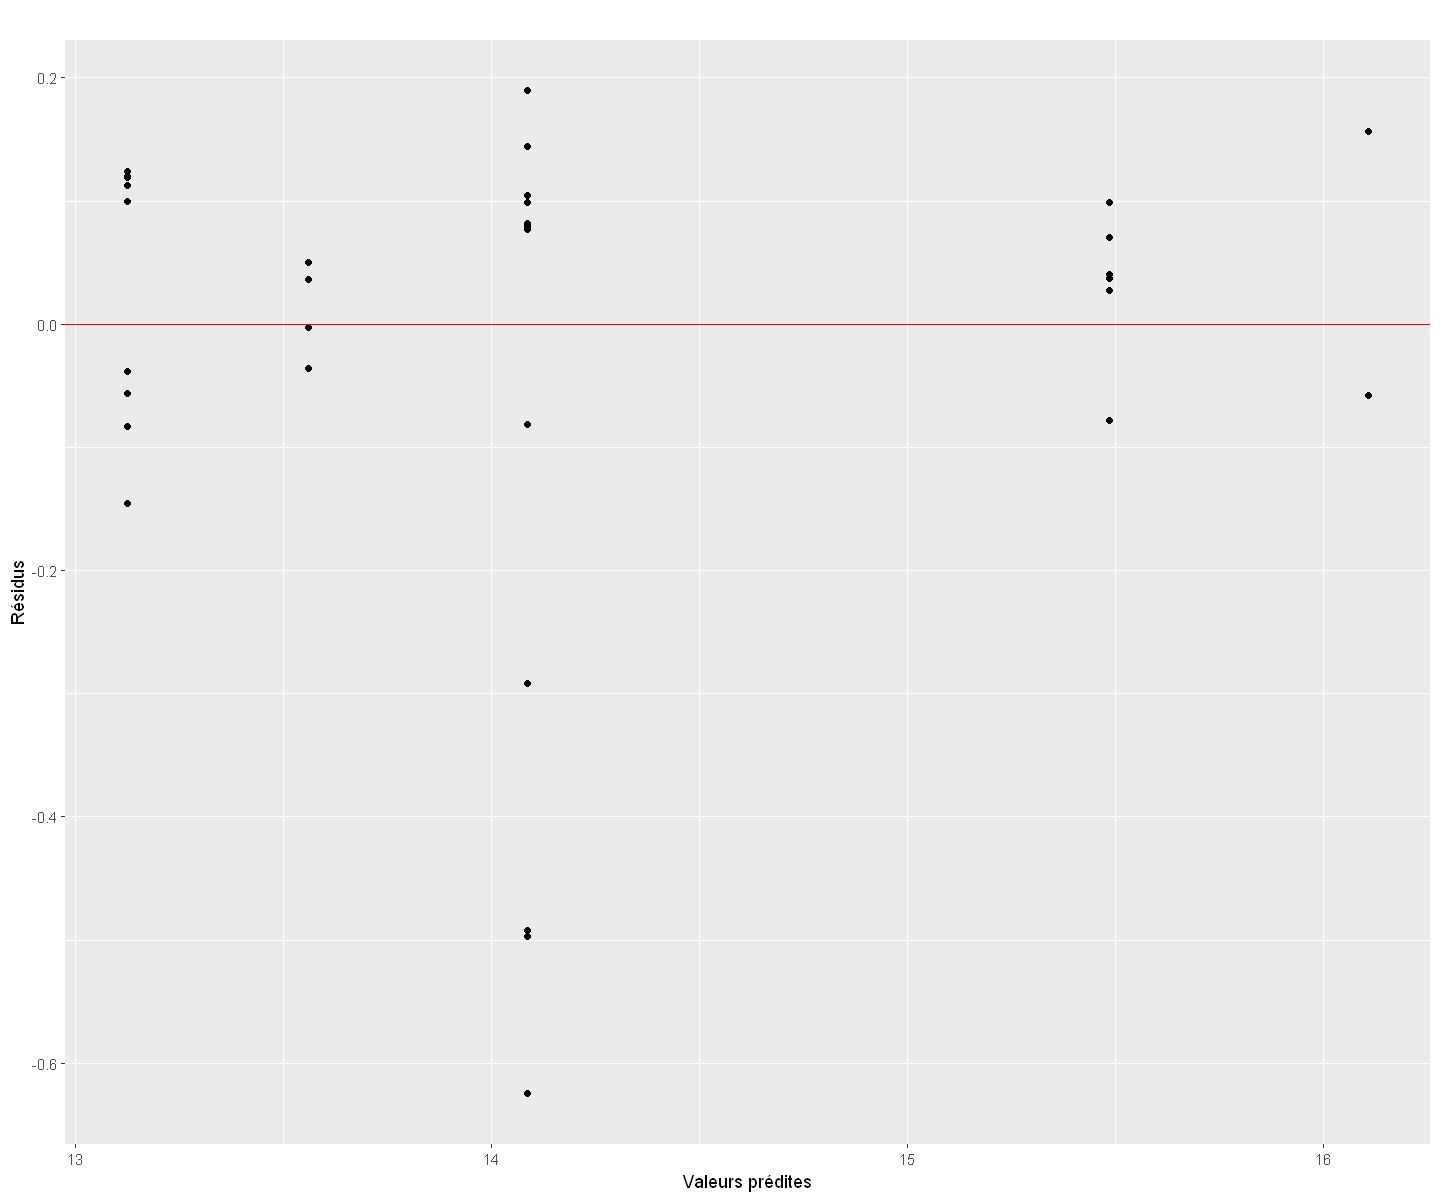

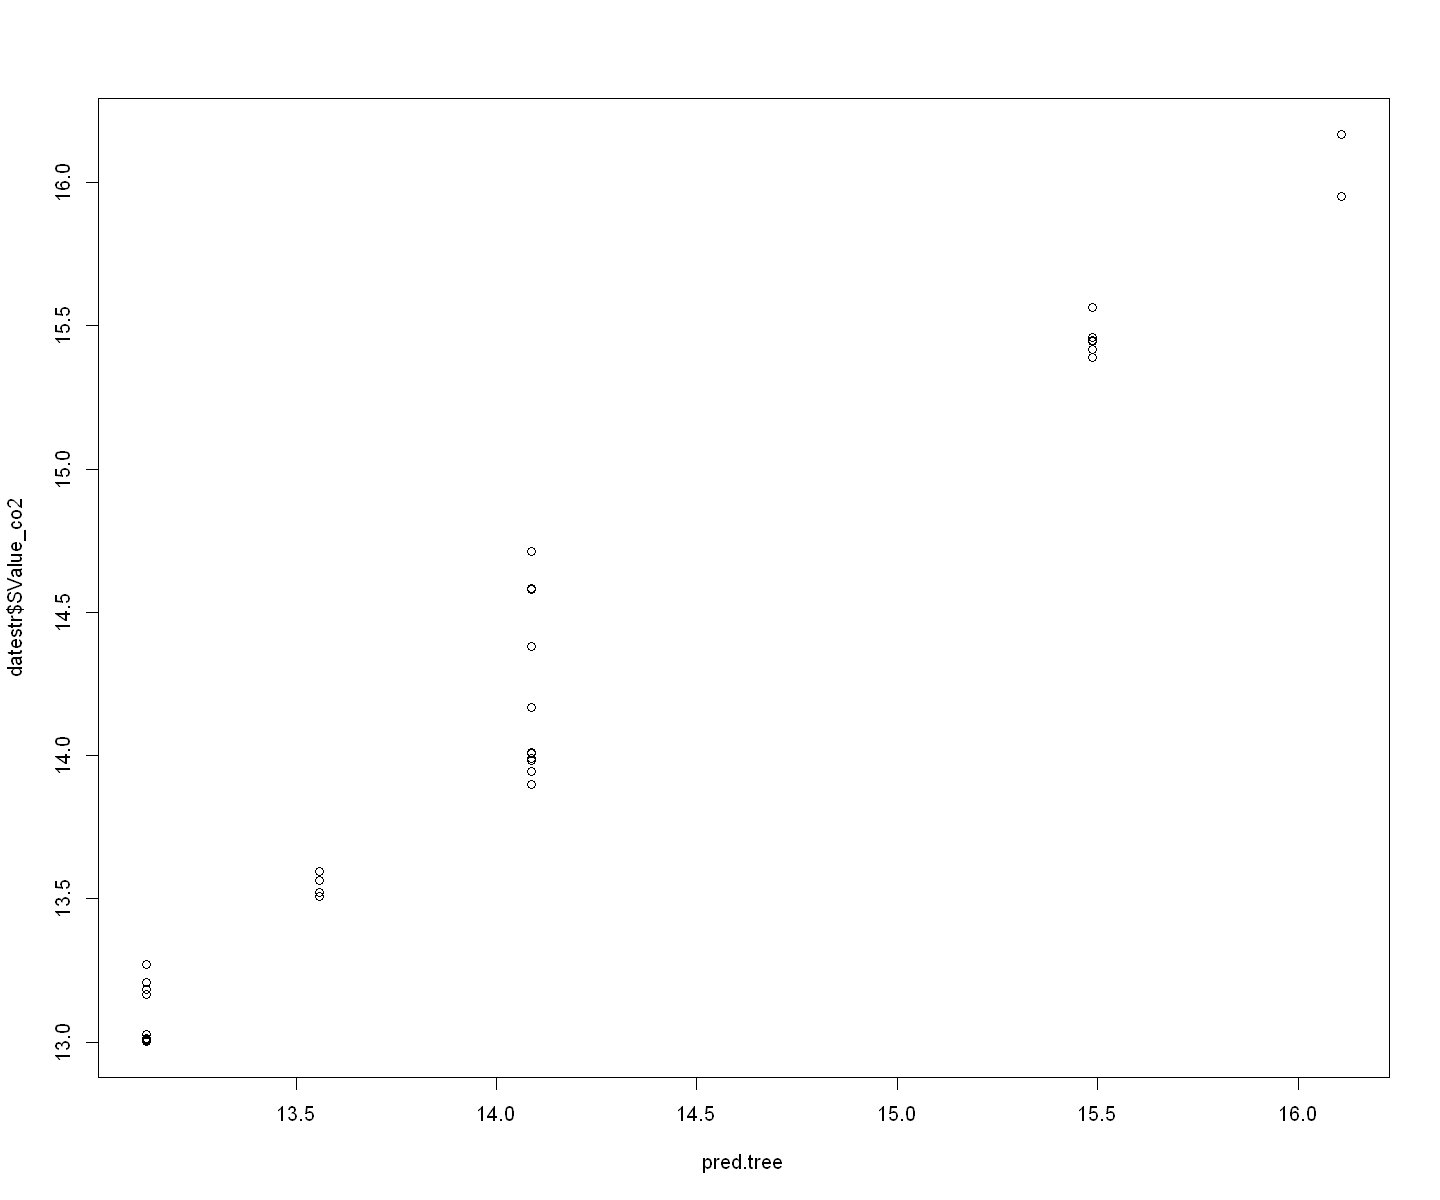

In [152]:
pred.tree=predict(tree.reg,newdata=datestr)
# Erreur quadratique moyenne de prévision
sum((pred.tree-datestr[,"SValue_co2"])^2)/nrow(datestr)
err.tree=pred.tree-datestr[,"SValue_co2"]
gplot.res(pred.tree,err.tree,titre="")
plot(pred.tree,datestr$SValue_co2)

### Random Forest

###### Données apprentissage

In [102]:
temps_debut <- Sys.time()
rf.reg=randomForest(SValue_co2~., data=datappr,xtest=datestr[,-15],ytest=datestr[,"SValue_co2"],
   ntree=500,do.trace=50,importance=TRUE)
temps_fin <- Sys.time()
temps_rf <- temps_fin - temps_debut
attributes(rf.reg)
rf.reg$mtry

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |  0.01612     1.53 |  0.04285     4.71 |
 100 |  0.01543     1.47 |  0.05114     5.62 |
 150 |  0.01501     1.43 |  0.04829     5.31 |
 200 |   0.0151     1.43 |  0.04733     5.20 |
 250 |  0.01452     1.38 |  0.04601     5.06 |
 300 |   0.0138     1.31 |  0.04338     4.77 |
 350 |  0.01456     1.38 |  0.04141     4.55 |
 400 |  0.01426     1.36 |  0.04162     4.58 |
 450 |  0.01422     1.35 |  0.04322     4.75 |
 500 |  0.01404     1.33 |  0.04331     4.76 |


$names
 [1] "call"            "type"            "predicted"       "mse"            
 [5] "rsq"             "oob.times"       "importance"      "importanceSD"   
 [9] "localImportance" "proximity"       "ntree"           "mtry"           
[13] "forest"          "coefs"           "y"               "test"           
[17] "inbag"           "terms"          

$class
[1] "randomForest.formula" "randomForest"

[1] 5

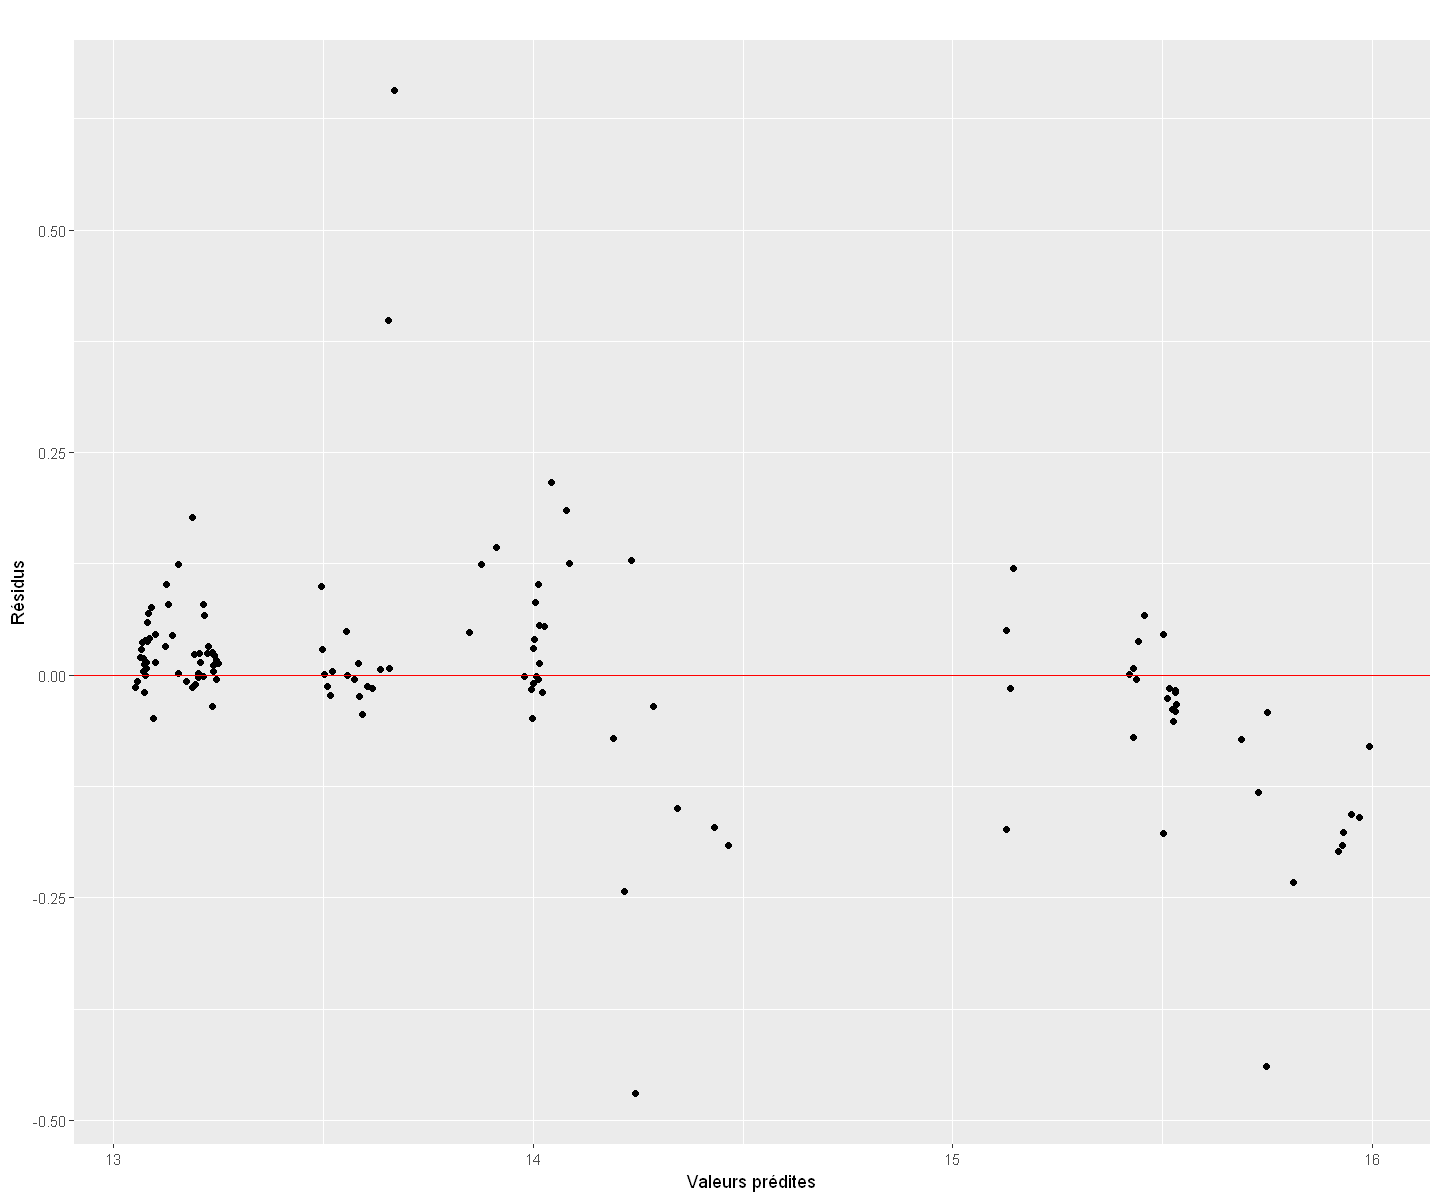

In [113]:
fit.rfr=rf.reg$predicted
res.rfr=fit.rfr-datappr[,"SValue_co2"]
gplot.res(fit.rfr,res.rfr,titre="")

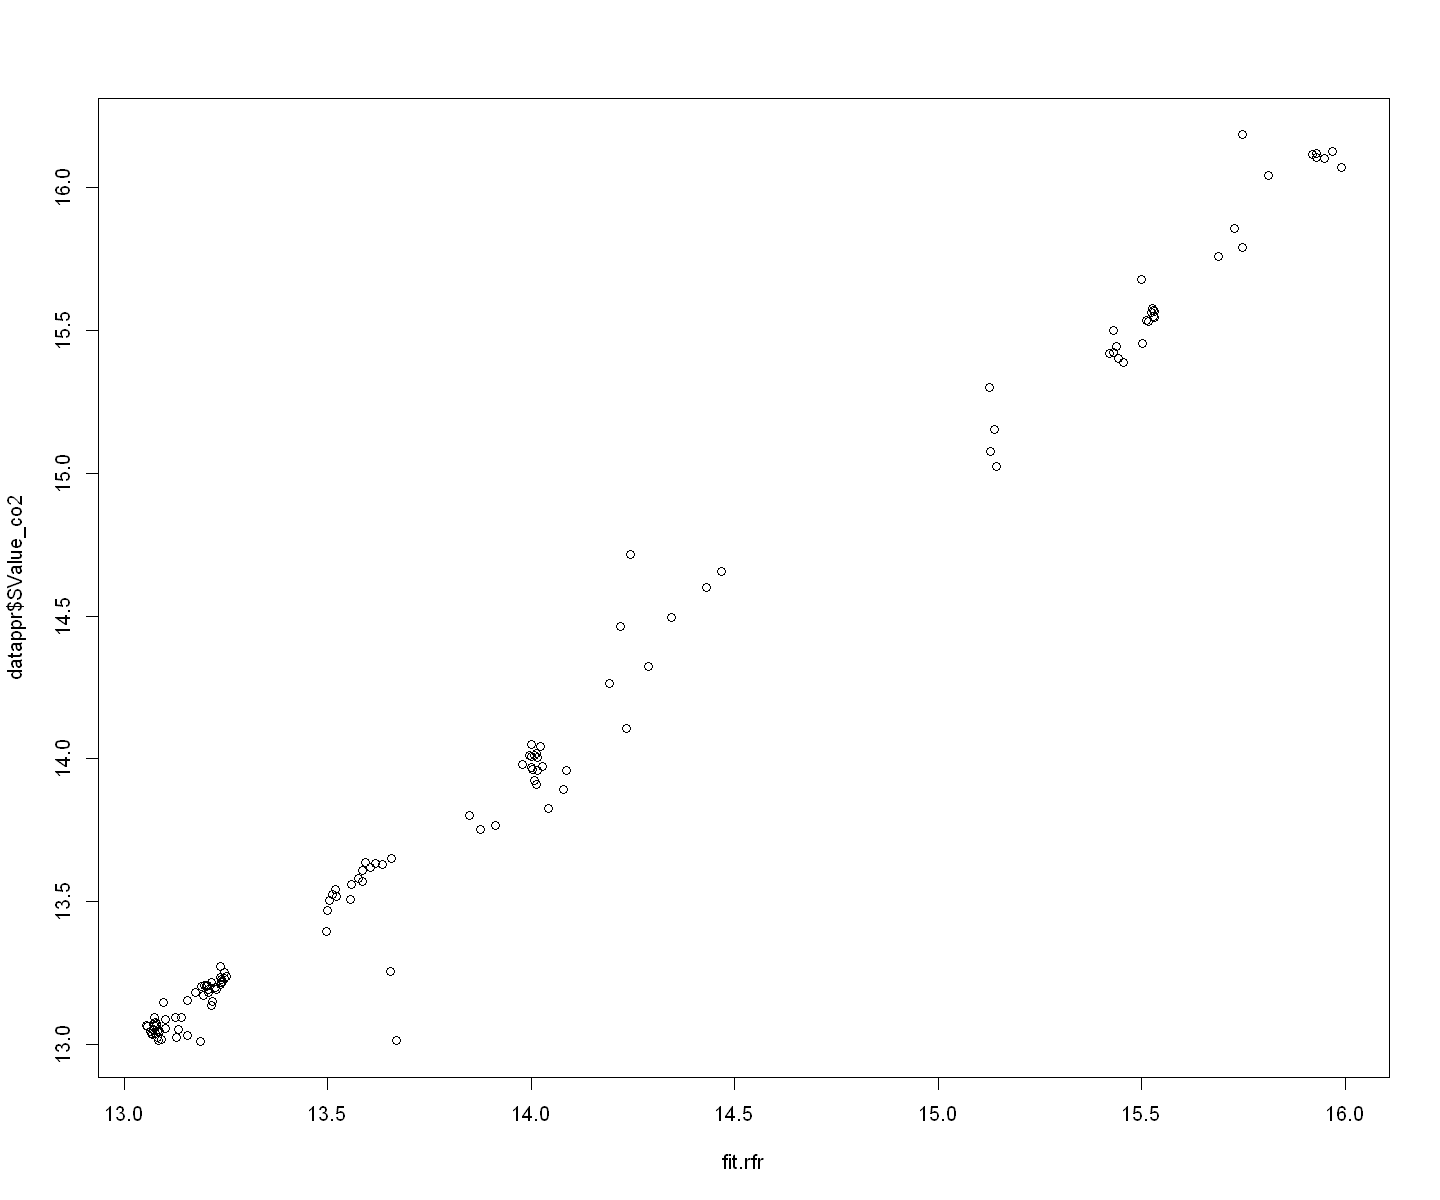

In [104]:
plot(fit.rfr,datappr$SValue_co2)

###### MSE et R2

In [105]:
MSE_rf = mean((datappr$SValue_co2 - fit.rfr)^2)
paste("MSE =", MSE_rf)

# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2 - fit.rfr)^2)
SS_Total <- sum((datappr$SValue_co2 - mean(datappr$SValue_co2))^2)
R2_rf <- 1 - (SS_Residual / SS_Total)
paste("R2 =", R2_rf)

[1] "MSE = 0.0140399827589314"

[1] "R2 = 0.986658079379583"

###### Données tests

In [151]:
pred.rf=predict(rf.reg,newdata=datestr)
# Erreur quadratique moyenne de prévision
sum((pred.rf-datestr[,"SValue_co2"])^2)/nrow(datestr)
err.rf=pred.rf-datestr[,"SValue_co2"]
gplot.res(pred.rf,err.rf,titre="")
plot(pred.rf,datestr$SValue_co2)

ERROR: Error in predict.randomForest(rf.reg, newdata = datestr): No forest component in the object


### Boosting

###### Données apprentissage

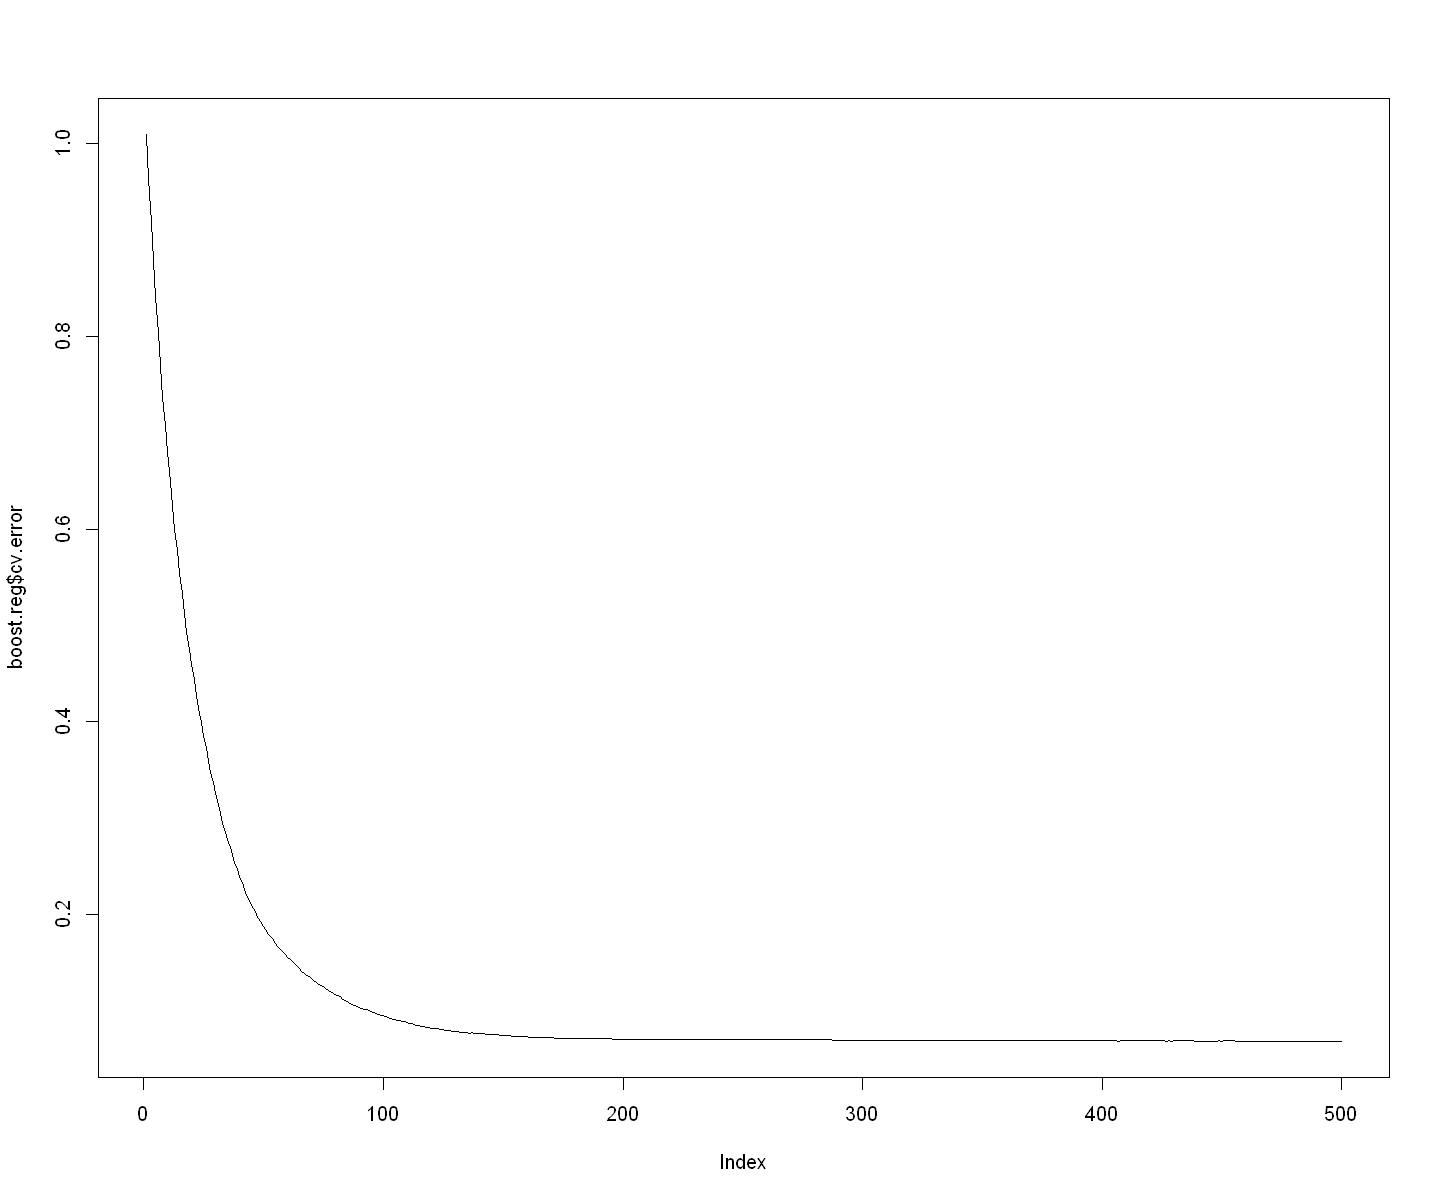

In [109]:
boost.reg = gbm(SValue_co2 ~ ., data = datappr, distribution = "gaussian", n.trees = 500, 
    cv.folds = 10, n.minobsinnode = 5, shrinkage = 0.03, verbose = FALSE)
# fixer verbose à FALSE pour éviter trop de sorties
plot(boost.reg$cv.error, type = "l")

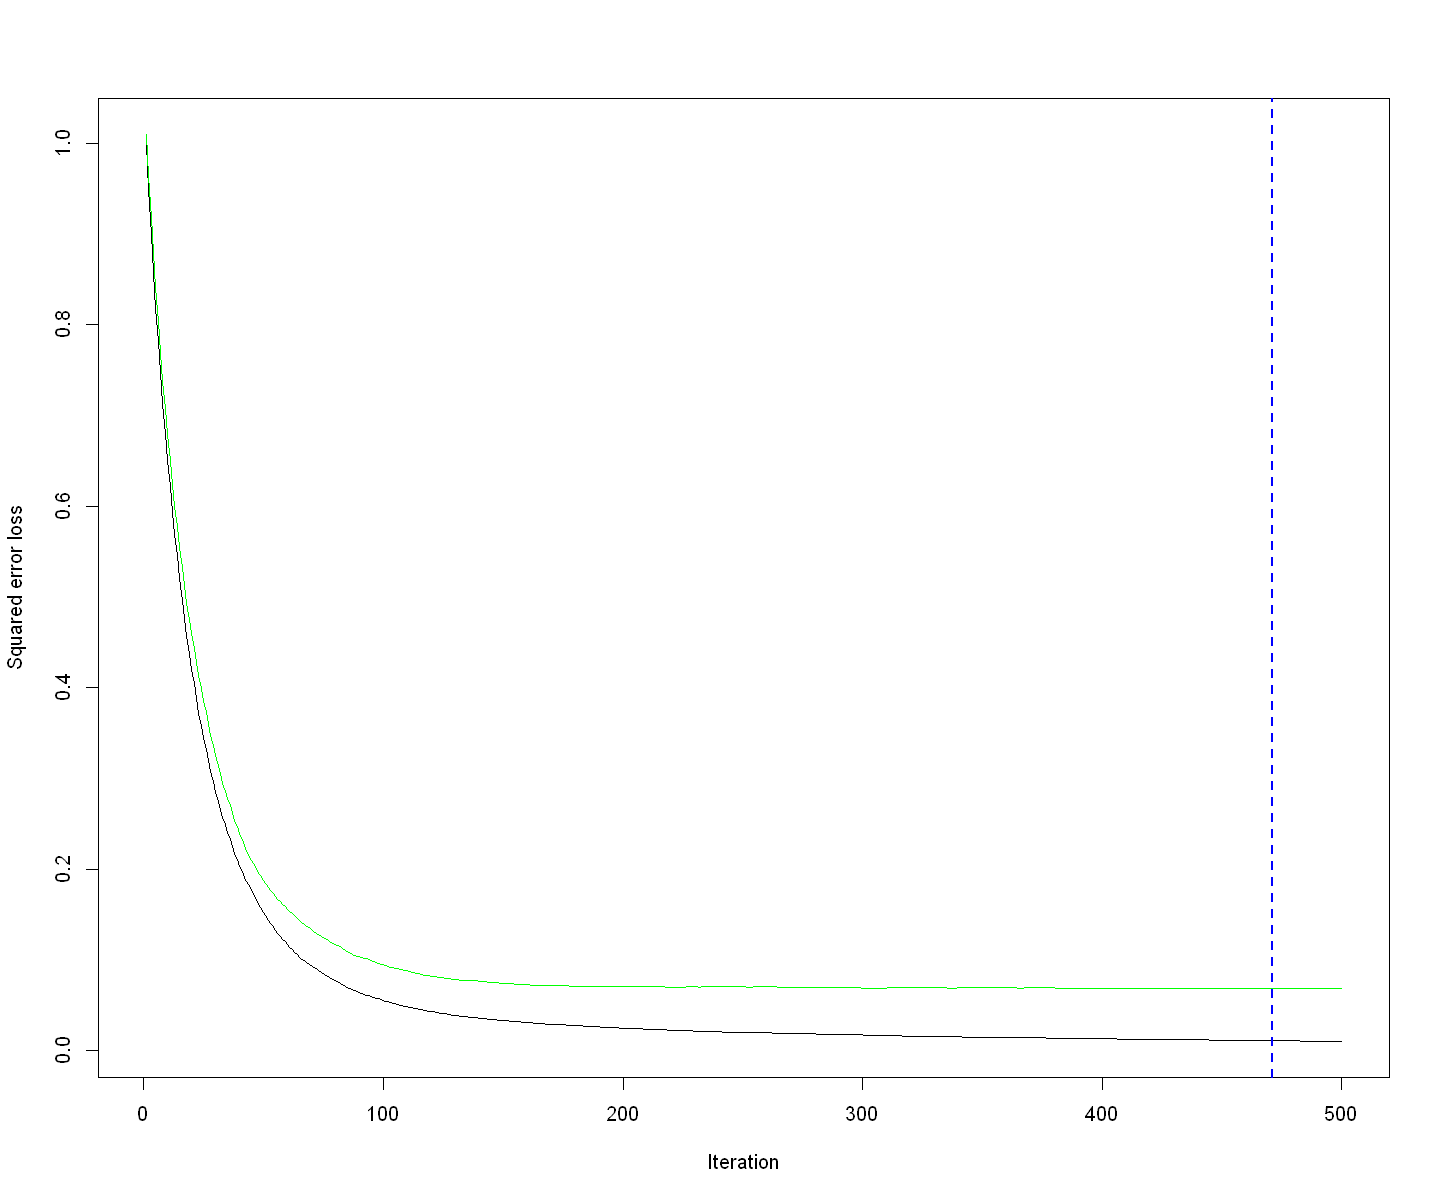

In [110]:
best.iter=gbm.perf(boost.reg,method="cv")

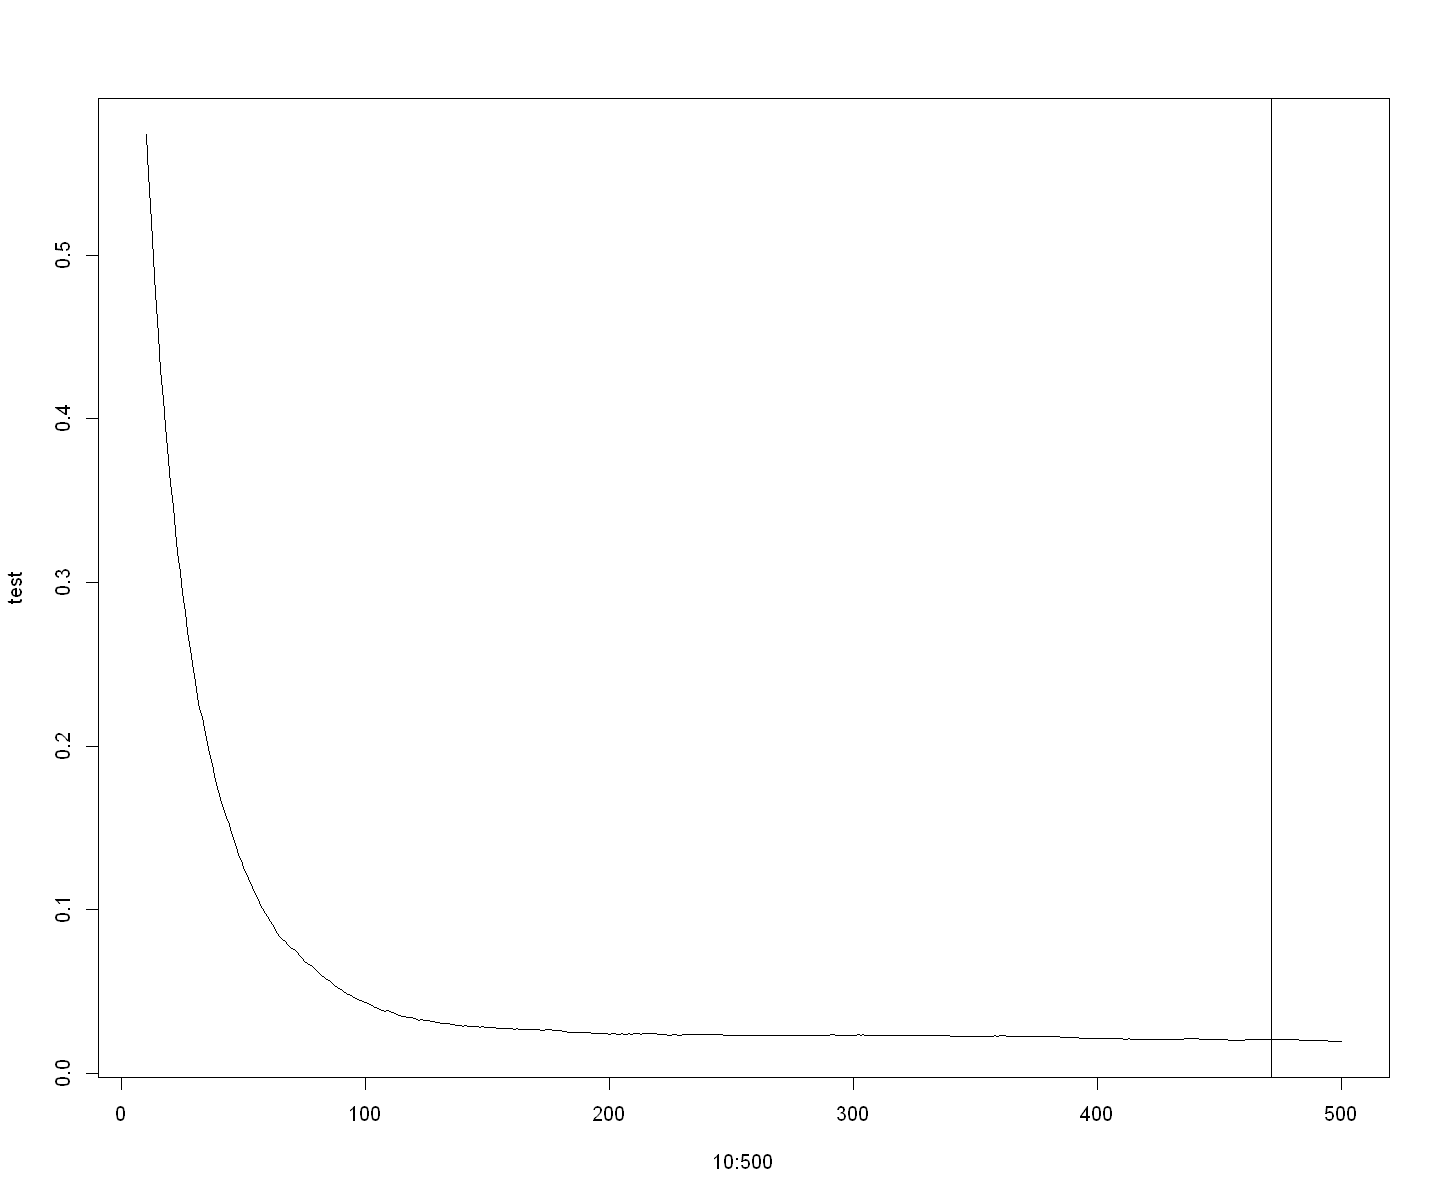

In [111]:
test=numeric()
for (i in 10:500){
pred.test=predict(boost.reg,newdata=datestr,n.trees=i)
err=sum((pred.test-datestr[,"SValue_co2"])^2)/nrow(datestr)
test=c(test,err)}
plot(10:500,test,type="l")
abline(v=best.iter)

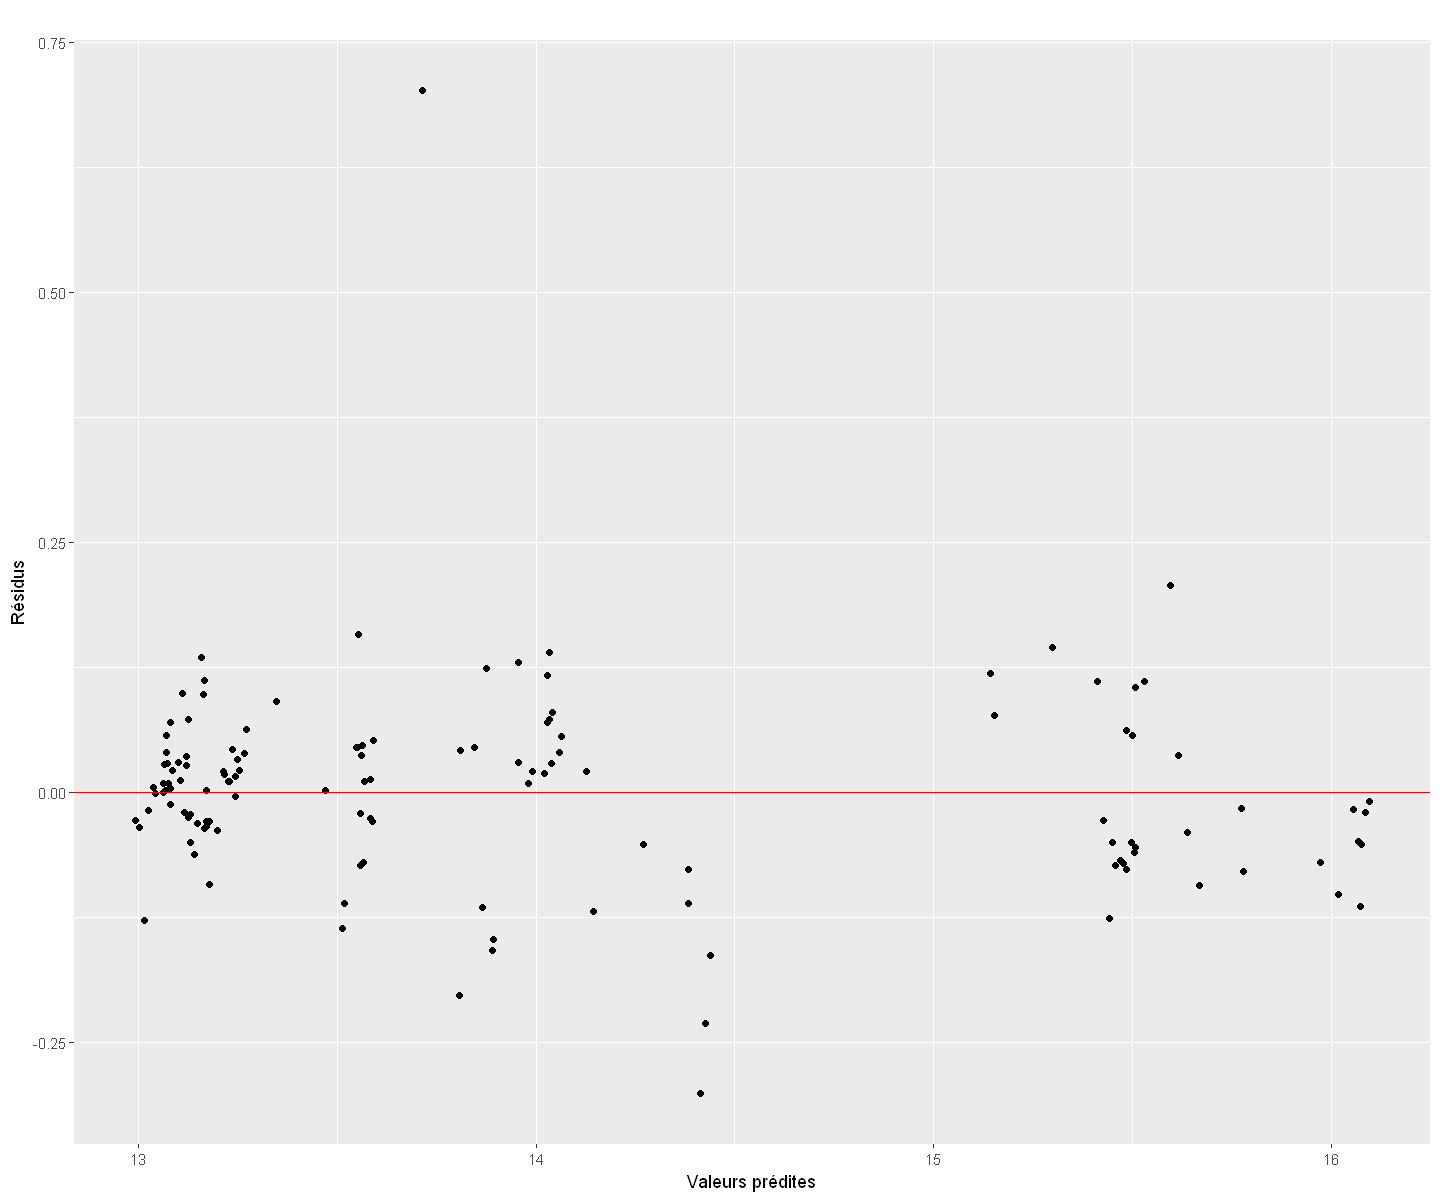

In [115]:
fit.boo=boost.reg$fit
res.boo=fit.boo-datappr[,"SValue_co2"]
gplot.res(fit.boo,res.boo,titre="")

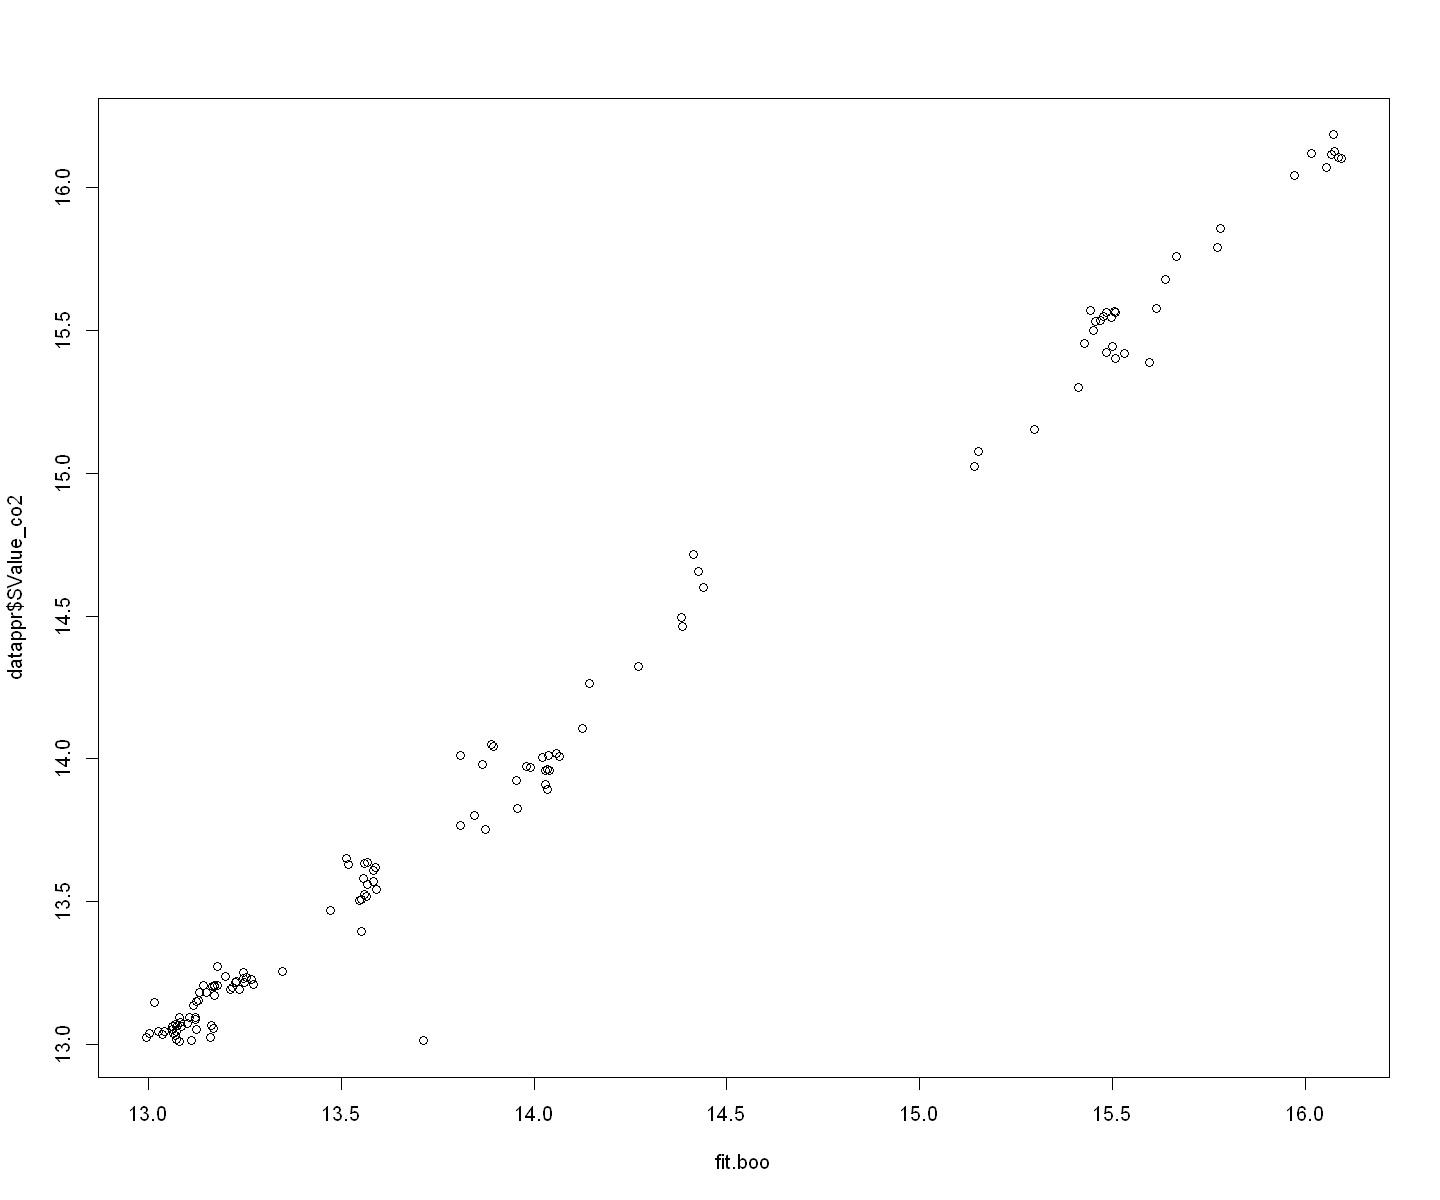

In [116]:
plot(fit.boo,datappr$SValue_co2)

###### MSE et R2

In [130]:
MSE_boo = mean((datappr$SValue_co2 - fit.boo)^2)
paste("MSE =", MSE_boo)

# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2 - fit.boo)^2)
SS_Total <- sum((datappr$SValue_co2 - mean(datappr$SValue_co2))^2)
R2_boo <- 1 - (SS_Residual / SS_Total)
paste("R2 =", R2_boo)

[1] "MSE = 0.0103195258822314"

[1] "R2 = 0.990193556678445"

###### Données tests

Using 471 trees...




[1] 0.0203685

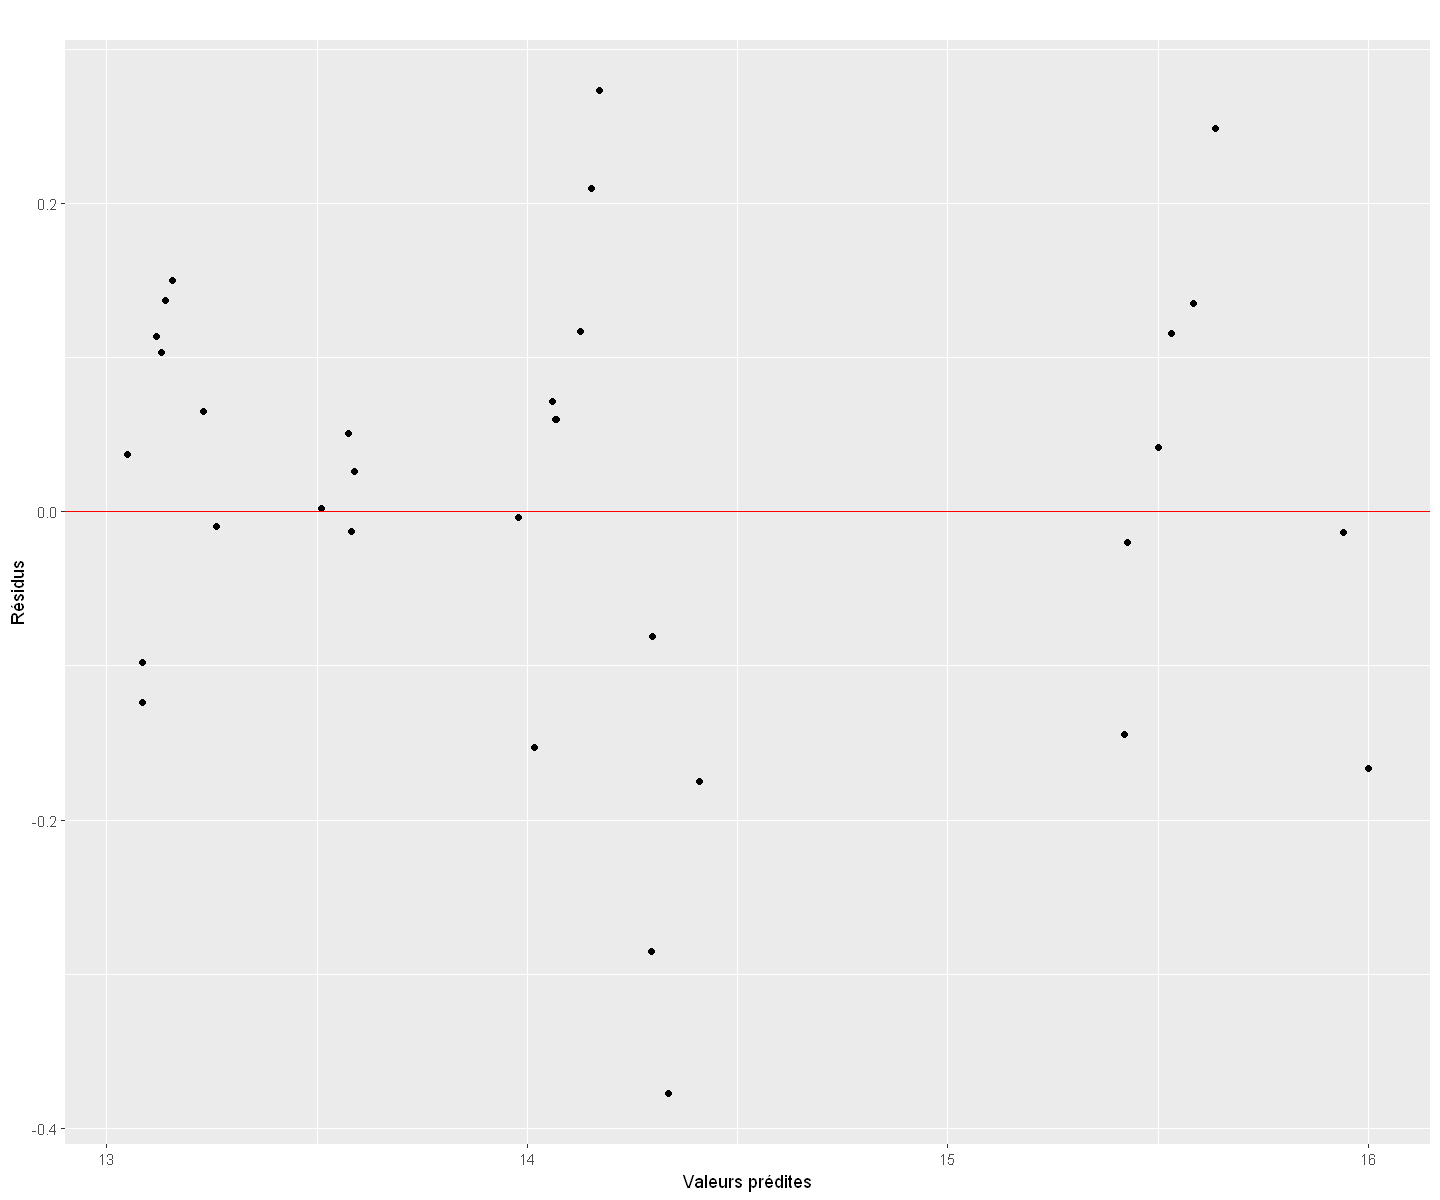

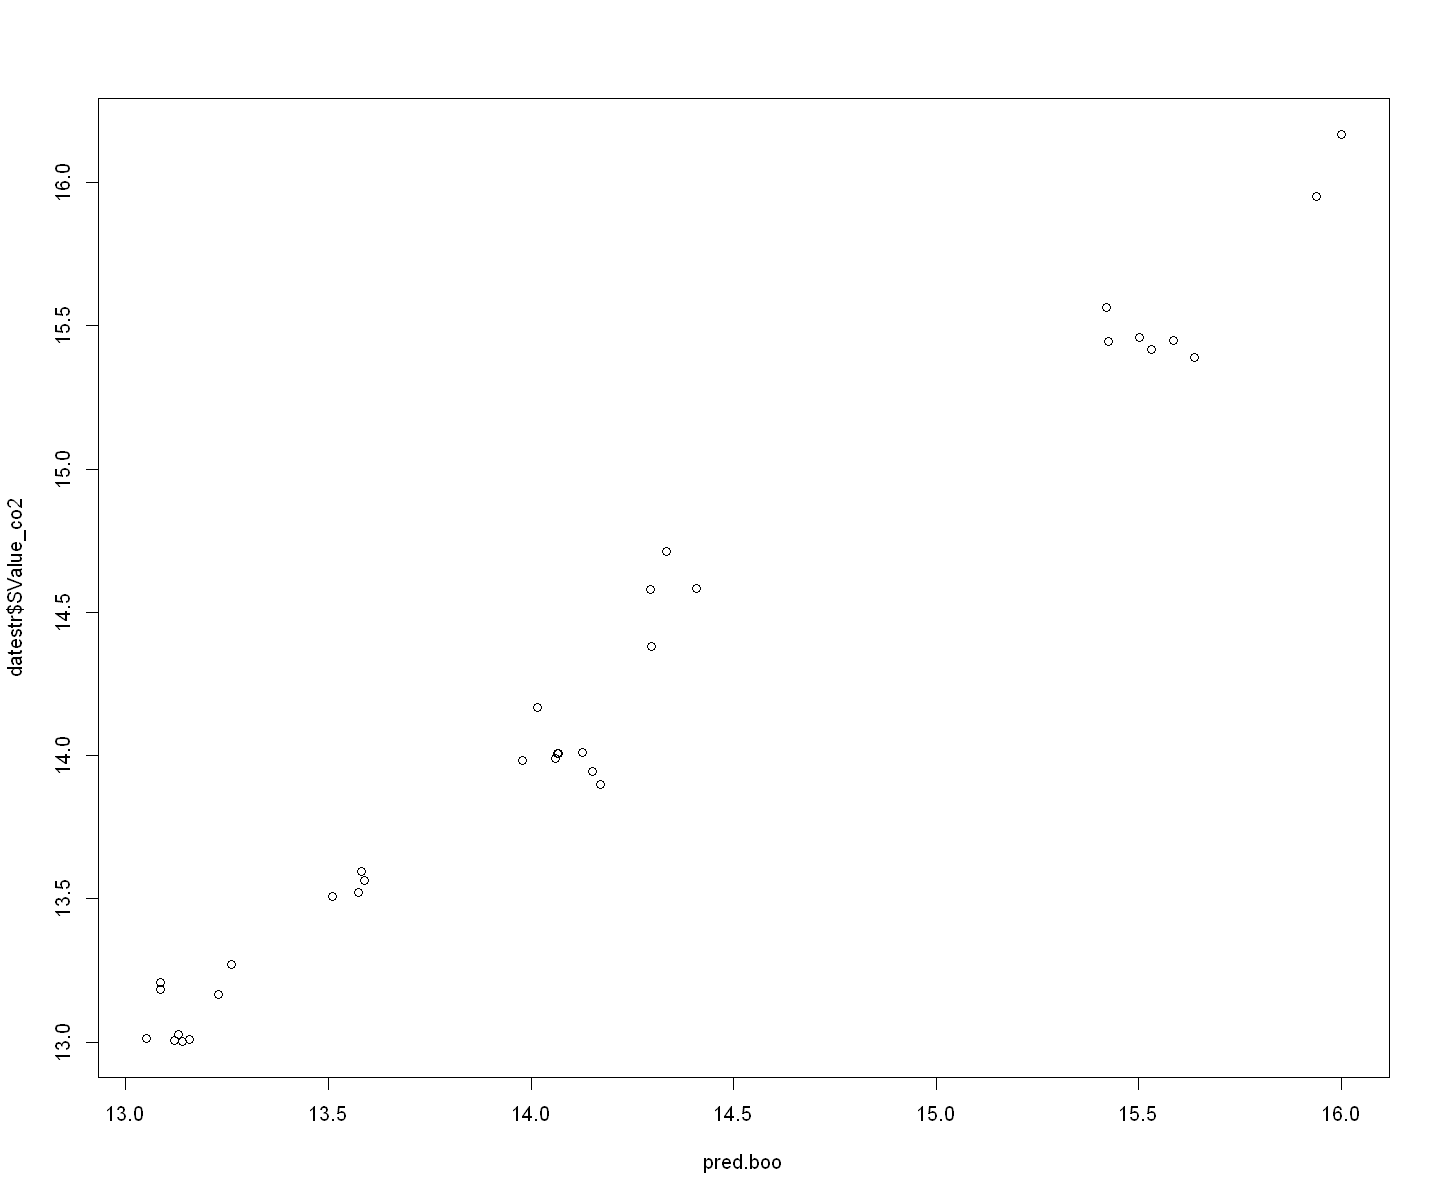

In [149]:
pred.boo=predict(boost.reg,newdata=datestr)
# Erreur quadratique moyenne de prévision
sum((pred.boo-datestr[,"SValue_co2"])^2)/nrow(datestr)
err.boo=pred.boo-datestr[,"SValue_co2"]
gplot.res(pred.boo,err.boo,titre="")
plot(pred.boo,datestr$SValue_co2)

### Neural network

#### Sur données d'apprentissage

In [133]:
nnet.reg=nnet(SValue_co2~.,data=datappr,size=5,decay=1,linout=TRUE,maxit=500) 
summary(nnet.reg)

# weights:  231
initial  value 24329.255315 
iter  10 value 227.645268
iter  20 value 191.316552
iter  30 value 155.678696
iter  40 value 129.138110
iter  50 value 125.654670
iter  60 value 120.350742
iter  70 value 115.800789
iter  80 value 111.044396
iter  90 value 103.263902
iter 100 value 93.313724
iter 110 value 86.483483
iter 120 value 78.574687
iter 130 value 75.043284
iter 140 value 73.195983
iter 150 value 72.454471
iter 160 value 71.504283
iter 170 value 71.134625
iter 180 value 71.108184
iter 190 value 71.077736
iter 200 value 71.031702
iter 210 value 71.000766
iter 220 value 70.984170
iter 230 value 70.951606
iter 240 value 70.927524
iter 250 value 70.900729
iter 260 value 70.889863
iter 270 value 70.876638
iter 280 value 70.869217
iter 290 value 70.861719
iter 300 value 70.855285
iter 310 value 70.850299
iter 320 value 70.836153
iter 330 value 70.804551
iter 340 value 70.774286
iter 350 value 70.749459
iter 360 value 70.704416
iter 370 value 70.689411
iter 380 value 70.676

a 44-5-1 network with 231 weights
options were - linear output units  decay=1
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
   0.00   -0.03    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00 
i10->h1 i11->h1 i12->h1 i13->h1 i14->h1 i15->h1 i16->h1 i17->h1 i18->h1 i19->h1 
   0.03   -0.01   -0.01    0.00    0.00    0.00    0.00    0.01    0.00    0.00 
i20->h1 i21->h1 i22->h1 i23->h1 i24->h1 i25->h1 i26->h1 i27->h1 i28->h1 i29->h1 
   0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.01    0.01    0.00 
i30->h1 i31->h1 i32->h1 i33->h1 i34->h1 i35->h1 i36->h1 i37->h1 i38->h1 i39->h1 
   0.00    0.00   -0.34   -0.15    0.02    0.02   -0.05    0.10    0.03   -0.05 
i40->h1 i41->h1 i42->h1 i43->h1 i44->h1 
   0.04   -0.01    0.04    0.07    0.07 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
   0.01    0.00    0.00    0.00    0.00    0.00    0.00   -0.05    0.00    0.00 
i10->h2 i11->h2 i12->h2 i13->h

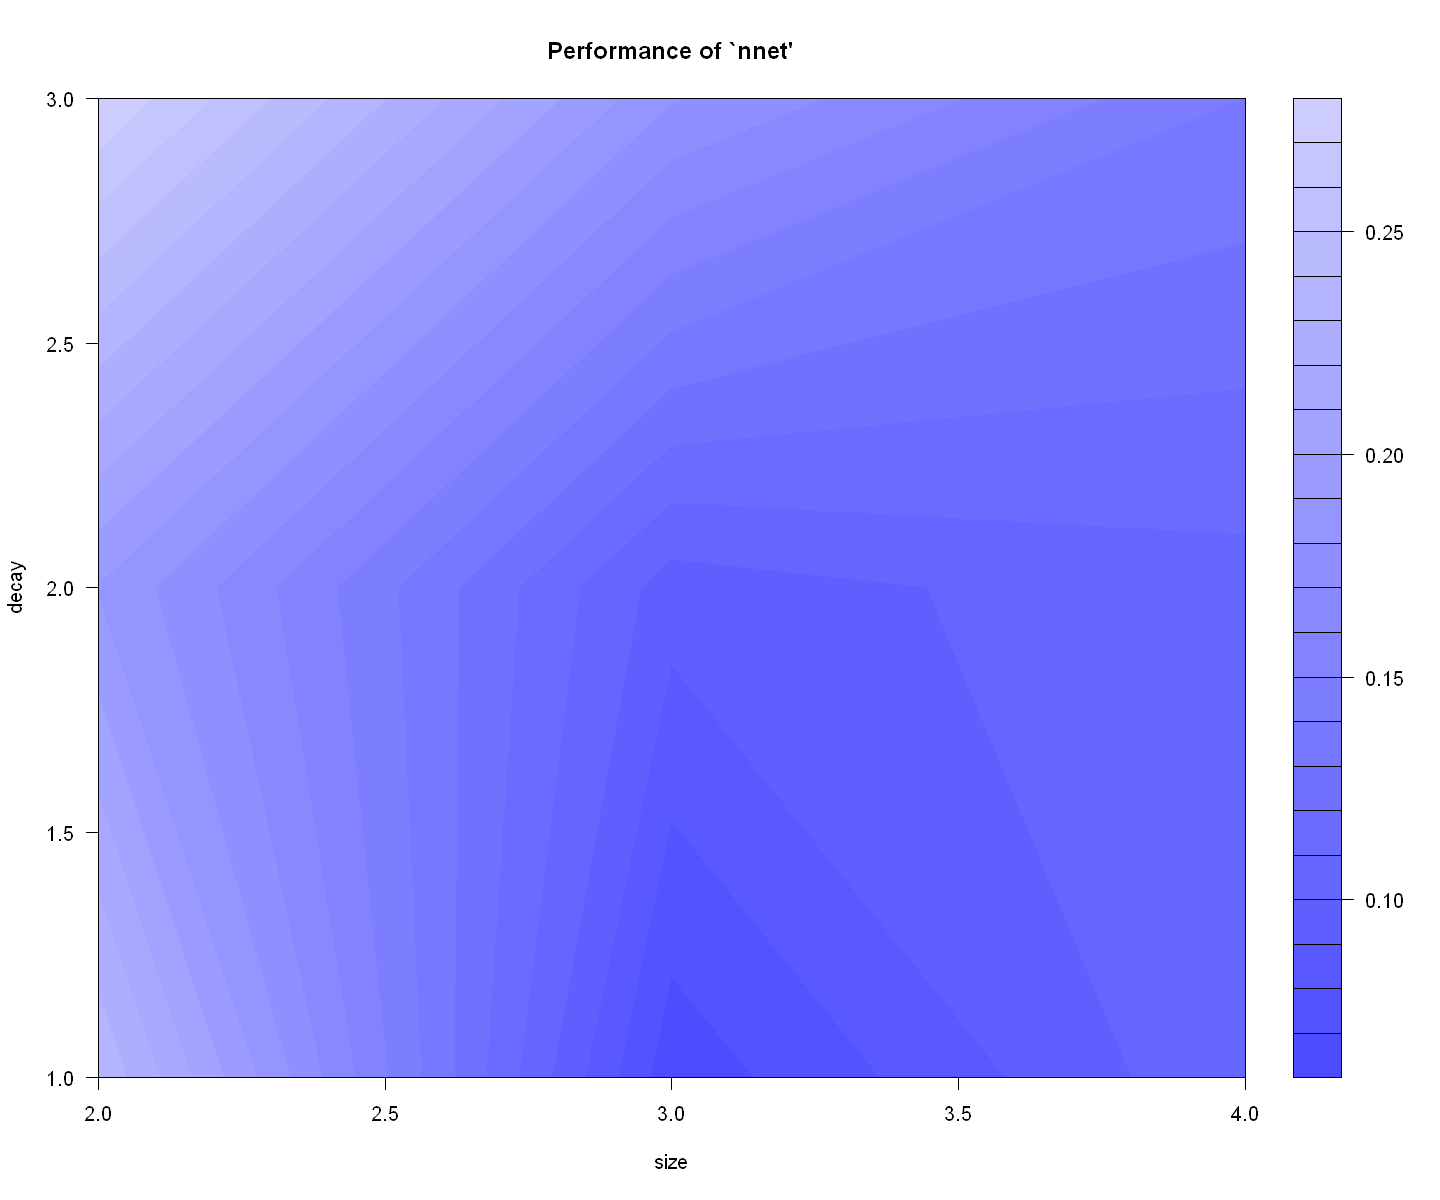

In [138]:
plot(tune.nnet(SValue_co2~.,data=datappr,size=c(2,3,4),decay=c(1,2,3),maxit=200,linout=TRUE))

# weights:  139
initial  value 24306.003237 
iter  10 value 486.472325
iter  20 value 322.949869
iter  30 value 290.835223
iter  40 value 274.735474
iter  50 value 235.621290
iter  60 value 215.652261
iter  70 value 182.764941
iter  80 value 157.279991
iter  90 value 141.762700
iter 100 value 132.132401
iter 110 value 130.059354
iter 120 value 129.527108
iter 130 value 129.179293
iter 140 value 128.923258
iter 150 value 128.739046
iter 160 value 128.690644
iter 170 value 128.659959
iter 180 value 128.648898
iter 190 value 128.635881
iter 200 value 128.592435
final  value 128.592435 
stopped after 200 iterations


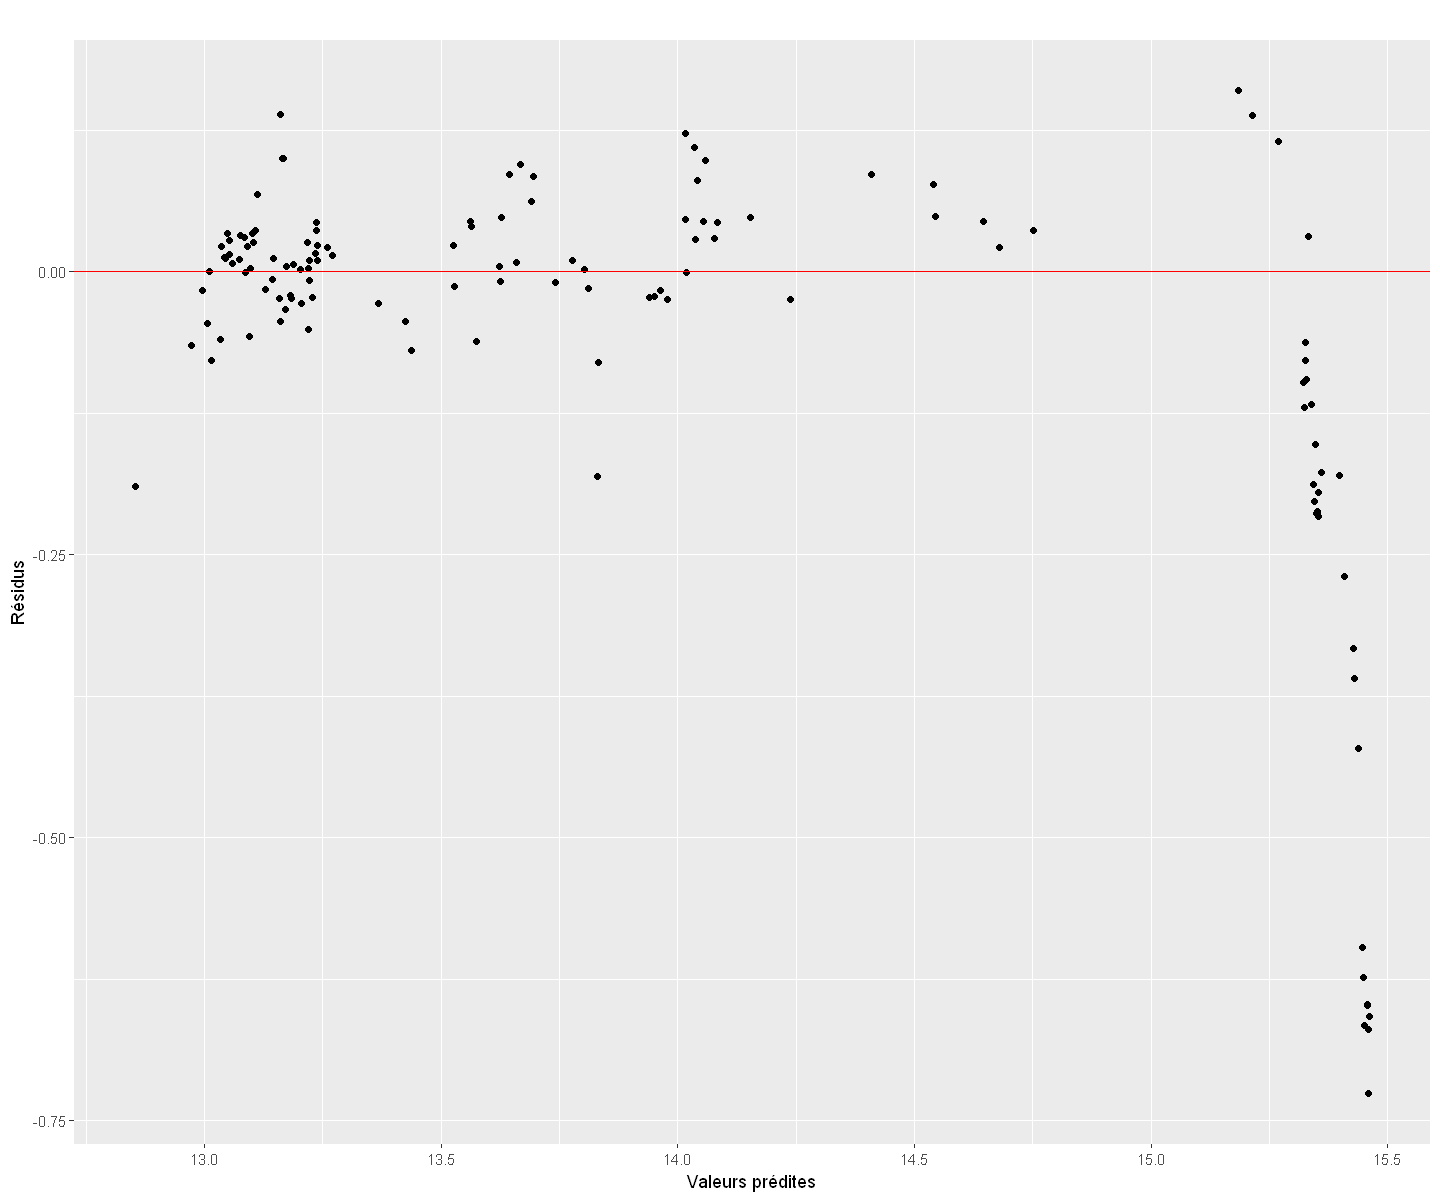

In [139]:
nnet.reg=nnet(SValue_co2~.,data=datappr,size=3,decay=2,linout=TRUE,maxit=200)
# calcul et graphe des résidus
fit.nnetr=predict(nnet.reg,data=datappr)
res.nnetr=fit.nnetr-datappr[,"SValue_co2"]
gplot.res(fit.nnetr,res.nnetr,titre="")

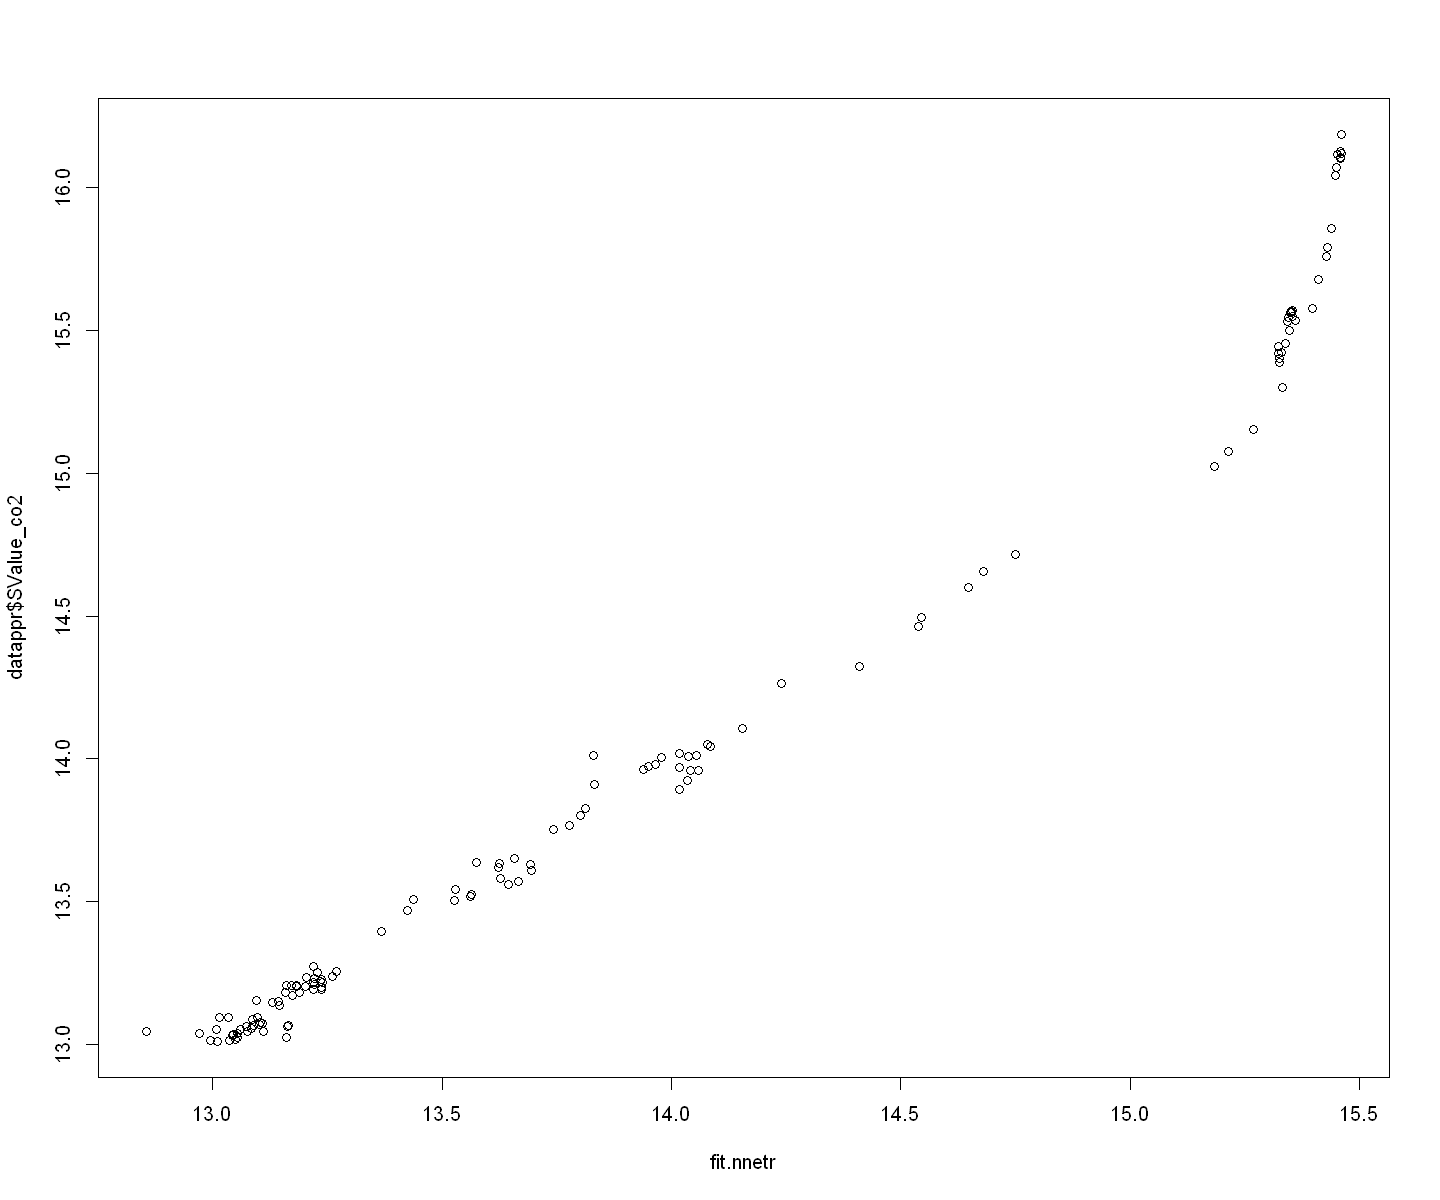

In [140]:
plot(fit.nnetr,datappr$SValue_co2)

##### MSE et R2

In [142]:
MSE_nn = mean((datappr$SValue_co2 - fit.nnetr)^2)
paste("MSE =", MSE_nn)

# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2 - fit.nnetr)^2)
SS_Total <- sum((datappr$SValue_co2 - mean(datappr$SValue_co2))^2)
R2_nn <- 1 - (SS_Residual / SS_Total)
paste("R2 =", R2_nn)

[1] "MSE = 0.0365303942250622"

[1] "R2 = 0.965285881873803"

#### Sur données test

[1] 0.032258

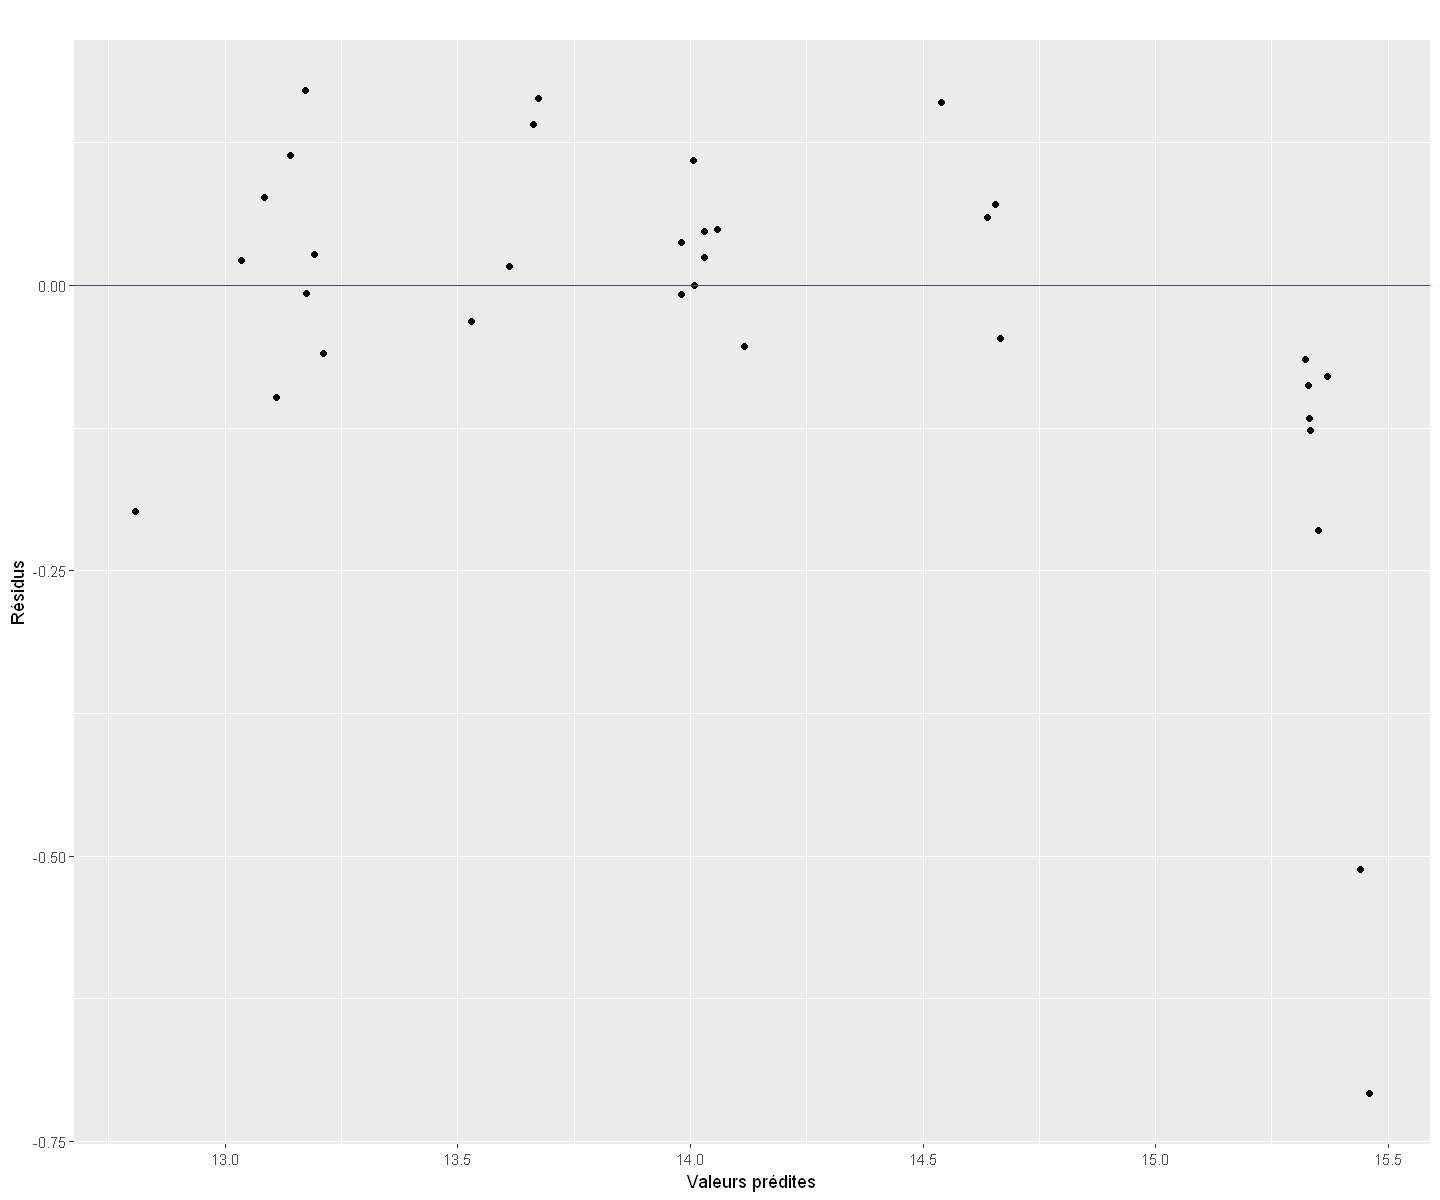

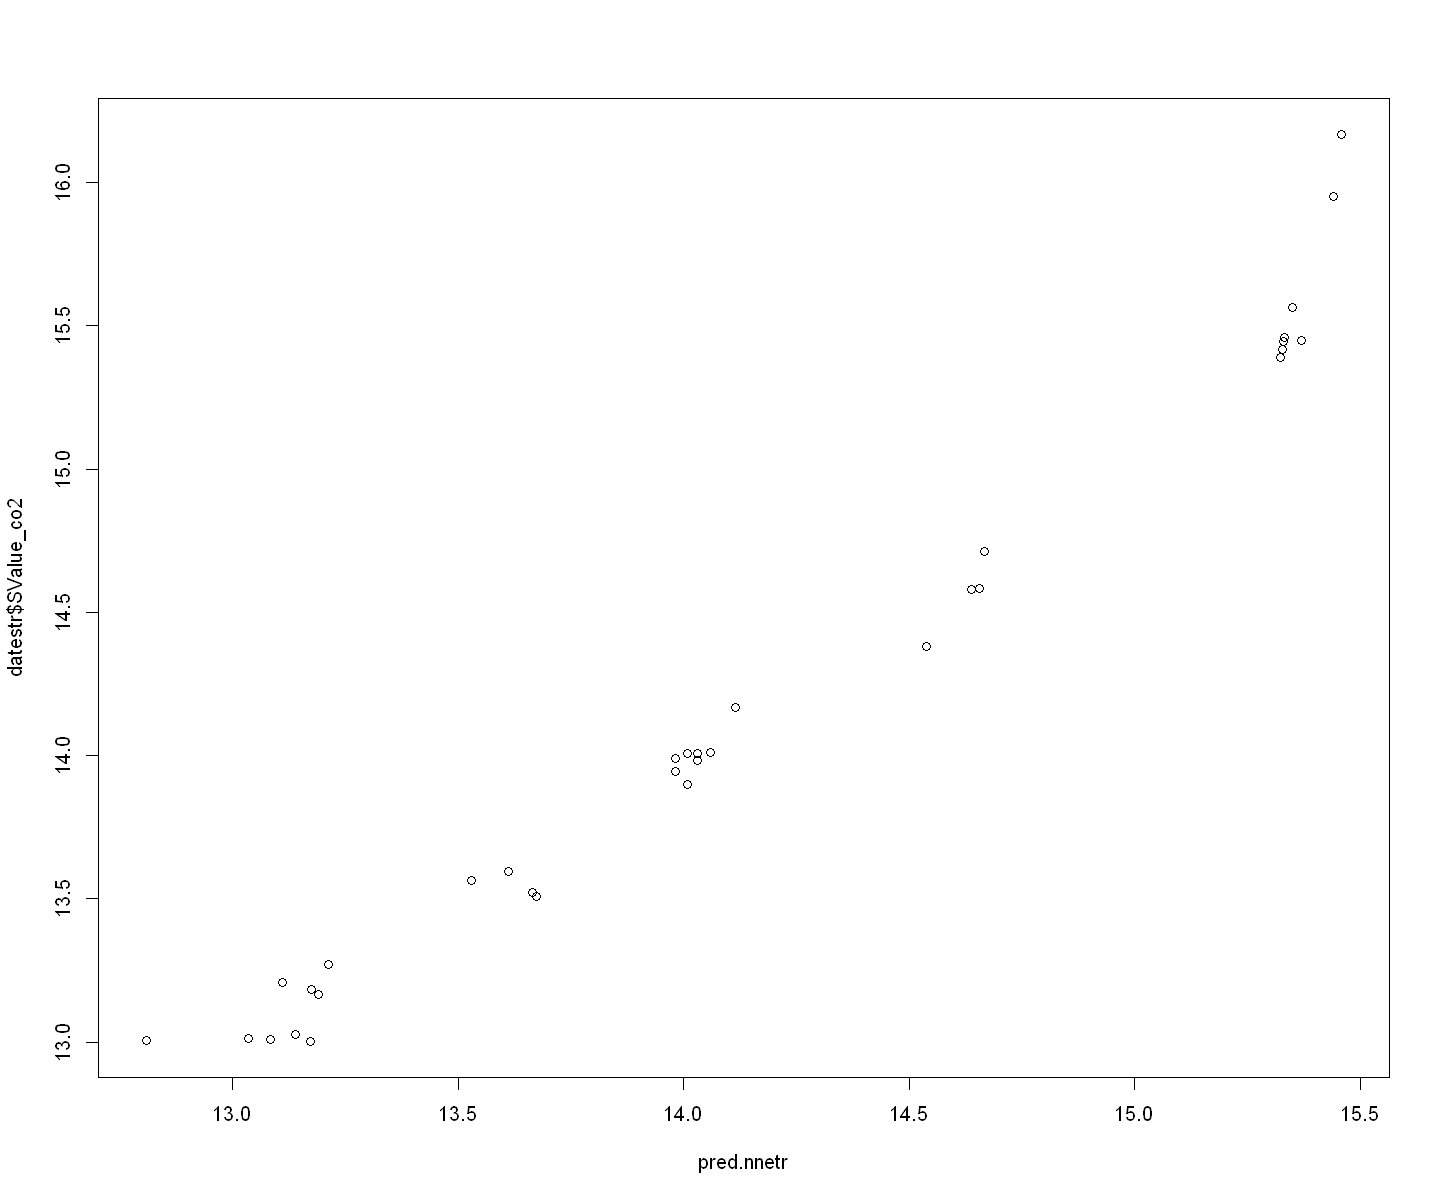

In [148]:
pred.nnetr=predict(nnet.reg,newdata=datestr)
# Erreur quadratique moyenne de prévision
sum((pred.nnetr-datestr[,"SValue_co2"])^2)/nrow(datestr)
err.nnetr=pred.nnetr-datestr[,"SValue_co2"]
gplot.res(pred.nnetr,err.nnetr,titre="")
plot(pred.nnetr,datestr$SValue_co2)

## Question 3

In [143]:
Perf <- data.frame(
  Methode = c("RegLig", "AIC", "LASSO", "SVM", "Arbre","Forêt Aléatoire","Boosting","Neural Network"),
  MSE = c(MSE_rl,MSE_aic,MSE_lse,MSE_svm,MSE_a,MSE_rf,MSE_boo,MSE_nn),
  R2 = c(R2_rl,R2_aic,R2_lse,R2_svm,R2_a,R2_rf,R2_boo,R2_nn)
)

Perf

Methode,MSE,R2
<chr>,<dbl>,<dbl>
RegLig,2.141199e-04,0.9997965
AIC,5.143862e-27,1.0000000
LASSO,1.437542e-03,0.9986339
SVM,9.274169e-05,0.9999119
Arbre,2.588575e-02,0.9754013
Forêt Aléatoire,1.403998e-02,0.9901936
Boosting,1.031953e-02,0.9901936
Neural Network,3.653039e-02,0.9652859
